In [1]:
import pandas as pd
import numpy as np


from datetime import datetime
# import pymongo
# from pymongo import MongoClient
import json


import seaborn as sns
import matplotlib.pyplot as plt


import sys 
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import soporte_outliers as d

pd.set_option('display.max_columns', None)

In [2]:
df_pequeñas = pd.read_csv("../datos/EF/Datos_segmentados/datos_ef_pequeñas.csv", index_col=0)
df_medianas = pd.read_csv("../datos/EF/Datos_segmentados/datos_ef_medianas.csv", index_col=0)
df_amplias = pd.read_csv("../datos/EF/Datos_segmentados/datos_ef_amplias.csv", index_col=0)
df_grandes = pd.read_csv("../datos/EF/Datos_segmentados/datos_ef_grandes.csv", index_col=0)

# **VIVIENDAS PEQUEÑAS**

In [99]:
df_pequeñas.head()

iden idq_pv            idq_mun                      tam_muni     factor  \
183   184  Álava  Municipio_pequeño  De 50.000 habitantes o menos  70.450557   
264   265  Álava  Municipio_pequeño  De 50.000 habitantes o menos  51.333499   
268   269  Álava  Municipio_pequeño  De 50.000 habitantes o menos  88.378354   
323   324  Álava  Municipio_pequeño  De 50.000 habitantes o menos  99.561827   
372   373  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.037846   

    mesent  anoent yoresi otroresi  nresi  \
183  Junio    2021     Si       Si      4   
264   Mayo    2021     Si       Si      5   
268  Junio    2021     Si       No      1   
323   Mayo    2021     Si       Si      2   
372  Julio    2021     Si       No      1   

                                    regvi                   pagovi  \
183        Propia por herencia o donación              Desconocido   
264                            Alquilada   De 400€ a menos de 500€   
268                            Alquilada   De 100€ a menos de 200€   
323                            Alquilada   De 100€ a menos de 200€   
372  Propia por compra totalmente pagada               Desconocido   

                  calefac          tipocombcale                 tipoagua  wc  \
183            individual  Petróleo o derivados  abastecimiento público   Si   
264            individual  Gas butano o propano  abastecimiento público   Si   
268  No tiene calefacción           Desconocido  abastecimiento público   Si   
323            individual          Electricidad  abastecimiento público   Si   
372  No tiene calefacción           Desconocido  abastecimiento público   Si   

    boducha aireacond aislam adaptada cocina lavadora lavavajillas secadora  \
183      Si        No     No       No     Si       Si           No       No   
264      Si        No     No       No     Si       Si           Si       No   
268      Si        No     Si       No     Si       Si           No       No   
323      Si        Si     No       No     No       Si           No       Si   
372      Si        No     No       No     Si       Si           No       No   

    horno microondas vitroinduc  naseos  nsalones  ndormito  nsototrast  \
183    Si         Si         Si       1         1         3           2   
264    Si         Si         No       1         0         3           0   
268    No         Si         No       1         1         1           0   
323    Si         Si         Si       1         1         1           0   
372    No         No         No       1         1         2           0   

     notrashabit          metrosvi  nvehiculos papel vidrio envases organico  \
183            0  Entre 31 y 45 m2           1    Si     No      Si       Si   
264            1  Entre 31 y 45 m2           0    Si     Si      Si       No   
268            0       Hasta 30 m2           0    Si     Si      Si       No   
323            0  Entre 31 y 45 m2           0    Si     Si      Si       Si   
372            0  Entre 31 y 45 m2           1    Si     Si      No       No   

    halogena bajoconsumo led                          servdomes  \
183       No          No  Si        servicio doméstico interno    
264       No          Si  No  No dispone de servicio doméstico    
268       No          Si  Si  No dispone de servicio doméstico    
323       Si          Si  Si  No dispone de servicio doméstico    
372       No          Si  No  No dispone de servicio doméstico    

                                         ayudaext ruidos contamin sucio  \
183  No dispone de ayudas externas no remuneradas     No       No    No   
264  No dispone de ayudas externas no remuneradas     No       No    No   
268  No dispone de ayudas externas no remuneradas     Si       No    No   
323  No dispone de ayudas externas no remuneradas     Si       No    Si   
372  No dispone de ayudas externas no remuneradas     No       No    No   

    malcomunic pocoverde delincuencia molesturist colegio csalud super  \
183         No  

PASO ERFOTOV A NUMÉRICA

In [100]:
dicc={"Si":1,
      "No":0}
df_pequeñas["erfotov"]=df_pequeñas["erfotov"].map(dicc)

#### Meto IDEN en el index

In [101]:
df_pequeñas.set_index("iden", inplace=True)


# **EDA**

In [102]:
f.exploracion_dataframe(df_pequeñas,"erfotov")

El número de datos es 4754 y el de columnas es 86

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


Empty DataFrame
Columns: [%_nulos]
Index: []


 ..................... 

Los tipos de las columnas son:


tipo_dato
idq_pv             object
idq_mun            object
tam_muni           object
factor            float64
mesent             object
...                   ...
ayudas_ccaa         int64
bonificaciones     object
horas_de_sol        int64
radiacion_solar   float64
categoria          object

[86 rows x 1 columns]


 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


count
idq_pv                           
Madrid                        517
Barcelona                     463
Santa Cruz de Tenerife        423
Las Palmas de Gran Canaria    341
Málaga                        224

La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


count
idq_mun                 
Municipio_pequeño   1656
Madrid               191
Melilla              124
Ceuta                111
Barcelona             94

La columna TAM_MUNI tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tam_muni                              
De 50.000 habitantes o menos      1682
De 50.001 a 100.000 habitantes    1602
De 100.001 a 500.000 habitantes   1041
Más de 500.000 habitantes          429

La columna MESENT tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
mesent       
Mayo     1144
Junio    1137
Abril     855
Julio     834
Agosto    233

La columna YORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
yoresi       
Si       4619
No        135

La columna OTRORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
otroresi       
Si         2467
No         2287

La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
regvi                                        
Alquilada                                1922
Propia por compra totalmente pagada      1060
Propia por compra con pagos pendientes    692
Propia por herencia o donación            477
Otra forma                                373

La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


count
pagovi                        
Desconocido               2140
De 300€ a menos de 400€    693
De 400€ a menos de 500€    524
De 200€ a menos de 300€    422
De 500€ a menos de 600€    348

La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
calefac                                                  
No tiene calefacción                                 1862
individual                                           1398
No pero sí aparato que permite calentar alguna ...   1193
colectiva                                             301

La columna TIPOCOMBCALE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
tipocombcale               
Desconocido            1862
Electricidad           1404
Gas natural             873
Gas butano o propano    218
Petróleo o derivados    207

La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoagua                      
abastecimiento público    4315
abastecimiento privado     406
No tiene agua corriente     33

La columna WC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
wc       
Si   4690
No     64

La columna BODUCHA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
boducha       
Si        4643
No         111

La columna AIREACOND tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aireacond       
No          3164
Si          1590

La columna AISLAM tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aislam       
No       3641
Si       1113

La columna ADAPTADA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
adaptada       
No         3961
Si          793

La columna COCINA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cocina       
Si       2882
No       1872

La columna LAVADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavadora       
Si         4478
No          276

La columna LAVAVAJILLAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavavajillas       
No             3876
Si              878

La columna SECADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
secadora       
No         4237
Si          517

La columna HORNO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
horno       
Si      3331
No      1423

La columna MICROONDAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
microondas       
Si           3688
No           1066

La columna VITROINDUC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vitroinduc       
Si           2951
No           1803

La columna METROSVI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
metrosvi               
Entre 31 y 45 m2   3787
Hasta 30 m2         967

La columna PAPEL tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
papel       
Si      3745
No      1009

La columna VIDRIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vidrio       
Si       3790
No        964

La columna ENVASES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
envases       
Si        3709
No        1045

La columna ORGANICO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
organico       
Si         3360
No         1394

La columna HALOGENA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
halogena       
No         3212
Si         1542

La columna BAJOCONSUMO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bajoconsumo       
Si            3589
No            1165

La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
led       
Si    2861
No    1893

La columna SERVDOMES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
servdomes                               
No dispone de servicio doméstico    4616
servicio doméstico externo           108
servicio doméstico interno            30

La columna AYUDAEXT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
ayudaext                                                 
No dispone de ayudas externas no remuneradas         4395
ayudas de familiares, parientes, amigos, vecinos      265
ayudas de otros, como servicios sociales o una ONG     94

La columna RUIDOS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ruidos       
No       2950
Si       1804

La columna CONTAMIN tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
contamin       
No         3914
Si          840

La columna SUCIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
sucio       
No      3515
Si      1239

La columna MALCOMUNIC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
malcomunic       
No           3993
Si            761

La columna POCOVERDE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
pocoverde       
No          3293
Si          1461

La columna DELINCUENCIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
delincuencia       
No             3736
Si             1018

La columna MOLESTURIST tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
molesturist       
No            4193
Si             561

La columna COLEGIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
colegio       
Si        4001
No         753

La columna CSALUD tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
csalud       
Si       3815
No        939

La columna SUPER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
super       
Si      4102
No       652

La columna FARMACIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
farmacia       
Si         4212
No          542

La columna BARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bares       
Si      4256
No       498

La columna CAMBIORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cambioresi       
No           4106
Si            648

La columna SEGUNRESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
segunresi       
No          4392
Si           362

La columna LUGSEGUNRESI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
lugsegunresi                                          
No tiene segunda residencia                       4392
En otro municipio de la misma provincia            138
En otra CCAA                                       114
En el mismo municipio que la primera residencia     50
En otra provincia pero en la misma CCAA             35

La columna OTRACCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 18 categorías (5/18)


count
otraccaa                          
No tiene segunda residencia   4640
Castilla y León                 21
Castilla-La Mancha              20
Comunidad Valenciana            15
Andalucía                       13

La columna OTROPAIS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 15 categorías (5/15)


count
otropais                       
No tiene/ está en España   4729
Marruecos                     4
Reino Unido                   3
Alemania                      2
Bulgaria                      2

La columna DIASUSA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


count
diasusa                           
No tiene segunda residencia   4392
60 o más días                  132
Entre 30 y 59 días              82
Menos de 15 días                79
Entre 15 y 29 días              69

La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
ingrehog                          
De 500€ a menos de 1.000€     1548
De 1.000€ a menos de 1.500€   1327
Menos de 500€                  671
De 1.500€ a menos de 2.000€    594
De 2.000€ a menos de 2.500€    295

La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
tipoedif            
Multifamiliar   3587
Unifamiliar     1167

La columna TIPOEDIFVIV tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tipoedifviv                           
Edificio con 10 o más viviendas   2548
Vivienda unifamiliar              1167
Edificio de 3 a 9 viviendas        882
Edificio con 2 viviendas           157

La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
annoedifinterv       
De 2001 a 2010    811
De 1961 a 1970    674
De 1971 a 1980    663
De 1991 a 2000    647
De 1981 a 1990    548

La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
estadoedif                
muy bueno             1086
bueno                  950
levemente mejorable    619
moderadamente bueno    610
perfecto               505

La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
accesoedif            
Es accesible      2649
No es accesible   2105

La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ascensor       
No         2848
Si         1906

La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
garaje       
No       3256
Si       1498

La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


count
nplazasgar            
No tiene garaje   3256
De 21 a 50         343
De 11 a 20         249
1                  224
De 51 a 100        182

La columna GASTUBERIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
gastuberia       
No           3141
Si           1613

La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aguacalcent       
No            3559
Si            1195

La columna EVACUAGUARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
evacuaguares       
Si             4106
No              648

La columna TIPOEVACUARES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoevacuares          
Alcantarillado     3901
Desconocido         648
Otro tipo           205

La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
nviviendp       
1           1583
2            814
De 5 a 9     738
4            686
10 o más     493

La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
vehiculos               
convencional        2691
No tiene vehiculo   2004
híbrido               43
eléctrico             16

La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
renovables               
no tiene renovable   4562
energía solar         154
otra renovable         38

La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
conectividad            
banda ancha fija    2423
Sin internet        1447
banda ancha movil    604
banda estrecha       280

La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
ccaa                  
Islas Canarias     764
Andalucía          707
Cataluña           602
Madrid             517
Castilla y León    289

La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
bonificaciones       
IBI y ICIO       2783
IBI              1736
Ninguna           235

La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


count
categoria                
Viviendas pequeñas   4754


----------

Las principales estadísticas de las variables númericas son:


count         mean          std         min          25%  \
factor           4754.0   135.890791   166.762431     2.88776    43.208942   
anoent           4754.0  2021.027556     0.163713  2021.00000  2021.000000   
nresi            4754.0     1.875473     1.138826     1.00000     1.000000   
naseos           4754.0     1.096761     0.425737     0.00000     1.000000   
nsalones         4754.0     1.019983     0.362072     0.00000     1.000000   
ndormito         4754.0     1.678586     0.943923     0.00000     1.000000   
nsototrast       4754.0     0.172697     0.430095     0.00000     0.000000   
notrashabit      4754.0     0.164914     0.514610     0.00000     0.000000   
nvehiculos       4754.0     0.717291     0.736194     0.00000     0.000000   
nplantassob      4754.0     3.424905     2.910029     0.00000     2.000000   
nplantasbajo     4754.0     0.864956     1.421285     0.00000     0.000000   
erfotov          4754.0     0.018090     0.133291     0.00000     0.000000   
ayudas_ccaa      4754.0  5782.078250  1586.341944  3000.00000  5000.000000   
horas_de_sol     4754.0  2823.066891   441.474212  1639.00000  2576.000000   
radiacion_solar  4754.0     5.364523     0.633094     3.60000     5.300000   

                        50%          75%          max  
factor             80.06812   156.838488  1741.868595  
anoent           2021.00000  2021.000000  2022.000000  
nresi               2.00000     2.000000    10.000000  
naseos              1.00000     1.000000    10.000000  
nsalones            1.00000     1.000000    10.000000  
ndormito            2.00000     2.000000    15.000000  
nsototrast          0.00000     0.000000     8.000000  
notrashabit         0.00000     0.000000    10.000000  
nvehiculos          1.00000     1.000000    10.000000  
nplantassob         3.00000     4.000000    45.000000  
nplantasbajo        0.00000     1.000000    10.000000  
erfotov             0.00000     0.000000     1.000000  
ayudas_ccaa      6000.00000  6200.000000  9000.000000  
horas_de_sol     2924.00000  3248.000000  3527.000000  
radiacion_solar     5.60000     5.740000     6.020000


----------

Las principales estadísticas de las variables categóricas son:


count unique                           top  freq
idq_pv          4754     52                        Madrid   517
idq_mun         4754    152             Municipio_pequeño  1656
tam_muni        4754      4  De 50.000 habitantes o menos  1682
mesent          4754     11                          Mayo  1144
yoresi          4754      2                            Si  4619
...              ...    ...                           ...   ...
renovables      4754      3            no tiene renovable  4562
conectividad    4754      4              banda ancha fija  2423
ccaa            4754     19                Islas Canarias   764
bonificaciones  4754      3                    IBI y ICIO  2783
categoria       4754      1            Viviendas pequeñas  4754

[71 rows x 4 columns]


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 4754 entries, 184 to 172431
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           4754 non-null   object 
 1   idq_mun          4754 non-null   object 
 2   tam_muni         4754 non-null   object 
 3   factor           4754 non-null   float64
 4   mesent           4754 non-null   object 
 5   anoent           4754 non-null   int64  
 6   yoresi           4754 non-null   object 
 7   otroresi         4754 non-null   object 
 8   nresi            4754 non-null   int64  
 9   regvi            4754 non-null   object 
 10  pagovi           4754 non-null   object 
 11  calefac          4754 non-null   object 
 12  tipocombcale     4754 non-null   object 
 13  tipoagua         4754 non-null   object 
 14  wc               4754 non-null   object 
 15  boducha          4754 non-null   object 
 1

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media

In [103]:
df_pequeñas["ndormito"].unique()  #observamos que en las viendas pequeñas todo numero de habitaciones mayor a 5 es incomprensible por lo que vamos a investigarlos

array([ 3,  1,  2,  0,  4,  5,  6,  8, 15,  9,  7], dtype=int64)

In [104]:
df_pequeñas["ndormito"].value_counts()

ndormito
1     2146
2     1544
3      710
0      214
4      113
5       15
6        7
8        2
15       1
9        1
7        1
Name: count, dtype: int64

In [105]:
df_filtrados_outliers=df_pequeñas[df_pequeñas["ndormito"] >5]

In [106]:
len(df_filtrados_outliers)  #vemos que hay 12 de un total de 4754 lo que corresponde a un 0,25% de los datos (practicamente insignificante)

12

In [107]:
df_filtrados_outliers.head(7)   #ver que hacer con los outliers porque lo que no cuadra muchas veces es únicamente el tamaño con respecto numero de aseos, dormitorios, salones y residentes 

idq_pv            idq_mun                         tam_muni  \
iden                                                                      
38710       Cáceres  Municipio_pequeño     De 50.000 habitantes o menos   
48325       Córdoba  Municipio_pequeño     De 50.000 habitantes o menos   
61099   Guadalajara  Municipio_pequeño     De 50.000 habitantes o menos   
73942      La Rioja  Municipio_pequeño     De 50.000 habitantes o menos   
74599      La Rioja            Logroño  De 100.001 a 500.000 habitantes   
77209          Lugo  Municipio_pequeño     De 50.000 habitantes o menos   
116972     Palencia  Municipio_pequeño     De 50.000 habitantes o menos   

            factor mesent  anoent yoresi otroresi  nresi  \
iden                                                       
38710   105.733238   Mayo    2021     No       Si      3   
48325   117.794916  Junio    2021     Si       Si      2   
61099    69.818849  Abril    2021     Si       Si      4   
73942    28.812478  Junio    2021     Si       No      1   
74599    52.600927  Junio    2021     Si       No      1   
77209   137.571808  Junio    2021     Si       Si      5   
116972    4.790523   Mayo    2021     Si       Si      8   

                                       regvi       pagovi  \
iden                                                        
38710   Propia por compra totalmente pagada   Desconocido   
48325   Propia por compra totalmente pagada   Desconocido   
61099   Propia por compra totalmente pagada   Desconocido   
73942                             Otra forma  Desconocido   
74599         Propia por herencia o donación  Desconocido   
77209                             Otra forma  Desconocido   
116972                            Otra forma  Desconocido   

                                                  calefac  \
iden                                                        
38710                                No tiene calefacción   
48325                                No tiene calefacción   
61099                                No tiene calefacción   
73942   No pero sí aparato que permite calentar alguna...   
74599                                   colectiva           
77209                                          individual   
116972                                  colectiva           

                tipocombcale                 tipoagua  wc boducha aireacond  \
iden                                                                          
38710            Desconocido  abastecimiento público   Si      Si        Si   
48325            Desconocido  abastecimiento público   Si      No        No   
61099            Desconocido  abastecimiento público   Si      Si        No   
73942                 Madera  abastecimiento público   Si      No        Si   
74599   Petróleo o derivados   abastecimiento privado  Si      No        Si   
77209   Petróleo o derivados  abastecimiento público   Si      Si        No   
116972  Petróleo o derivados  abastecimiento público   Si      Si        No   

       aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
iden                                                                            
38710      No       No     Si       Si           Si       No    Si         Si   
48325      No       No     Si       No           No       No    No         No   
61099      Si       No     Si       Si           No       No    Si         Si   
73942      Si       No     No       Si           No       No    No         Si   
74599      Si       No     Si       No           No       No    No         Si   
77209      Si       No     Si       Si           Si       No    Si         Si   
116972     No       Si     Si       Si           Si       Si    Si         Si   

       vitroinduc  naseos  nsalones  ndormito  nsototrast  notrashabit  \
iden                                                                     
38710          No       2         1         6           0            2   
48325          No       3       

**Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) pero además, nos percatamos de que el número de residentes también muestra discrepancias con el tamaño de la vivienda**

In [108]:
df_pequeñas.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

***Seleccionamos las columnas que se consideran más relevantes a la hora de investigar estos datos atípicos***

In [109]:
df_investigar=df_pequeñas[['idq_pv', 'idq_mun','yoresi', 'otroresi', 'nresi', 'naseos', 'nsalones', 'ndormito',
       'nsototrast', 'notrashabit', 'metrosvi','servdomes',"tipoedif",
       'tipoedifviv', 'nplantassob', 'nplantasbajo','estadoedif', 'ascensor', 'garaje', 'nplazasgar',
       'evacuaguares', 'tipoevacuares','nviviendp','ccaa','categoria']]

In [110]:
df_investigar.head()

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                      
184   Álava  Municipio_pequeño     Si       Si      4       1         1   
265   Álava  Municipio_pequeño     Si       Si      5       1         0   
269   Álava  Municipio_pequeño     Si       No      1       1         1   
324   Álava  Municipio_pequeño     Si       Si      2       1         1   
373   Álava  Municipio_pequeño     Si       No      1       1         1   

      ndormito  nsototrast  notrashabit          metrosvi  \
iden                                                        
184          3           2            0  Entre 31 y 45 m2   
265          3           0            1  Entre 31 y 45 m2   
269          1           0            0       Hasta 30 m2   
324          1           0            0  Entre 31 y 45 m2   
373          2           0            0  Entre 31 y 45 m2   

                              servdomes       tipoedif  \
iden                                                     
184         servicio doméstico interno     Unifamiliar   
265   No dispone de servicio doméstico   Multifamiliar   
269   No dispone de servicio doméstico   Multifamiliar   
324   No dispone de servicio doméstico   Multifamiliar   
373   No dispone de servicio doméstico     Unifamiliar   

                          tipoedifviv  nplantassob  nplantasbajo  \
iden                                                               
184             Vivienda unifamiliar             2             1   
265   Edificio con 10 o más viviendas            3             3   
269       Edificio de 3 a 9 viviendas            3             0   
324       Edificio de 3 a 9 viviendas            2             0   
373             Vivienda unifamiliar             2             0   

                   estadoedif ascensor garaje       nplazasgar evacuaguares  \
iden                                                                          
184                     bueno       No     Si                1           Si   
265                     bueno       Si     No  No tiene garaje           Si   
269   moderadamente mejorable       No     No  No tiene garaje           Si   
324                  perfecto       No     No  No tiene garaje           Si   
373       levemente mejorable       No     No  No tiene garaje           Si   

         tipoevacuares nviviendp        ccaa           categoria  
iden                                                              
184   Alcantarillado           1  País Vasco  Viviendas pequeñas  
265   Alcantarillado           3  País Vasco  Viviendas pequeñas  
269   Alcantarillado           2  País Vasco  Viviendas pequeñas  
324   Alcantarillado           1  País Vasco  Viviendas pequeñas  
373   Alcantarillado           1  País Vasco  Viviendas pequeñas

***Observamos viviendas que se marcan como inhabitables***

In [111]:
df_investigar[df_investigar["estadoedif"]=="inhabitable"]["ccaa"].value_counts()

ccaa
Andalucía               13
Islas Canarias          12
Madrid                   5
Ceuta                    5
Comunidad Valenciana     4
Melilla                  4
Islas Baleares           3
Cataluña                 3
Castilla y León          3
Cantabria                3
Castilla-La Mancha       2
País Vasco               1
La Rioja                 1
Galicia                  1
Asturias                 1
Aragón                   1
Name: count, dtype: int64

In [112]:
df_investigar[df_investigar["estadoedif"]=="inhabitable"].shape[0]

62

In [113]:
viv_inhabitables=df_investigar[df_investigar["estadoedif"]=="inhabitable"]

# **DETECCIÓN Y TRATAMIENTO DE OUTLIERS**  
  

#### ***DETECCIÓN Y TRATAMIENTO DE UNIVARIADOS***
**VIV_INHABITABLES**  
Mientras que la mayoría de las ccaa con más viviendas en estado inhabitable son:  
- Andalucía-> 21%  
- Islas Canarias-> 19%  
- Madrid-> 8%   
  
Resulta que las viviendas en estado inhabitable con mayor número de residentes (5-6) se encuentran principalmente en los archipiélagos (Canarias y Baleares) y las ciudades estado (Ceuta y Melilla) lo que refleja la realidad de la compleja situación del mercado inmobilario en dichas áreas.  
  
    
En este conjunto de viviendas inhabitables solo se ha identificado un outlier que no tiene tanto que ver con que sea inhabitable la vivienda,   
Ya que no cuadra que solo haya un residente en una vivienda con tantas habitaciones y aseos además de ,evidentemente, que haya tantas estancias en una vivienda tan pequeña (al tratarse de solo **1** se podría eliminar porque no cuadran dos columnas (si solo fuera 1 me lo pensaba)).  
  
    
**VIV_DORMITO**  
Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) habiendo así **12** outliers que no cuadran por varias razones y que no es posible justificar más allá de tratarse de un dato erróneo (podría ser que la persona intente falsear sus metros declarados por alguna razón ya que la fuente de datos es una encuesta pero aún así es un dato a no tener en cuenta).  
  
  
**VIV_RESIDENTES**  
Ceuta, Melilla y Barcelona lo que tiene sentido por la poca disponibilidad de espacio y alto número de habitantes proporcionalmente respecto al terreno.

Aunque es extraño, es tristemente posible que 6-7 personas residan en viviendas pequeñas sin embargo siguen siendo datos atípicos , se han identificado **2** outliers:    
  
  
**VIV_SALONES**
Tener más de 2 salones es generalmente raro en viviendas de un tamaño tan reducido por lo que tras investigar se han identificado **29** outliers.  

**VIV_ASEOS**    
Tener más de 3 aseos en un hogar pequeño es muy raro por lo que tras investigar, se han encontrado **12** outliers.  
  
**VIV_OTRAS_HABIT**   
Tener más de 3 estancias distintas a aseos, dormitorios y salones en un hogar pequeño tiene poco sentido por lo que vamos tras investigar, se encontraron **9** outliers.    
  
***Tras haber investigado los outliers univariados ahora se pasa a eliminarlos debido a su reducido número y las justificaciones que se han ido dando. En total se han eliminado un **2,27%** de los datos debido a que se trataban de outliers sin sentido.***   
   
#### ***DETECCIÓN Y TRATAMIENTO DE MULTIVARIADOS***   
***Mediante la metodología ISOLATION FOREST (IF) se eliminan el 1,01% de los datos***  
  
### El tratamiento de outliers ha resultado en la eliminación del 3,28% de los datos (se ha optado por ello por la existencia de datos sin sentido real)  

In [114]:
viv_dormitorios=df_investigar[df_investigar["ndormito"] > 5]

In [115]:
df_investigar["nresi"].value_counts()  #todo número de residentes mayor a 6 es incomprensible por lo que vamos a investigar

nresi
1     2364
2     1332
3      580
4      320
5       96
6       50
7       10
8        1
10       1
Name: count, dtype: int64

In [116]:
viv_residentes=df_investigar[df_investigar["nresi"] > 5]

In [117]:
df_investigar["nsalones"].value_counts() #tener más de 2 salones en un hogar pequeño es extraño por lo que vamos a investigar

nsalones
1     4355
2      195
0      175
3       22
4        4
6        2
10       1
Name: count, dtype: int64

In [118]:
viv_salones=df_investigar[df_investigar["nsalones"] > 2]

In [119]:
viv_salones.shape

(29, 25)

In [120]:
df_investigar["naseos"].value_counts() #tener más de 3 aseos en un hogar pequeño es muy raro por lo que vamos a investigar

naseos
1     4278
2      379
0       48
3       37
4        8
10       3
5        1
Name: count, dtype: int64

In [121]:
viv_aseos=df_investigar[df_investigar["naseos"] > 3]

In [122]:
viv_aseos.shape

(12, 25)

In [123]:
df_investigar["notrashabit"].value_counts() #tener más de 3 estancias distintas a aseos, dormitorios y salones  en un hogar pequeño tiene poco sentido por lo que vamos a investigar

notrashabit
0     4107
1      567
2       56
3       15
10       3
4        3
5        2
8        1
Name: count, dtype: int64

In [124]:
viv_otras_habit=df_investigar[df_investigar["notrashabit"] > 3]

In [125]:
viv_otras_habit.shape[0]

9

In [126]:
df_investigar[(df_investigar["notrashabit"] > 3) & (df_investigar["naseos"] > 3) & (df_investigar["nsalones"] > 2) & (df_investigar["nresi"] > 5) & (df_investigar["ndormito"] > 5)]   #Este cuadro nos muestra las viviendas que tienen valores incomprensibles en todas las variables que hemos considerado

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                           
116972  Palencia  Municipio_pequeño     Si       Si      8      10         6   

        ndormito  nsototrast  notrashabit     metrosvi  \
iden                                                     
116972        15           1           10  Hasta 30 m2   

                          servdomes       tipoedif  \
iden                                                 
116972  servicio doméstico externo   Multifamiliar   

                            tipoedifviv  nplantassob  nplantasbajo estadoedif  \
iden                                                                            
116972  Edificio con 10 o más viviendas            3             0   perfecto   

       ascensor garaje  nplazasgar evacuaguares     tipoevacuares nviviendp  \
iden                                                                          
116972       Si     Si  De 21 a 50           Si  Alcantarillado           3   

                   ccaa           categoria  
iden                                         
116972  Castilla y León  Viviendas pequeñas

In [127]:
df_investigar1=df_investigar[df_investigar["notrashabit"] <= 3 ]
df_investigar2=df_investigar1[df_investigar1["naseos"] <= 3]
df_investigar3=df_investigar2[df_investigar2["nsalones"] <= 2]
df_investigar4=df_investigar3[df_investigar3["nresi"] <= 5]
df_investigar5=df_investigar4[df_investigar4["ndormito"] <= 5]

In [128]:
df_investigar.shape

(4754, 25)

In [129]:
df_investigar5.shape

(4646, 25)

AHORA QUE YA LO HEMOS ESTUDIADO Y PROBADO EN EL DF DE INVESTIGACIÓN, PASAMOS A APLICARLO AL QUE TIENE TODAS LAS VARIABLES

In [130]:
df_pequeñas.shape

(4754, 86)

In [131]:
df_pequeñas=df_pequeñas[df_pequeñas["notrashabit"] <= 3 ]
df_pequeñas=df_pequeñas[df_pequeñas["naseos"] <= 3]
df_pequeñas=df_pequeñas[df_pequeñas["nsalones"] <= 2]
df_pequeñas=df_pequeñas[df_pequeñas["nresi"] <= 5]
df_pequeñas_sin_outliers=df_pequeñas[df_pequeñas["ndormito"] <= 5]

In [132]:
df_pequeñas_sin_outliers.reset_index(drop=True, inplace=True)

In [133]:
df_pequeñas_sin_outliers.shape

(4646, 86)

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

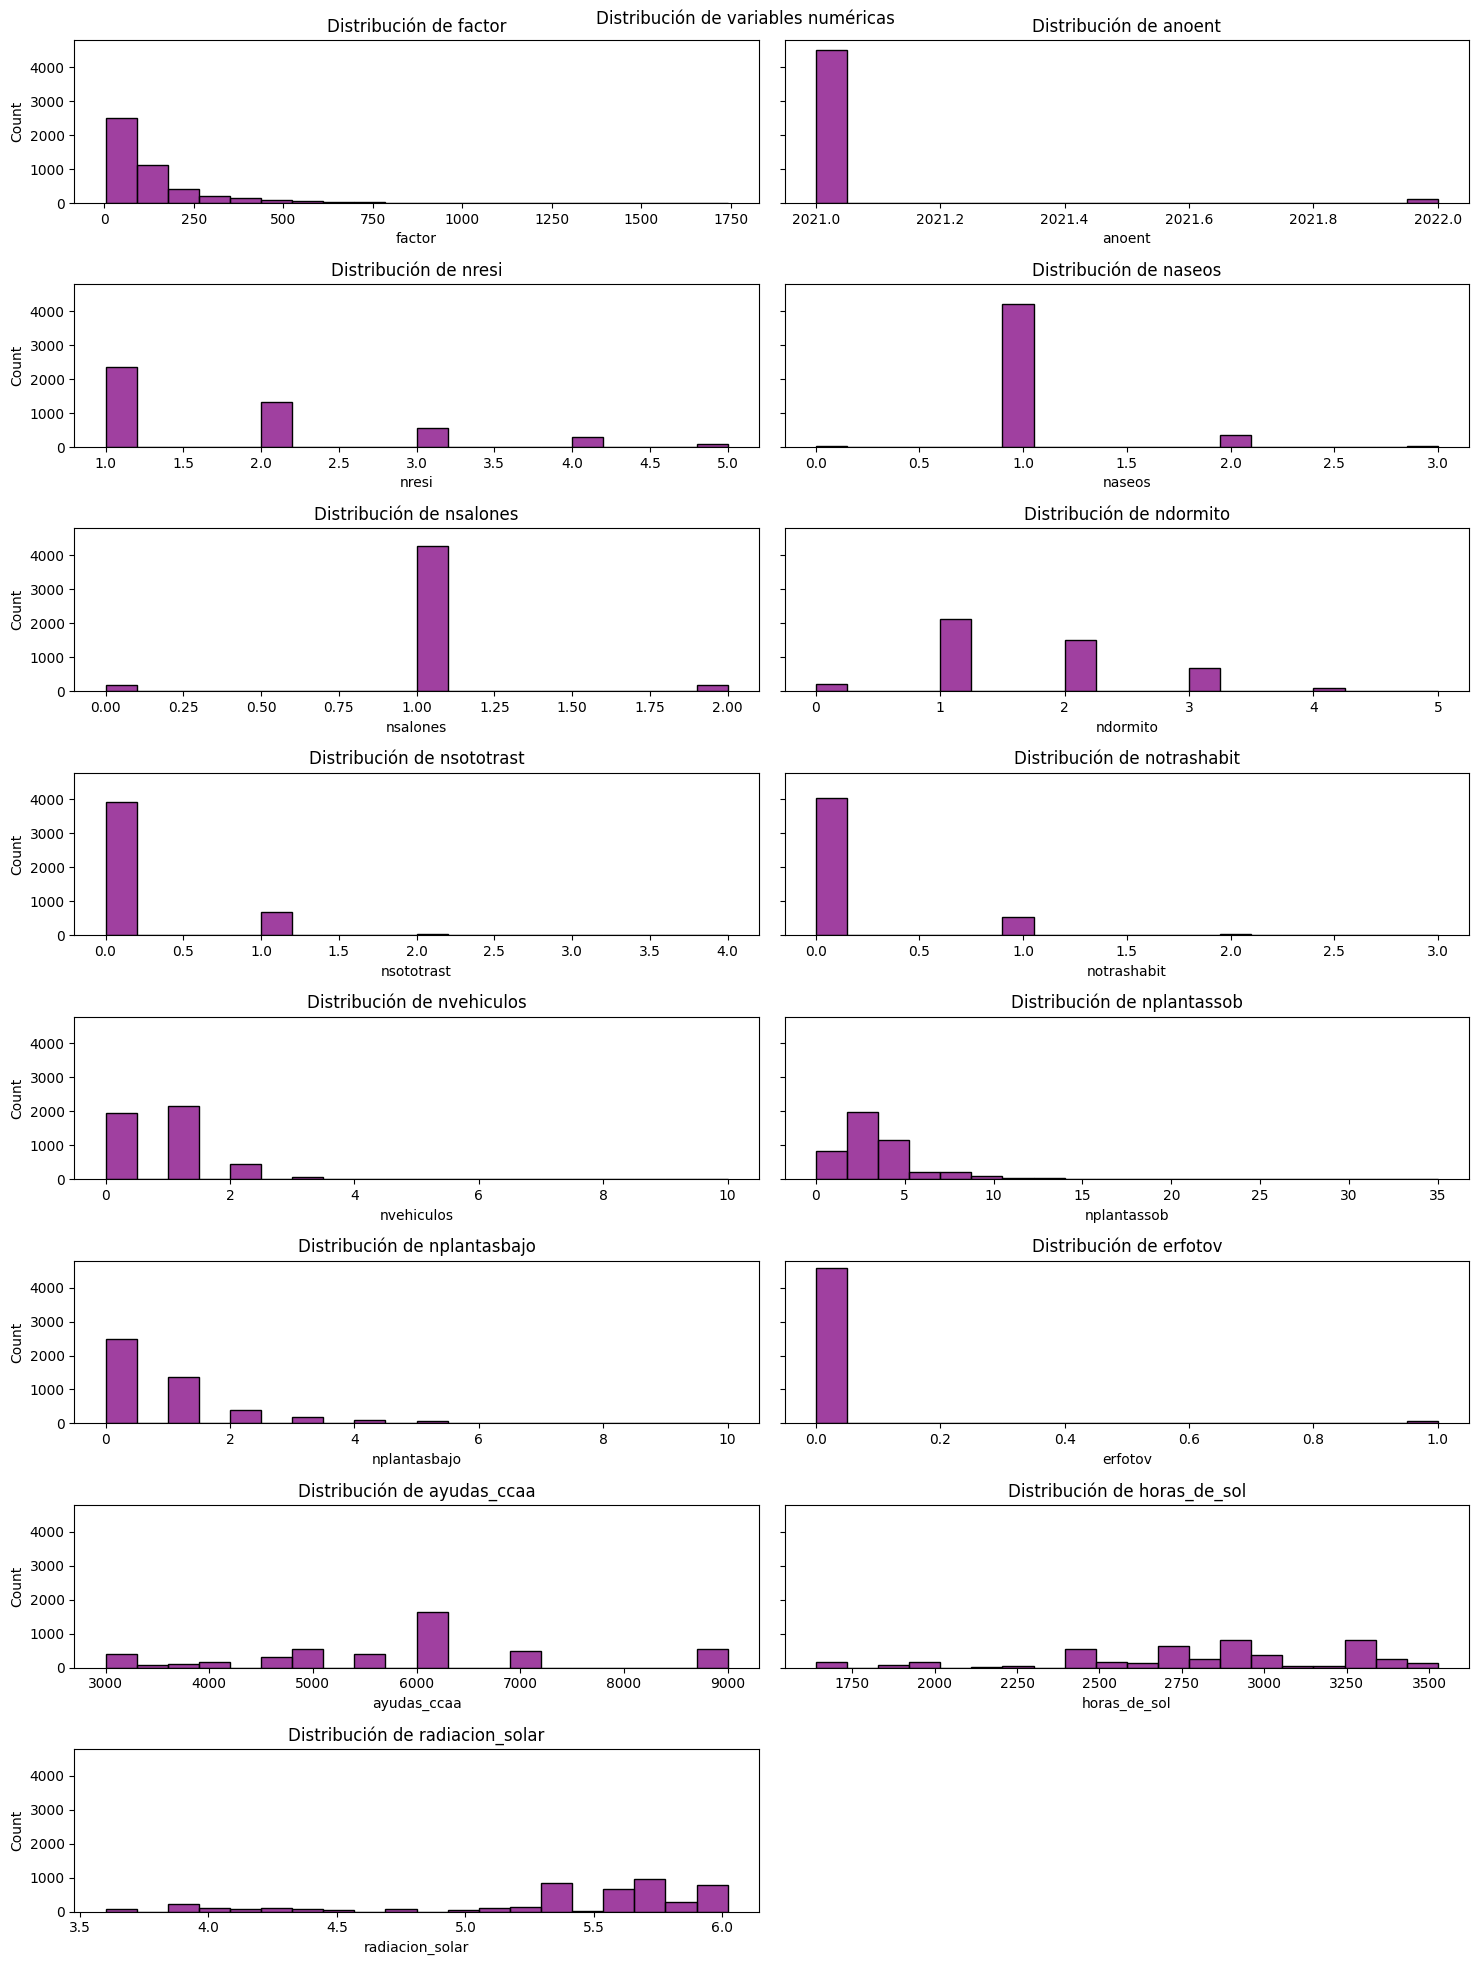

In [134]:
visualizador=f.Visualizador(df_pequeñas_sin_outliers)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

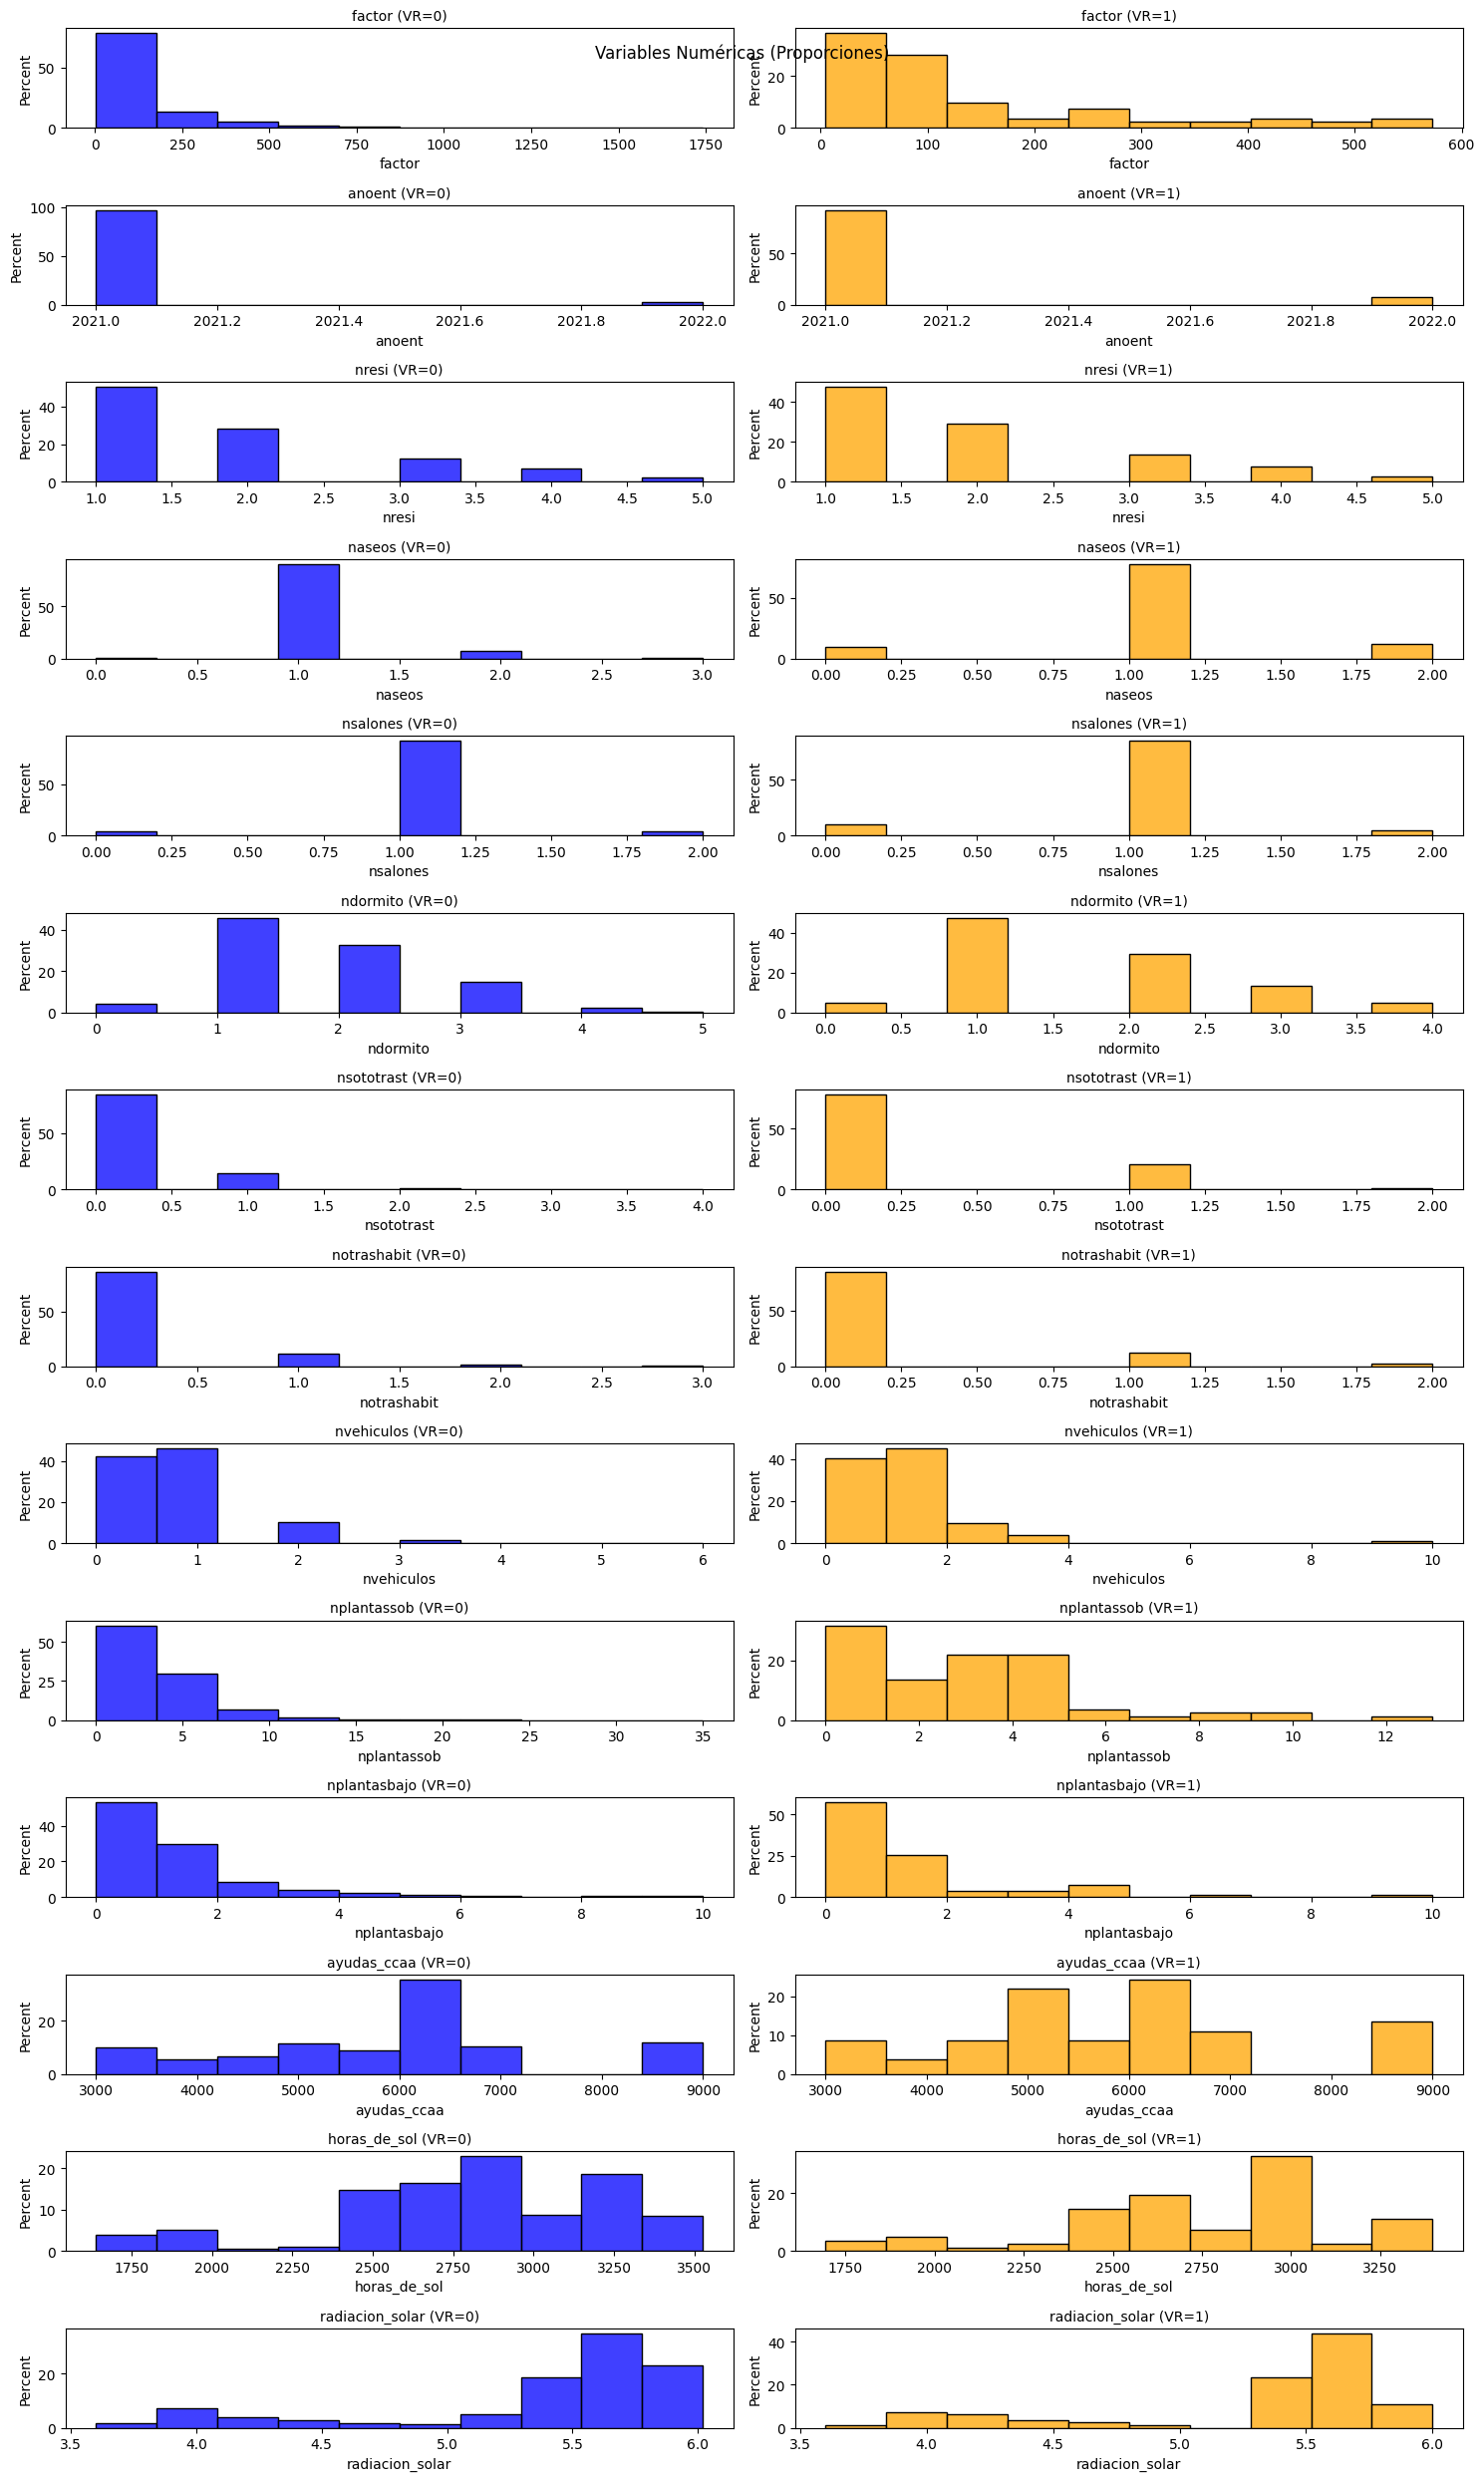

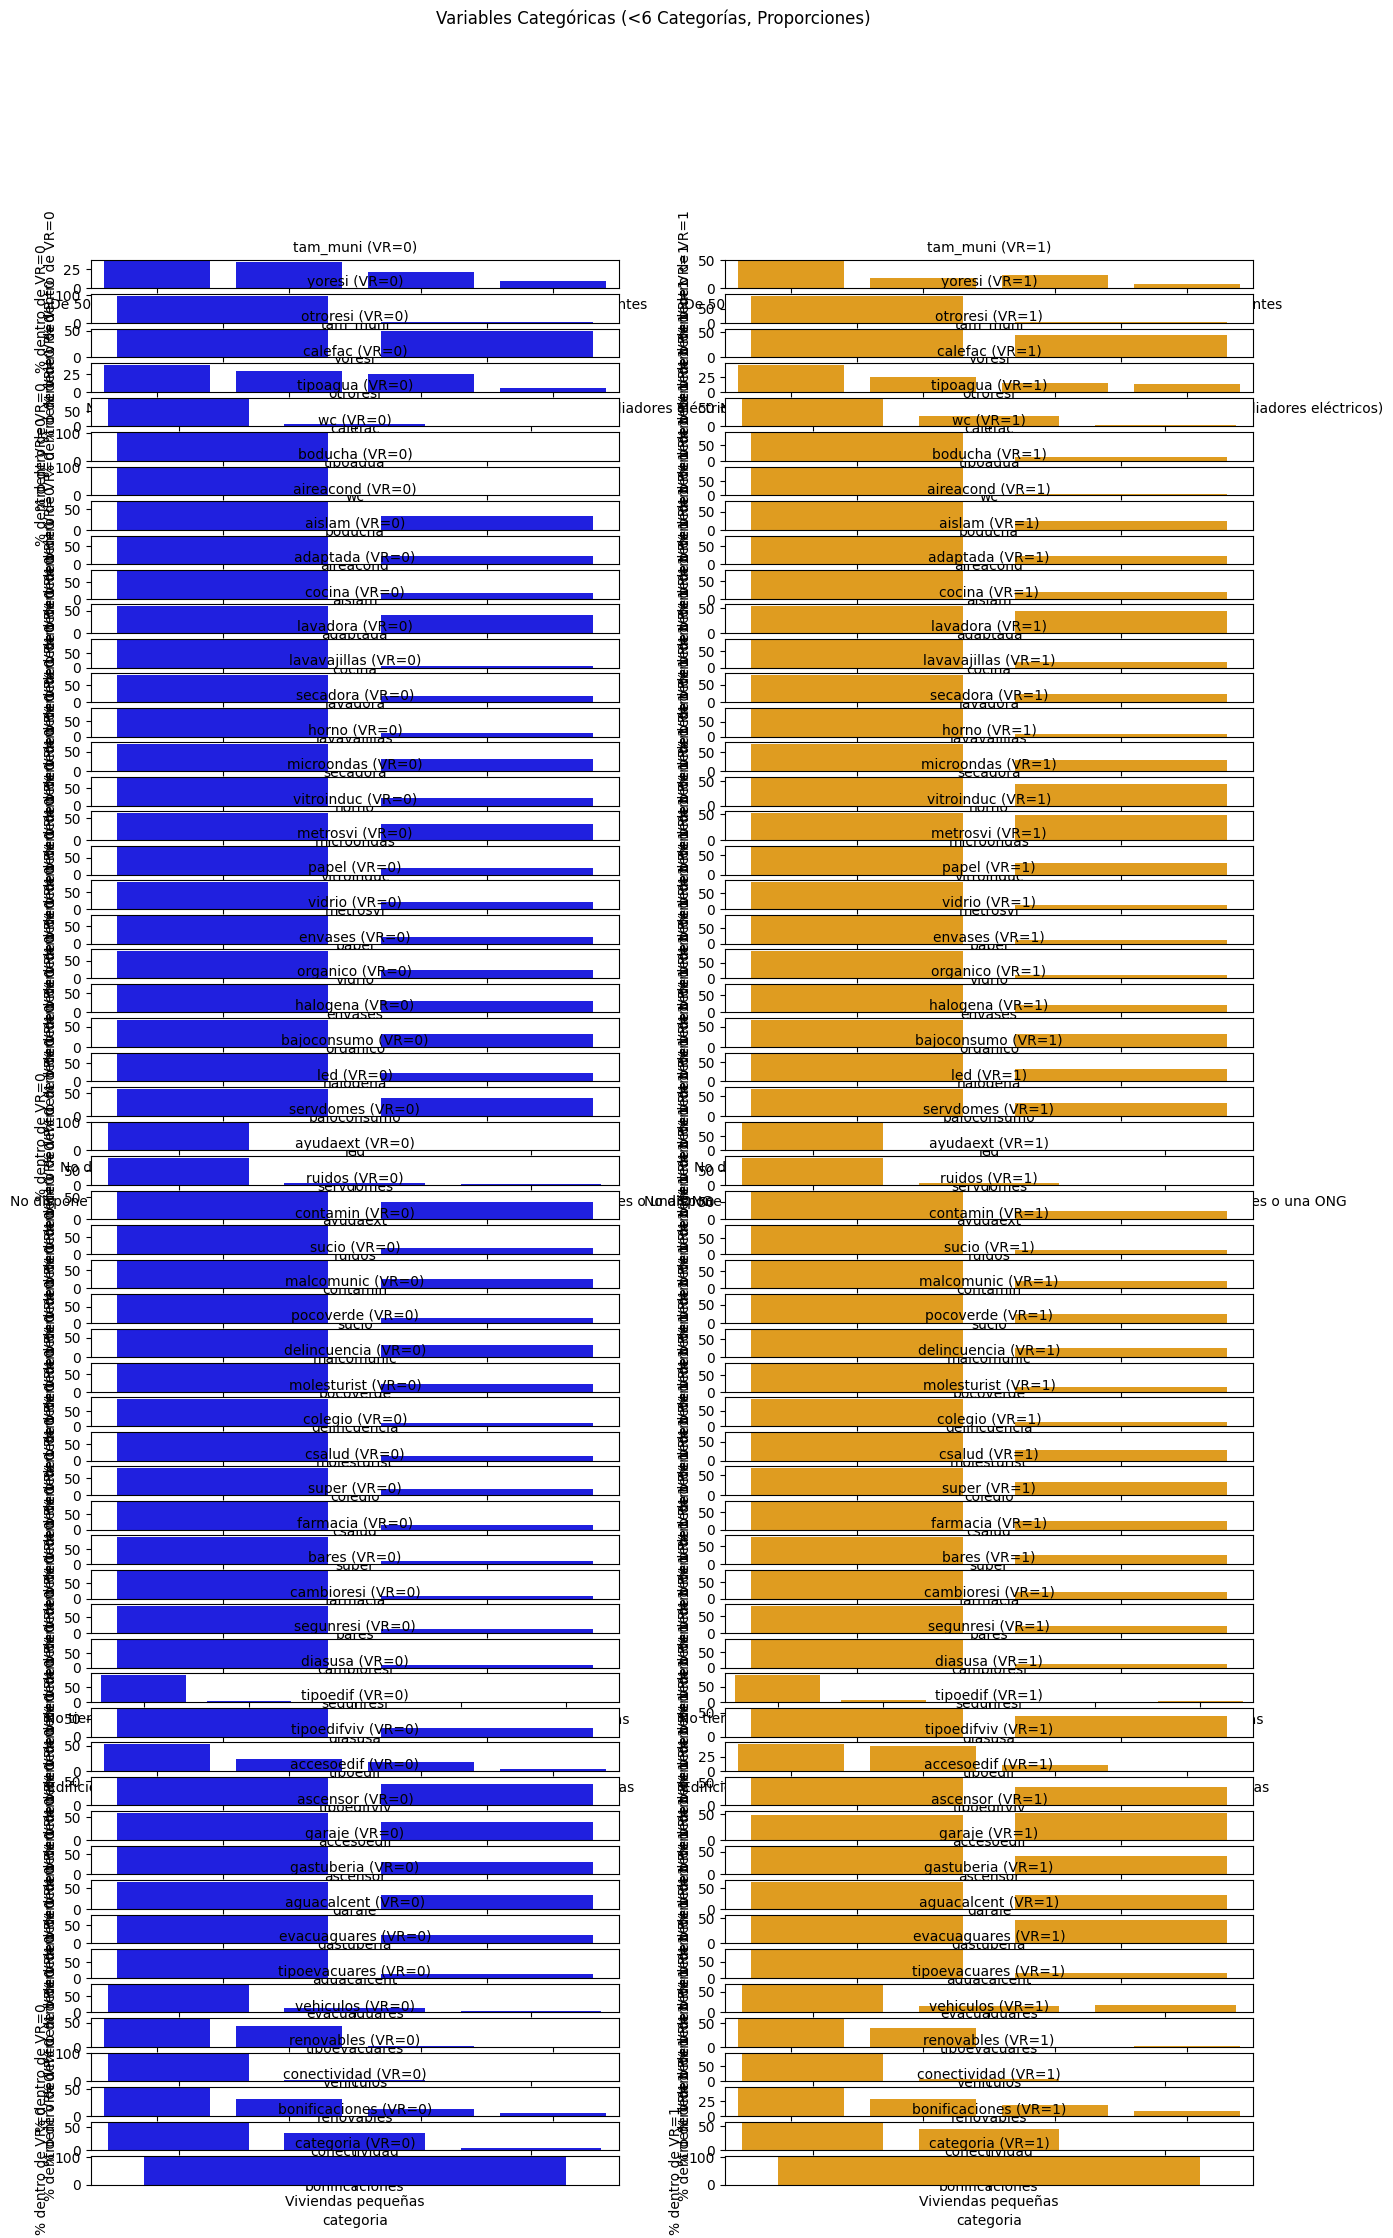

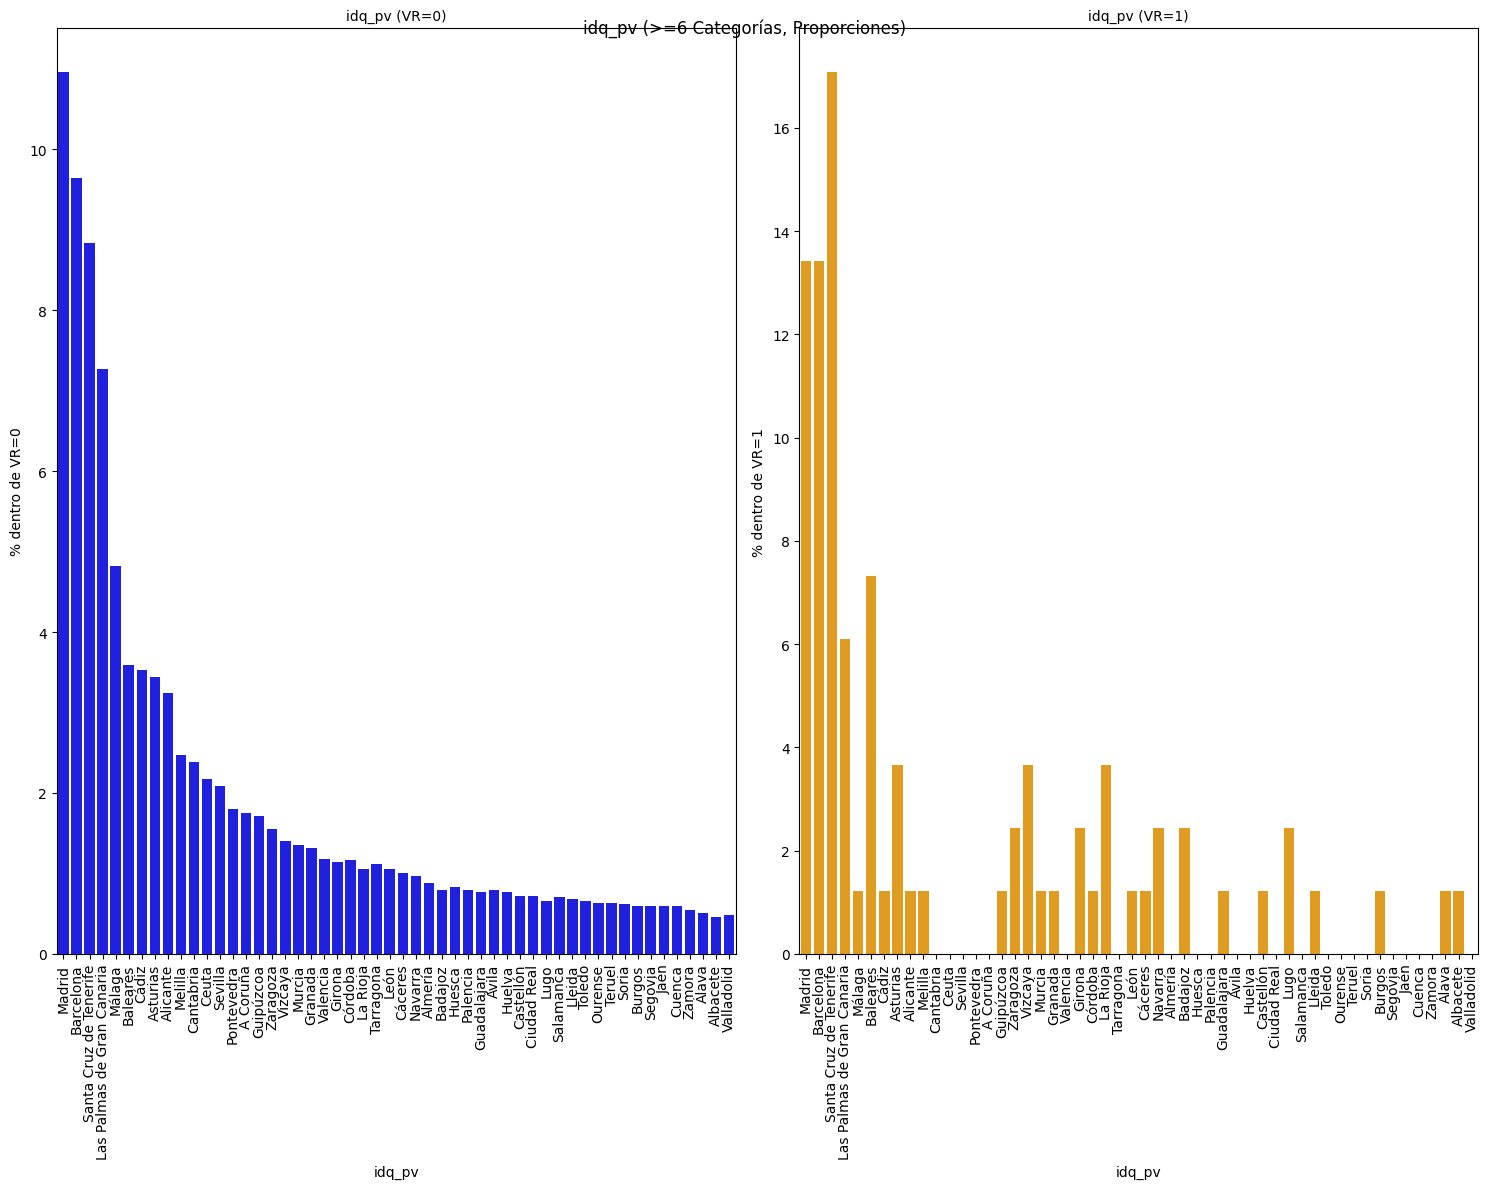

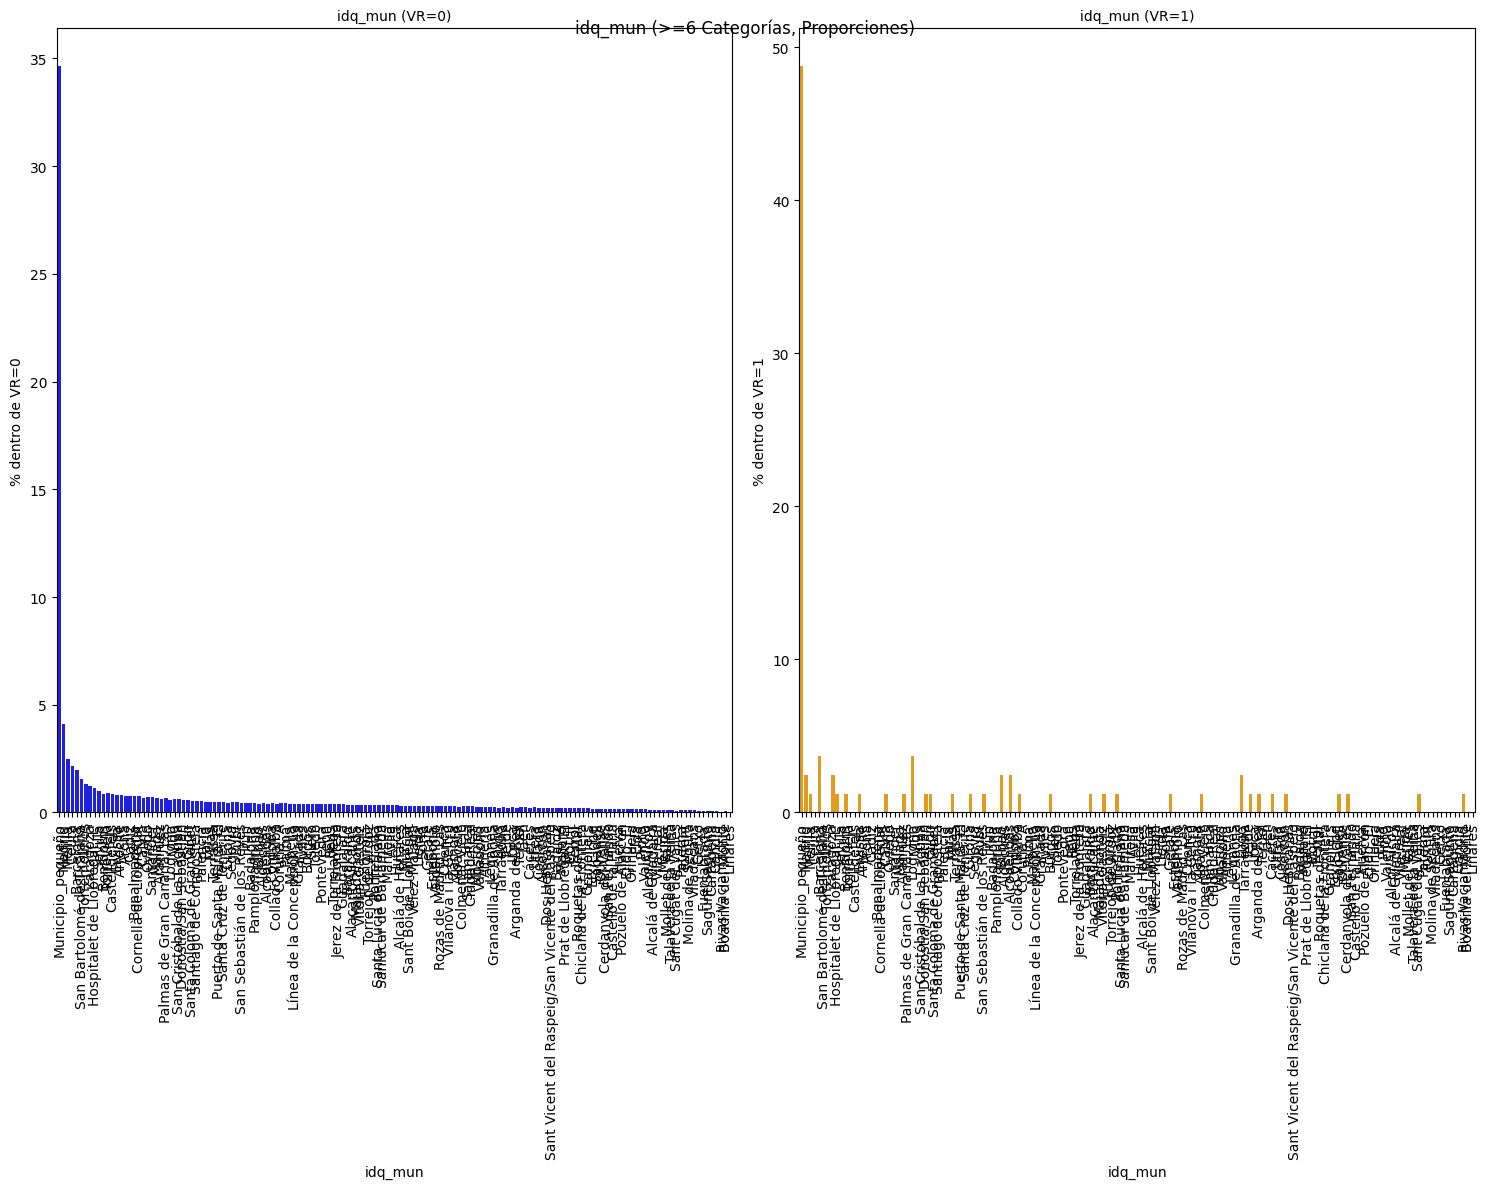

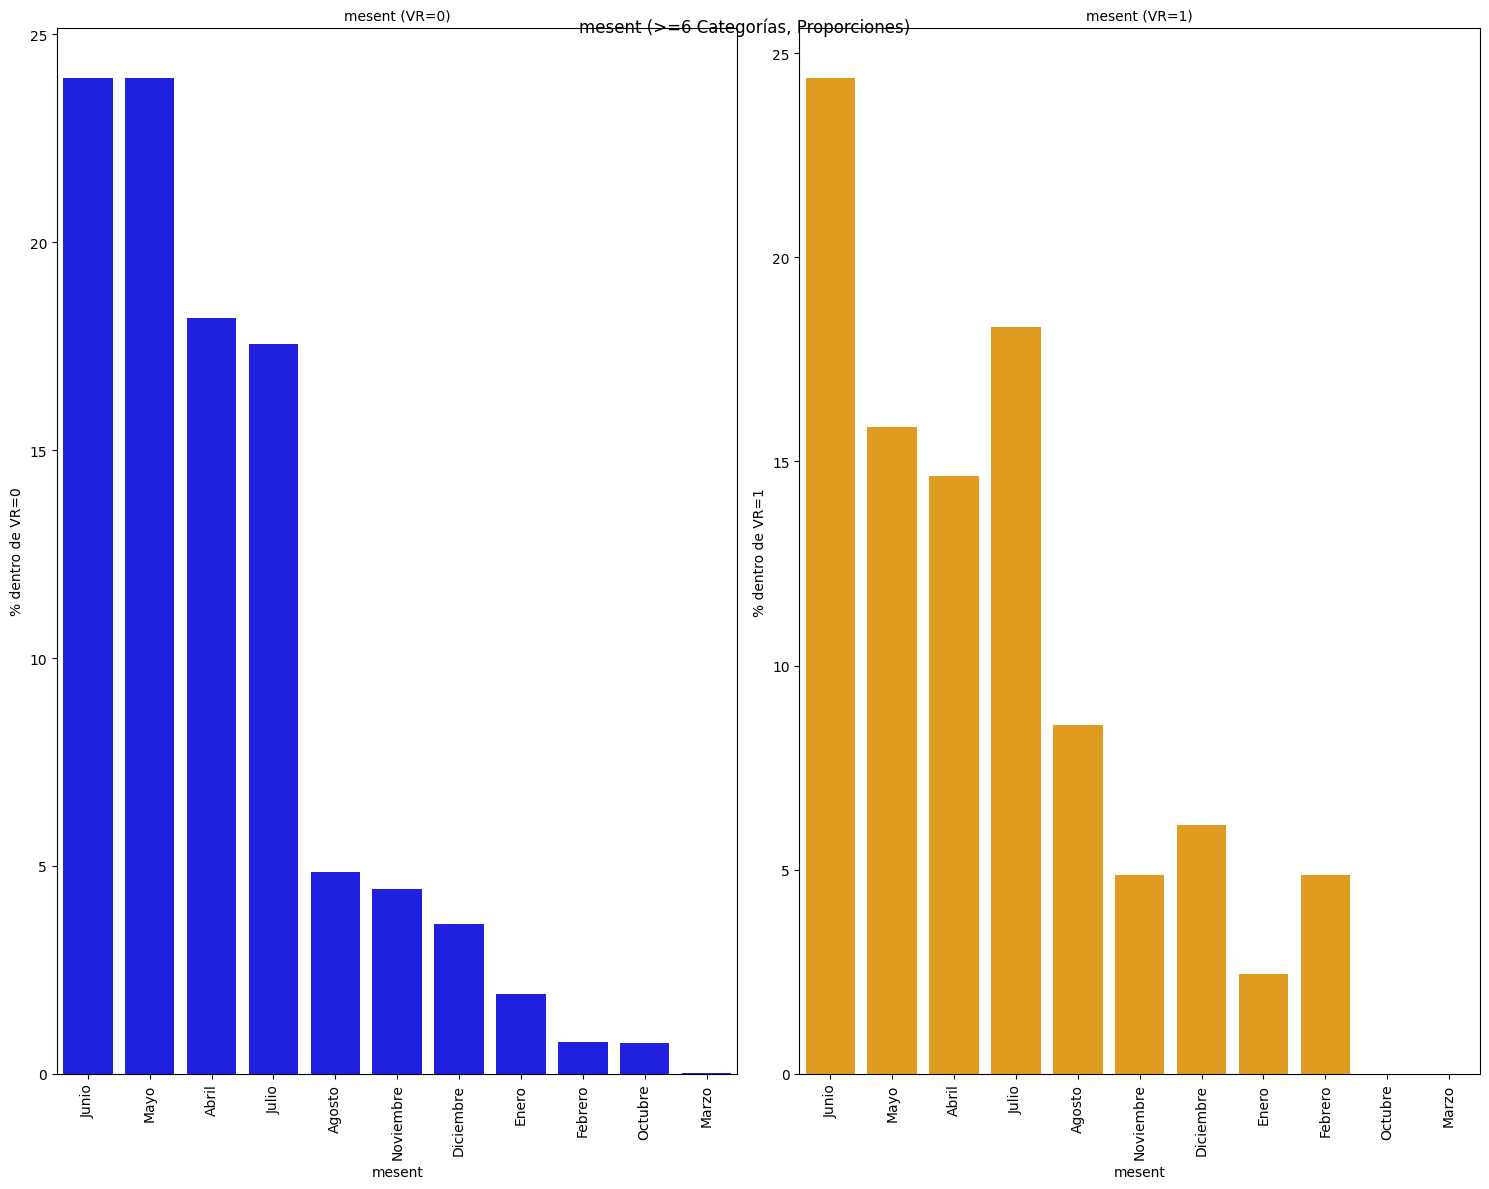

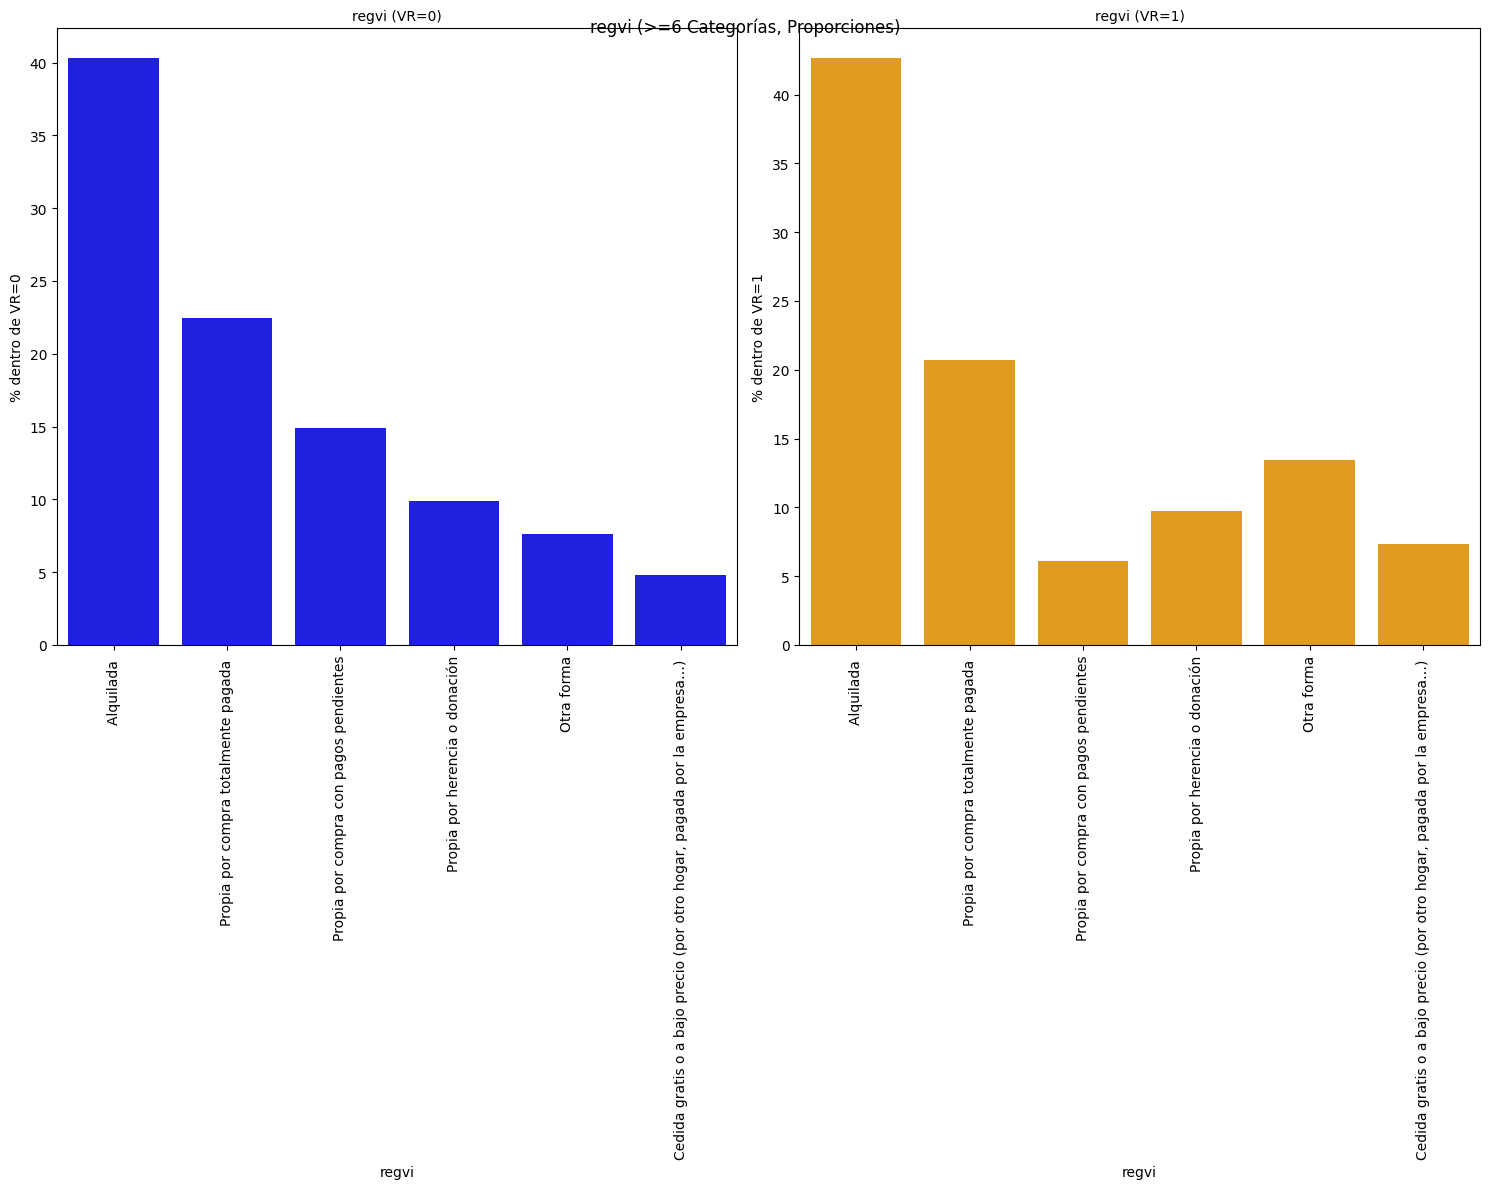

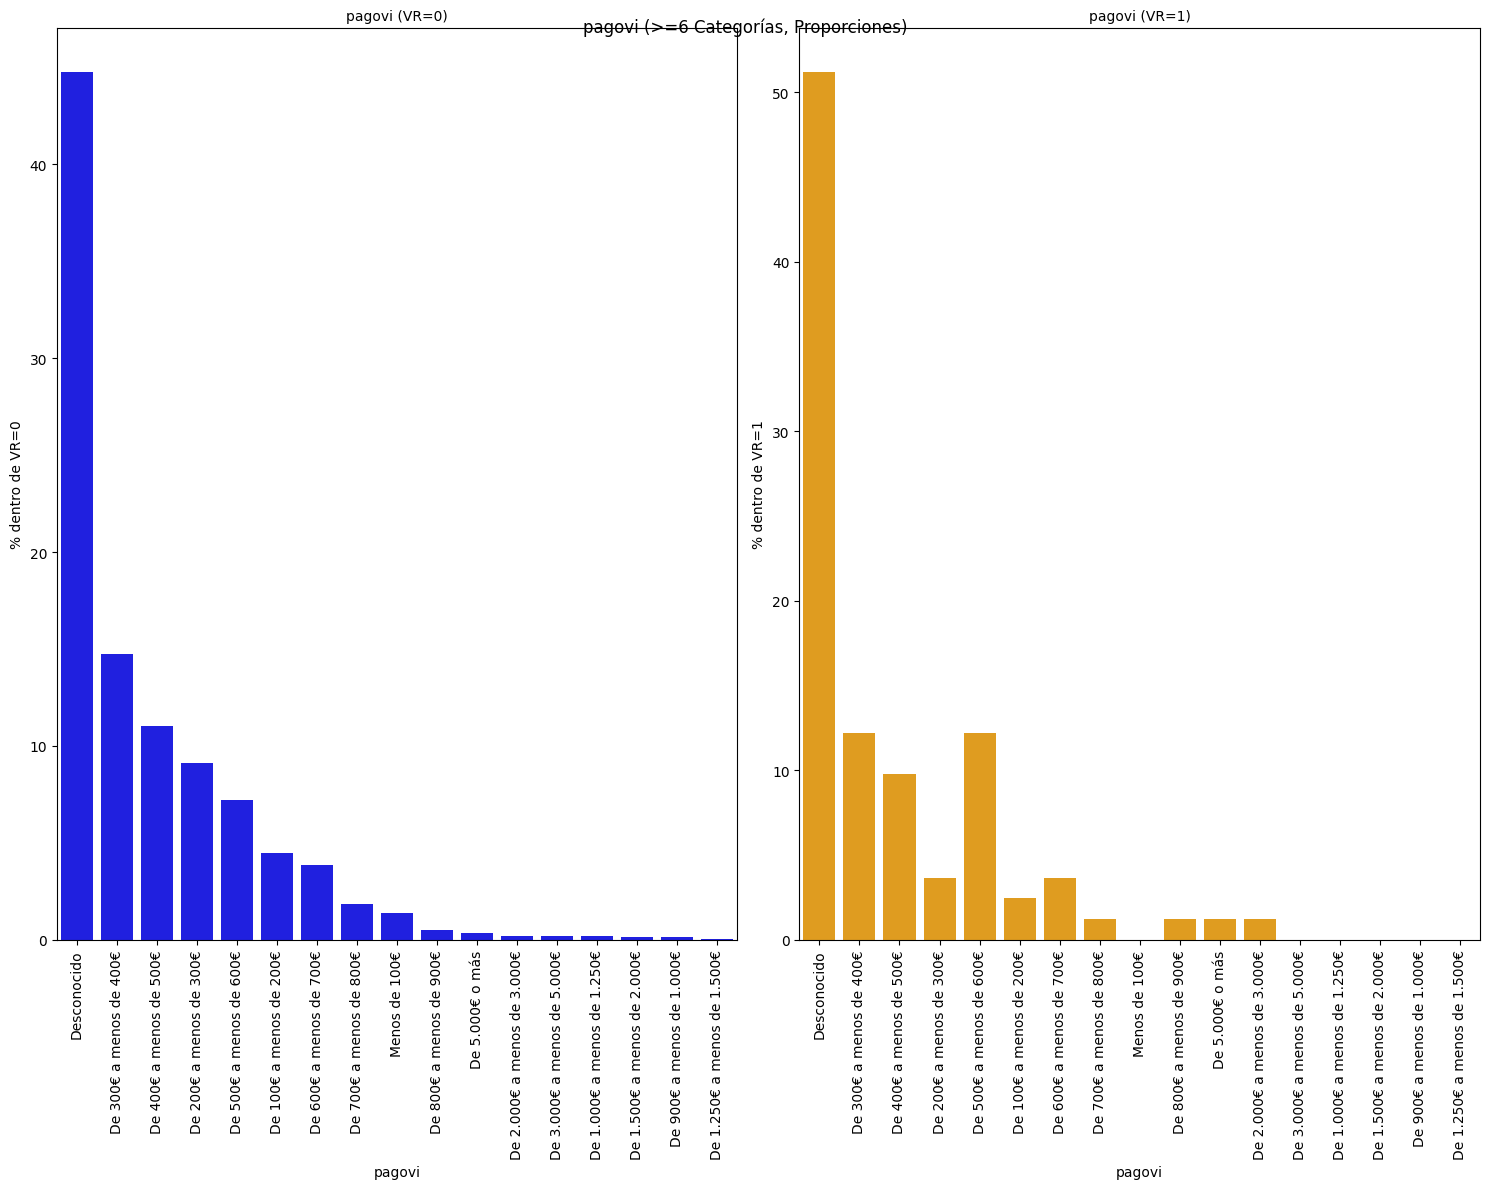

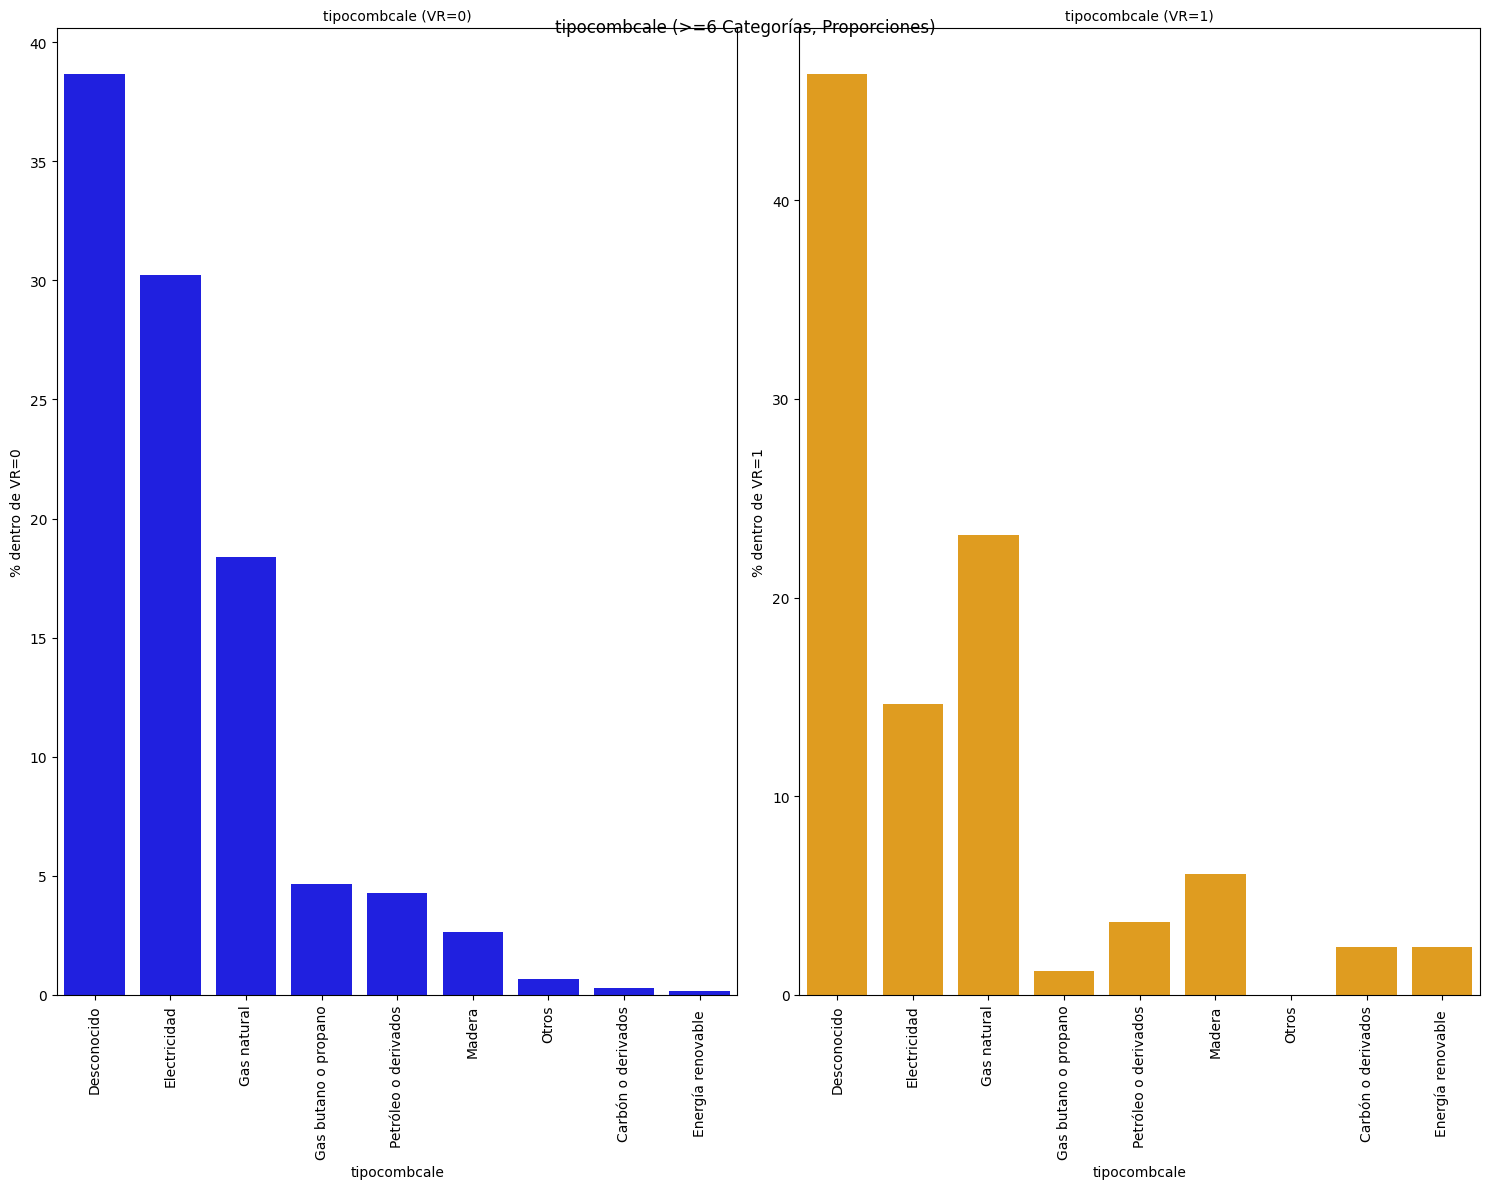

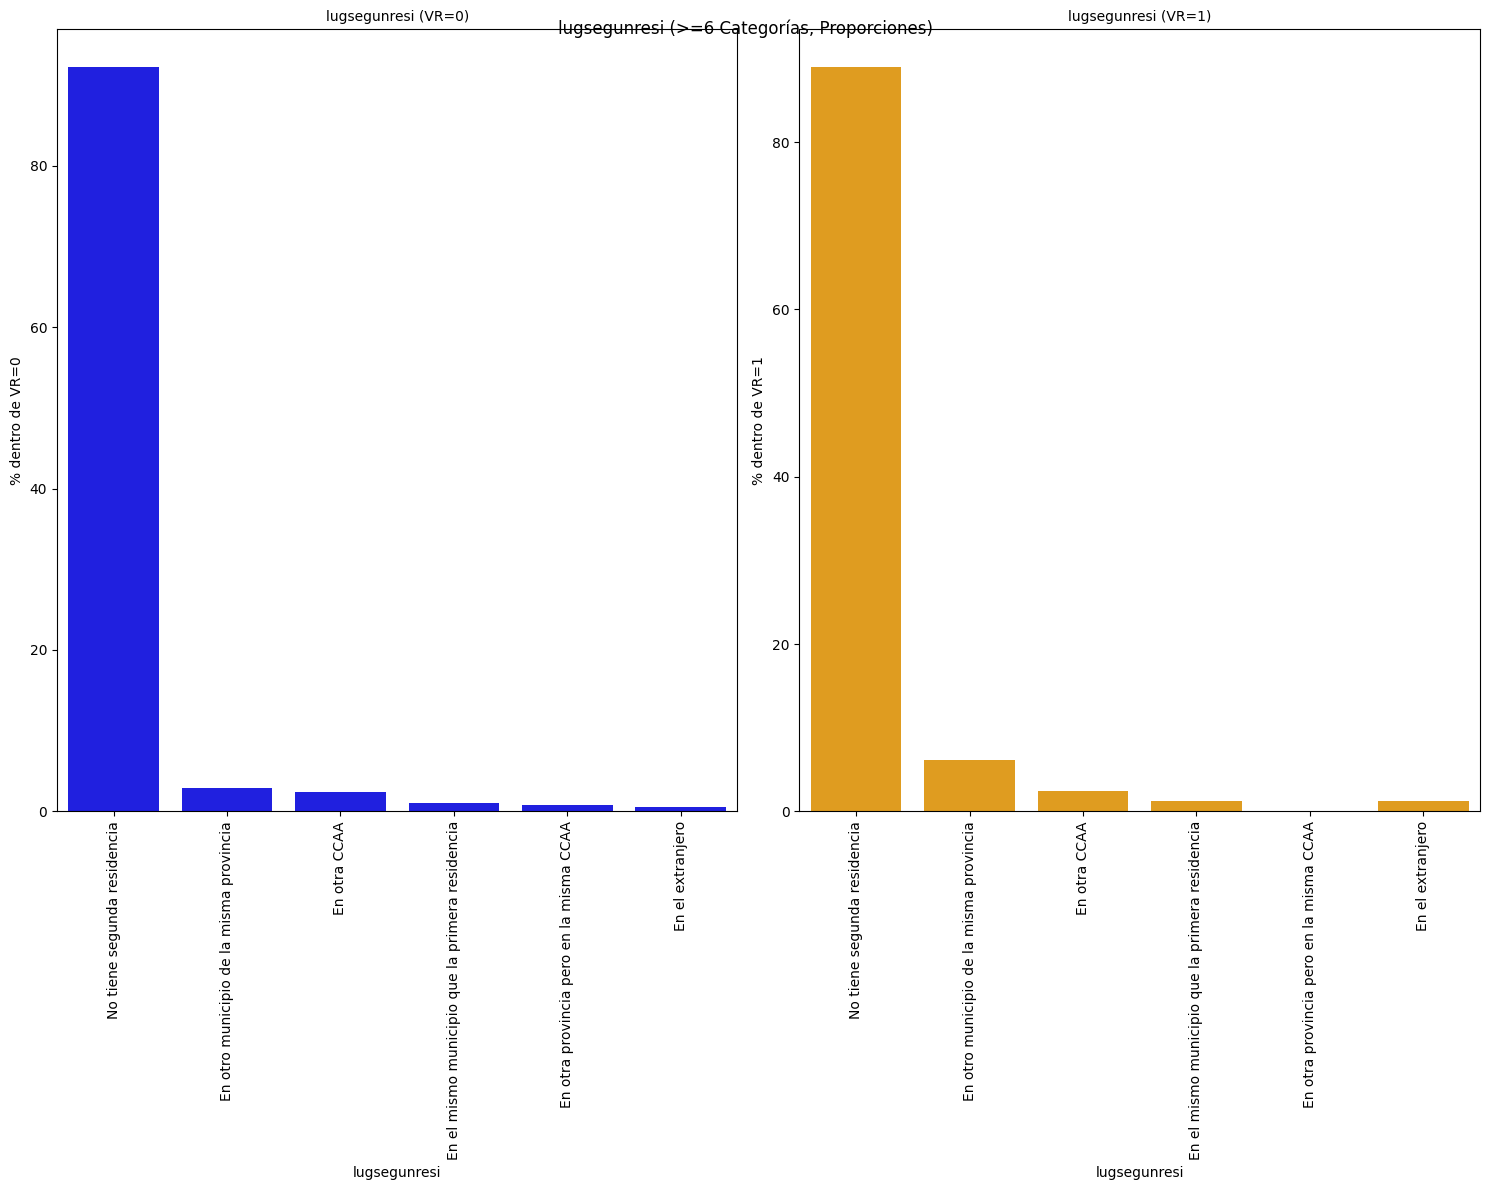

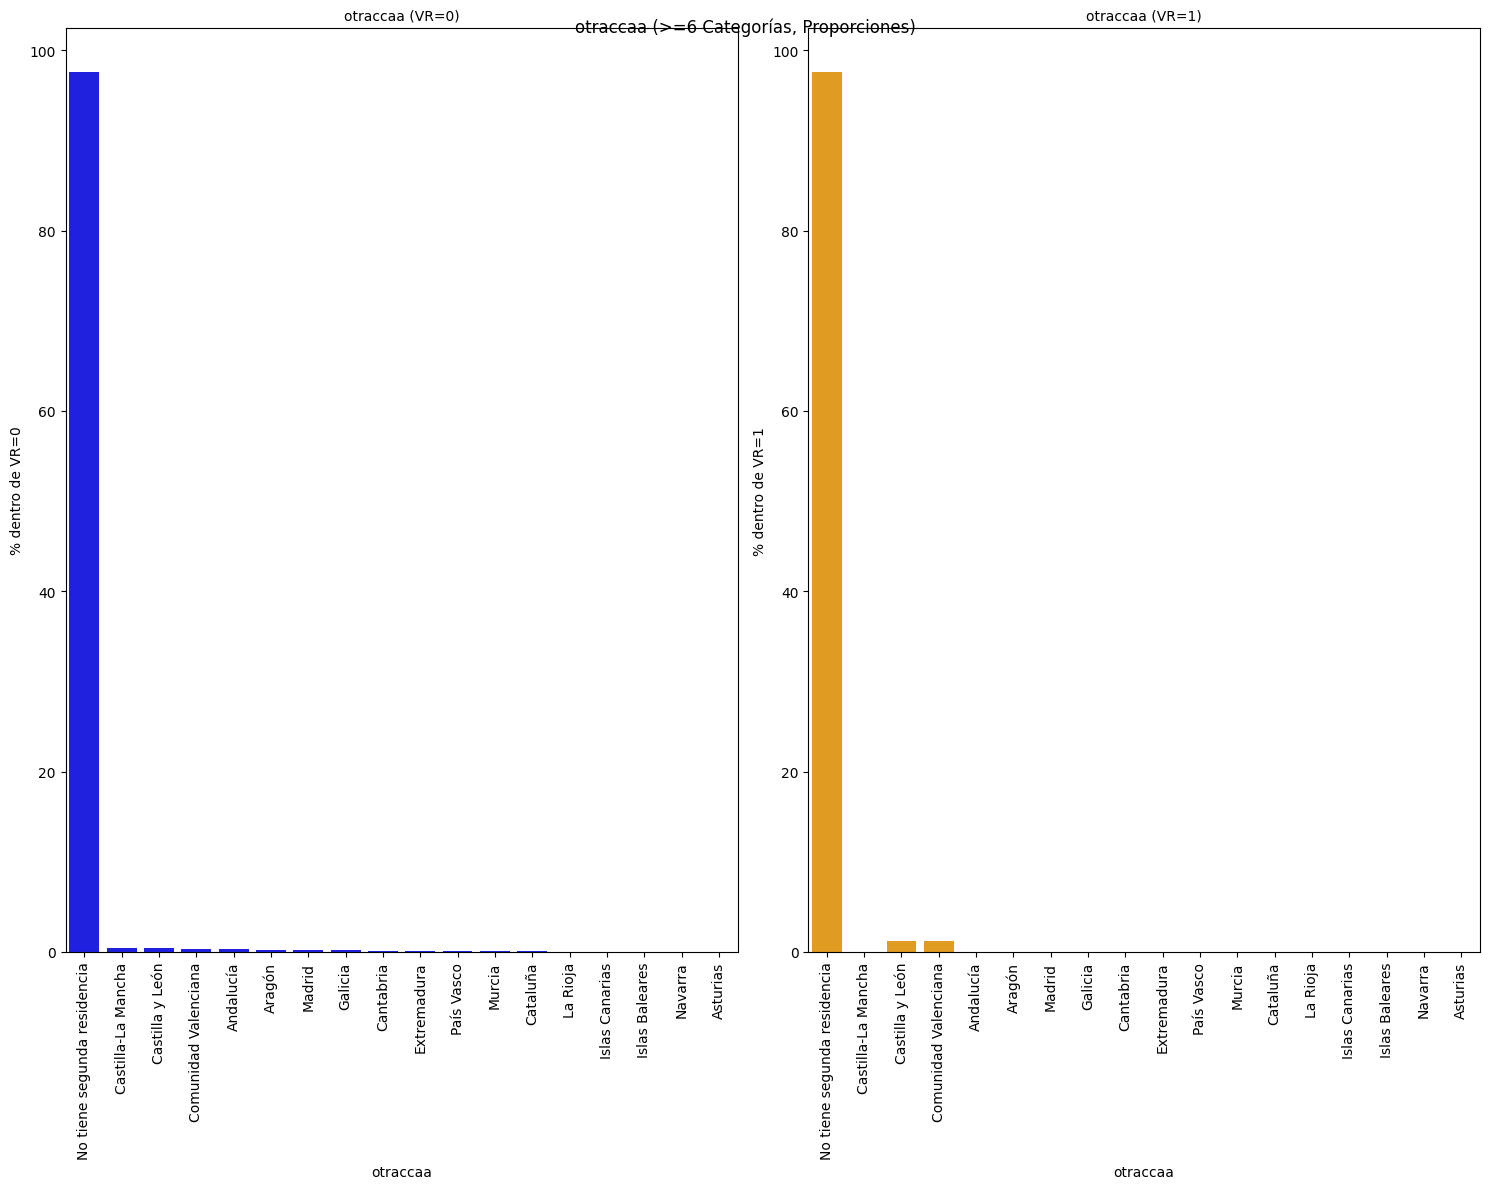

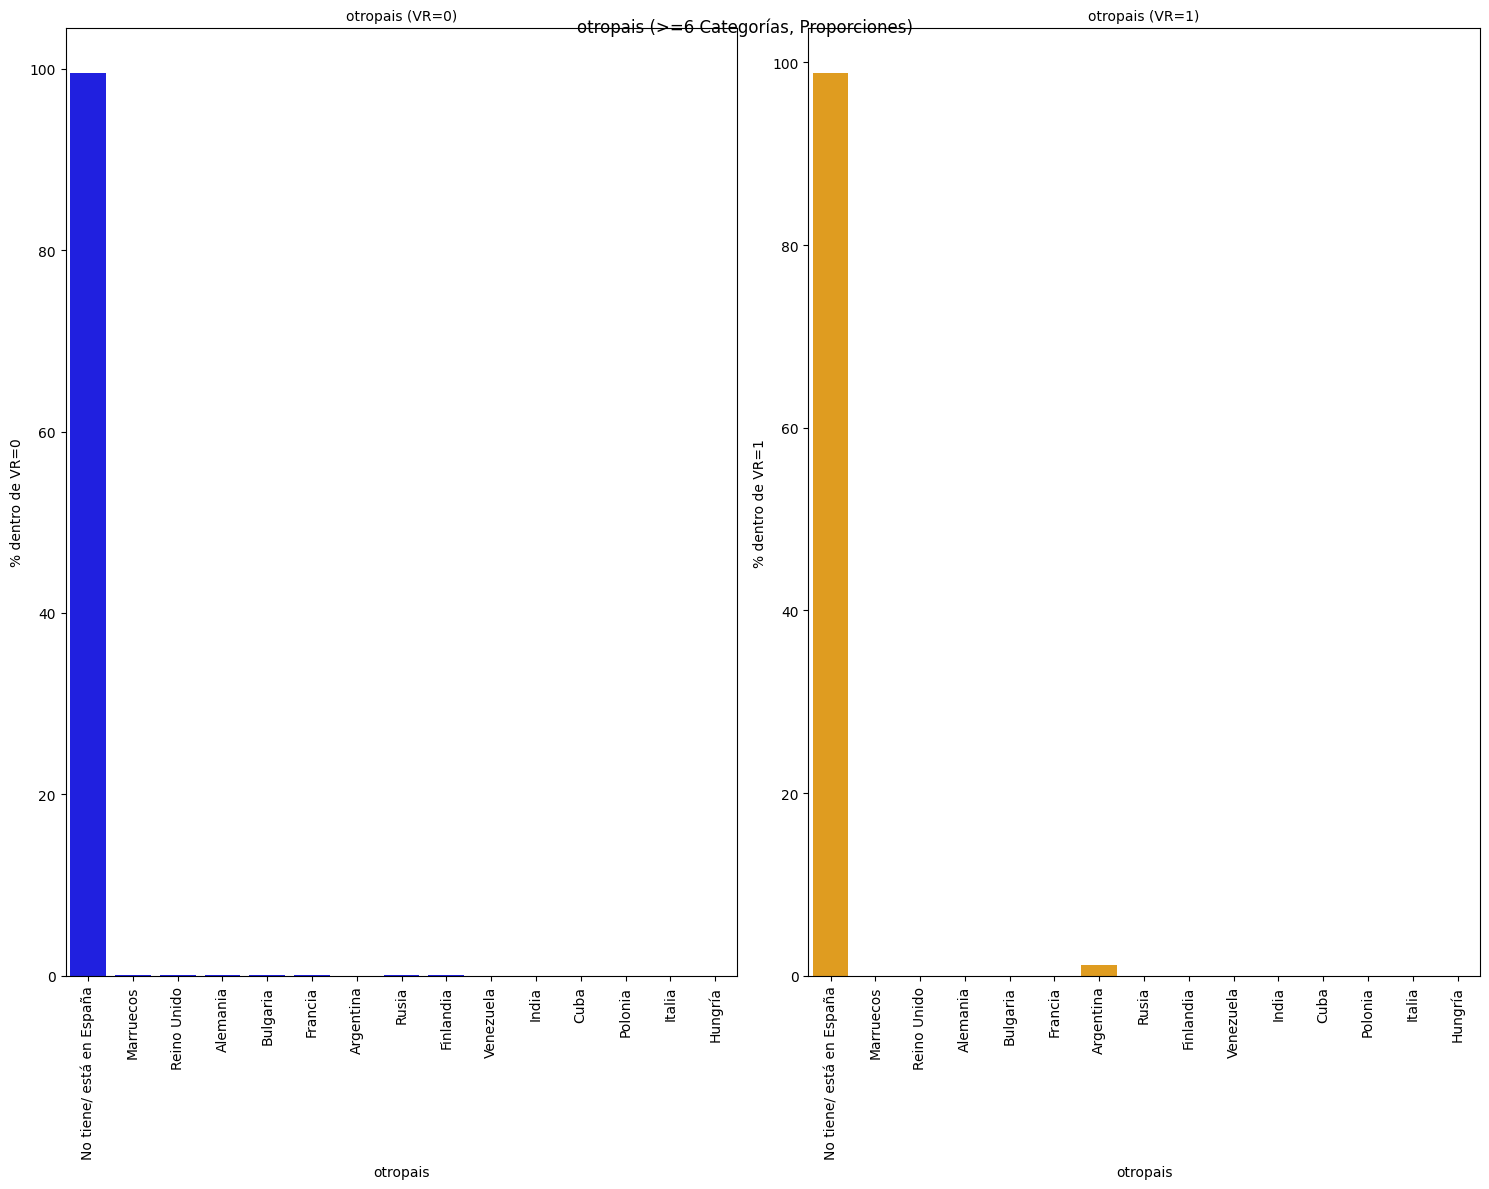

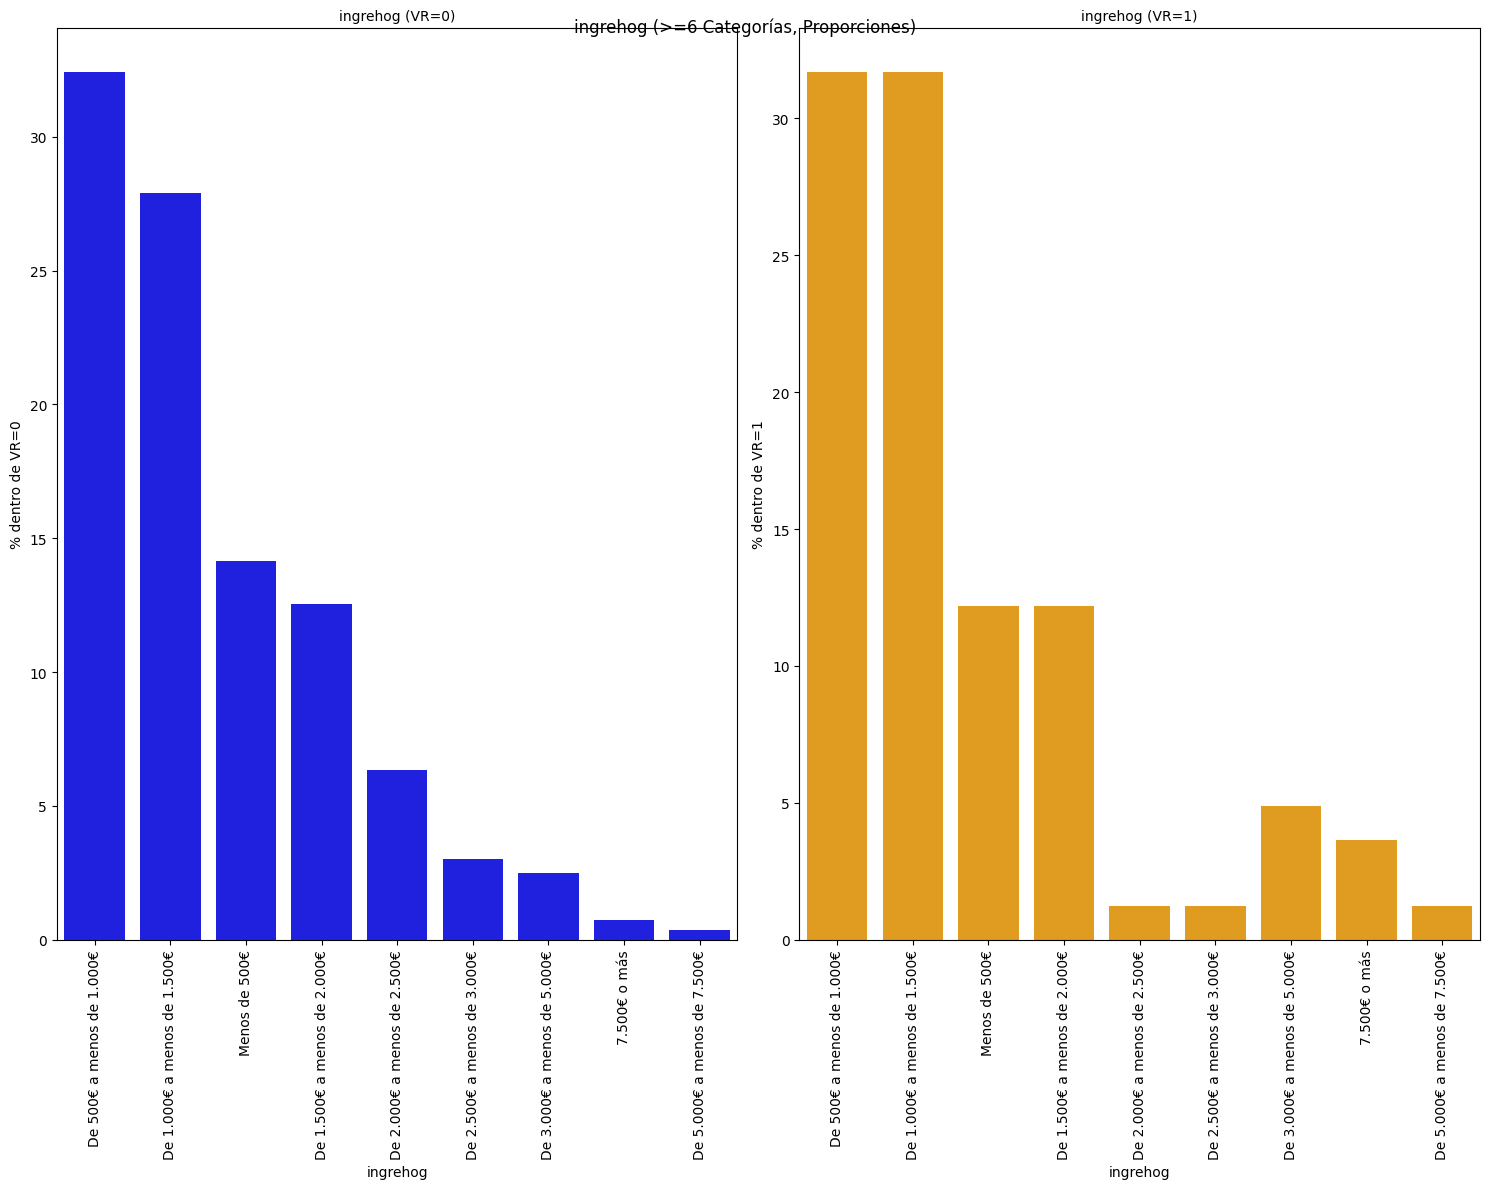

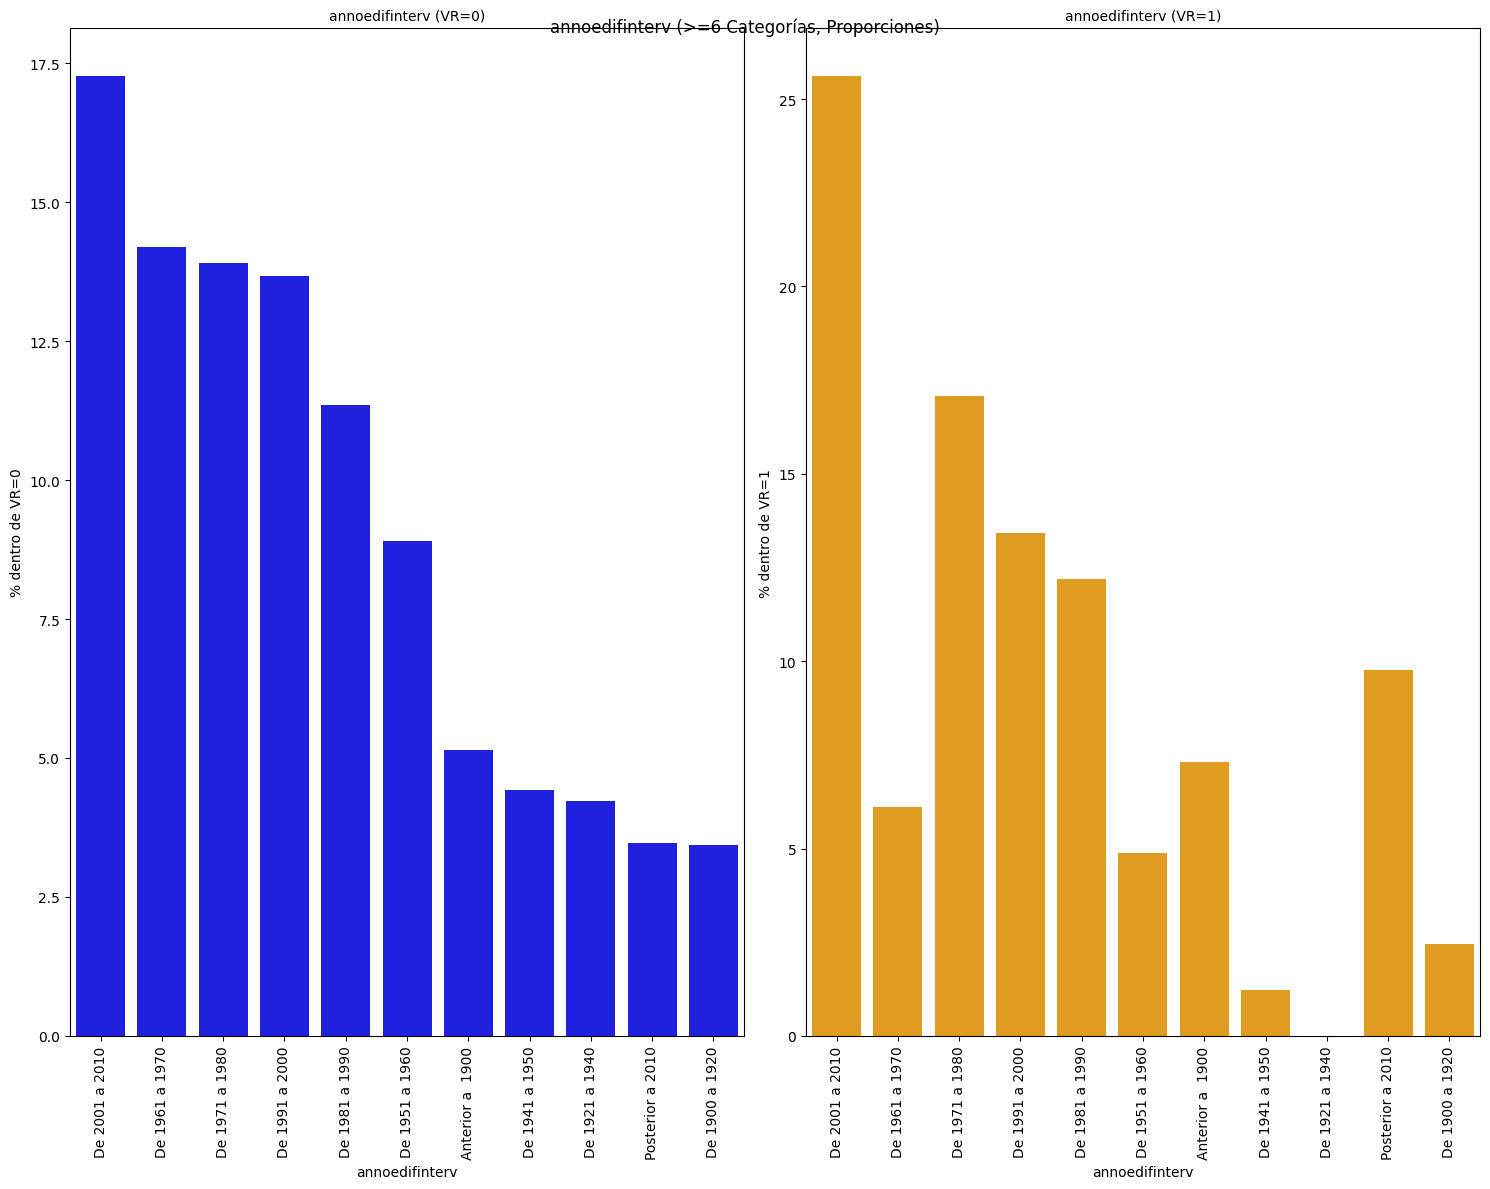

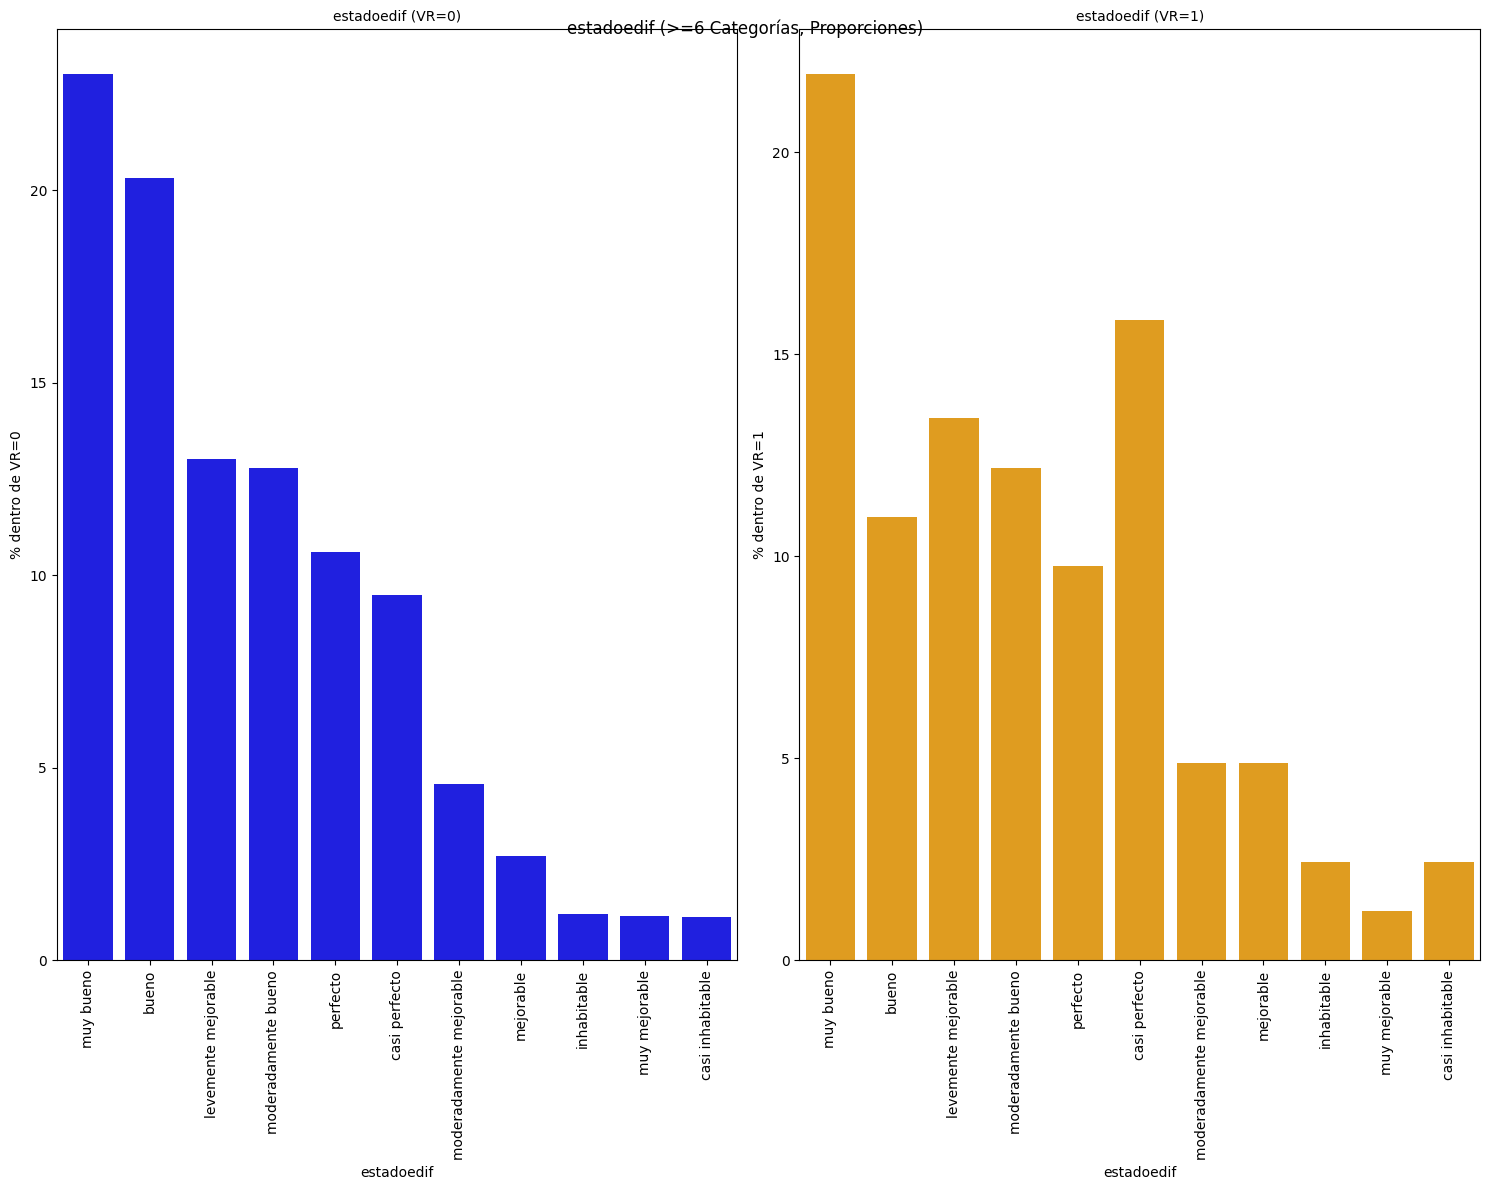

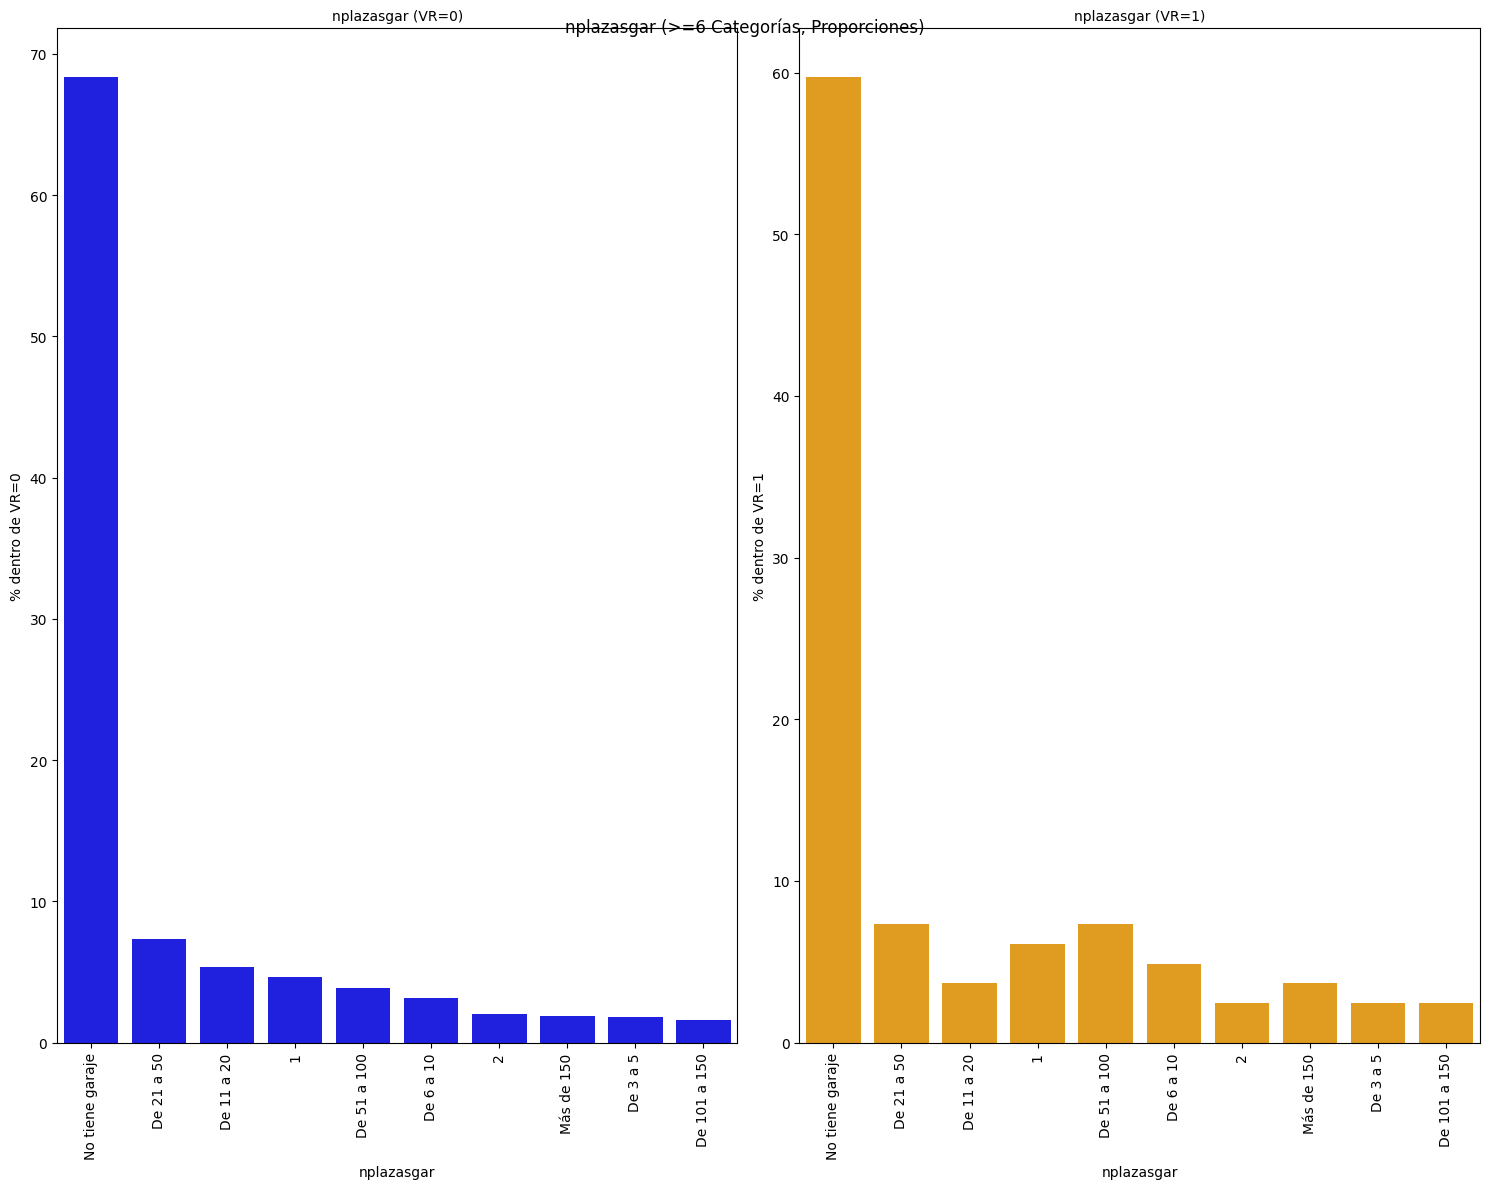

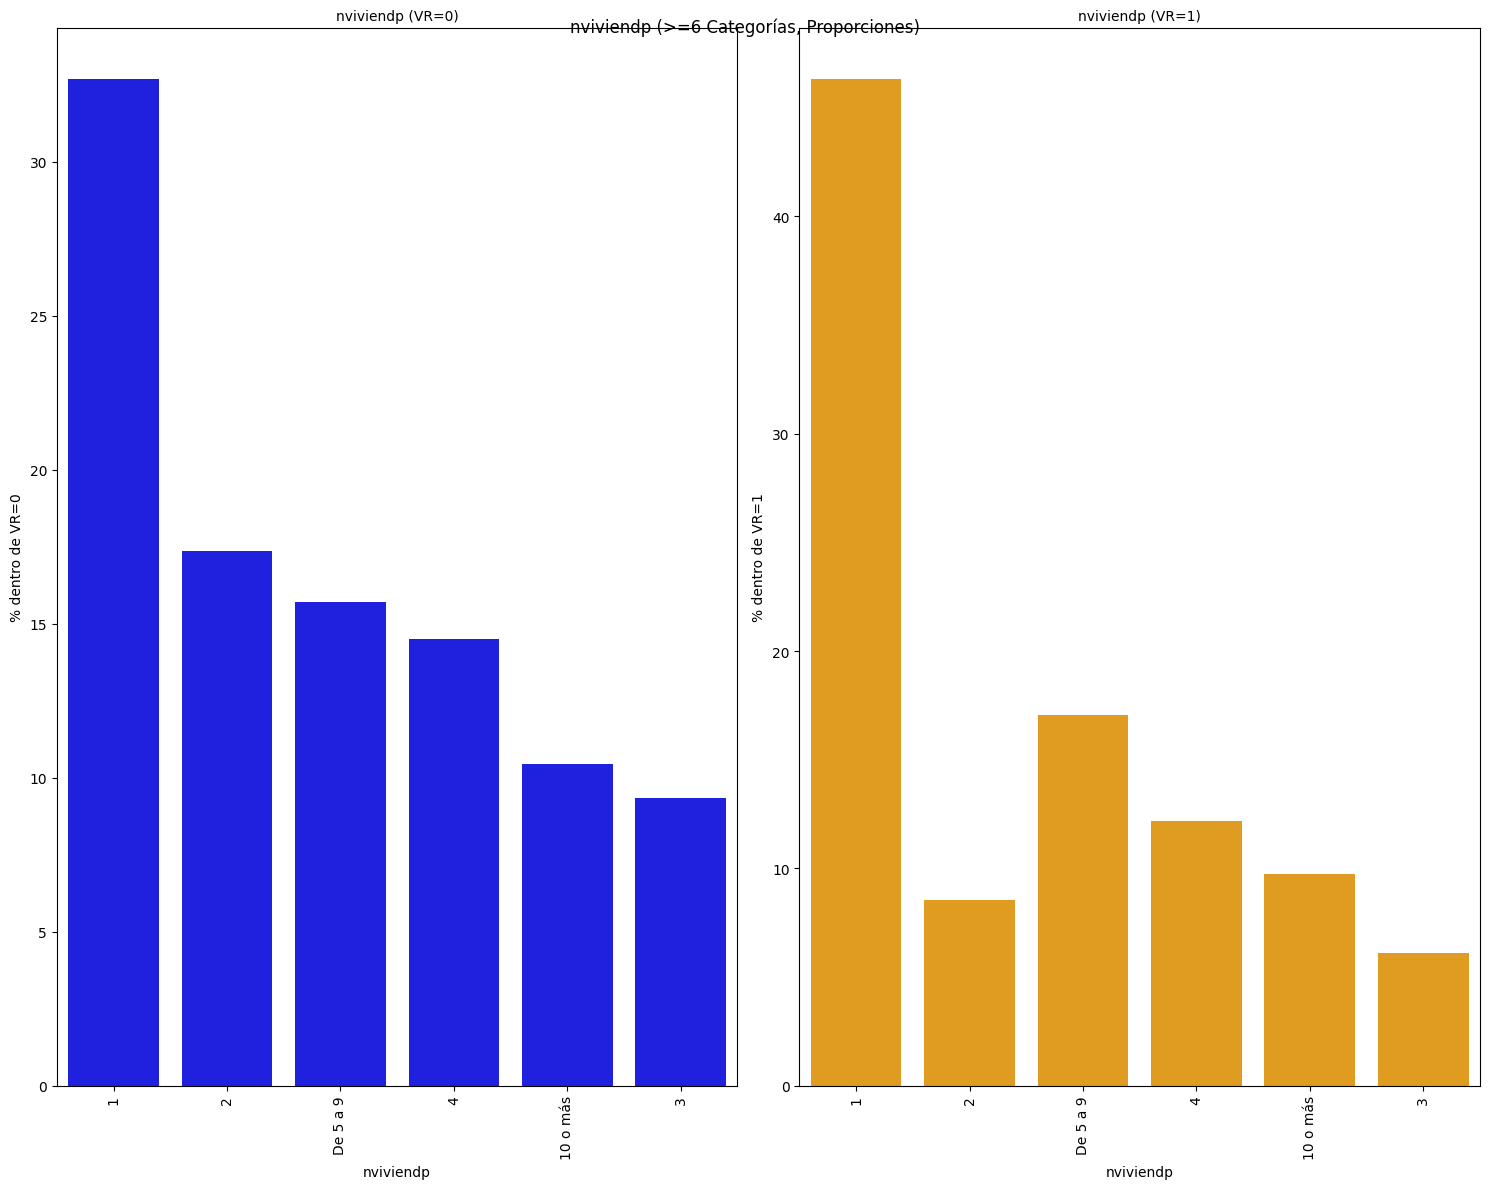

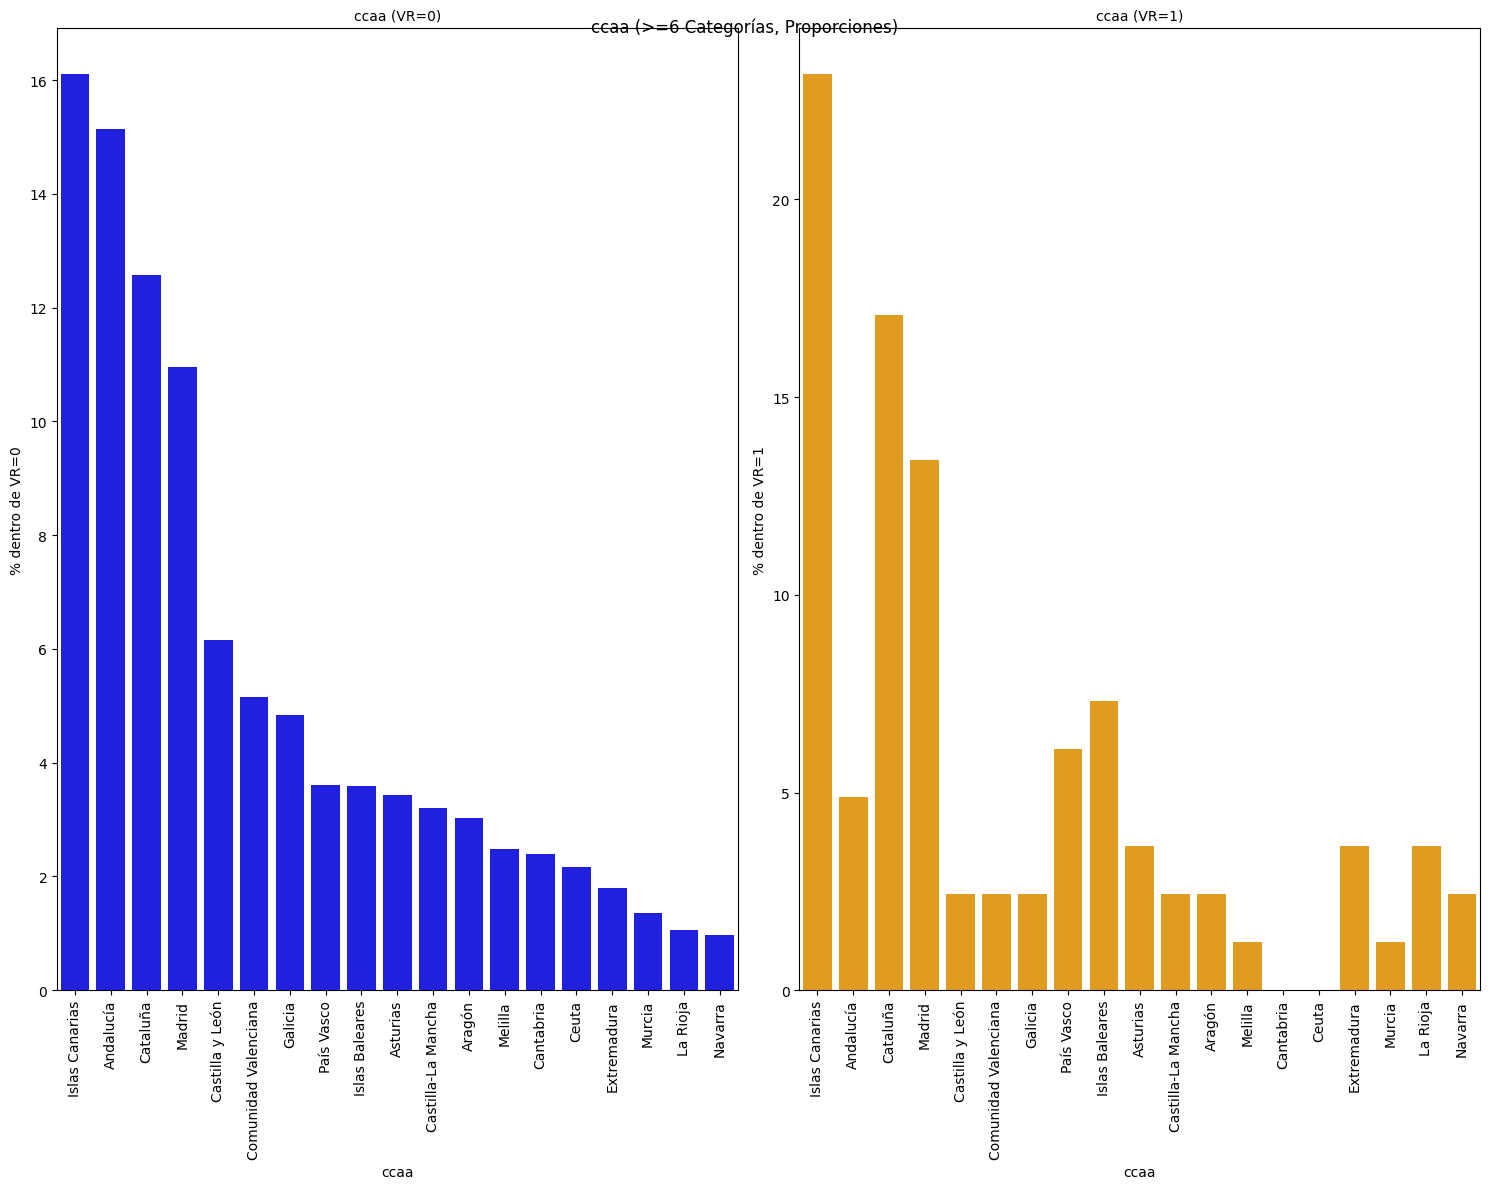

In [135]:
#relación individual con la variable dependiente (Proporcional)
visualizador.plot_relacion_individual_per("erfotov", tamano_grafica=(15, 25), tamanio_fuente=10)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

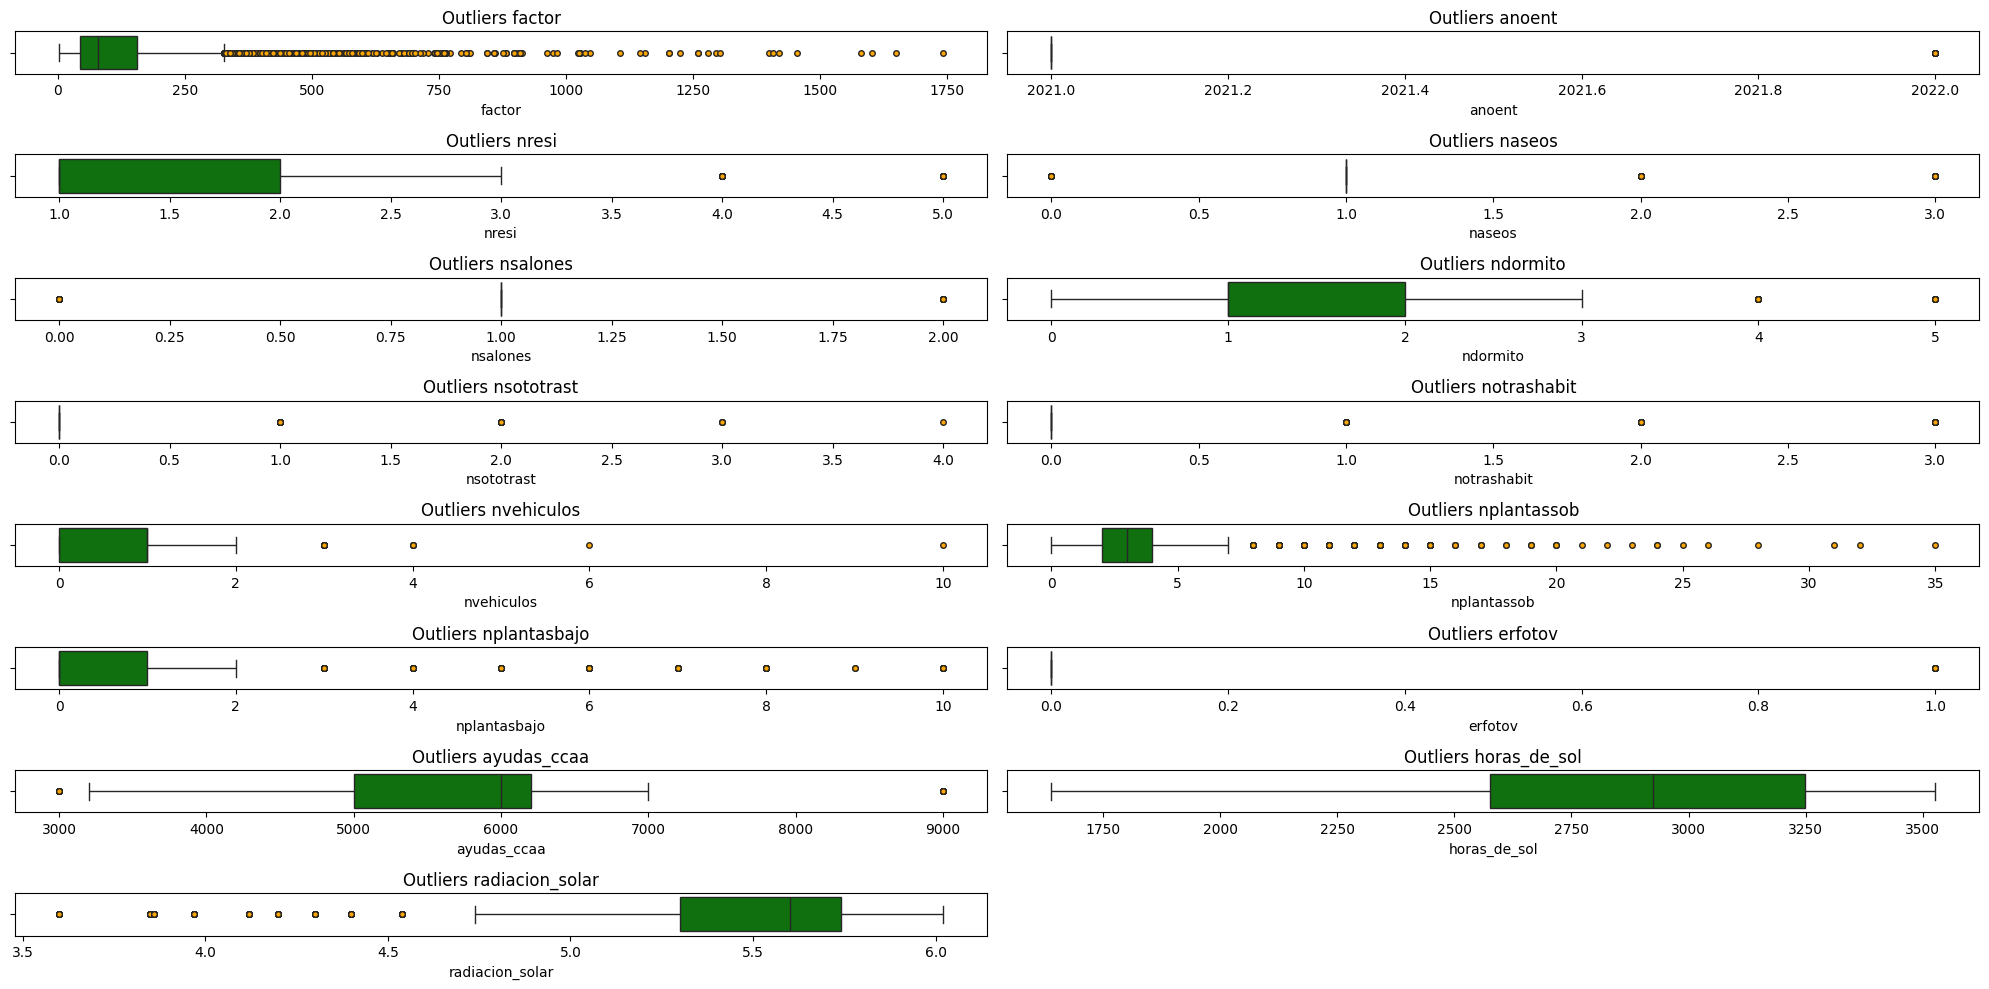

In [136]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

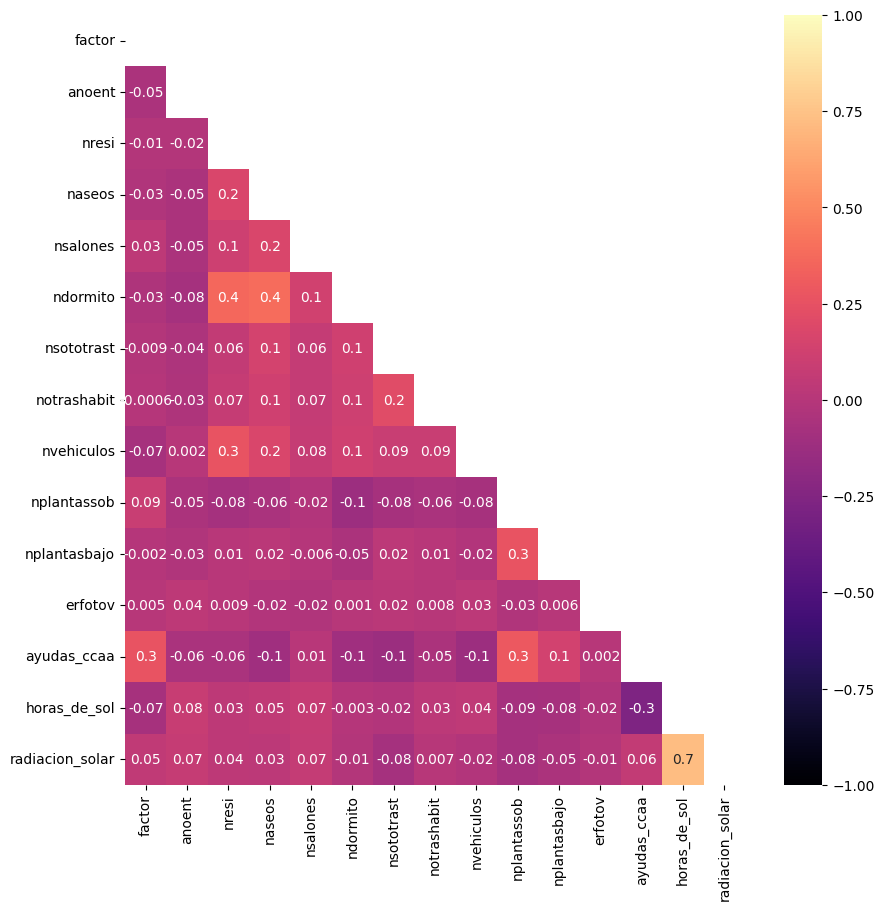

In [137]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [139]:
df_pequeñas_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           4646 non-null   object 
 1   idq_mun          4646 non-null   object 
 2   tam_muni         4646 non-null   object 
 3   factor           4646 non-null   float64
 4   mesent           4646 non-null   object 
 5   anoent           4646 non-null   int64  
 6   yoresi           4646 non-null   object 
 7   otroresi         4646 non-null   object 
 8   nresi            4646 non-null   int64  
 9   regvi            4646 non-null   object 
 10  pagovi           4646 non-null   object 
 11  calefac          4646 non-null   object 
 12  tipocombcale     4646 non-null   object 
 13  tipoagua         4646 non-null   object 
 14  wc               4646 non-null   object 
 15  boducha          4646 non-null   object 
 16  aireacond        4646 non-null   object 
 17  aislam        

In [140]:
columnas_a_formatear = [                                            #columnas a formatear a tipo "O"
    "nsototrast", "notrashabit", "nvehiculos", "naseos", "nsalones", 
    "ndormito", "nplantasbajo", "nresi"]

df_pequeñas_sin_outliers[columnas_a_formatear] = df_pequeñas_sin_outliers[columnas_a_formatear].astype("O")

In [141]:
df_pequeñas_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           4646 non-null   object 
 1   idq_mun          4646 non-null   object 
 2   tam_muni         4646 non-null   object 
 3   factor           4646 non-null   float64
 4   mesent           4646 non-null   object 
 5   anoent           4646 non-null   int64  
 6   yoresi           4646 non-null   object 
 7   otroresi         4646 non-null   object 
 8   nresi            4646 non-null   object 
 9   regvi            4646 non-null   object 
 10  pagovi           4646 non-null   object 
 11  calefac          4646 non-null   object 
 12  tipocombcale     4646 non-null   object 
 13  tipoagua         4646 non-null   object 
 14  wc               4646 non-null   object 
 15  boducha          4646 non-null   object 
 16  aireacond        4646 non-null   object 
 17  aislam        

In [142]:
df_pequeñas_sin_outliers.head(1)

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  70.450557  Junio   

   anoent yoresi otroresi nresi                           regvi       pagovi  \
0    2021     Si       Si     4  Propia por herencia o donación  Desconocido   

      calefac          tipocombcale                 tipoagua  wc boducha  \
0  individual  Petróleo o derivados  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     No       No     Si       Si           No       No    Si   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      1        1        3          2           0   

           metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 31 y 45 m2          1    Si     No      Si       Si       No   

  bajoconsumo led                    servdomes  \
0          No  Si  servicio doméstico interno    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      No     Si    No       Si   

  bares cambioresi segunresi                 lugsegunresi  \
0    Si         No        No  No tiene segunda residencia   

                      otraccaa                  otropais  \
0  No tiene segunda residencia  No tiene/ está en España   

                       diasusa                   ingrehog     tipoedif  \
0  No tiene segunda residencia  De 500€ a menos de 1.000€  Unifamiliar   

             tipoedifviv  nplantassob nplantasbajo  annoedifinterv estadoedif  \
0  Vivienda unifamiliar             2            1  De 1941 a 1950      bueno   

        accesoedif ascensor garaje nplazasgar gastuberia aguacalcent  \
0  No es accesible       No     Si          1         No          Si   

  evacuaguares     tipoevacuares  erfotov nviviendp     vehiculos  \
0           Si  Alcantarillado          0         1  convencional   

           renovables      conectividad        ccaa  ayudas_ccaa  \
0  no tiene renovable  banda ancha fija  País Vasco         4800   

  bonificaciones  horas_de_sol  radiacion_solar           categoria  
0            IBI          2147              4.2  Viviendas pequeñas

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [143]:
df_erf=pd.DataFrame(df_pequeñas_sin_outliers["erfotov"])

In [144]:
outliers=d.GestionOutliersMultivariados(df_pequeñas_sin_outliers.drop(columns=["erfotov"]))
df_outpeque=outliers.detectar_outliers_if(0.01)

In [145]:
df_outpeque.head()

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  70.450557  Junio   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  51.333499   Mayo   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  88.378354  Junio   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  99.561827   Mayo   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.037846  Julio   

   anoent yoresi otroresi nresi                                 regvi  \
0    2021     Si       Si     4        Propia por herencia o donación   
1    2021     Si       Si     5                            Alquilada    
2    2021     Si       No     1                            Alquilada    
3    2021     Si       Si     2                            Alquilada    
4    2021     Si       No     1  Propia por compra totalmente pagada    

                    pagovi               calefac          tipocombcale  \
0              Desconocido            individual  Petróleo o derivados   
1  De 400€ a menos de 500€            individual  Gas butano o propano   
2  De 100€ a menos de 200€  No tiene calefacción           Desconocido   
3  De 100€ a menos de 200€            individual          Electricidad   
4              Desconocido  No tiene calefacción           Desconocido   

                  tipoagua  wc boducha aireacond aislam adaptada cocina  \
0  abastecimiento público   Si      Si        No     No       No     Si   
1  abastecimiento público   Si      Si        No     No       No     Si   
2  abastecimiento público   Si      Si        No     Si       No     Si   
3  abastecimiento público   Si      Si        Si     No       No     No   
4  abastecimiento público   Si      Si        No     No       No     Si   

  lavadora lavavajillas secadora horno microondas vitroinduc naseos nsalones  \
0       Si           No       No    Si         Si         Si      1        1   
1       Si           Si       No    Si         Si         No      1        0   
2       Si           No       No    No         Si         No      1        1   
3       Si           No       Si    Si         Si         Si      1        1   
4       Si           No       No    No         No         No      1        1   

  ndormito nsototrast notrashabit          metrosvi nvehiculos papel vidrio  \
0        3          2           0  Entre 31 y 45 m2          1    Si     No   
1        3          0           1  Entre 31 y 45 m2          0    Si     Si   
2        1          0           0       Hasta 30 m2          0    Si     Si   
3        1          0           0  Entre 31 y 45 m2          0    Si     Si   
4        2          0           0  Entre 31 y 45 m2          1    Si     Si   

  envases organico halogena bajoconsumo led  \
0      Si       Si       No          No  Si   
1      Si       No       No          Si  No   
2      Si       No       No          Si  Si   
3      Si       Si       Si          Si  Si   
4      No       No       No          Si  No   

                           servdomes  \
0        servicio doméstico interno    
1  No dispone de servicio doméstico    
2  No dispone de servicio doméstico    
3  No dispone de servicio doméstico    
4  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   
1  No dispone de ayudas externas no remuneradas     No       No    No   
2  No dispone de ayudas externas no remuneradas     Si       No    No   
3  No dispone de ayudas externas no remuneradas     Si       No    Si   
4  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      No     Si    No       Si   
1         No        No           No          Si      Si     Si    Si       Si   
2         No        No        

Añadimos de nuevo la columna de fotovoltaica

In [146]:
df_outpeque=pd.concat([df_outpeque,df_erf], axis=1)

In [147]:
df_outpeque[df_outpeque["outlier"]==-1].shape[0]

47

Filtramos por los que no son outliers

In [148]:
df_sin_outpequeñas=df_outpeque[df_outpeque["outlier"]!=-1]

In [149]:
df_sin_outpequeñas.shape[0]

4599

In [150]:
df_sin_outpequeñas.drop(columns=["outlier", "categoria"], inplace=True)

In [151]:
df_sin_outpequeñas.reset_index(drop=True, inplace=True)

In [152]:
df_sin_outpequeñas.head()

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  70.450557  Junio   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  51.333499   Mayo   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  88.378354  Junio   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  99.561827   Mayo   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.037846  Julio   

   anoent yoresi otroresi nresi                                 regvi  \
0    2021     Si       Si     4        Propia por herencia o donación   
1    2021     Si       Si     5                            Alquilada    
2    2021     Si       No     1                            Alquilada    
3    2021     Si       Si     2                            Alquilada    
4    2021     Si       No     1  Propia por compra totalmente pagada    

                    pagovi               calefac          tipocombcale  \
0              Desconocido            individual  Petróleo o derivados   
1  De 400€ a menos de 500€            individual  Gas butano o propano   
2  De 100€ a menos de 200€  No tiene calefacción           Desconocido   
3  De 100€ a menos de 200€            individual          Electricidad   
4              Desconocido  No tiene calefacción           Desconocido   

                  tipoagua  wc boducha aireacond aislam adaptada cocina  \
0  abastecimiento público   Si      Si        No     No       No     Si   
1  abastecimiento público   Si      Si        No     No       No     Si   
2  abastecimiento público   Si      Si        No     Si       No     Si   
3  abastecimiento público   Si      Si        Si     No       No     No   
4  abastecimiento público   Si      Si        No     No       No     Si   

  lavadora lavavajillas secadora horno microondas vitroinduc naseos nsalones  \
0       Si           No       No    Si         Si         Si      1        1   
1       Si           Si       No    Si         Si         No      1        0   
2       Si           No       No    No         Si         No      1        1   
3       Si           No       Si    Si         Si         Si      1        1   
4       Si           No       No    No         No         No      1        1   

  ndormito nsototrast notrashabit          metrosvi nvehiculos papel vidrio  \
0        3          2           0  Entre 31 y 45 m2          1    Si     No   
1        3          0           1  Entre 31 y 45 m2          0    Si     Si   
2        1          0           0       Hasta 30 m2          0    Si     Si   
3        1          0           0  Entre 31 y 45 m2          0    Si     Si   
4        2          0           0  Entre 31 y 45 m2          1    Si     Si   

  envases organico halogena bajoconsumo led  \
0      Si       Si       No          No  Si   
1      Si       No       No          Si  No   
2      Si       No       No          Si  Si   
3      Si       Si       Si          Si  Si   
4      No       No       No          Si  No   

                           servdomes  \
0        servicio doméstico interno    
1  No dispone de servicio doméstico    
2  No dispone de servicio doméstico    
3  No dispone de servicio doméstico    
4  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   
1  No dispone de ayudas externas no remuneradas     No       No    No   
2  No dispone de ayudas externas no remuneradas     Si       No    No   
3  No dispone de ayudas externas no remuneradas     Si       No    Si   
4  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      No     Si    No       Si   
1         No        No           No          Si      Si     Si    Si       Si   
2         No        No        

### **DESBALANCEO**  (lo trato en el siguiente jupyter)

In [153]:
round(df_sin_outpequeñas["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    98.22
1     1.78
Name: proportion, dtype: float64

In [154]:
df_sin_outpequeñas.to_pickle("../datos/EF/Datos_modelos/pequeñas_sin_outliers.pkl")

# **VIVIENDAS MEDIANAS**

In [155]:
df_medianas.head()

iden idq_pv            idq_mun                      tam_muni     factor  \
0      1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  63.480315   
3      4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  73.385525   
6      7  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.848172   
8      9  Álava  Municipio_pequeño  De 50.000 habitantes o menos  82.763084   
17    18  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.553506   

       mesent  anoent yoresi otroresi  nresi  \
0       Junio    2021     Si       No      1   
3   Diciembre    2021     Si       No      1   
6   Diciembre    2021     Si       No      1   
8       Junio    2021     Si       Si      4   
17      Julio    2021     Si       No      1   

                                     regvi                   pagovi  \
0   Propia por compra con pagos pendientes  De 200€ a menos de 300€   
3           Propia por herencia o donación              Desconocido   
6     Propia por compra totalmente pagada               Desconocido   
8   Propia por compra con pagos pendientes  De 400€ a menos de 500€   
17    Propia por compra totalmente pagada               Desconocido   

                 calefac  tipocombcale                 tipoagua  wc boducha  \
0   No tiene calefacción   Desconocido  abastecimiento público   Si      Si   
3             individual  Electricidad  abastecimiento público   Si      Si   
6             individual   Gas natural  abastecimiento público   Si      Si   
8             individual   Gas natural  abastecimiento público   Si      Si   
17            individual   Gas natural  abastecimiento público   Si      Si   

   aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0         No     Si       No     Si       Si           No       No    Si   
3         No     No       No     Si       Si           Si       No    Si   
6         No     No       No     Si       Si           Si       No    Si   
8         No     Si       Si     Si       Si           Si       Si    Si   
17        No     No       Si     Si       Si           No       No    No   

   microondas vitroinduc  naseos  nsalones  ndormito  nsototrast  notrashabit  \
0          Si         Si       1         1         3           0            0   
3          Si         Si       1         2         3           0            0   
6          Si         Si       1         2         2           0            0   
8          Si         Si       2         1         3           1            0   
17         Si         Si       1         1         2           1            0   

            metrosvi  nvehiculos papel vidrio envases organico halogena  \
0   Entre 76 y 90 m2           1    Si     Si      Si       Si       No   
3   Entre 61 y 75 m2           1    Si     Si      No       Si       Si   
6   Entre 46 y 60 m2           1    Si     Si      Si       Si       Si   
8   Entre 61 y 75 m2           2    Si     Si      Si       Si       No   
17  Entre 61 y 75 m2           0    Si     Si      Si       Si       Si   

   bajoconsumo led                          servdomes  \
0           Si  Si  No dispone de servicio doméstico    
3           Si  No  No dispone de servicio doméstico    
6           Si  No  No dispone de servicio doméstico    
8           Si  Si  No dispone de servicio doméstico    
17          Si  Si        servicio doméstico externo    

                                             ayudaext ruidos contamin sucio  \
0        No dispone de ayudas externas no remuneradas     No       No    No   
3        No dispone de ayudas externas no remuneradas     No       No    No   
6   ayudas de familiares, parientes, amigos, vecinos      No       No    No   
8        No dispone de ayudas externas no remuneradas     No       No    No   
17  ayudas de familiares, parientes, amigos, vecinos      No       No    No   

   malcomunic pocoverde delincuencia molesturist colegio csalud super  \
0          No        No           No          No    

PASO ERFOTOV A NUMÉRICA

In [156]:
dicc={"Si":1,
      "No":0}
df_medianas["erfotov"]=df_medianas["erfotov"].map(dicc)

No tiene duplicados, solo que al introducir el iden en el índice si se generan pero no son verdaderos duplicados

In [157]:
df_medianas.duplicated().sum()

0

#### Meto IDEN en el index

In [158]:
df_medianas.set_index("iden", inplace=True)


# **EDA**

In [159]:
f.exploracion_dataframe(df_medianas,"erfotov")

El número de datos es 87310 y el de columnas es 86

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


Empty DataFrame
Columns: [%_nulos]
Index: []


 ..................... 

Los tipos de las columnas son:


tipo_dato
idq_pv             object
idq_mun            object
tam_muni           object
factor            float64
mesent             object
...                   ...
ayudas_ccaa         int64
bonificaciones     object
horas_de_sol        int64
radiacion_solar   float64
categoria          object

[86 rows x 1 columns]


 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


count
idq_pv                       
Madrid                   9470
Barcelona                9129
Santa Cruz de Tenerife   3528
Alicante                 3008
Cádiz                    3003

La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


count
idq_mun                 
Municipio_pequeño  26333
Zaragoza            1516
Madrid              1470
Logroño             1271
Ceuta               1025

La columna TAM_MUNI tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tam_muni                              
De 50.001 a 100.000 habitantes   29107
De 50.000 habitantes o menos     27090
De 100.001 a 500.000 habitantes  25396
Más de 500.000 habitantes         5717

La columna MESENT tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


count
mesent       
Junio   22347
Mayo    21986
Abril   15288
Julio   12848
Agosto   3951

La columna YORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
yoresi       
Si      84559
No       2751

La columna OTRORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
otroresi       
Si        63512
No        23798

La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
regvi                                        
Propia por compra totalmente pagada     35263
Propia por compra con pagos pendientes  22991
Alquilada                               14240
Propia por herencia o donación           7920
Otra forma                               4548

La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


count
pagovi                        
Desconocido              50079
De 300€ a menos de 400€   9087
De 400€ a menos de 500€   7736
De 200€ a menos de 300€   5698
De 500€ a menos de 600€   5010

La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
calefac                                                  
individual                                          41687
No tiene calefacción                                20022
No pero sí aparato que permite calentar alguna ...  17524
colectiva                                            8077

La columna TIPOCOMBCALE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
tipocombcale               
Gas natural           31241
Electricidad          23203
Desconocido           20022
Petróleo o derivados   6508
Gas butano o propano   3268

La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoagua                      
abastecimiento público   82562
abastecimiento privado    4645
No tiene agua corriente    103

La columna WC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
wc       
Si  87077
No    233

La columna BODUCHA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
boducha       
Si       86939
No         371

La columna AIREACOND tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aireacond       
No         50034
Si         37276

La columna AISLAM tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aislam       
No      70848
Si      16462

La columna ADAPTADA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
adaptada       
No        70803
Si        16507

La columna COCINA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cocina       
Si      80071
No       7239

La columna LAVADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavadora       
Si        86337
No          973

La columna LAVAVAJILLAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavavajillas       
No            44064
Si            43246

La columna SECADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
secadora       
No        69750
Si        17560

La columna HORNO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
horno       
Si     79099
No      8211

La columna MICROONDAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
microondas       
Si          79629
No           7681

La columna VITROINDUC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vitroinduc       
Si          62819
No          24491

La columna METROSVI tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
metrosvi               
Entre 76 y 90 m2  45373
Entre 61 y 75 m2  28628
Entre 46 y 60 m2  13309

La columna PAPEL tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
papel       
Si     74754
No     12556

La columna VIDRIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vidrio       
Si      75437
No      11873

La columna ENVASES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
envases       
Si       73348
No       13962

La columna ORGANICO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
organico       
Si        66069
No        21241

La columna HALOGENA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
halogena       
No        52735
Si        34575

La columna BAJOCONSUMO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bajoconsumo       
Si           68085
No           19225

La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
led       
Si   61008
No   26302

La columna SERVDOMES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
servdomes                               
No dispone de servicio doméstico   83628
servicio doméstico externo          3183
servicio doméstico interno           499

La columna AYUDAEXT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
ayudaext                                                 
No dispone de ayudas externas no remuneradas        80165
ayudas de familiares, parientes, amigos, vecinos     5936
ayudas de otros, como servicios sociales o una ONG   1209

La columna RUIDOS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ruidos       
No      59282
Si      28028

La columna CONTAMIN tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
contamin       
No        73499
Si        13811

La columna SUCIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
sucio       
No     67055
Si     20255

La columna MALCOMUNIC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
malcomunic       
No          77236
Si          10074

La columna POCOVERDE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
pocoverde       
No         67999
Si         19311

La columna DELINCUENCIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
delincuencia       
No            71395
Si            15915

La columna MOLESTURIST tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
molesturist       
No           79897
Si            7413

La columna COLEGIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
colegio       
Si       78817
No        8493

La columna CSALUD tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
csalud       
Si      74616
No      12694

La columna SUPER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
super       
Si     78835
No      8475

La columna FARMACIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
farmacia       
Si        80667
No         6643

La columna BARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bares       
Si     81390
No      5920

La columna CAMBIORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cambioresi       
No          81680
Si           5630

La columna SEGUNRESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
segunresi       
No         75298
Si         12012

La columna LUGSEGUNRESI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
lugsegunresi                                          
No tiene segunda residencia                      75298
En otro municipio de la misma provincia           4530
En otra CCAA                                      4341
En otra provincia pero en la misma CCAA           1503
En el mismo municipio que la primera residencia   1375

La columna OTRACCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 20 categorías (5/20)


count
otraccaa                          
No tiene segunda residencia  82969
Castilla y León                939
Castilla-La Mancha             649
Comunidad Valenciana           627
Andalucía                      553

La columna OTROPAIS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 39 categorías (5/39)


count
otropais                       
No tiene/ está en España  87047
Rumanía                      49
Marruecos                    42
Reino Unido                  26
Francia                      20

La columna DIASUSA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


count
diasusa                           
No tiene segunda residencia  75298
60 o más días                 5048
Entre 30 y 59 días            3248
Entre 15 y 29 días            1967
Menos de 15 días              1749

La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
ingrehog                          
De 1.000€ a menos de 1.500€  22545
De 500€ a menos de 1.000€    18712
De 1.500€ a menos de 2.000€  15766
De 2.000€ a menos de 2.500€  10856
De 2.500€ a menos de 3.000€   6925

La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
tipoedif            
Multifamiliar  71614
Unifamiliar    15696

La columna TIPOEDIFVIV tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tipoedifviv                           
Edificio con 10 o más viviendas  56655
Vivienda unifamiliar             15696
Edificio de 3 a 9 viviendas      13148
Edificio con 2 viviendas          1811

La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
annoedifinterv       
De 1971 a 1980  16998
De 2001 a 2010  15542
De 1991 a 2000  13882
De 1961 a 1970  12904
De 1981 a 1990  11312

La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
estadoedif                
muy bueno            26906
bueno                19746
casi perfecto        11860
moderadamente bueno   9857
perfecto              8423

La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
accesoedif            
Es accesible     57097
No es accesible  30213

La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ascensor       
Si        50202
No        37108

La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
garaje       
No      46376
Si      40934

La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


count
nplazasgar            
No tiene garaje  46376
De 21 a 50        9661
De 51 a 100       6637
De 11 a 20        6217
1                 5264

La columna GASTUBERIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
gastuberia       
Si          48095
No          39215

La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aguacalcent       
No           64991
Si           22319

La columna EVACUAGUARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
evacuaguares       
Si            80128
No             7182

La columna TIPOEVACUARES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoevacuares          
Alcantarillado    78260
Desconocido        7182
Otro tipo          1868

La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
nviviendp       
4          22700
1          20880
2          19471
De 5 a 9    9978
3           9435

La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
vehiculos               
convencional       64428
No tiene vehiculo  21083
híbrido             1573
eléctrico            226

La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
renovables               
no tiene renovable  83874
energía solar        2941
otra renovable        495

La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
conectividad            
banda ancha fija   56258
Sin internet       17567
banda ancha movil   9056
banda estrecha      4429

La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
ccaa                       
Andalucía             13214
Cataluña              11641
Madrid                 9470
Castilla y León        7118
Comunidad Valenciana   6581

La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
bonificaciones       
IBI y ICIO      45147
IBI             40180
Ninguna          1983

La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


count
categoria                
Viviendas medianas  87310


----------

Las principales estadísticas de las variables númericas son:


count         mean          std          min          25%  \
factor           87310.0   111.161400   121.748079     1.688736    42.385485   
anoent           87310.0  2021.032734     0.177940  2021.000000  2021.000000   
nresi            87310.0     2.336525     1.186636     1.000000     1.000000   
naseos           87310.0     1.411442     0.526788     0.000000     1.000000   
nsalones         87310.0     1.078364     0.327944     0.000000     1.000000   
ndormito         87310.0     2.681193     0.710778     0.000000     2.000000   
nsototrast       87310.0     0.228267     0.466969     0.000000     0.000000   
notrashabit      87310.0     0.179327     0.504061     0.000000     0.000000   
nvehiculos       87310.0     1.072523     0.824820     0.000000     1.000000   
nplantassob      87310.0     4.131692     2.778613     0.000000     2.000000   
nplantasbajo     87310.0     0.906643     1.377885     0.000000     0.000000   
erfotov          87310.0     0.008785     0.093315     0.000000     0.000000   
ayudas_ccaa      87310.0  5885.499943  1528.437717  3000.000000  5000.000000   
horas_de_sol     87310.0  2791.074802   475.701392  1639.000000  2453.000000   
radiacion_solar  87310.0     5.308016     0.671916     3.600000     5.110000   

                         50%          75%         max  
factor             73.408606   132.821812  2839.85965  
anoent           2021.000000  2021.000000  2022.00000  
nresi               2.000000     3.000000    12.00000  
naseos              1.000000     2.000000    10.00000  
nsalones            1.000000     1.000000    10.00000  
ndormito            3.000000     3.000000    15.00000  
nsototrast          0.000000     0.000000    10.00000  
notrashabit         0.000000     0.000000    10.00000  
nvehiculos          1.000000     2.000000    10.00000  
nplantassob         4.000000     5.000000    50.00000  
nplantasbajo        1.000000     1.000000    10.00000  
erfotov             0.000000     0.000000     1.00000  
ayudas_ccaa      6000.000000  6200.000000  9000.00000  
horas_de_sol     2808.000000  3248.000000  3527.00000  
radiacion_solar     5.600000     5.740000     6.02000


----------

Las principales estadísticas de las variables categóricas son:


count unique                             top   freq
idq_pv          87310     52                          Madrid   9470
idq_mun         87310    152               Municipio_pequeño  26333
tam_muni        87310      4  De 50.001 a 100.000 habitantes  29107
mesent          87310     12                           Junio  22347
yoresi          87310      2                              Si  84559
...               ...    ...                             ...    ...
renovables      87310      3              no tiene renovable  83874
conectividad    87310      4                banda ancha fija  56258
ccaa            87310     19                       Andalucía  13214
bonificaciones  87310      3                      IBI y ICIO  45147
categoria       87310      1              Viviendas medianas  87310

[71 rows x 4 columns]


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 87310 entries, 1 to 172443
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           87310 non-null  object 
 1   idq_mun          87310 non-null  object 
 2   tam_muni         87310 non-null  object 
 3   factor           87310 non-null  float64
 4   mesent           87310 non-null  object 
 5   anoent           87310 non-null  int64  
 6   yoresi           87310 non-null  object 
 7   otroresi         87310 non-null  object 
 8   nresi            87310 non-null  int64  
 9   regvi            87310 non-null  object 
 10  pagovi           87310 non-null  object 
 11  calefac          87310 non-null  object 
 12  tipocombcale     87310 non-null  object 
 13  tipoagua         87310 non-null  object 
 14  wc               87310 non-null  object 
 15  boducha          87310 non-null  object 
 16

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media

In [160]:
df_medianas["metrosvi"].unique()

array(['Entre 76 y 90 m2', 'Entre 61 y 75 m2', 'Entre 46 y 60 m2'],
      dtype=object)

In [161]:
df_medianas["ndormito"].value_counts() #observamos que en las viendas medianas todo numero de habitaciones mayor a 6 es incomprensible por lo que vamos a investigarlos

ndormito
3     50561
2     26317
4      6177
1      3555
0       426
5       217
6        34
7         8
10        7
15        4
8         2
11        1
13        1
Name: count, dtype: int64

In [162]:
df_med_filtrados_outliers=df_medianas[df_medianas["ndormito"] >6]

In [163]:
len(df_med_filtrados_outliers)  #vemos que hay 23 de un total de 87310 lo que corresponde a un 0,026% de los datos (practicamente insignificante)

23

In [164]:
df_med_filtrados_outliers.head(7)   #ver que hacer con los outliers porque lo que no cuadra muchas veces es únicamente el tamaño con respecto numero de aseos, dormitorios, salones y residentes como con las casas pequeñas

idq_pv                      idq_mun  \
iden                                            
6245    Alicante                         Elda   
20988  Barcelona            Municipio_pequeño   
25543  Barcelona  Hospitalet de Llobregat, L'   
25596  Barcelona  Hospitalet de Llobregat, L'   
44345  Castellón            Municipio_pequeño   
55263     Cuenca            Municipio_pequeño   
58530    Granada            Municipio_pequeño   

                              tam_muni      factor mesent  anoent yoresi  \
iden                                                                       
6245    De 50.001 a 100.000 habitantes   41.687077  Julio    2021     Si   
20988     De 50.000 habitantes o menos  431.657014   Mayo    2021     Si   
25543  De 100.001 a 500.000 habitantes  640.569062   Mayo    2021     Si   
25596  De 100.001 a 500.000 habitantes  171.163049  Junio    2021     Si   
44345     De 50.000 habitantes o menos  175.110910  Julio    2021     Si   
55263     De 50.000 habitantes o menos   46.099974  Abril    2021     Si   
58530     De 50.000 habitantes o menos  166.677845  Junio    2021     Si   

      otroresi  nresi                                   regvi  \
iden                                                            
6245        Si      3    Propia por compra totalmente pagada    
20988       No      1    Propia por compra totalmente pagada    
25543       Si      7                              Alquilada    
25596       Si      3                              Alquilada    
44345       No      1    Propia por compra totalmente pagada    
55263       No      1    Propia por compra totalmente pagada    
58530       Si      3  Propia por compra con pagos pendientes   

                        pagovi  \
iden                             
6245               Desconocido   
20988              Desconocido   
25543  De 500€ a menos de 600€   
25596  De 400€ a menos de 500€   
44345              Desconocido   
55263              Desconocido   
58530  De 500€ a menos de 600€   

                                                 calefac  \
iden                                                       
6245   No pero sí aparato que permite calentar alguna...   
20988                                         individual   
25543  No pero sí aparato que permite calentar alguna...   
25596  No pero sí aparato que permite calentar alguna...   
44345                                         individual   
55263  No pero sí aparato que permite calentar alguna...   
58530                                         individual   

               tipocombcale                 tipoagua  wc boducha aireacond  \
iden                                                                         
6245           Electricidad  abastecimiento público   Si      Si        Si   
20988           Gas natural  abastecimiento público   Si      Si        No   
25543           Gas natural  abastecimiento público   Si      Si        Si   
25596          Electricidad  abastecimiento público   Si      Si        No   
44345          Electricidad  abastecimiento público   Si      Si        Si   
55263          Electricidad  abastecimiento público   Si      Si        No   
58530  Petróleo o derivados  abastecimiento público   Si      Si        No   

      aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
iden                                                                           
6245      No       No     Si       Si           No       Si    Si         Si   
20988     Si       Si     Si       Si           Si       No    Si         Si   
25543     No       No     No       Si           No       No    Si         Si   
25596     Si       No     Si       Si           No       No    Si         No   
44345     No       Si     Si       Si           Si       No    Si         Si   
55263     No       Si     Si       Si           No       No    No         Si   
58530     No       Si     Si       Si           Si       No    Si         Si   

      vitroinduc  naseos 

**Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) pero además, nos percatamos de que el número de residentes también muestra discrepancias con el tamaño de la vivienda**

In [165]:
df_medianas.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

***Seleccionamos las columnas que se consideran más relevantes a la hora de investigar estos datos atípicos***

In [166]:
df_med_investigar=df_medianas[['idq_pv', 'idq_mun','yoresi', 'otroresi', 'nresi', 'naseos', 'nsalones', 'ndormito',
       'nsototrast', 'notrashabit', 'metrosvi','servdomes',"tipoedif",
       'tipoedifviv', 'nplantassob', 'nplantasbajo','estadoedif', 'ascensor', 'garaje', 'nplazasgar',
       'evacuaguares', 'tipoevacuares','nviviendp','ccaa','categoria']]

In [167]:
df_med_investigar.head()

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                      
1     Álava  Municipio_pequeño     Si       No      1       1         1   
4     Álava  Municipio_pequeño     Si       No      1       1         2   
7     Álava  Municipio_pequeño     Si       No      1       1         2   
9     Álava  Municipio_pequeño     Si       Si      4       2         1   
18    Álava  Municipio_pequeño     Si       No      1       1         1   

      ndormito  nsototrast  notrashabit          metrosvi  \
iden                                                        
1            3           0            0  Entre 76 y 90 m2   
4            3           0            0  Entre 61 y 75 m2   
7            2           0            0  Entre 46 y 60 m2   
9            3           1            0  Entre 61 y 75 m2   
18           2           1            0  Entre 61 y 75 m2   

                              servdomes       tipoedif  \
iden                                                     
1     No dispone de servicio doméstico   Multifamiliar   
4     No dispone de servicio doméstico   Multifamiliar   
7     No dispone de servicio doméstico   Multifamiliar   
9     No dispone de servicio doméstico   Multifamiliar   
18          servicio doméstico externo   Multifamiliar   

                          tipoedifviv  nplantassob  nplantasbajo  \
iden                                                               
1     Edificio con 10 o más viviendas            3             1   
4         Edificio de 3 a 9 viviendas            3             0   
7         Edificio de 3 a 9 viviendas            3             1   
9         Edificio de 3 a 9 viviendas            2             0   
18    Edificio con 10 o más viviendas            4             0   

               estadoedif ascensor garaje       nplazasgar evacuaguares  \
iden                                                                      
1     moderadamente bueno       No     Si     De 101 a 150           Si   
4                   bueno       No     No  No tiene garaje           Si   
7               muy bueno       Si     Si       De 11 a 20           Si   
9     levemente mejorable       Si     Si                1           Si   
18    moderadamente bueno       Si     No  No tiene garaje           Si   

         tipoevacuares nviviendp        ccaa           categoria  
iden                                                              
1     Alcantarillado           4  País Vasco  Viviendas medianas  
4     Alcantarillado           2  País Vasco  Viviendas medianas  
7     Alcantarillado           2  País Vasco  Viviendas medianas  
9     Alcantarillado           2  País Vasco  Viviendas medianas  
18    Alcantarillado    De 5 a 9  País Vasco  Viviendas medianas

***Observamos viviendas que se marcan como inhabitables***

In [168]:
df_med_investigar[df_med_investigar["estadoedif"]=="inhabitable"]["ccaa"].value_counts()

ccaa
Andalucía               81
Islas Canarias          34
Cataluña                34
Madrid                  26
Comunidad Valenciana    20
Castilla-La Mancha      14
Asturias                12
Ceuta                   10
Murcia                  10
Galicia                  9
País Vasco               9
Castilla y León          9
Melilla                  7
Aragón                   6
Extremadura              6
Navarra                  5
Cantabria                5
La Rioja                 3
Islas Baleares           2
Name: count, dtype: int64

In [169]:
df_med_investigar[df_med_investigar["estadoedif"]=="inhabitable"].shape[0]

302

In [170]:
viv_med_inhabitables=df_med_investigar[df_med_investigar["estadoedif"]=="inhabitable"]

# **DETECCIÓN Y TRATAMIENTO DE OUTLIERS**  
  

#### ***DETECCIÓN Y TRATAMIENTO DE UNIVARIADOS***
**VIV_INHABITABLES**  
Mientras que la mayoría de las ccaa con más viviendas en estado inhabitable son:  
- Andalucía-> 27%  
- Islas Canarias-> 11%  
- Cataluña-> 11%   
      
    
En este conjunto de viviendas inhabitables por el simple hecho de ser inahbitable no se han identificado outliers (ya que los que se han observado tienen que ver con el número de residentes y estancias).  
  
    
**VIV_DORMITO**  
Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) habiendo así **23** outliers que no cuadran por varias razones y que no es posible justificar más allá de tratarse de un dato erróneo (podría ser que la persona intente falsear sus metros declarados por alguna razón ya que la fuente de datos es una encuesta pero aún así es un dato a no tener en cuenta).  
  
  
**VIV_RESIDENTES**  
Canarias, Melilla y Cataluña lo que tiene sentido por la poca disponibilidad de espacio y alto número de habitantes proporcionalmente respecto al terreno.

Aunque es extraño, es tristemente posible que 7-8 personas residan en viviendas medianas sin embargo, se han identificado **25** outliers. 
  
  
**VIV_SALONES**
Tener más de 3 salones es generalmente raro en viviendas medianas por lo que tras investigar se han identificado **77** outliers.  

**VIV_ASEOS**    
Tener más de 4 aseos en un hogar mediano es muy raro por lo que tras investigar, se han encontrado **45** outliers.  
  
**VIV_OTRAS_HABIT**   
Tener más de 4 estancias distintas a aseos, dormitorios y salones en un hogar mediano tiene poco sentido por lo que vemos tras investigar, que se encontraron **84** outliers.    
  
***Tras haber investigado los outliers univariados ahora se pasa a eliminarlos debido a su reducido número y las justificaciones que se han ido dando. En total se han eliminado un **0,29%** de los datos debido a que se trataban de outliers sin sentido.***   
   
#### ***DETECCIÓN Y TRATAMIENTO DE MULTIVARIADOS***   
***Mediante la metodología ISOLATION FOREST (IF) se eliminan el 1,00% de los datos***  
  
### El tratamiento de outliers ha resultado en la eliminación del 1,29% de los datos (se ha optado por ello por la existencia de datos sin sentido real)  

In [171]:
viv_med_dormitorios=df_med_investigar[df_med_investigar["ndormito"] > 6]

In [172]:
len(viv_med_dormitorios)

23

In [173]:
df_med_investigar["nresi"].value_counts()  #todo número de residentes mayor a 8 es incomprensible por lo que vamos a investigar

nresi
2     28427
1     25054
3     17633
4     12921
5      2476
6       574
7       155
8        45
9        14
10        6
11        4
12        1
Name: count, dtype: int64

In [174]:
viv_med_residentes=df_med_investigar[df_med_investigar["nresi"] > 8]

In [175]:
len(viv_med_residentes)

25

In [176]:
df_med_investigar["nsalones"].value_counts() #tener más de 3 salones en un hogar mediano es extraño por lo que vamos a investigar

nsalones
1     80507
2      5993
3       413
0       320
4        51
10       15
5         5
7         3
6         2
8         1
Name: count, dtype: int64

In [177]:
viv_med_salones=df_med_investigar[df_med_investigar["nsalones"] > 3]

In [178]:
len(viv_med_salones)

77

In [179]:
df_med_investigar["naseos"].value_counts() #tener más de 4 aseos en un hogar mediano es muy raro por lo que vamos a investigar

naseos
1     52243
2     34263
3       643
4        58
0        58
6        19
5         9
10        6
8         5
7         5
9         1
Name: count, dtype: int64

In [180]:
viv_med_aseos=df_med_investigar[df_med_investigar["naseos"] > 4]

In [181]:
len(viv_med_aseos)

45

In [182]:
df_med_investigar["notrashabit"].value_counts() #tener más de 4 estancias distintas a aseos, dormitorios y salones  en un hogar mediano tiene poco sentido por lo que vamos a investigar

notrashabit
0     74627
1     10648
2      1485
3       333
4       133
5        47
6        16
7         8
10        7
8         3
9         3
Name: count, dtype: int64

In [183]:
viv_med_otras_habit=df_med_investigar[df_med_investigar["notrashabit"] > 4]

In [184]:
viv_med_otras_habit.shape[0]

84

In [185]:
df_med_investigar[(df_med_investigar["notrashabit"] > 4) & (df_med_investigar["naseos"] > 4) & (df_med_investigar["nsalones"] > 3) & (df_med_investigar["nresi"] > 8) & (df_med_investigar["ndormito"] > 6)]   #Este cuadro nos muestra las viviendas que tienen valores incomprensibles en todas las variables que hemos considerado

Empty DataFrame
Columns: [idq_pv, idq_mun, yoresi, otroresi, nresi, naseos, nsalones, ndormito, nsototrast, notrashabit, metrosvi, servdomes, tipoedif, tipoedifviv, nplantassob, nplantasbajo, estadoedif, ascensor, garaje, nplazasgar, evacuaguares, tipoevacuares, nviviendp, ccaa, categoria]
Index: []

In [186]:
df_med_investigar1=df_med_investigar[df_med_investigar["notrashabit"] <= 4 ]
df_med_investigar2=df_med_investigar1[df_med_investigar1["naseos"] <= 4]
df_med_investigar3=df_med_investigar2[df_med_investigar2["nsalones"] <= 3]
df_med_investigar4=df_med_investigar3[df_med_investigar3["nresi"] <= 8]
df_med_investigar5=df_med_investigar4[df_med_investigar4["ndormito"] <= 6]

In [187]:
df_med_investigar.shape

(87310, 25)

In [188]:
df_med_investigar5.shape

(87087, 25)

AHORA QUE YA LO HEMOS ESTUDIADO Y PROBADO EN EL DF DE INVESTIGACIÓN, PASAMOS A APLICARLO AL QUE TIENE TODAS LAS VARIABLES

In [189]:
df_medianas.shape

(87310, 86)

In [190]:
df_medianas=df_medianas[df_medianas["notrashabit"] <= 4 ]
df_medianas=df_medianas[df_medianas["naseos"] <= 4]
df_medianas=df_medianas[df_medianas["nsalones"] <= 3]
df_medianas=df_medianas[df_medianas["nresi"] <= 8]
df_medianas_sin_outliers=df_medianas[df_medianas["ndormito"] <= 6]

In [191]:
df_medianas_sin_outliers.reset_index(drop=True, inplace=True)

In [192]:
df_medianas_sin_outliers.shape

(87087, 86)

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

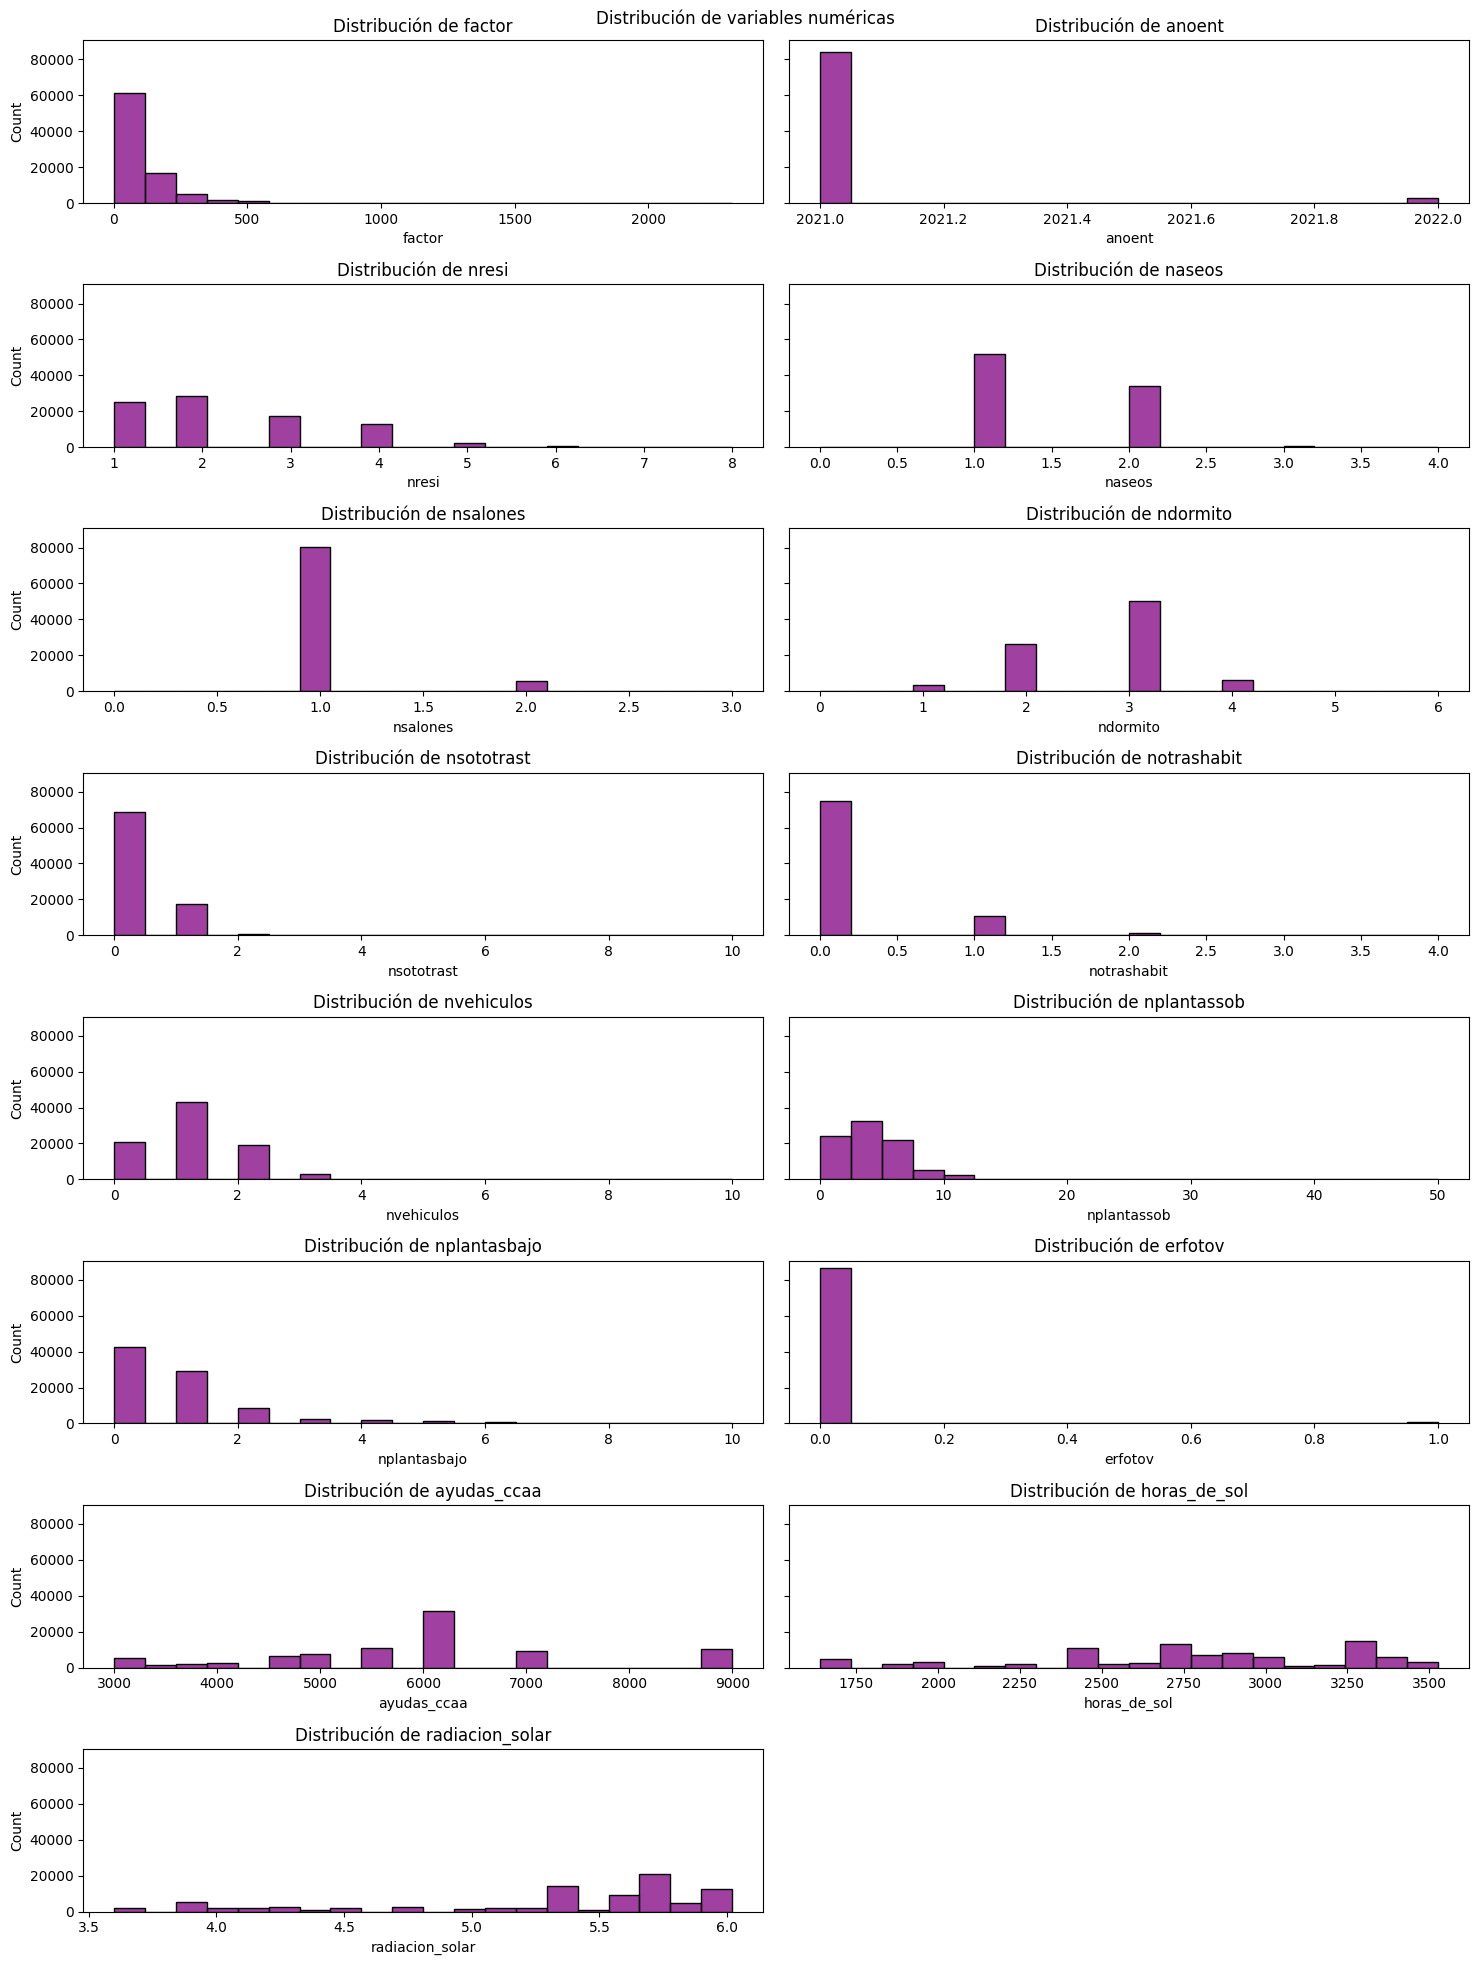

In [193]:
visualizador=f.Visualizador(df_medianas_sin_outliers)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

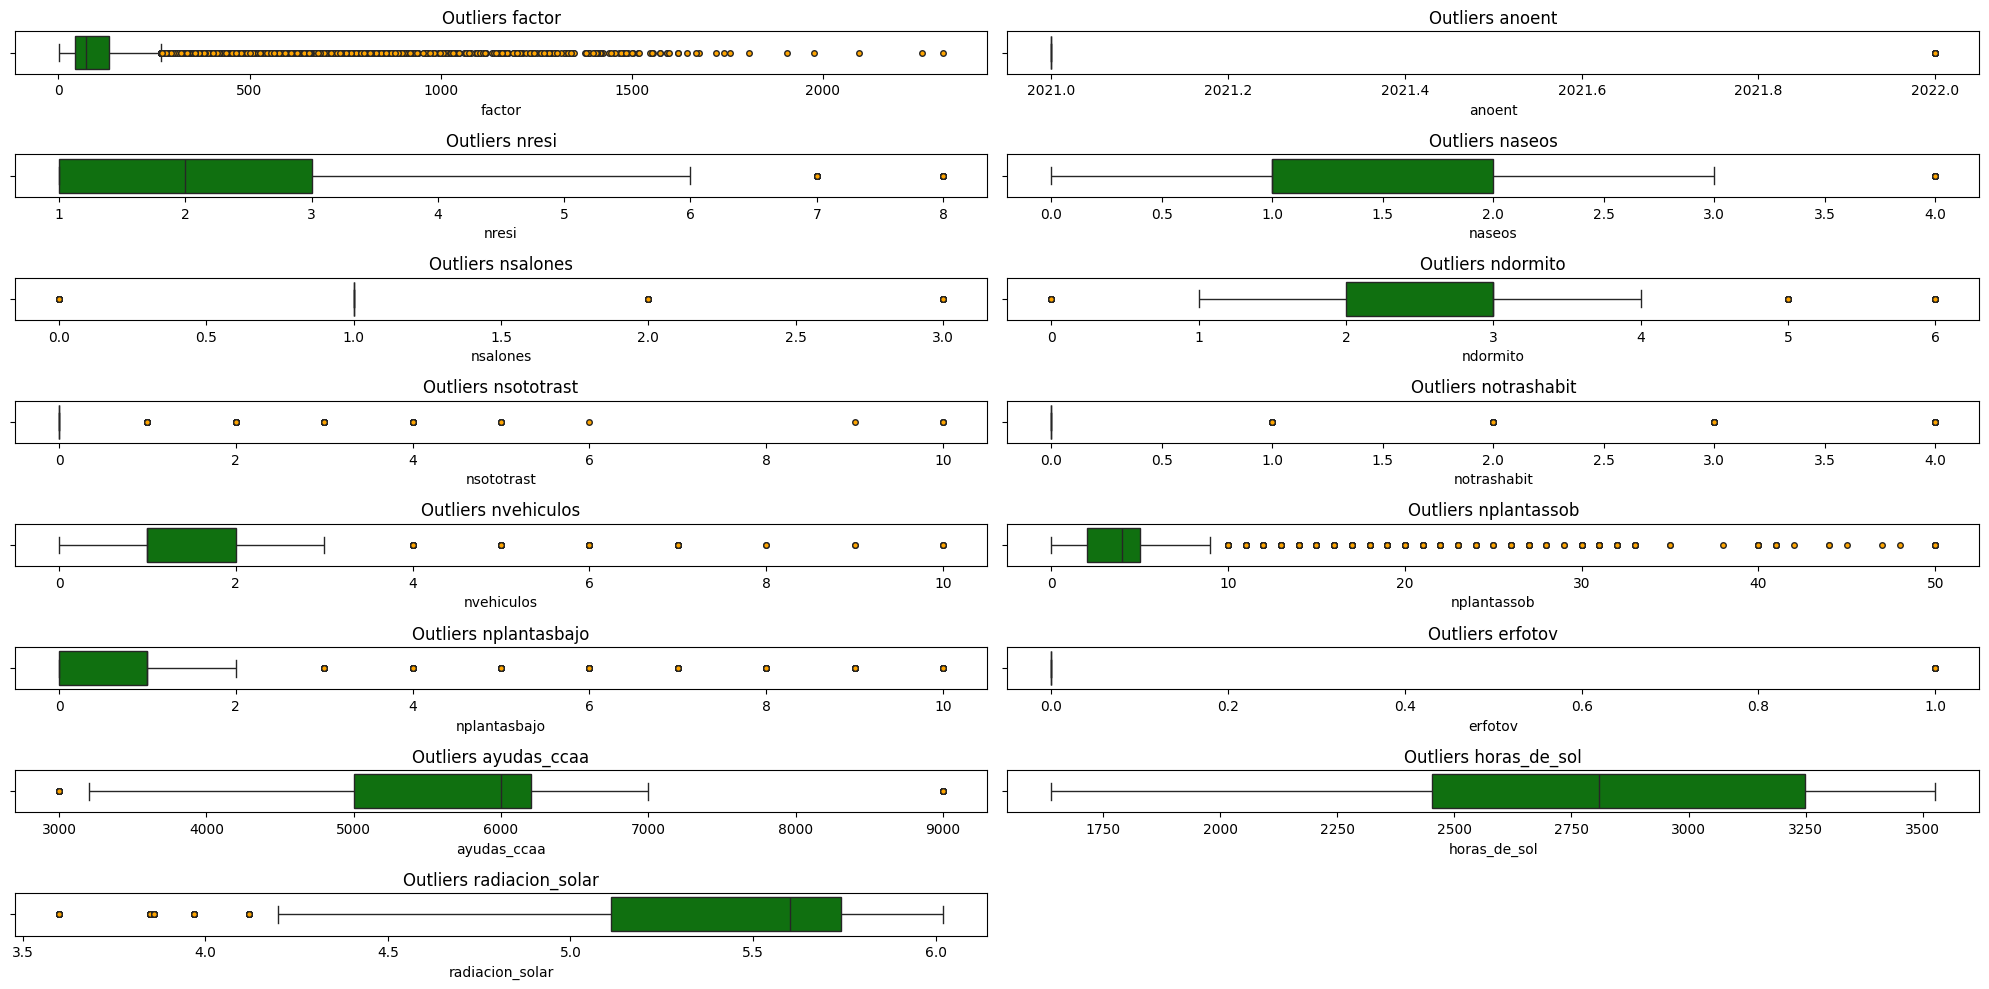

In [194]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

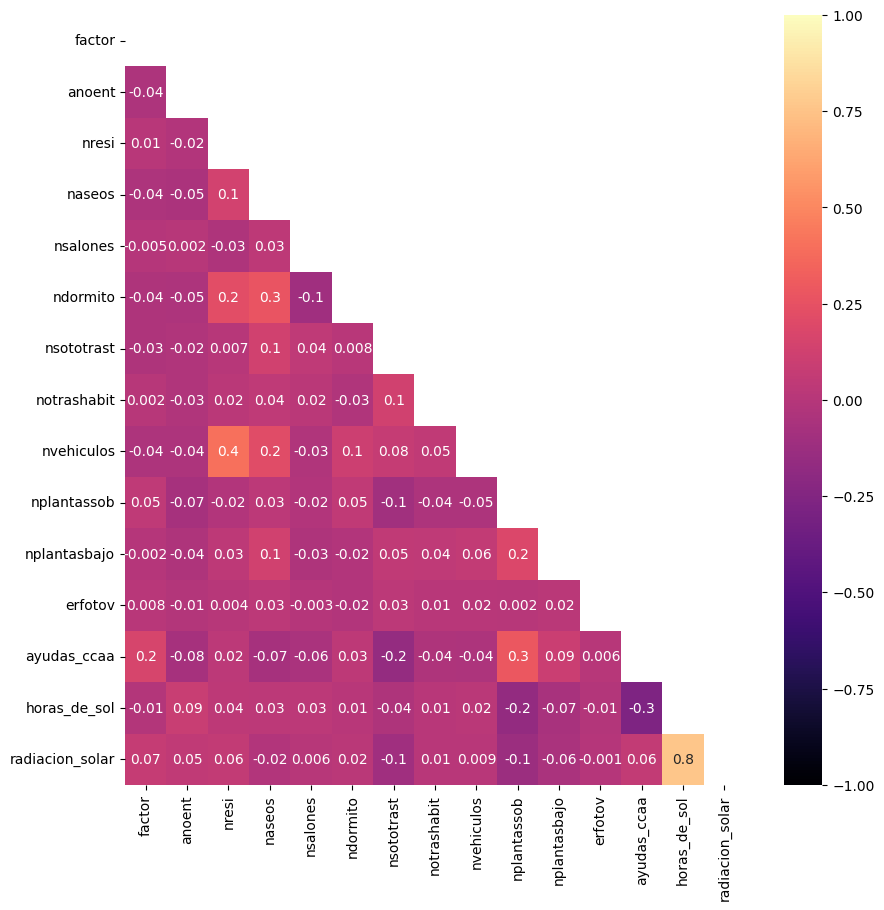

In [195]:
visualizador.correlacion(tamano_grafica=(10,10))

Observo que hay mucha correlación entre la radiación solar y las horas de sol lo que tiene sentido y al ser tan alta significa que vienen a explicar prácticamente lo mismo asi que con el fin de mejorar mi modelo me planteo en algún momento eliminar alguna de las dos

## FORMATEOS

In [197]:
df_medianas_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87087 entries, 0 to 87086
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           87087 non-null  object 
 1   idq_mun          87087 non-null  object 
 2   tam_muni         87087 non-null  object 
 3   factor           87087 non-null  float64
 4   mesent           87087 non-null  object 
 5   anoent           87087 non-null  int64  
 6   yoresi           87087 non-null  object 
 7   otroresi         87087 non-null  object 
 8   nresi            87087 non-null  int64  
 9   regvi            87087 non-null  object 
 10  pagovi           87087 non-null  object 
 11  calefac          87087 non-null  object 
 12  tipocombcale     87087 non-null  object 
 13  tipoagua         87087 non-null  object 
 14  wc               87087 non-null  object 
 15  boducha          87087 non-null  object 
 16  aireacond        87087 non-null  object 
 17  aislam      

In [198]:
columnas_a_formatear = [                                            #columnas a formatear a tipo "O"
    "nsototrast", "notrashabit", "nvehiculos", "naseos", "nsalones", 
    "ndormito", "nplantasbajo", "nresi"]

df_medianas_sin_outliers[columnas_a_formatear] = df_medianas_sin_outliers[columnas_a_formatear].astype("O")

In [199]:
df_medianas_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87087 entries, 0 to 87086
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           87087 non-null  object 
 1   idq_mun          87087 non-null  object 
 2   tam_muni         87087 non-null  object 
 3   factor           87087 non-null  float64
 4   mesent           87087 non-null  object 
 5   anoent           87087 non-null  int64  
 6   yoresi           87087 non-null  object 
 7   otroresi         87087 non-null  object 
 8   nresi            87087 non-null  object 
 9   regvi            87087 non-null  object 
 10  pagovi           87087 non-null  object 
 11  calefac          87087 non-null  object 
 12  tipocombcale     87087 non-null  object 
 13  tipoagua         87087 non-null  object 
 14  wc               87087 non-null  object 
 15  boducha          87087 non-null  object 
 16  aireacond        87087 non-null  object 
 17  aislam      

In [200]:
df_medianas_sin_outliers.head(1)

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  63.480315  Junio   

   anoent yoresi otroresi nresi                                   regvi  \
0    2021     Si       No     1  Propia por compra con pagos pendientes   

                    pagovi               calefac tipocombcale  \
0  De 200€ a menos de 300€  No tiene calefacción  Desconocido   

                  tipoagua  wc boducha aireacond aislam adaptada cocina  \
0  abastecimiento público   Si      Si        No     Si       No     Si   

  lavadora lavavajillas secadora horno microondas vitroinduc naseos nsalones  \
0       Si           No       No    Si         Si         Si      1        1   

  ndormito nsototrast notrashabit          metrosvi nvehiculos papel vidrio  \
0        3          0           0  Entre 76 y 90 m2          1    Si     Si   

  envases organico halogena bajoconsumo led  \
0      Si       Si       No          Si  Si   

                           servdomes  \
0  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   

  bares cambioresi segunresi                 lugsegunresi  \
0    Si         No        No  No tiene segunda residencia   

                      otraccaa                  otropais  \
0  No tiene segunda residencia  No tiene/ está en España   

                       diasusa                     ingrehog       tipoedif  \
0  No tiene segunda residencia  De 1.500€ a menos de 2.000€  Multifamiliar   

                       tipoedifviv  nplantassob nplantasbajo  annoedifinterv  \
0  Edificio con 10 o más viviendas            3            1  De 1991 a 2000   

            estadoedif       accesoedif ascensor garaje    nplazasgar  \
0  moderadamente bueno  No es accesible       No     Si  De 101 a 150   

  gastuberia aguacalcent evacuaguares     tipoevacuares  erfotov nviviendp  \
0         No          No           Si  Alcantarillado          0         4   

      vehiculos          renovables  conectividad        ccaa  ayudas_ccaa  \
0  convencional  no tiene renovable  Sin internet  País Vasco         6200   

  bonificaciones  horas_de_sol  radiacion_solar           categoria  
0            IBI          2147              4.2  Viviendas medianas

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [201]:
df_erf_med=pd.DataFrame(df_medianas_sin_outliers["erfotov"])

In [202]:
outliers=d.GestionOutliersMultivariados(df_medianas_sin_outliers.drop(columns=["erfotov"]))
df_outmed=outliers.detectar_outliers_if(0.01)

In [203]:
df_outmed.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  63.480315   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  73.385525   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.848172   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  82.763084   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.553506   

      mesent  anoent yoresi otroresi nresi  \
0      Junio    2021     Si       No     1   
1  Diciembre    2021     Si       No     1   
2  Diciembre    2021     Si       No     1   
3      Junio    2021     Si       Si     4   
4      Julio    2021     Si       No     1   

                                    regvi                   pagovi  \
0  Propia por compra con pagos pendientes  De 200€ a menos de 300€   
1          Propia por herencia o donación              Desconocido   
2    Propia por compra totalmente pagada               Desconocido   
3  Propia por compra con pagos pendientes  De 400€ a menos de 500€   
4    Propia por compra totalmente pagada               Desconocido   

                calefac  tipocombcale                 tipoagua  wc boducha  \
0  No tiene calefacción   Desconocido  abastecimiento público   Si      Si   
1            individual  Electricidad  abastecimiento público   Si      Si   
2            individual   Gas natural  abastecimiento público   Si      Si   
3            individual   Gas natural  abastecimiento público   Si      Si   
4            individual   Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     Si       No     Si       Si           No       No    Si   
1        No     No       No     Si       Si           Si       No    Si   
2        No     No       No     Si       Si           Si       No    Si   
3        No     Si       Si     Si       Si           Si       Si    Si   
4        No     No       Si     Si       Si           No       No    No   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      1        1        3          0           0   
1         Si         Si      1        2        3          0           0   
2         Si         Si      1        2        2          0           0   
3         Si         Si      2        1        3          1           0   
4         Si         Si      1        1        2          1           0   

           metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 76 y 90 m2          1    Si     Si      Si       Si       No   
1  Entre 61 y 75 m2          1    Si     Si      No       Si       Si   
2  Entre 46 y 60 m2          1    Si     Si      Si       Si       Si   
3  Entre 61 y 75 m2          2    Si     Si      Si       Si       No   
4  Entre 61 y 75 m2          0    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
0          Si  Si  No dispone de servicio doméstico    
1          Si  No  No dispone de servicio doméstico    
2          Si  No  No dispone de servicio doméstico    
3          Si  Si  No dispone de servicio doméstico    
4          Si  Si        servicio doméstico externo    

                                            ayudaext ruidos contamin sucio  \
0       No dispone de ayudas externas no remuneradas     No       No    No   
1       No dispone de ayudas externas no remuneradas     No       No    No   
2  ayudas de familiares, parientes, amigos, vecinos      No       No    No   
3       No dispone de ayudas externas no remuneradas     No       No    No   
4  ayudas de familiares, parientes, amigos, vecinos      No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   
1         Si        No           No          No      Si     Si    Si       Si   
2         No

Añadimos de nuevo la columna de fotovoltaica

In [204]:
df_outmed=pd.concat([df_outmed,df_erf_med], axis=1)

In [205]:
df_outmed[df_outmed["outlier"]==-1].shape[0]

871

Filtramos por los que no son outliers

In [206]:
df_sin_outmedianas=df_outmed[df_outmed["outlier"]!=-1]

In [207]:
df_sin_outmedianas.shape[0]

86216

In [208]:
df_sin_outmedianas.drop(columns=["outlier", "categoria"], inplace=True)

In [209]:
df_sin_outmedianas.reset_index(drop=True, inplace=True)

In [210]:
df_sin_outmedianas.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  63.480315   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  73.385525   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.848172   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  82.763084   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.553506   

      mesent  anoent yoresi otroresi nresi  \
0      Junio    2021     Si       No     1   
1  Diciembre    2021     Si       No     1   
2  Diciembre    2021     Si       No     1   
3      Junio    2021     Si       Si     4   
4      Julio    2021     Si       No     1   

                                    regvi                   pagovi  \
0  Propia por compra con pagos pendientes  De 200€ a menos de 300€   
1          Propia por herencia o donación              Desconocido   
2    Propia por compra totalmente pagada               Desconocido   
3  Propia por compra con pagos pendientes  De 400€ a menos de 500€   
4    Propia por compra totalmente pagada               Desconocido   

                calefac  tipocombcale                 tipoagua  wc boducha  \
0  No tiene calefacción   Desconocido  abastecimiento público   Si      Si   
1            individual  Electricidad  abastecimiento público   Si      Si   
2            individual   Gas natural  abastecimiento público   Si      Si   
3            individual   Gas natural  abastecimiento público   Si      Si   
4            individual   Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     Si       No     Si       Si           No       No    Si   
1        No     No       No     Si       Si           Si       No    Si   
2        No     No       No     Si       Si           Si       No    Si   
3        No     Si       Si     Si       Si           Si       Si    Si   
4        No     No       Si     Si       Si           No       No    No   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      1        1        3          0           0   
1         Si         Si      1        2        3          0           0   
2         Si         Si      1        2        2          0           0   
3         Si         Si      2        1        3          1           0   
4         Si         Si      1        1        2          1           0   

           metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 76 y 90 m2          1    Si     Si      Si       Si       No   
1  Entre 61 y 75 m2          1    Si     Si      No       Si       Si   
2  Entre 46 y 60 m2          1    Si     Si      Si       Si       Si   
3  Entre 61 y 75 m2          2    Si     Si      Si       Si       No   
4  Entre 61 y 75 m2          0    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
0          Si  Si  No dispone de servicio doméstico    
1          Si  No  No dispone de servicio doméstico    
2          Si  No  No dispone de servicio doméstico    
3          Si  Si  No dispone de servicio doméstico    
4          Si  Si        servicio doméstico externo    

                                            ayudaext ruidos contamin sucio  \
0       No dispone de ayudas externas no remuneradas     No       No    No   
1       No dispone de ayudas externas no remuneradas     No       No    No   
2  ayudas de familiares, parientes, amigos, vecinos      No       No    No   
3       No dispone de ayudas externas no remuneradas     No       No    No   
4  ayudas de familiares, parientes, amigos, vecinos      No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   
1         Si        No           No          No      Si     Si    Si       Si   
2         No

### **DESBALANCEO**  (lo trato en el siguiente jupyter)

In [211]:
round(df_sin_outmedianas["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    99.12
1     0.88
Name: proportion, dtype: float64

In [212]:
df_sin_outmedianas.to_pickle("../datos/EF/Datos_modelos/medianas_sin_outliers.pkl")

# **VIVIENDAS AMPLIAS**

In [3]:
df_amplias.head()

iden idq_pv            idq_mun                      tam_muni     factor  \
1     2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.005532   
2     3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  61.559149   
4     5  Álava  Municipio_pequeño  De 50.000 habitantes o menos  59.495080   
5     6  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.703336   
7     8  Álava  Municipio_pequeño  De 50.000 habitantes o menos  68.234366   

      mesent  anoent yoresi otroresi  nresi  \
1      Julio    2021     No       Si      2   
2      Junio    2021     Si       Si      4   
4       Mayo    2021     Si       Si      4   
5      Julio    2021     Si       Si      3   
7  Diciembre    2021     Si       Si      2   

                                    regvi                   pagovi  \
1    Propia por compra totalmente pagada               Desconocido   
2  Propia por compra con pagos pendientes  De 700€ a menos de 800€   
4    Propia por compra totalmente pagada               Desconocido   
5    Propia por compra totalmente pagada               Desconocido   
7          Propia por herencia o donación              Desconocido   

      calefac  tipocombcale                 tipoagua  wc boducha aireacond  \
1  individual   Gas natural  abastecimiento público   Si      Si        No   
2  individual  Electricidad  abastecimiento público   Si      Si        No   
4  individual   Gas natural  abastecimiento público   Si      Si        No   
5  individual   Gas natural  abastecimiento público   Si      Si        No   
7  individual   Gas natural  abastecimiento público   Si      Si        No   

  aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
1     No       No     Si       Si           Si       No    Si         Si   
2     No       No     Si       Si           Si       Si    Si         Si   
4     No       No     Si       Si           No       No    Si         Si   
5     No       No     Si       Si           No       No    Si         Si   
7     No       No     Si       Si           Si       No    Si         Si   

  vitroinduc  naseos  nsalones  ndormito  nsototrast  notrashabit  \
1         Si       3         1         3           2            0   
2         Si       4         1         4           2            0   
4         Si       3         1         3           1            0   
5         Si       1         1         3           0            0   
7         Si       2         2         3           1            0   

             metrosvi  nvehiculos papel vidrio envases organico halogena  \
1  Entre 121 y 150 m2           1    Si     Si      Si       Si       Si   
2  Entre 106 y 120 m2           3    Si     Si      Si       No       Si   
4   Entre 91 y 105 m2           2    Si     Si      Si       Si       Si   
5   Entre 91 y 105 m2           1    Si     Si      Si       Si       Si   
7   Entre 91 y 105 m2           1    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
1          No  Si  No dispone de servicio doméstico    
2          Si  Si  No dispone de servicio doméstico    
4          Si  Si  No dispone de servicio doméstico    
5          Si  No  No dispone de servicio doméstico    
7          Si  No  No dispone de servicio doméstico    

                                            ayudaext ruidos contamin sucio  \
1  ayudas de familiares, parientes, amigos, vecinos      No       Si    No   
2       No dispone de ayudas externas no remuneradas     No       No    No   
4       No dispone de ayudas externas no remuneradas     No       No    No   
5       No dispone de ayudas externas no remuneradas     No       No    No   
7       No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
1         No        No           Si          No      Si     Si    Si       Si   
2         No        No           No          No      Si     Si  

PASO ERFOTOV A NUMÉRICA

In [4]:
dicc={"Si":1,
      "No":0}
df_amplias["erfotov"]=df_amplias["erfotov"].map(dicc)

#### Meto IDEN en el index

In [5]:
df_amplias.set_index("iden", inplace=True)

# **EDA**

In [6]:
f.exploracion_dataframe(df_amplias,"erfotov")

El número de datos es 61694 y el de columnas es 86

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


Empty DataFrame
Columns: [%_nulos]
Index: []


 ..................... 

Los tipos de las columnas son:


tipo_dato
idq_pv             object
idq_mun            object
tam_muni           object
factor            float64
mesent             object
...                   ...
ayudas_ccaa         int64
bonificaciones     object
horas_de_sol        int64
radiacion_solar   float64
categoria          object

[86 rows x 1 columns]


 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


count
idq_pv                       
Madrid                   5613
Barcelona                3776
Valencia                 2882
Alicante                 2271
Santa Cruz de Tenerife   2259

La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


count
idq_mun                 
Municipio_pequeño  28183
Logroño              652
Madrid               595
València             500
Zaragoza             484

La columna TAM_MUNI tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tam_muni                              
De 50.000 habitantes o menos     28734
De 50.001 a 100.000 habitantes   17994
De 100.001 a 500.000 habitantes  12480
Más de 500.000 habitantes         2486

La columna MESENT tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


count
mesent       
Mayo    16176
Junio   15412
Abril   11509
Julio    8959
Agosto   2889

La columna YORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
yoresi       
Si      59088
No       2606

La columna OTRORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
otroresi       
Si        50253
No        11441

La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
regvi                                        
Propia por compra totalmente pagada     27671
Propia por compra con pagos pendientes  16107
Propia por herencia o donación           8335
Alquilada                                4318
Otra forma                               3931

La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


count
pagovi                        
Desconocido              41269
De 400€ a menos de 500€   4027
De 300€ a menos de 400€   3897
De 500€ a menos de 600€   3147
De 200€ a menos de 300€   2145

La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
calefac                                                  
individual                                          32907
No pero sí aparato que permite calentar alguna ...  11303
No tiene calefacción                                11131
colectiva                                            6353

La columna TIPOCOMBCALE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
tipocombcale               
Gas natural           18361
Electricidad          14929
Desconocido           11131
Petróleo o derivados  10406
Madera                 3514

La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoagua                      
abastecimiento público   58325
abastecimiento privado    3289
No tiene agua corriente     80

La columna WC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
wc       
Si  61611
No     83

La columna BODUCHA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
boducha       
Si       61461
No         233

La columna AIREACOND tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aireacond       
No         31269
Si         30425

La columna AISLAM tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aislam       
No      51508
Si      10186

La columna ADAPTADA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
adaptada       
No        47662
Si        14032

La columna COCINA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cocina       
Si      59817
No       1877

La columna LAVADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavadora       
Si        61277
No          417

La columna LAVAVAJILLAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavavajillas       
Si            41320
No            20374

La columna SECADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
secadora       
No        42603
Si        19091

La columna HORNO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
horno       
Si     58475
No      3219

La columna MICROONDAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
microondas       
Si          57811
No           3883

La columna VITROINDUC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vitroinduc       
Si          46349
No          15345

La columna METROSVI tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
metrosvi                 
Entre 91 y 105 m2   29035
Entre 106 y 120 m2  18519
Entre 121 y 150 m2  14140

La columna PAPEL tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
papel       
Si     53501
No      8193

La columna VIDRIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vidrio       
Si      54182
No       7512

La columna ENVASES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
envases       
Si       52433
No        9261

La columna ORGANICO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
organico       
Si        47790
No        13904

La columna HALOGENA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
halogena       
No        35140
Si        26554

La columna BAJOCONSUMO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bajoconsumo       
Si           49100
No           12594

La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
led       
Si   46888
No   14806

La columna SERVDOMES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
servdomes                               
No dispone de servicio doméstico   56929
servicio doméstico externo          4152
servicio doméstico interno           613

La columna AYUDAEXT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
ayudaext                                                 
No dispone de ayudas externas no remuneradas        56253
ayudas de familiares, parientes, amigos, vecinos     4726
ayudas de otros, como servicios sociales o una ONG    715

La columna RUIDOS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ruidos       
No      46142
Si      15552

La columna CONTAMIN tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
contamin       
No        54059
Si         7635

La columna SUCIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
sucio       
No     49743
Si     11951

La columna MALCOMUNIC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
malcomunic       
No          52736
Si           8958

La columna POCOVERDE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
pocoverde       
No         49268
Si         12426

La columna DELINCUENCIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
delincuencia       
No            54618
Si             7076

La columna MOLESTURIST tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
molesturist       
No           57377
Si            4317

La columna COLEGIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
colegio       
Si       53127
No        8567

La columna CSALUD tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
csalud       
Si      50274
No      11420

La columna SUPER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
super       
Si     52200
No      9494

La columna FARMACIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
farmacia       
Si        54456
No         7238

La columna BARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bares       
Si     56329
No      5365

La columna CAMBIORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cambioresi       
No          58976
Si           2718

La columna SEGUNRESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
segunresi       
No         49917
Si         11777

La columna LUGSEGUNRESI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
lugsegunresi                                          
No tiene segunda residencia                      49917
En otro municipio de la misma provincia           4881
En otra CCAA                                      3454
En el mismo municipio que la primera residencia   1759
En otra provincia pero en la misma CCAA           1542

La columna OTRACCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
otraccaa                          
No tiene segunda residencia  58240
Comunidad Valenciana           757
Andalucía                      531
Castilla y León                513
Castilla-La Mancha             326

La columna OTROPAIS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 33 categorías (5/33)


count
otropais                       
No tiene/ está en España  61553
Francia                      27
Portugal                     18
Marruecos                    15
Rumanía                      15

La columna DIASUSA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


count
diasusa                           
No tiene segunda residencia  49917
60 o más días                 5103
Entre 30 y 59 días            3314
Entre 15 y 29 días            1857
Menos de 15 días              1503

La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
ingrehog                          
De 1.000€ a menos de 1.500€  12763
De 1.500€ a menos de 2.000€  10574
De 500€ a menos de 1.000€     9966
De 2.000€ a menos de 2.500€   8772
De 3.000€ a menos de 5.000€   8615

La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
tipoedif            
Multifamiliar  33773
Unifamiliar    27921

La columna TIPOEDIFVIV tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tipoedifviv                           
Vivienda unifamiliar             27921
Edificio con 10 o más viviendas  25279
Edificio de 3 a 9 viviendas       6738
Edificio con 2 viviendas          1756

La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
annoedifinterv       
De 1991 a 2000  11338
De 2001 a 2010  11139
De 1971 a 1980  10957
De 1981 a 1990   9465
De 1961 a 1970   5908

La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
estadoedif                
muy bueno            20427
bueno                12041
casi perfecto        11820
perfecto              8900
moderadamente bueno   4813

La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
accesoedif            
Es accesible     42582
No es accesible  19112

La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ascensor       
No        34767
Si        26927

La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
garaje       
Si      37932
No      23762

La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


count
nplazasgar            
No tiene garaje  23762
1                10253
De 21 a 50        5966
2                 5858
De 51 a 100       3906

La columna GASTUBERIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
gastuberia       
No          34819
Si          26875

La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aguacalcent       
No           40296
Si           21398

La columna EVACUAGUARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
evacuaguares       
Si            56828
No             4866

La columna TIPOEVACUARES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoevacuares          
Alcantarillado    54533
Desconocido        4866
Otro tipo          2295

La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
nviviendp       
1          32410
2          10453
4           8582
3           4675
De 5 a 9    3768

La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
vehiculos               
convencional       50325
No tiene vehiculo   9164
híbrido             1943
eléctrico            262

La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
renovables               
no tiene renovable  58865
energía solar        2412
otra renovable        417

La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
conectividad            
banda ancha fija   41467
Sin internet       10554
banda ancha movil   6084
banda estrecha      3589

La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
ccaa                       
Andalucía              9233
Comunidad Valenciana   6205
Cataluña               5957
Castilla y León        5674
Madrid                 5613

La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
bonificaciones       
IBI y ICIO      35132
IBI             25754
Ninguna           808

La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


count
categoria               
Viviendas amplias  61694


----------

Las principales estadísticas de las variables númericas son:


count         mean          std          min          25%  \
factor           61694.0   105.244624   106.803882     1.631334    40.681087   
anoent           61694.0  2021.028625     0.166752  2021.000000  2021.000000   
nresi            61694.0     2.583558     1.222806     1.000000     2.000000   
naseos           61694.0     1.911077     0.587561     0.000000     2.000000   
nsalones         61694.0     1.219016     0.470770     0.000000     1.000000   
ndormito         61694.0     3.261581     0.765575     0.000000     3.000000   
nsototrast       61694.0     0.449282     0.622192     0.000000     0.000000   
notrashabit      61694.0     0.317308     0.684651     0.000000     0.000000   
nvehiculos       61694.0     1.376584     0.911138     0.000000     1.000000   
nplantassob      61694.0     3.465961     2.732998     0.000000     2.000000   
nplantasbajo     61694.0     0.784144     1.182231     0.000000     0.000000   
erfotov          61694.0     0.011233     0.105389     0.000000     0.000000   
ayudas_ccaa      61694.0  5164.490874  1540.148726  3000.000000  4000.000000   
horas_de_sol     61694.0  2883.454258   431.968588  1639.000000  2691.000000   
radiacion_solar  61694.0     5.374453     0.604232     3.600000     5.270000   

                         50%          75%         max  
factor             70.118653   131.692342  2153.54755  
anoent           2021.000000  2021.000000  2022.00000  
nresi               2.000000     3.000000    13.00000  
naseos              2.000000     2.000000    10.00000  
nsalones            1.000000     1.000000    10.00000  
ndormito            3.000000     4.000000    15.00000  
nsototrast          0.000000     1.000000    10.00000  
notrashabit         0.000000     0.000000    10.00000  
nvehiculos          1.000000     2.000000    10.00000  
nplantassob         3.000000     5.000000    50.00000  
nplantasbajo        1.000000     1.000000    10.00000  
erfotov             0.000000     0.000000     1.00000  
ayudas_ccaa      5000.000000  6000.000000  9000.00000  
horas_de_sol     2924.000000  3289.000000  3527.00000  
radiacion_solar     5.610000     5.740000     6.02000


----------

Las principales estadísticas de las variables categóricas son:


count unique                           top   freq
idq_pv          61694     52                        Madrid   5613
idq_mun         61694    152             Municipio_pequeño  28183
tam_muni        61694      4  De 50.000 habitantes o menos  28734
mesent          61694     12                          Mayo  16176
yoresi          61694      2                            Si  59088
...               ...    ...                           ...    ...
renovables      61694      3            no tiene renovable  58865
conectividad    61694      4              banda ancha fija  41467
ccaa            61694     19                     Andalucía   9233
bonificaciones  61694      3                    IBI y ICIO  35132
categoria       61694      1             Viviendas amplias  61694

[71 rows x 4 columns]


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 61694 entries, 2 to 172444
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           61694 non-null  object 
 1   idq_mun          61694 non-null  object 
 2   tam_muni         61694 non-null  object 
 3   factor           61694 non-null  float64
 4   mesent           61694 non-null  object 
 5   anoent           61694 non-null  int64  
 6   yoresi           61694 non-null  object 
 7   otroresi         61694 non-null  object 
 8   nresi            61694 non-null  int64  
 9   regvi            61694 non-null  object 
 10  pagovi           61694 non-null  object 
 11  calefac          61694 non-null  object 
 12  tipocombcale     61694 non-null  object 
 13  tipoagua         61694 non-null  object 
 14  wc               61694 non-null  object 
 15  boducha          61694 non-null  object 
 16

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media

In [7]:
df_amplias["ndormito"].unique()  #observamos que en las viendas amplias todo numero de habitaciones mayor a 7 es incomprensible por lo que vamos a investigarlos

array([ 3,  4,  1,  6,  2,  5,  7, 12,  0, 15,  8,  9, 10], dtype=int64)

In [8]:
df_amplias["ndormito"].value_counts()

ndormito
3     34952
4     18069
2      5647
5      1843
1       532
6       380
0       169
7        71
8        23
9         3
12        2
10        2
15        1
Name: count, dtype: int64

In [9]:
df_amp_filtrados_outliers=df_amplias[df_amplias["ndormito"] >7]

In [24]:
len(df_amp_filtrados_outliers)  #vemos que hay 31 de un total de 61694 lo que corresponde a un 0,05% de los datos (practicamente insignificante)

31

In [26]:
df_amp_filtrados_outliers.head(7)   #ver que hacer con los outliers porque lo que no cuadra muchas veces es únicamente el tamaño con respecto numero de aseos, dormitorios, salones y residentes 

idq_pv                idq_mun                        tam_muni  \
iden                                                                     
356       Álava      Municipio_pequeño    De 50.000 habitantes o menos   
5526   Alicante      Municipio_pequeño    De 50.000 habitantes o menos   
36329    Burgos      Municipio_pequeño    De 50.000 habitantes o menos   
38227   Cáceres      Municipio_pequeño    De 50.000 habitantes o menos   
38387   Cáceres      Municipio_pequeño    De 50.000 habitantes o menos   
38857   Cáceres      Municipio_pequeño    De 50.000 habitantes o menos   
43770     Cádiz  Sanlúcar de Barrameda  De 50.001 a 100.000 habitantes   

           factor     mesent  anoent yoresi otroresi  nresi  \
iden                                                          
356     89.271816      Junio    2021     Si       Si      4   
5526   466.418777      Junio    2021     No       Si      1   
36329   90.096043       Mayo    2021     Si       Si      2   
38227   62.412337       Mayo    2021     No       Si      2   
38387  111.552109      Julio    2021     Si       Si      2   
38857   53.631628      Abril    2021     Si       Si      3   
43770   39.284309  Diciembre    2021     Si       Si      5   

                                      regvi       pagovi  \
iden                                                       
356          Propia por herencia o donación  Desconocido   
5526         Propia por herencia o donación  Desconocido   
36329                            Otra forma  Desconocido   
38227  Propia por compra totalmente pagada   Desconocido   
38387        Propia por herencia o donación  Desconocido   
38857  Propia por compra totalmente pagada   Desconocido   
43770  Propia por compra totalmente pagada   Desconocido   

                                                 calefac  \
iden                                                       
356                                           individual   
5526                                   colectiva           
36329                                         individual   
38227                                         individual   
38387  No pero sí aparato que permite calentar alguna...   
38857                                         individual   
43770  No pero sí aparato que permite calentar alguna...   

               tipocombcale                 tipoagua  wc boducha aireacond  \
iden                                                                         
356             Gas natural  abastecimiento público   Si      Si        No   
5526           Electricidad  abastecimiento público   Si      Si        Si   
36329  Petróleo o derivados  abastecimiento público   Si      Si        No   
38227  Petróleo o derivados  abastecimiento público   Si      Si        No   
38387  Gas butano o propano  abastecimiento público   Si      Si        Si   
38857  Petróleo o derivados  abastecimiento público   Si      Si        Si   
43770          Electricidad  abastecimiento público   Si      Si        Si   

      aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
iden                                                                           
356       No       No     Si       Si           Si       Si    Si         Si   
5526      No       No     Si       Si           No       No    Si         No   
36329     No       No     Si       Si           No       No    Si         Si   
38227     No       No     Si       Si           Si       No    Si         Si   
38387     No       Si     Si       Si           Si       No    No         Si   
38857     No       No     Si       Si           Si       No    Si         Si   
43770     No       No     Si       Si           Si       Si    Si         Si   

      vitroinduc  naseos  nsalones  ndormito  nsototrast  notrashabit  \
iden                                                                    
356           Si       1         3        12           0            0   
5526          Si      10         8        15     

**Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) pero además, nos percatamos de que el número de residentes también muestra discrepancias con el tamaño de la vivienda**

In [27]:
df_amplias.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

***Seleccionamos las columnas que se consideran más relevantes a la hora de investigar estos datos atípicos***

In [28]:
df_amp_investigar=df_amplias[['idq_pv', 'idq_mun','yoresi', 'otroresi', 'nresi', 'naseos', 'nsalones', 'ndormito',
       'nsototrast', 'notrashabit', 'metrosvi','servdomes',"tipoedif",
       'tipoedifviv', 'nplantassob', 'nplantasbajo','estadoedif', 'ascensor', 'garaje', 'nplazasgar',
       'evacuaguares', 'tipoevacuares','nviviendp','ccaa','categoria']]

In [29]:
df_amp_investigar.head()

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                      
2     Álava  Municipio_pequeño     No       Si      2       3         1   
3     Álava  Municipio_pequeño     Si       Si      4       4         1   
5     Álava  Municipio_pequeño     Si       Si      4       3         1   
6     Álava  Municipio_pequeño     Si       Si      3       1         1   
8     Álava  Municipio_pequeño     Si       Si      2       2         2   

      ndormito  nsototrast  notrashabit            metrosvi  \
iden                                                          
2            3           2            0  Entre 121 y 150 m2   
3            4           2            0  Entre 106 y 120 m2   
5            3           1            0   Entre 91 y 105 m2   
6            3           0            0   Entre 91 y 105 m2   
8            3           1            0   Entre 91 y 105 m2   

                              servdomes       tipoedif  \
iden                                                     
2     No dispone de servicio doméstico     Unifamiliar   
3     No dispone de servicio doméstico     Unifamiliar   
5     No dispone de servicio doméstico     Unifamiliar   
6     No dispone de servicio doméstico   Multifamiliar   
8     No dispone de servicio doméstico     Unifamiliar   

                          tipoedifviv  nplantassob  nplantasbajo  \
iden                                                               
2               Vivienda unifamiliar             2             1   
3               Vivienda unifamiliar             2             1   
5               Vivienda unifamiliar             3             1   
6     Edificio con 10 o más viviendas            7             3   
8               Vivienda unifamiliar             0             0   

         estadoedif ascensor garaje       nplazasgar evacuaguares  \
iden                                                                
2     casi perfecto       No     Si                2           Si   
3     casi perfecto       No     Si                1           Si   
5     casi perfecto       No     Si                1           Si   
6         muy bueno       Si     No  No tiene garaje           Si   
8     casi perfecto       No     No  No tiene garaje           Si   

         tipoevacuares nviviendp        ccaa          categoria  
iden                                                             
2     Alcantarillado           1  País Vasco  Viviendas amplias  
3     Alcantarillado           1  País Vasco  Viviendas amplias  
5     Alcantarillado           1  País Vasco  Viviendas amplias  
6     Alcantarillado           2  País Vasco  Viviendas amplias  
8     Alcantarillado           1  País Vasco  Viviendas amplias

***Observamos viviendas que se marcan como inhabitables***

In [30]:
df_amp_investigar[df_amp_investigar["estadoedif"]=="inhabitable"]["ccaa"].value_counts()

ccaa
Andalucía               14
Comunidad Valenciana     9
Islas Canarias           9
Cataluña                 7
Galicia                  7
Castilla-La Mancha       5
Murcia                   3
Extremadura              2
Madrid                   2
Islas Baleares           1
La Rioja                 1
Cantabria                1
Ceuta                    1
Name: count, dtype: int64

In [31]:
df_amp_investigar[df_amp_investigar["estadoedif"]=="inhabitable"].shape[0]

62

In [32]:
viv_amp_inhabitables=df_amp_investigar[df_amp_investigar["estadoedif"]=="inhabitable"]

# **DETECCIÓN Y TRATAMIENTO DE OUTLIERS VIVIENDAS AMPLIAS**  
  

#### ***DETECCIÓN Y TRATAMIENTO DE UNIVARIADOS*** 
  
    
**VIV_DORMITO**  
Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) habiendo así **31** outliers que no cuadran por varias razones y que no es posible justificar más allá de tratarse de un dato erróneo (podría ser que la persona intente falsear sus metros declarados por alguna razón ya que la fuente de datos es una encuesta pero aún así es un dato a no tener en cuenta).  
  
  
**VIV_RESIDENTES**  
Dado el número de residentes tan elevado en algunos casos y tras comprobar que noe coherente con el número de estancias y tamaño de la vivienda , se han identificado **12** outliers   
  
  
**VIV_SALONES**
Tener más de 4 salones es generalmente raro en este tipo de viviendas por lo que tras investigar se han identificado **28** outliers.  

**VIV_ASEOS**    
Tener más de 5 aseos en un hogar amplio es muy raro por lo que tras investigar, se han encontrado **18** outliers.  
  
**VIV_OTRAS_HABIT**   
Tener más de 5 estancias distintas a aseos, dormitorios y salones en un hogar amplio tiene poco sentido por lo que vamos tras investigar, se encontraron **57** outliers.    
  
***Tras haber investigado los outliers univariados ahora se pasa a eliminarlos debido a su reducido número y las justificaciones que se han ido dando. En total se han eliminado un **0,24%** de los datos debido a que se trataban de outliers sin sentido.***   
   
#### ***DETECCIÓN Y TRATAMIENTO DE MULTIVARIADOS***   
***Mediante la metodología ISOLATION FOREST (IF) se eliminan el 1,00% de los datos***  
  
### El tratamiento de outliers ha resultado en la eliminación del 1,24% de los datos (se ha optado por ello por la existencia de datos sin sentido real)  

In [33]:
viv_amp_dormitorios=df_amp_investigar[df_amp_investigar["ndormito"] > 7]

In [34]:
len(viv_amp_dormitorios)

31

In [35]:
df_amp_investigar["nresi"].value_counts()  #todo número de residentes mayor a 9 es incomprensible por lo que vamos a investigar

nresi
2     20661
3     13396
1     12427
4     11775
5      2622
6       579
7       155
8        49
9        18
10        7
12        3
11        1
13        1
Name: count, dtype: int64

In [36]:
viv_amp_residentes=df_amp_investigar[df_amp_investigar["nresi"] > 9]

In [37]:
len(viv_amp_residentes)

12

In [38]:
df_amp_investigar["nsalones"].value_counts() #tener más de 4 salones en un hogar amplio es extraño por lo que vamos a investigar

nsalones
1     49028
2     11600
3       776
0       140
4       122
5        19
8         3
7         3
6         2
10        1
Name: count, dtype: int64

In [39]:
viv_amp_salones=df_amp_investigar[df_amp_investigar["nsalones"] > 4]

In [40]:
viv_amp_salones.shape[0]

28

In [42]:
df_amp_investigar["naseos"].value_counts() #tener más de 5 aseos en un hogar amplio es muy raro por lo que vamos a investigar

naseos
2     42130
1     12788
3      6223
4       459
5        46
0        30
6        12
7         4
10        1
9         1
Name: count, dtype: int64

In [43]:
viv_amp_aseos=df_amp_investigar[df_amp_investigar["naseos"] > 5]

In [44]:
viv_amp_aseos.shape[0]

18

In [45]:
df_amp_investigar["notrashabit"].value_counts() #tener más de 5 estancias distintas a aseos, dormitorios y salones  en un hogar amplio tiene poco sentido por lo que vamos a investigar

notrashabit
0     47011
1     11467
2      2223
3       592
4       238
5       106
6        28
7        12
8         6
10        6
9         5
Name: count, dtype: int64

In [46]:
viv_amp_otras_habit=df_amp_investigar[df_amp_investigar["notrashabit"] > 5]

In [48]:
viv_amp_otras_habit.shape[0]

57

In [49]:
df_amp_investigar[(df_amp_investigar["notrashabit"] > 5) & (df_amp_investigar["naseos"] > 5) & (df_amp_investigar["nsalones"] > 4) & (df_amp_investigar["nresi"] > 9) & (df_amp_investigar["ndormito"] > 7)]   #Este cuadro nos muestra las viviendas que tienen valores incomprensibles en todas las variables que hemos considerado

Empty DataFrame
Columns: [idq_pv, idq_mun, yoresi, otroresi, nresi, naseos, nsalones, ndormito, nsototrast, notrashabit, metrosvi, servdomes, tipoedif, tipoedifviv, nplantassob, nplantasbajo, estadoedif, ascensor, garaje, nplazasgar, evacuaguares, tipoevacuares, nviviendp, ccaa, categoria]
Index: []

In [50]:
df_amp_investigar1=df_amp_investigar[df_amp_investigar["notrashabit"] <= 5 ]
df_amp_investigar2=df_amp_investigar1[df_amp_investigar1["naseos"] <= 5]
df_amp_investigar3=df_amp_investigar2[df_amp_investigar2["nsalones"] <= 4]
df_amp_investigar4=df_amp_investigar3[df_amp_investigar3["nresi"] <= 9]
df_amp_investigar5=df_amp_investigar4[df_amp_investigar4["ndormito"] <= 7]

In [51]:
df_amp_investigar.shape

(61694, 25)

In [52]:
df_amp_investigar5.shape

(61555, 25)

AHORA QUE YA LO HEMOS ESTUDIADO Y PROBADO EN EL DF DE INVESTIGACIÓN, PASAMOS A APLICARLO AL QUE TIENE TODAS LAS VARIABLES

In [53]:
df_amplias.shape

(61694, 86)

In [54]:
df_amplias=df_amplias[df_amplias["notrashabit"] <= 5 ]
df_amplias=df_amplias[df_amplias["naseos"] <= 5]
df_amplias=df_amplias[df_amplias["nsalones"] <= 4]
df_amplias=df_amplias[df_amplias["nresi"] <= 9]
df_amplias_sin_outliers=df_amplias[df_amplias["ndormito"] <= 7]

In [55]:
df_amplias_sin_outliers.reset_index(drop=True, inplace=True)

In [56]:
df_amplias_sin_outliers.shape

(61555, 86)

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

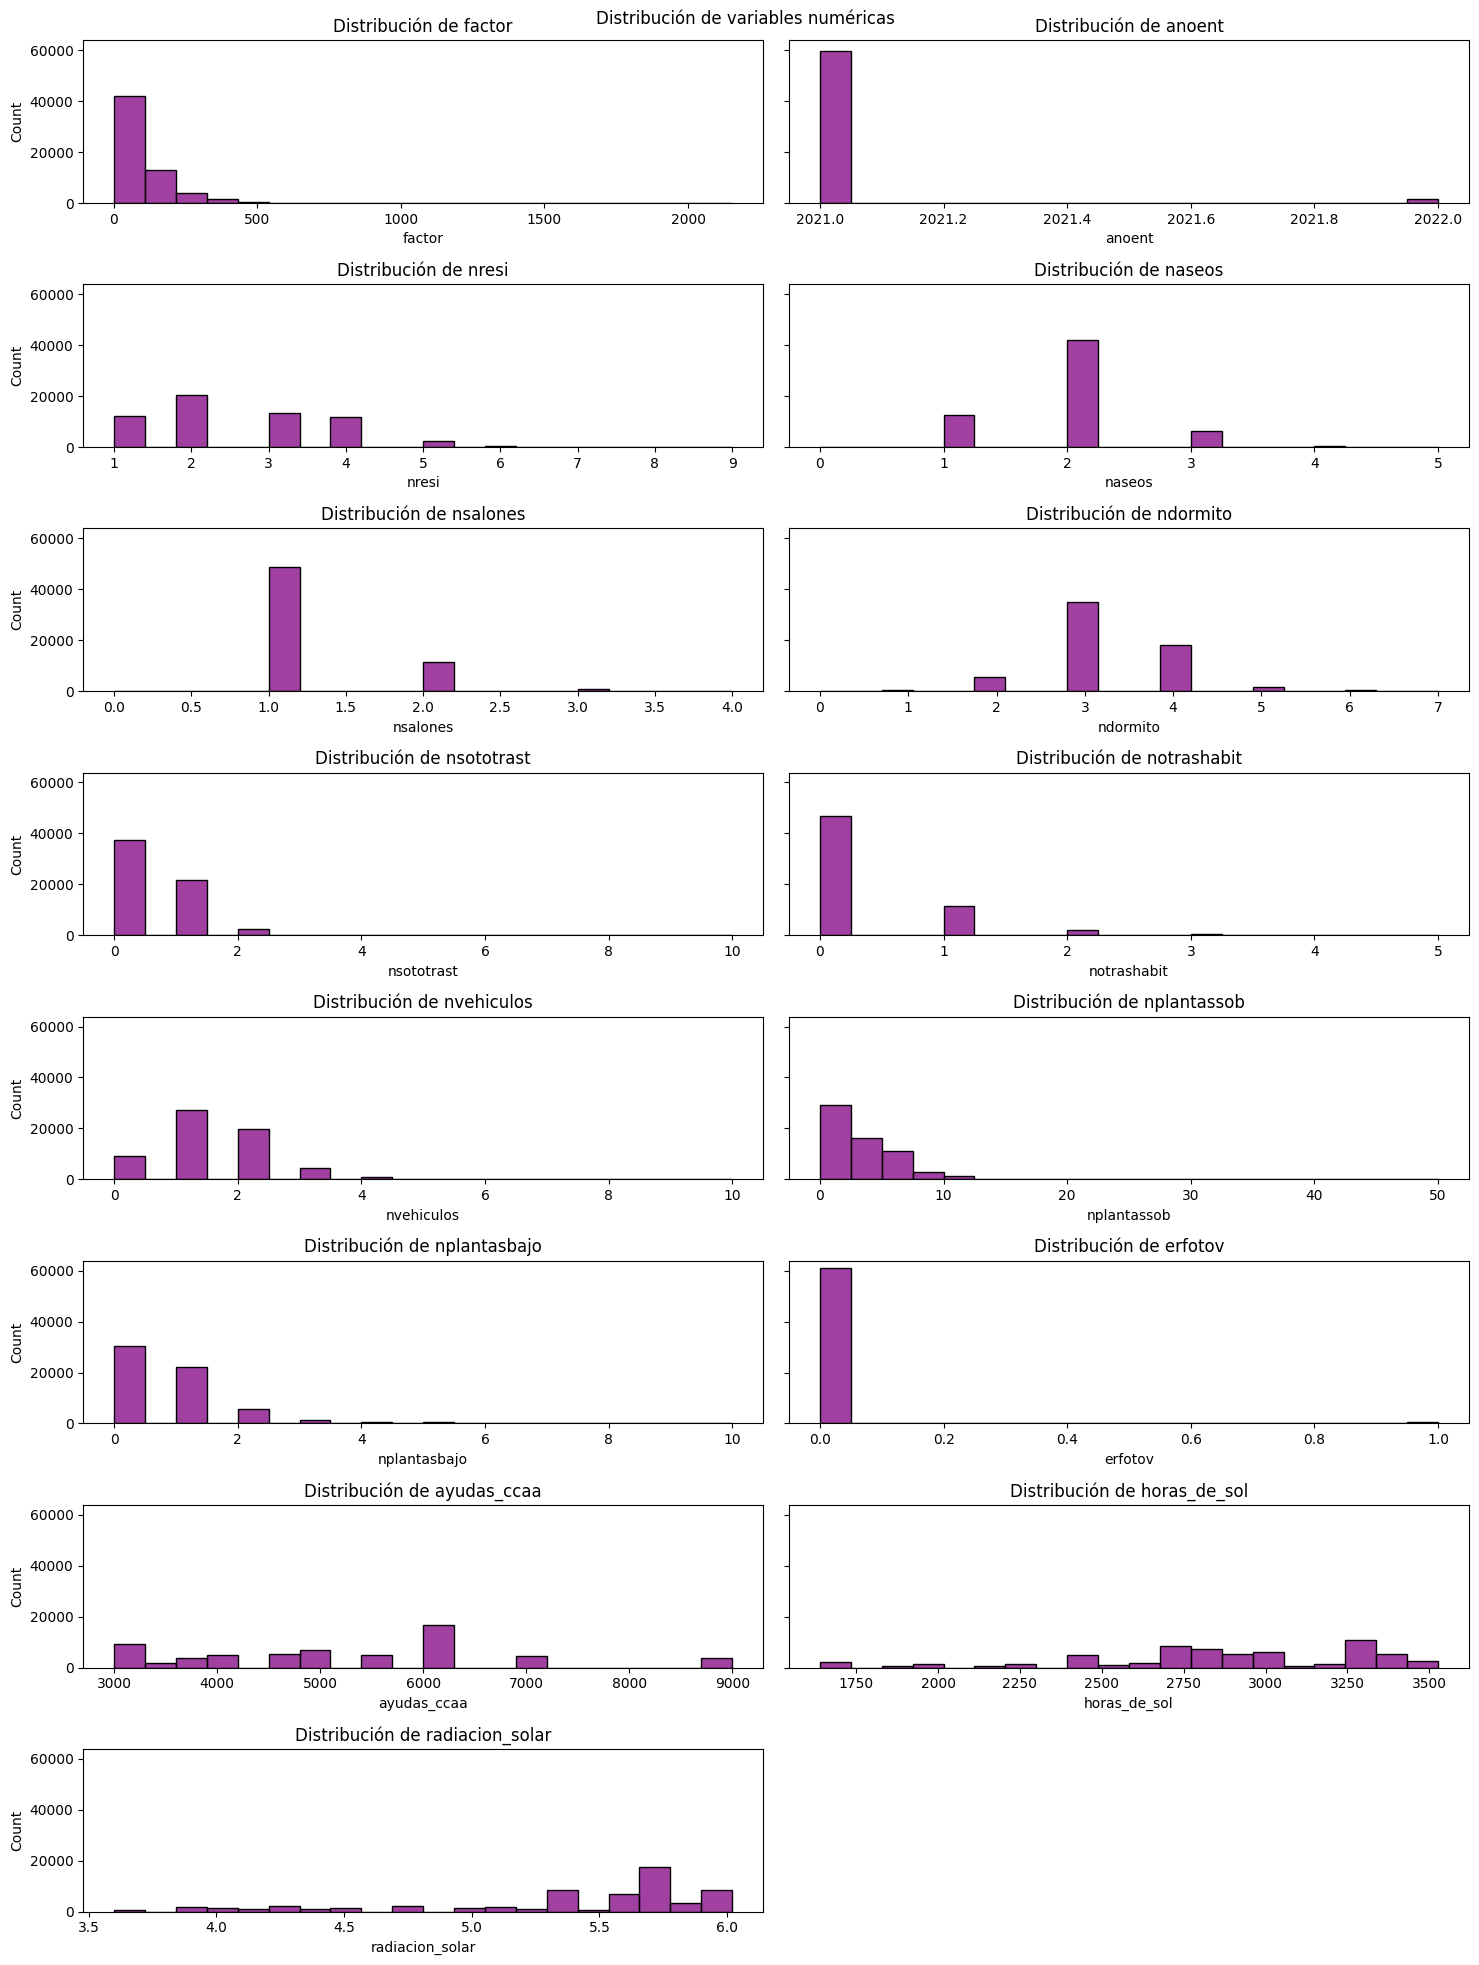

In [57]:
visualizador=f.Visualizador(df_amplias_sin_outliers)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

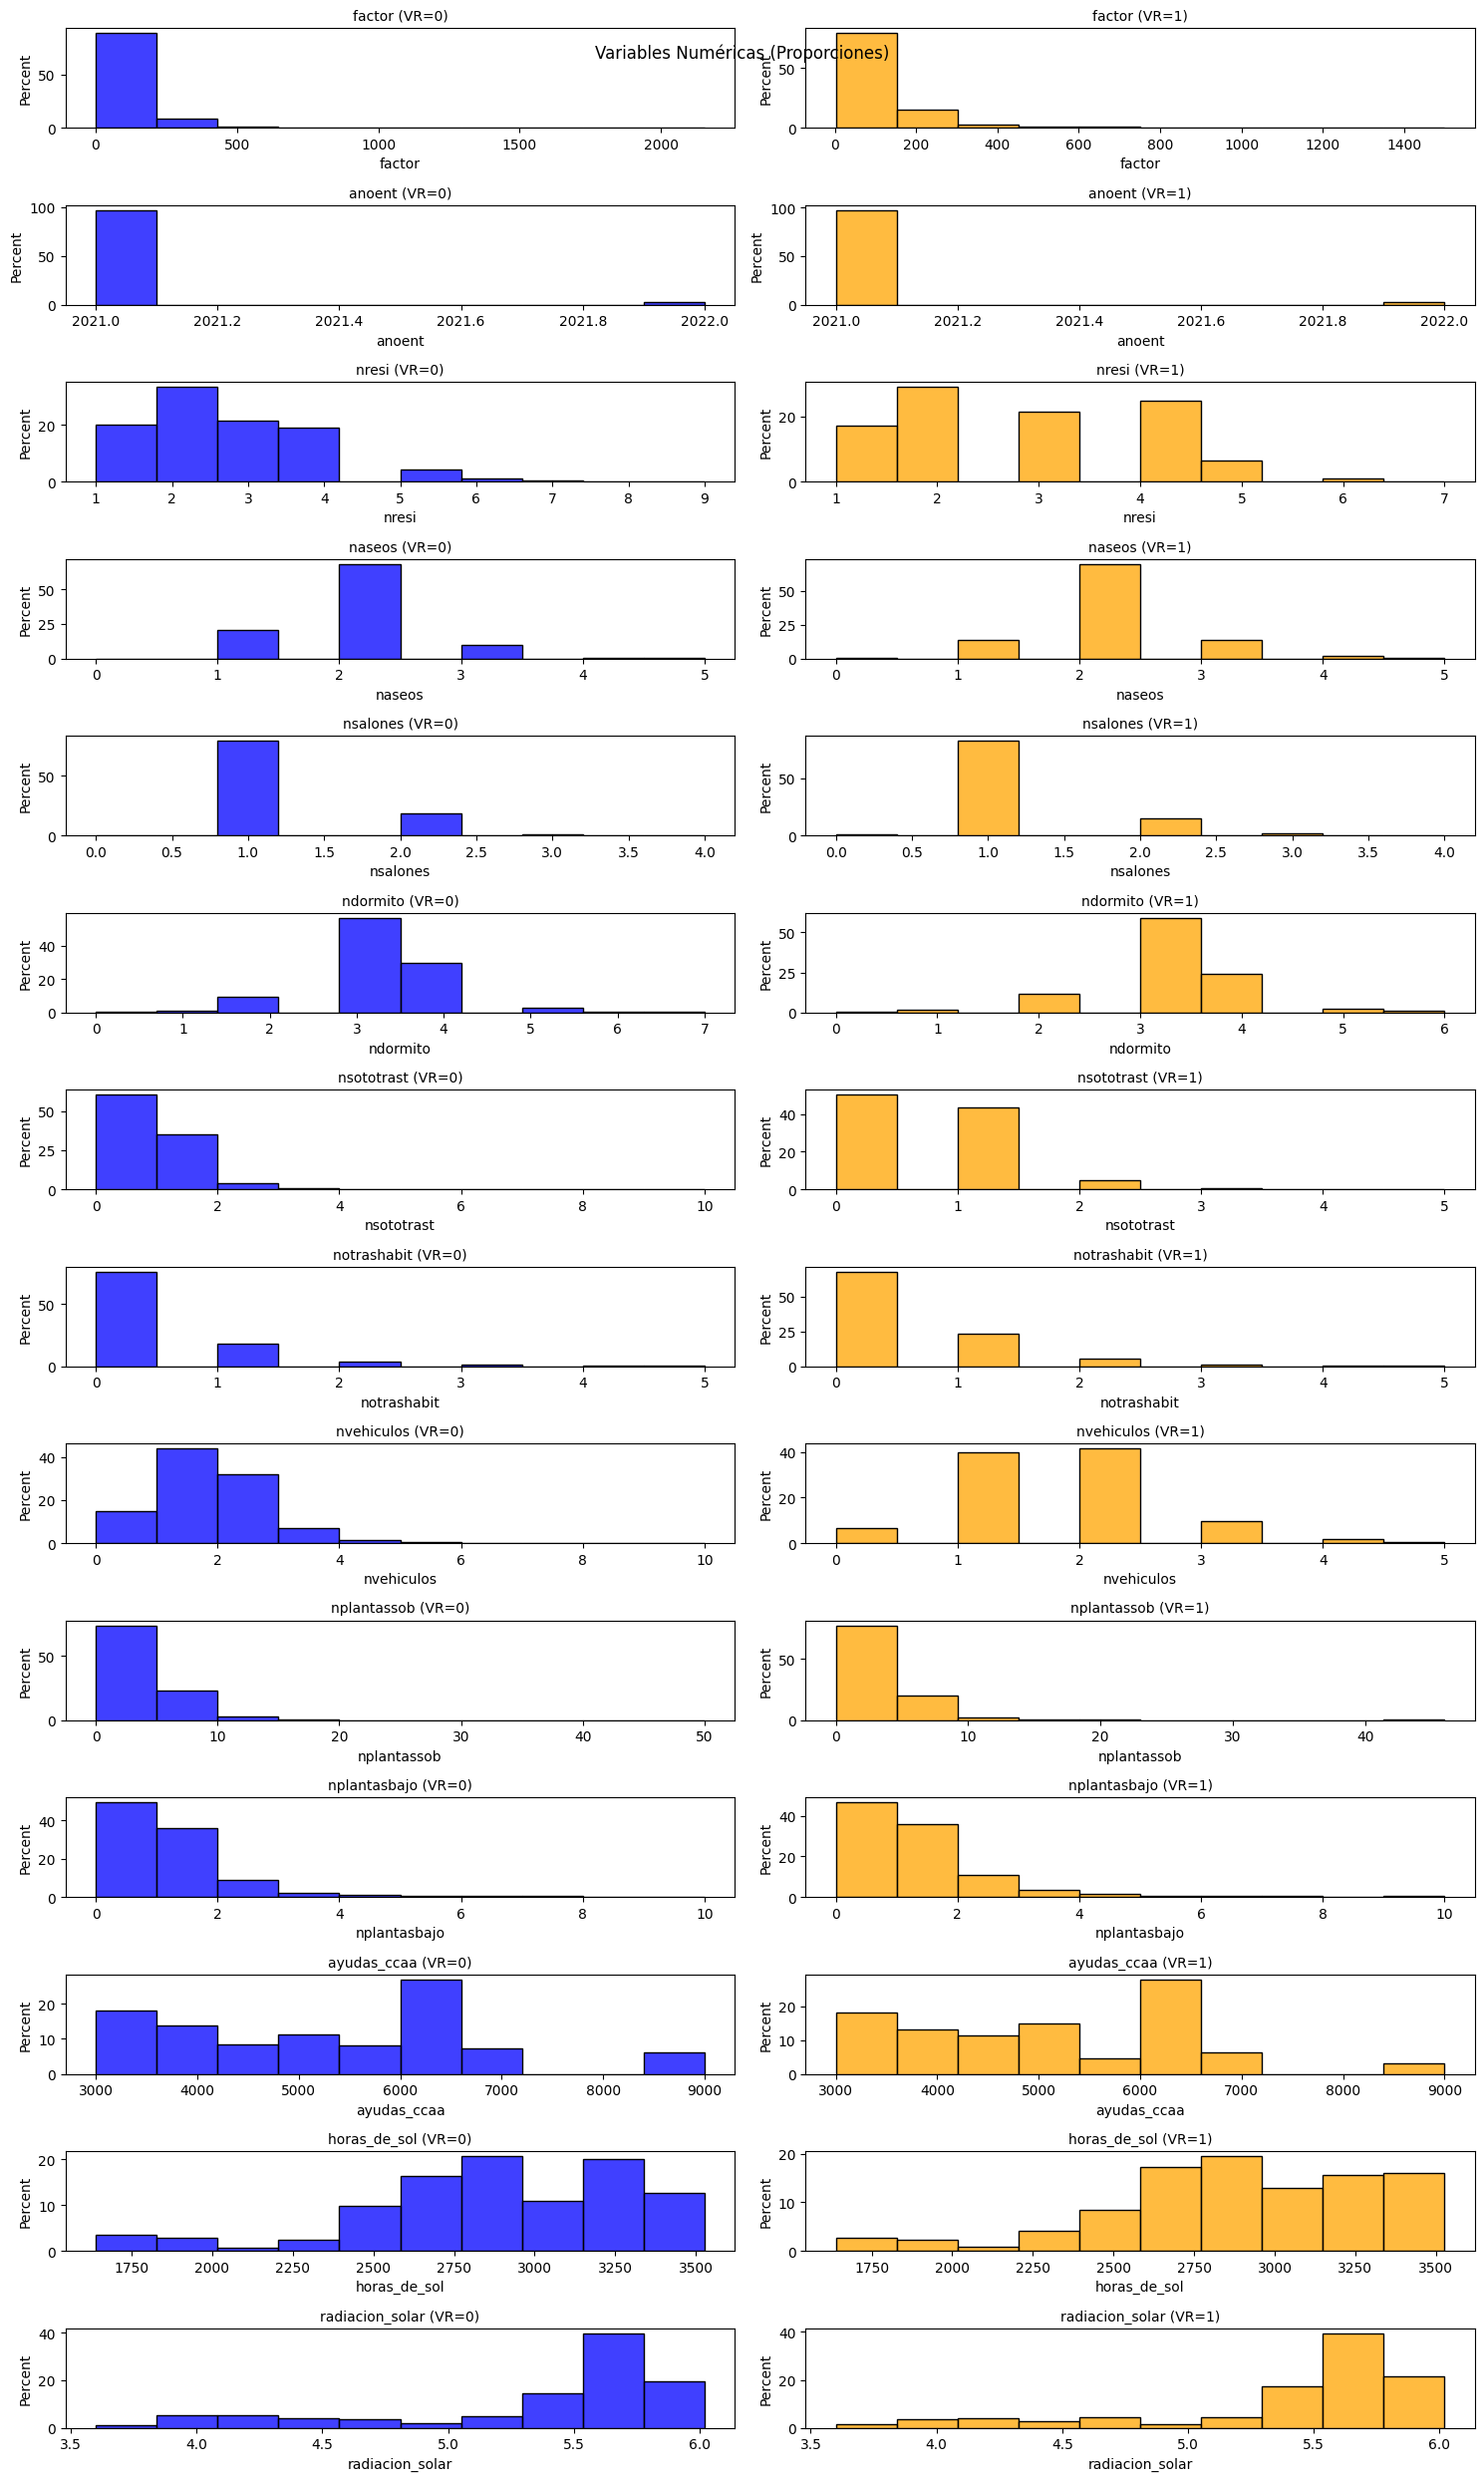

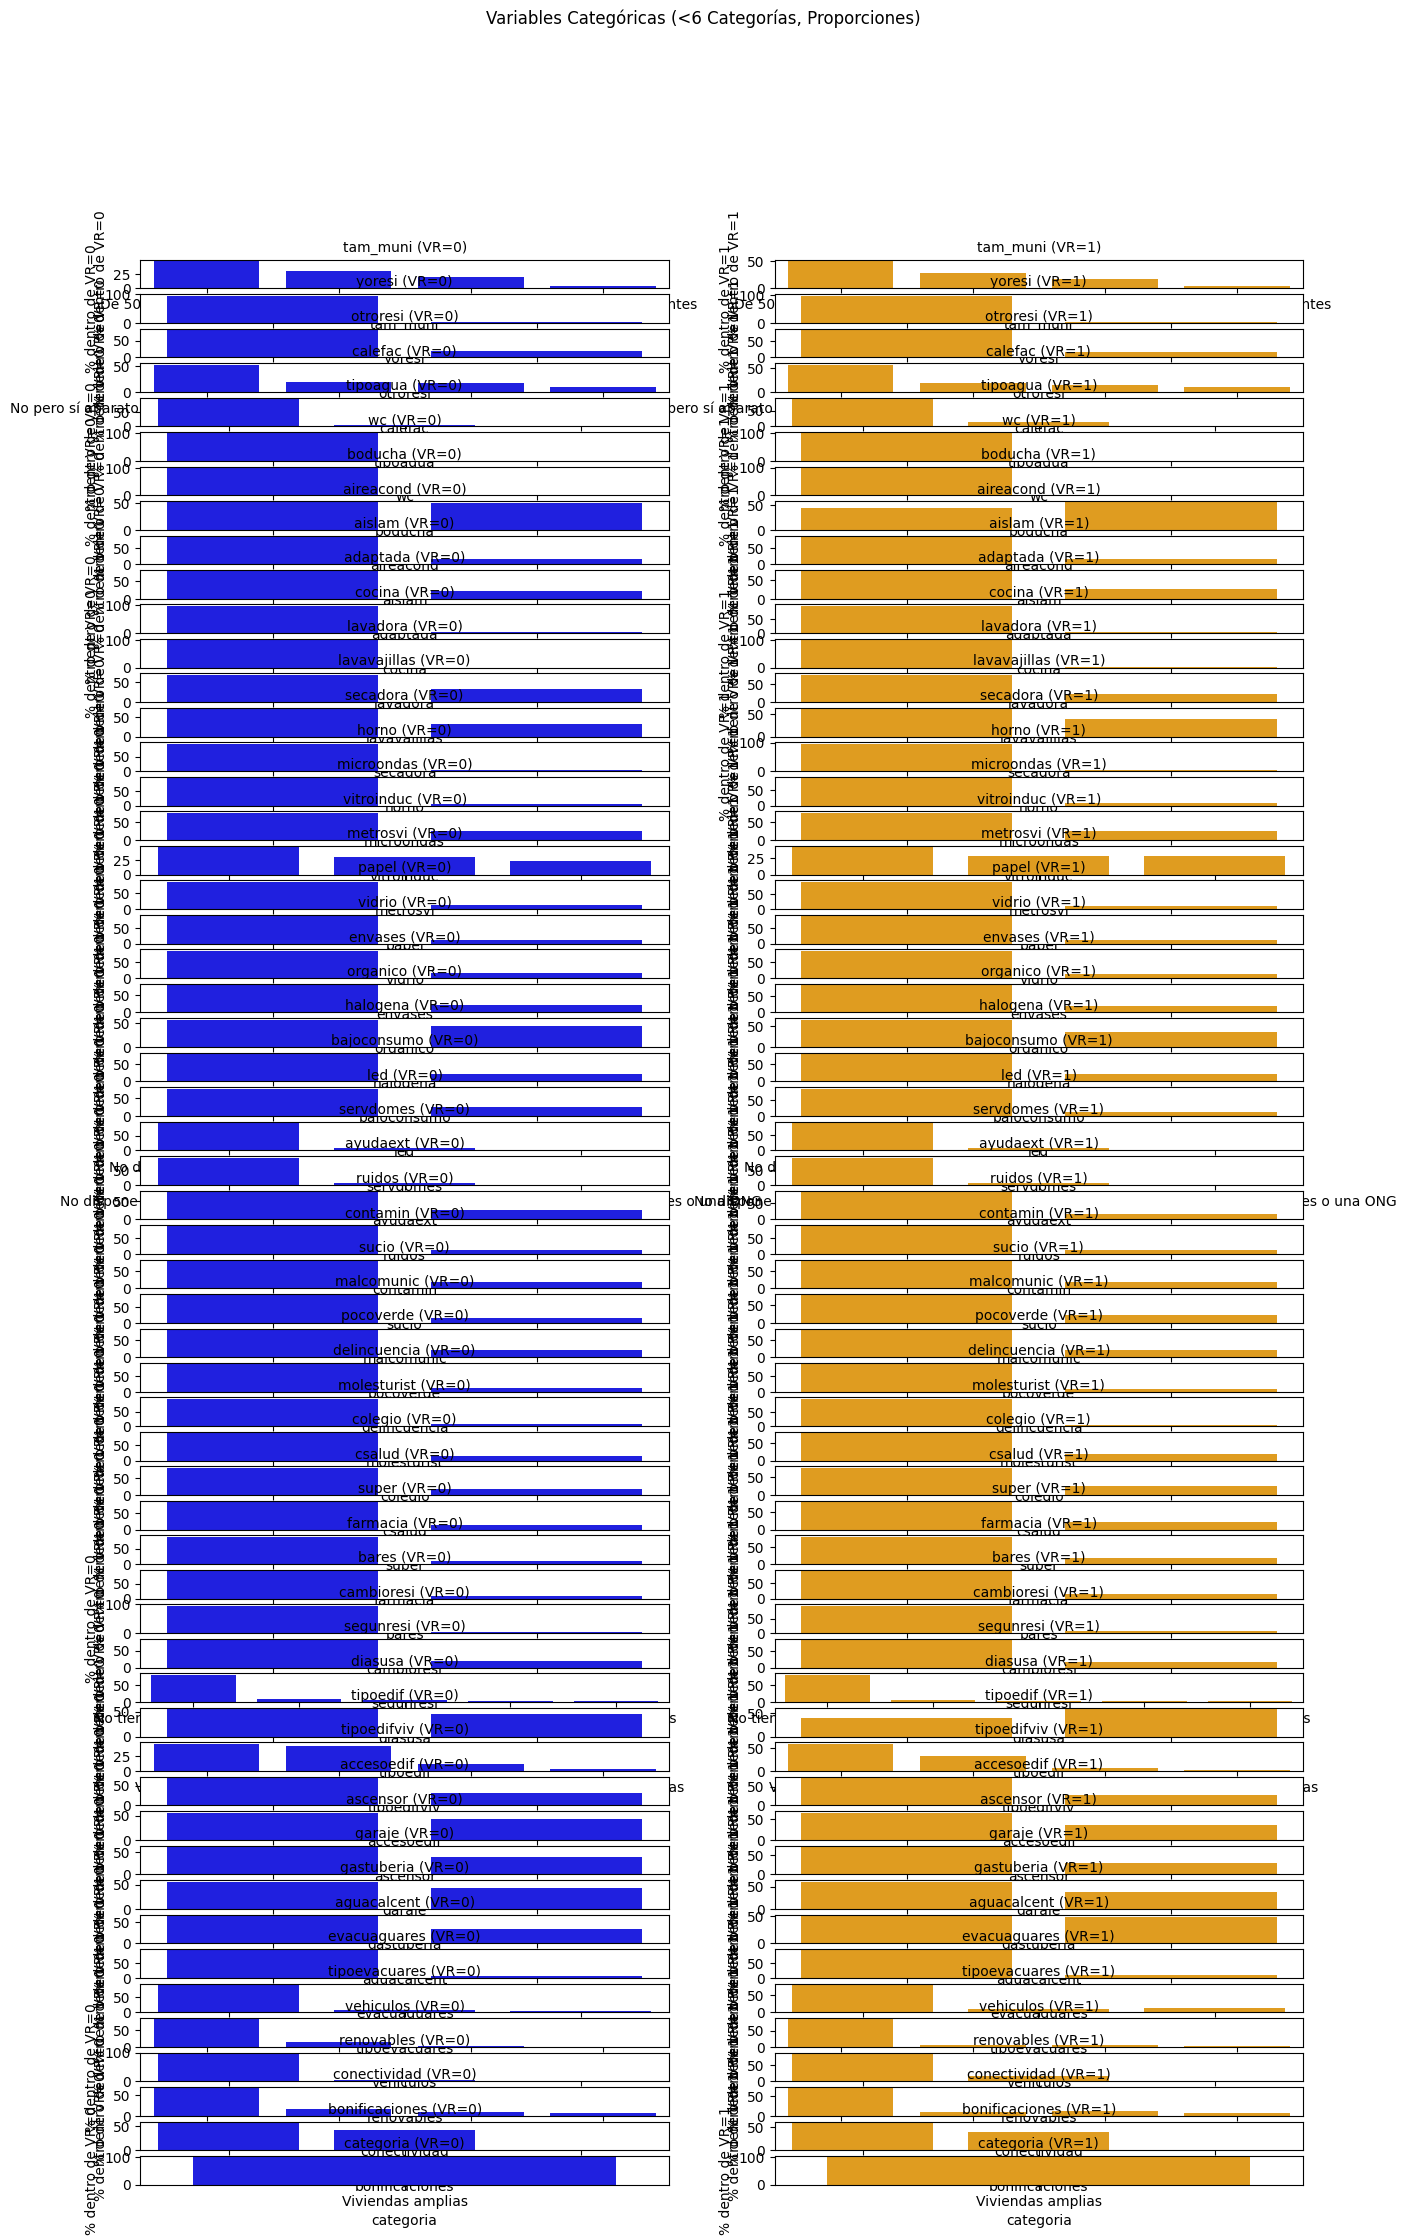

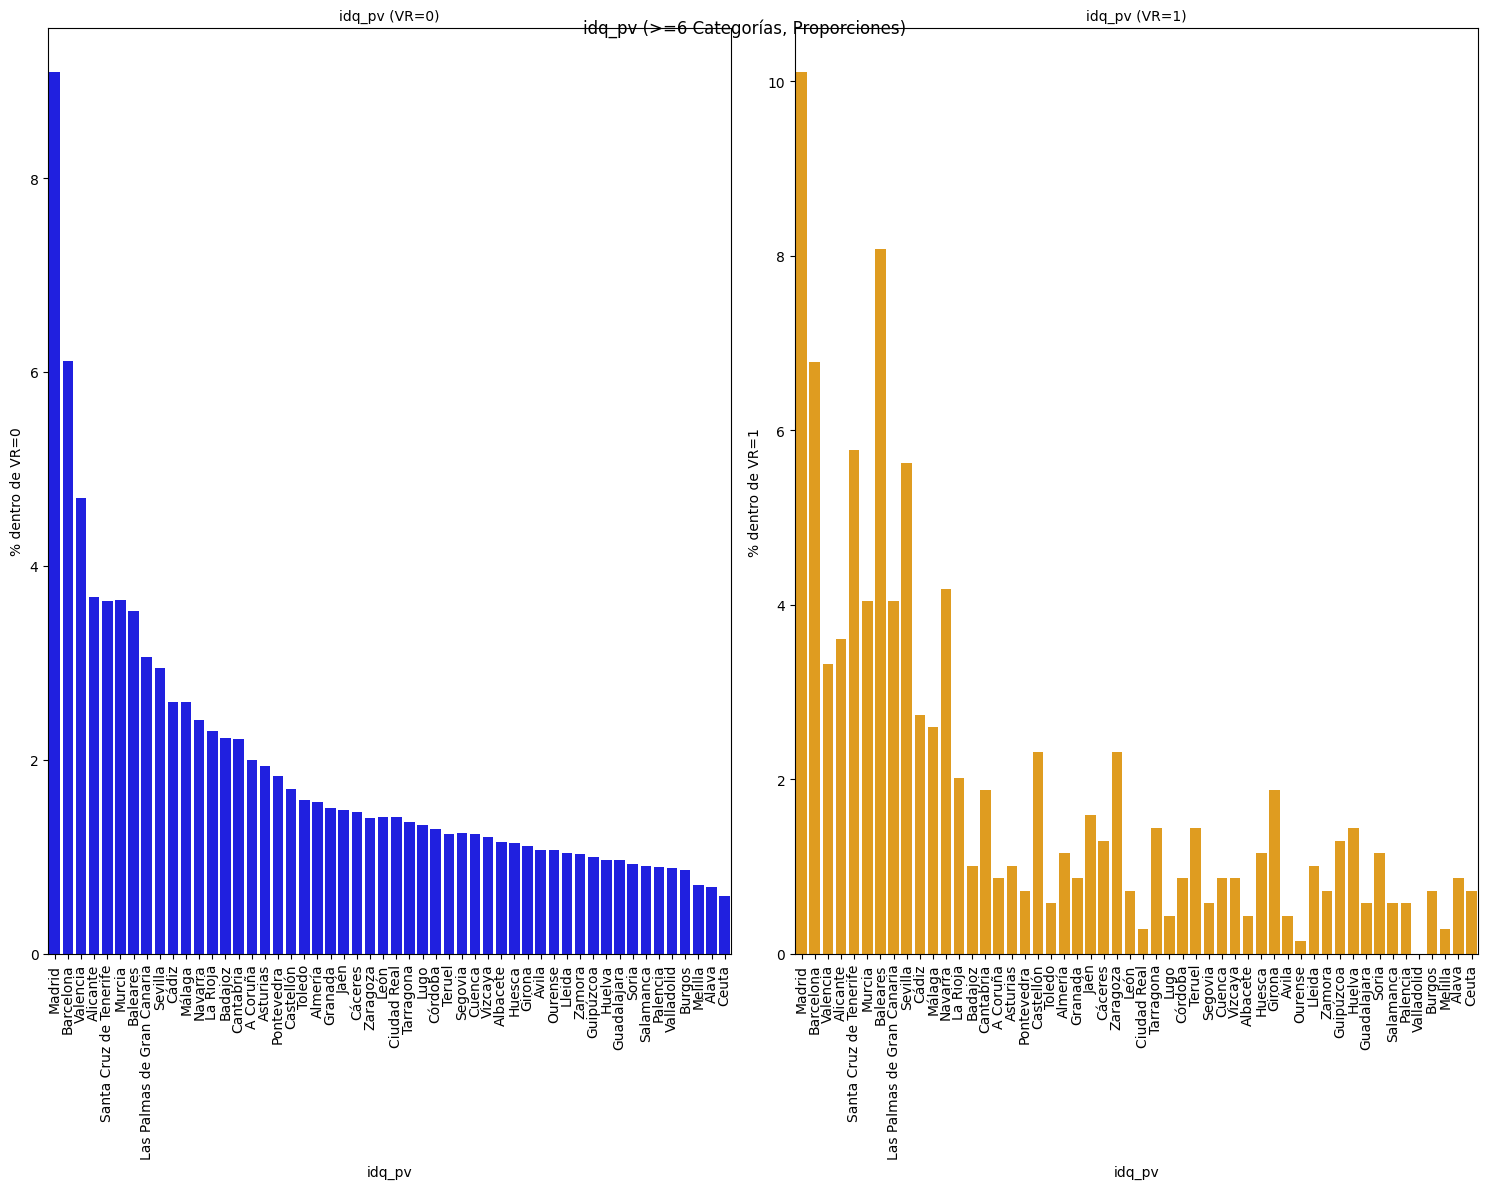

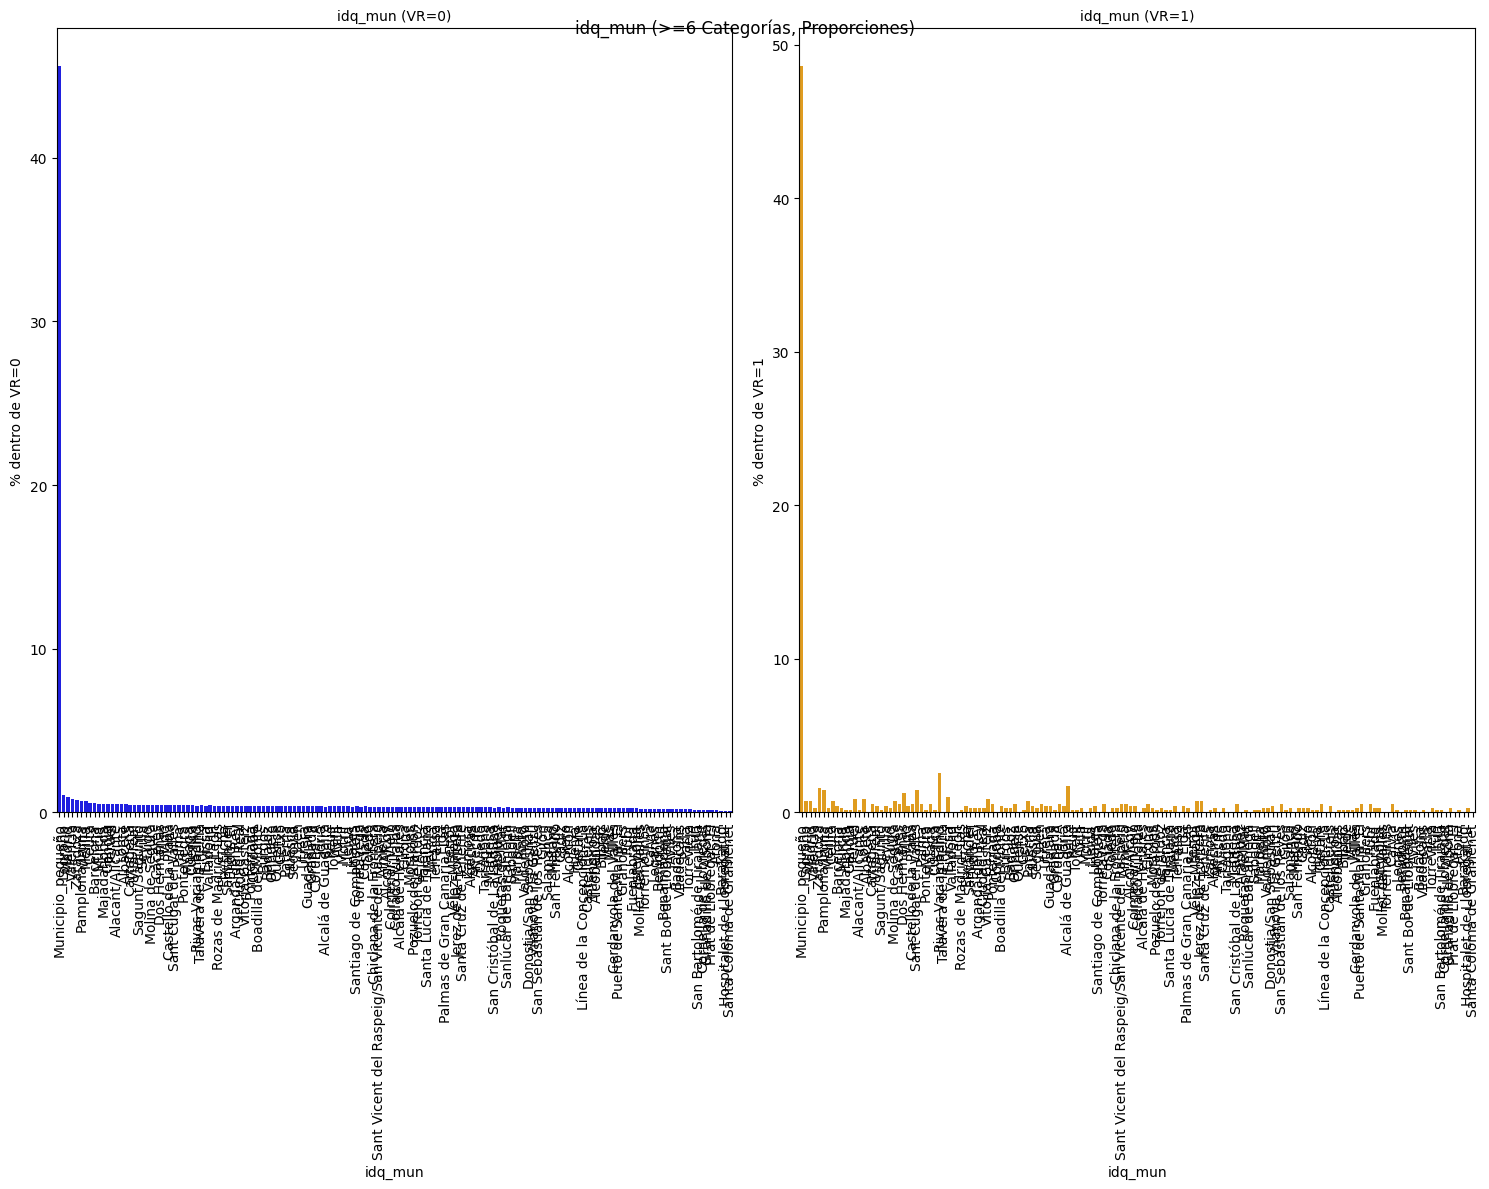

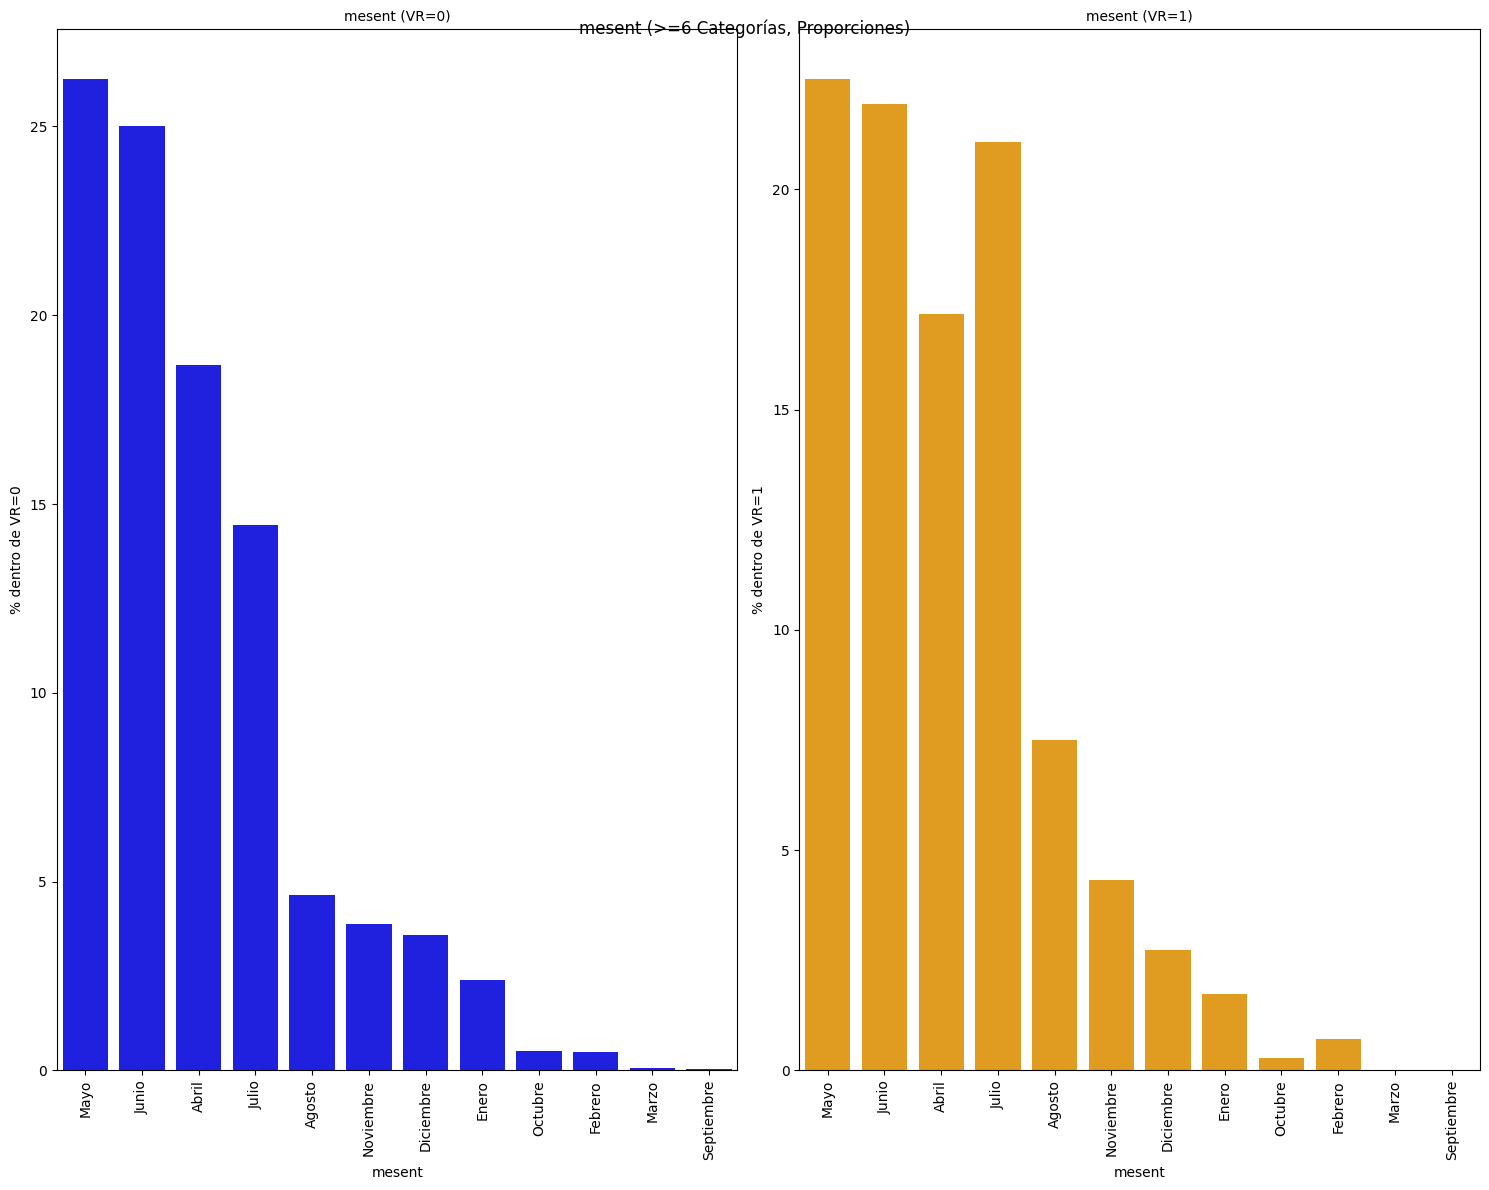

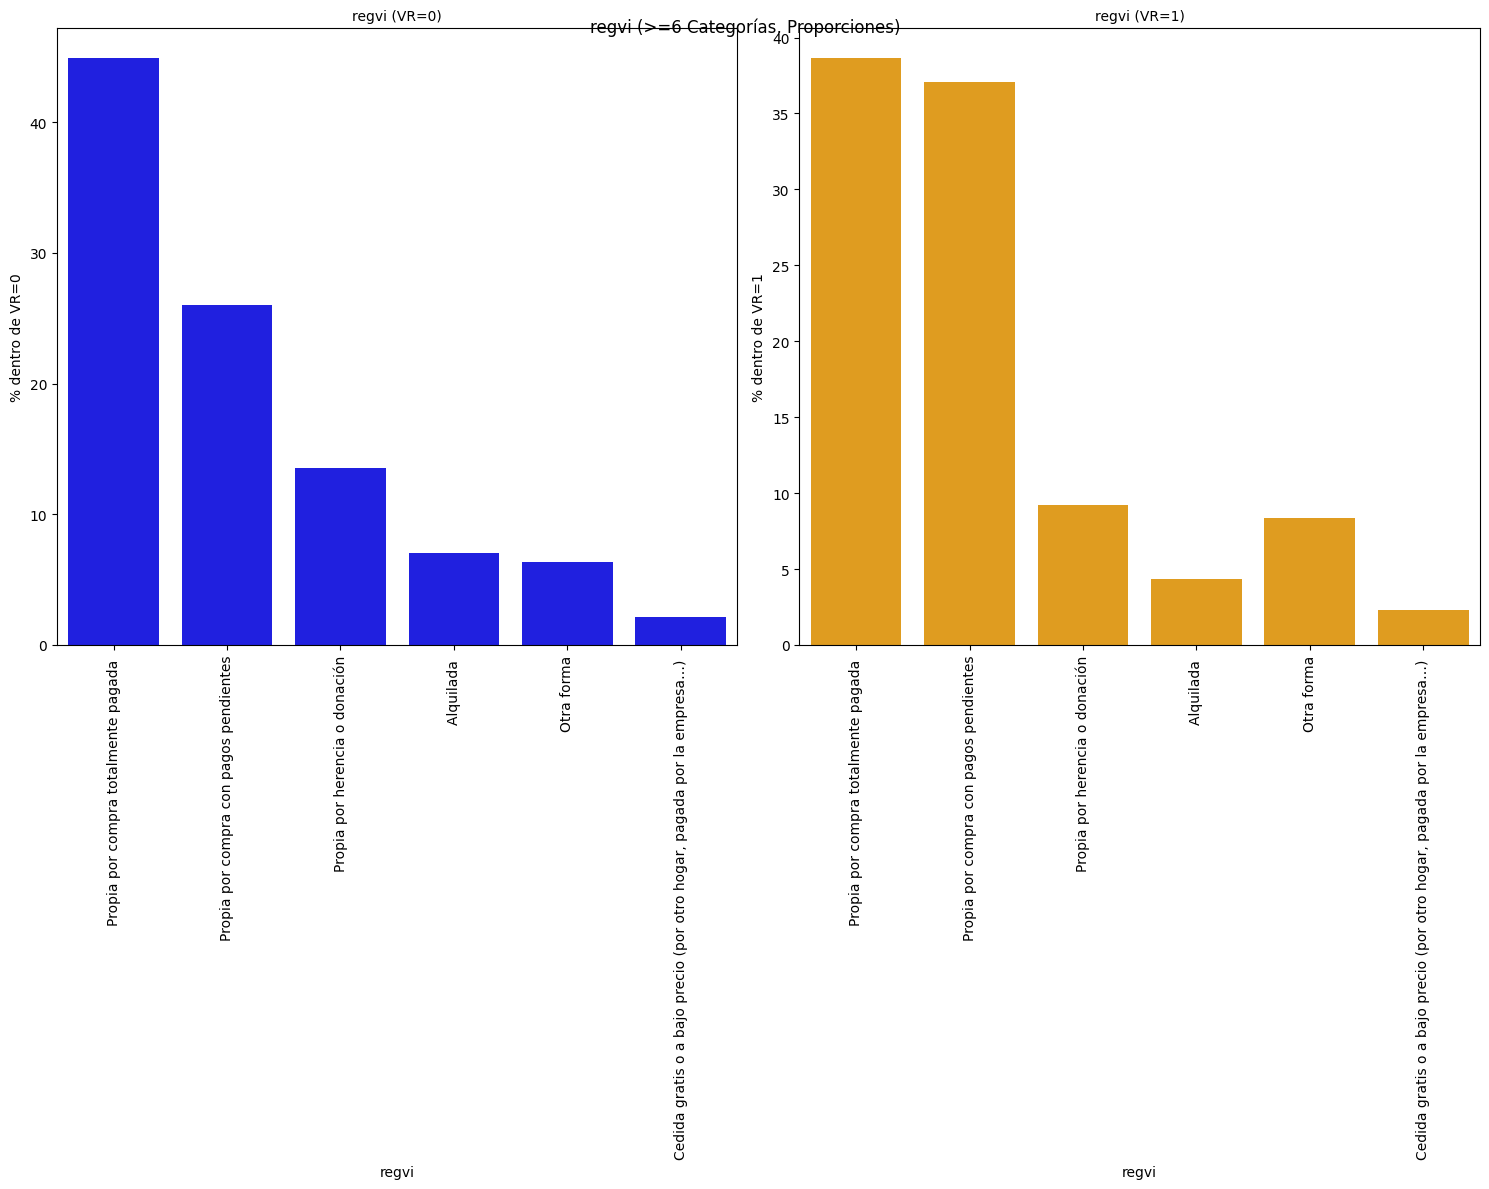

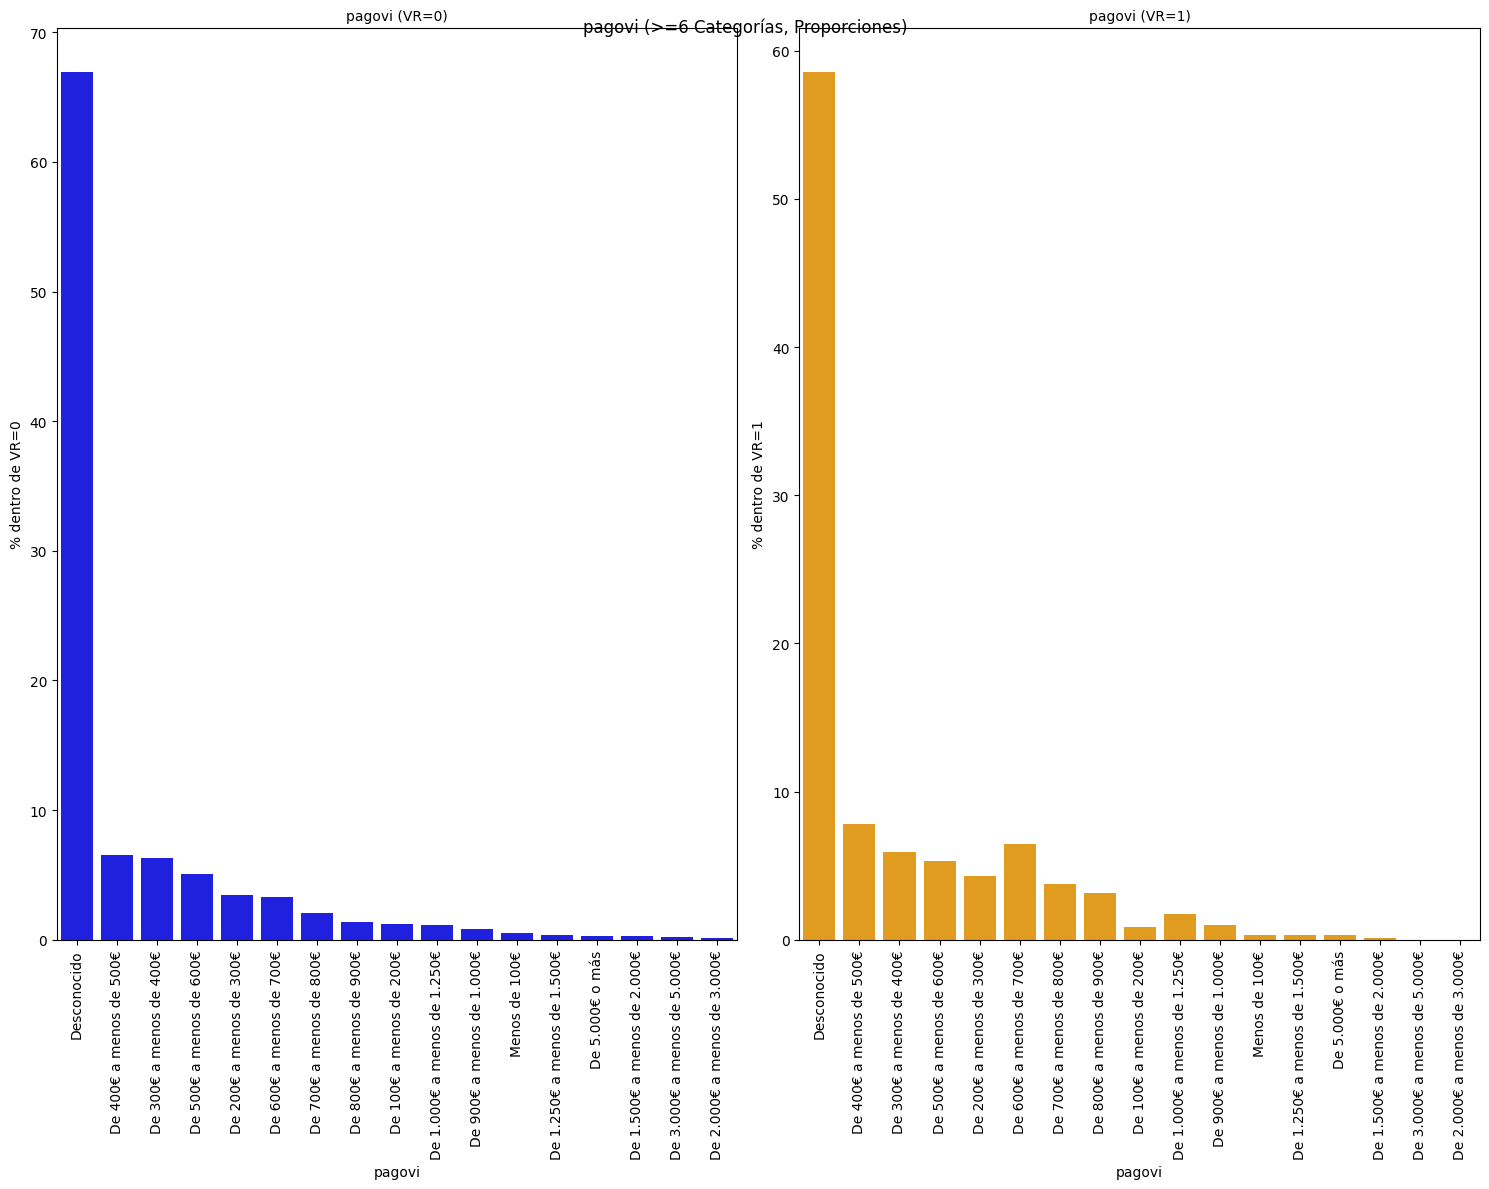

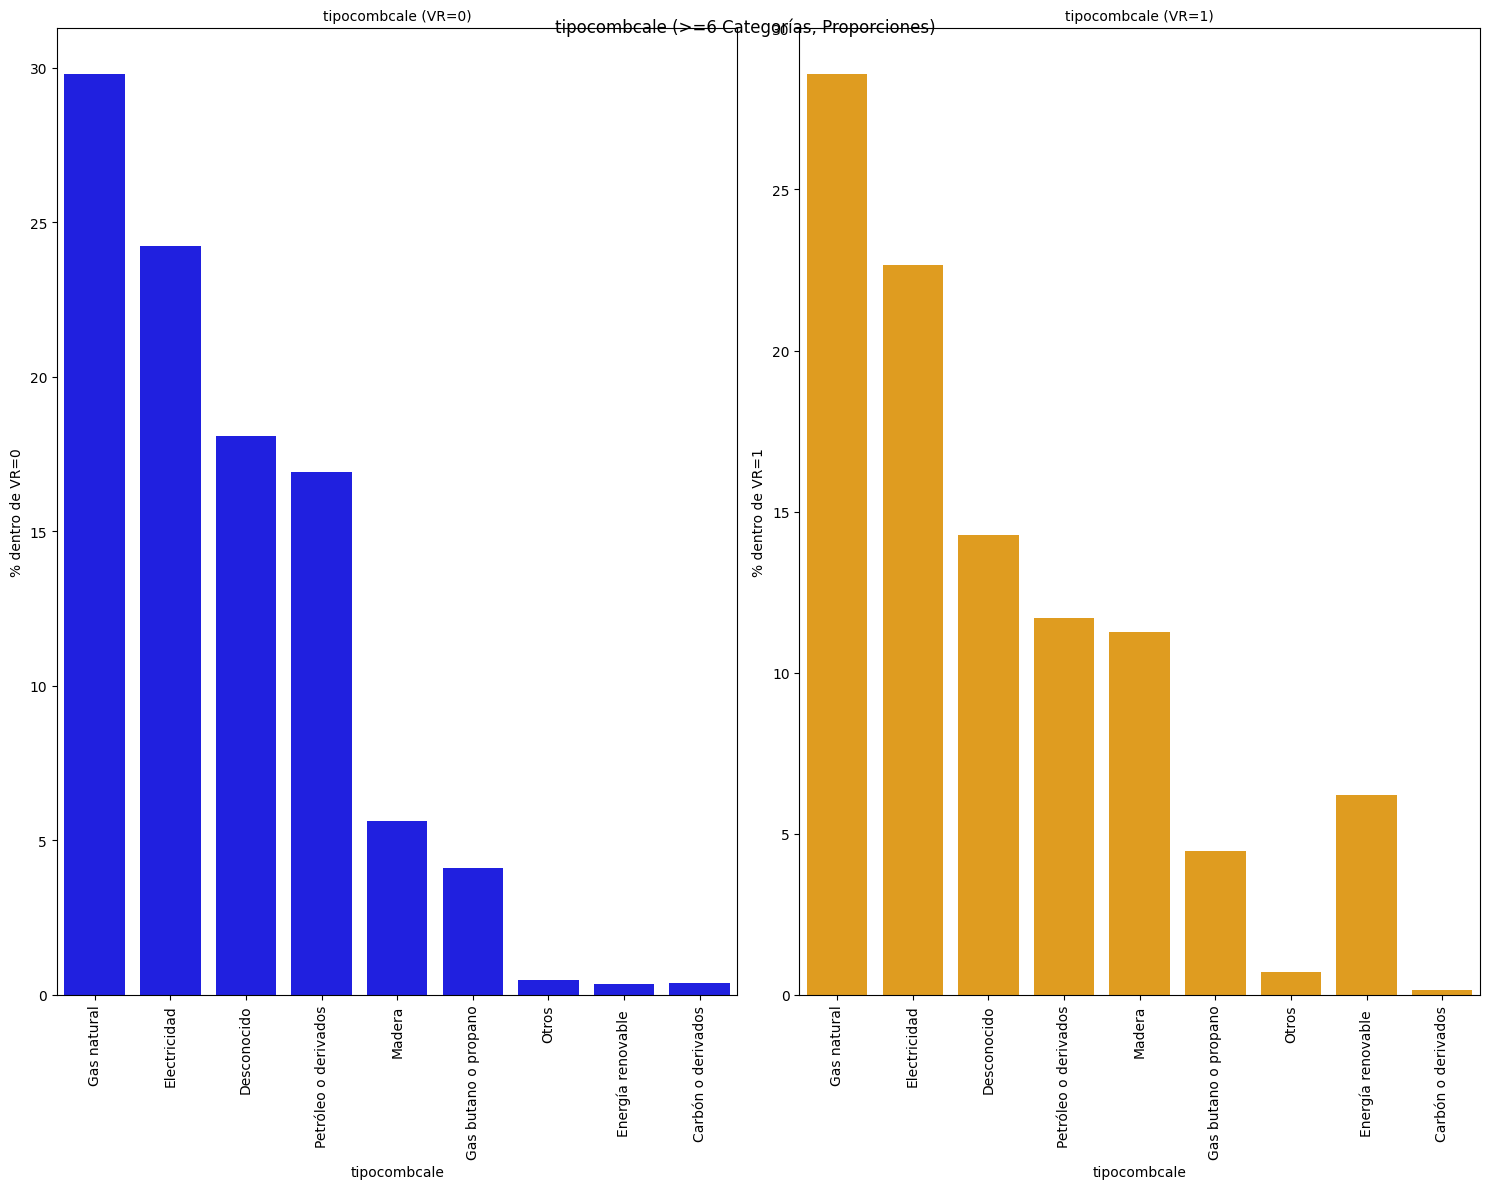

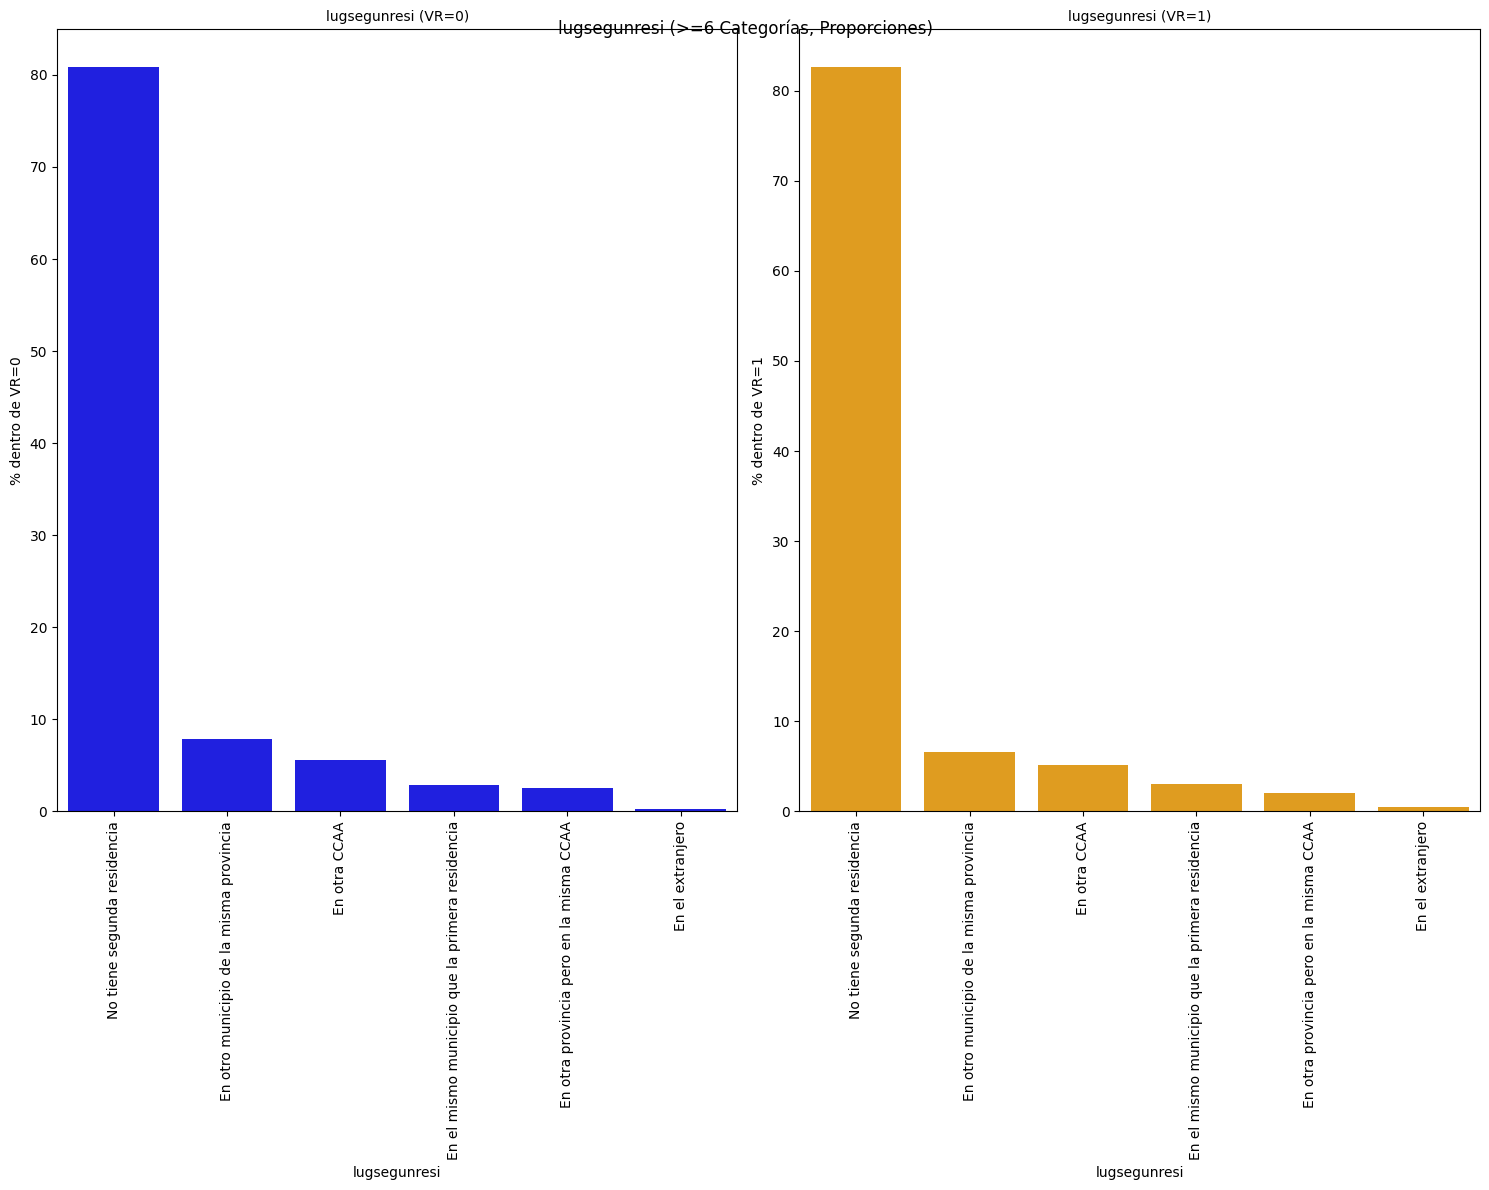

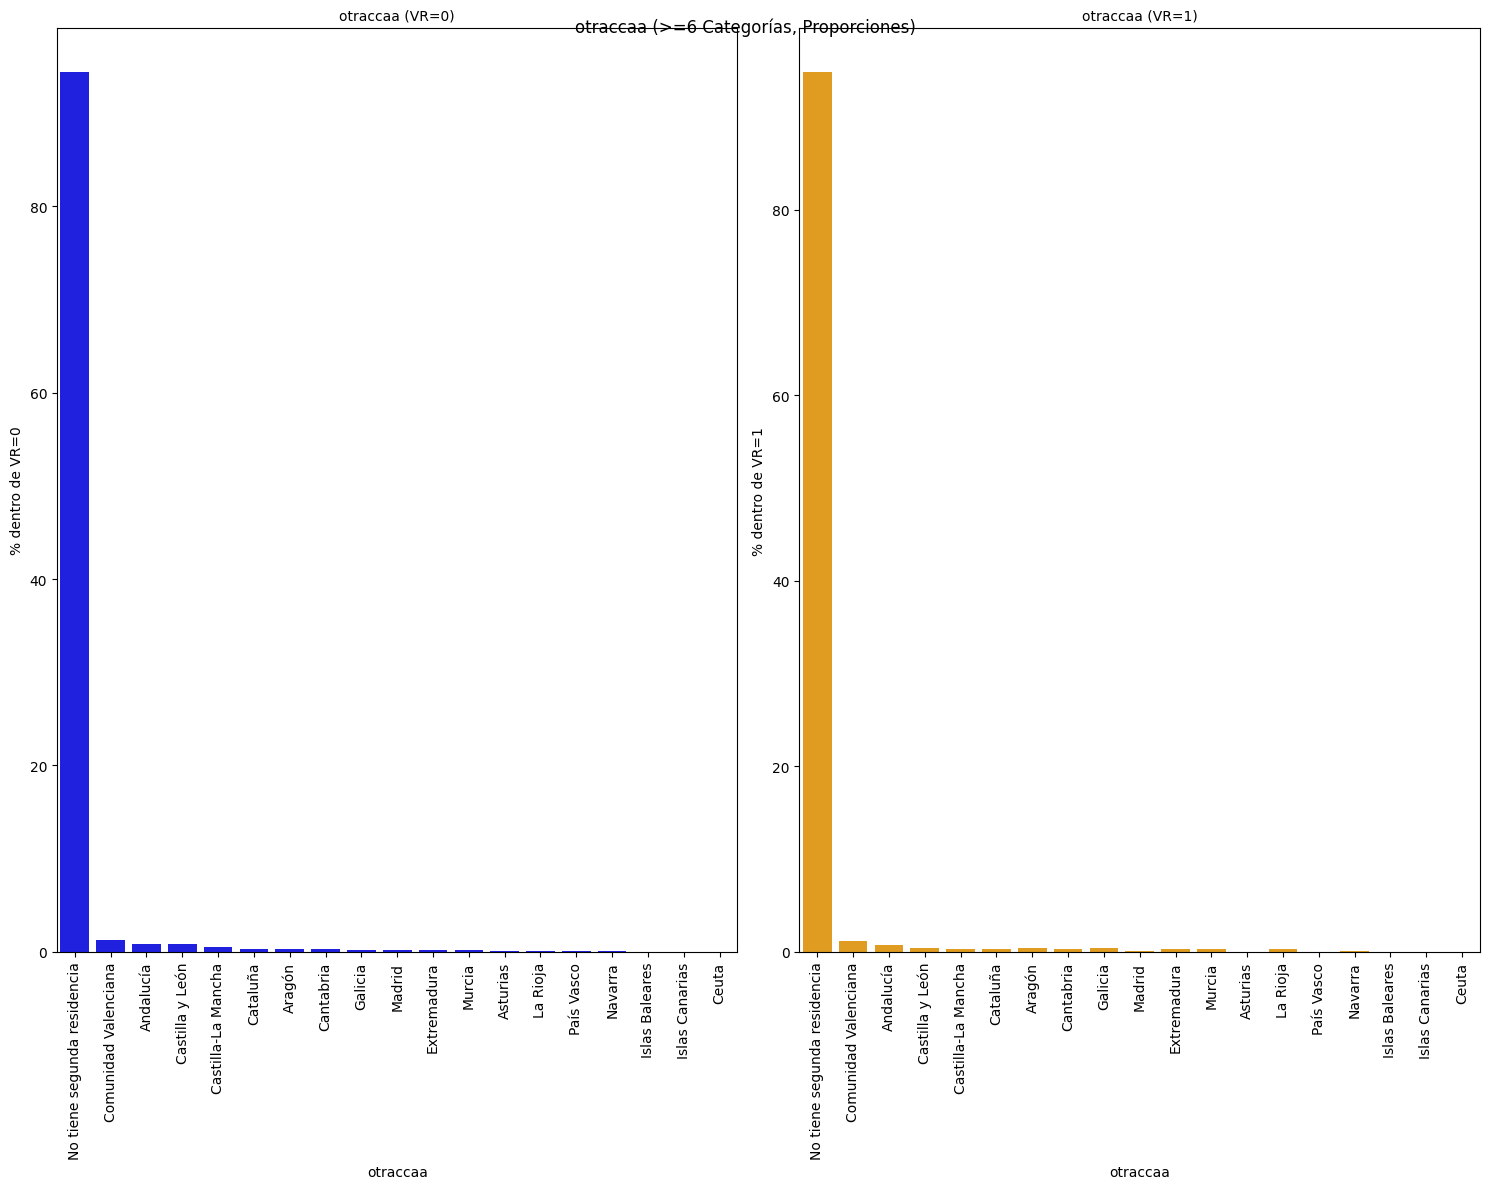

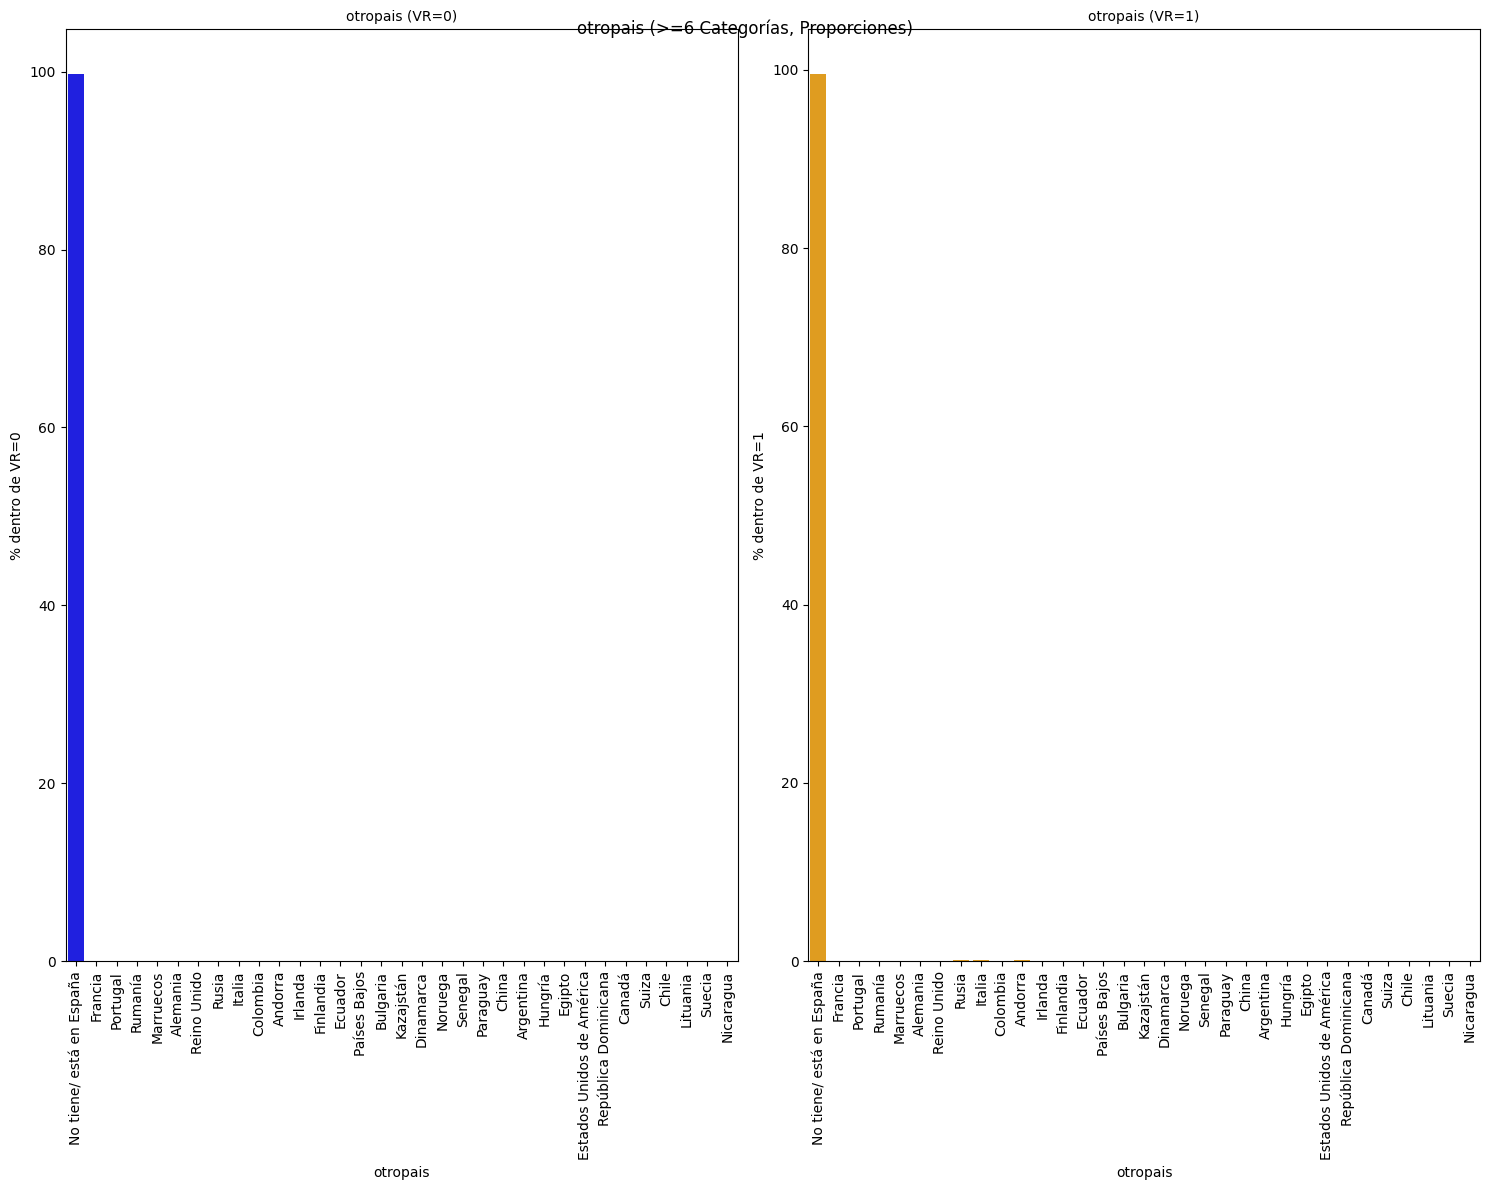

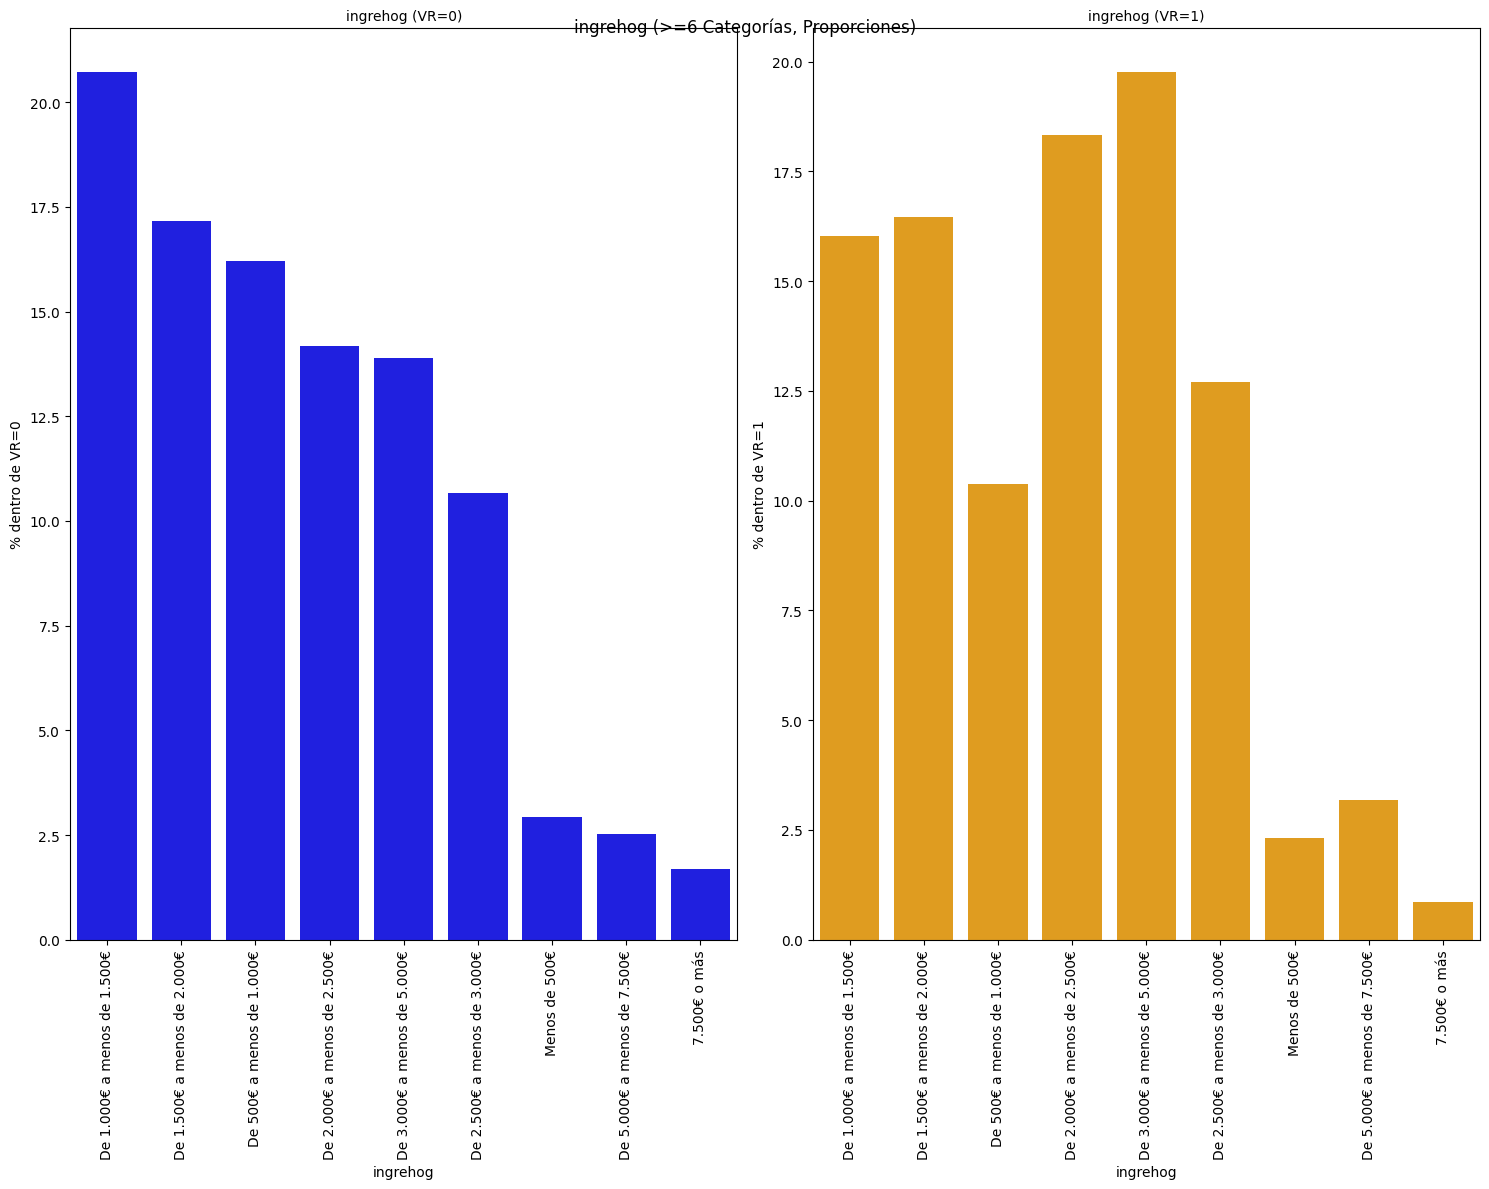

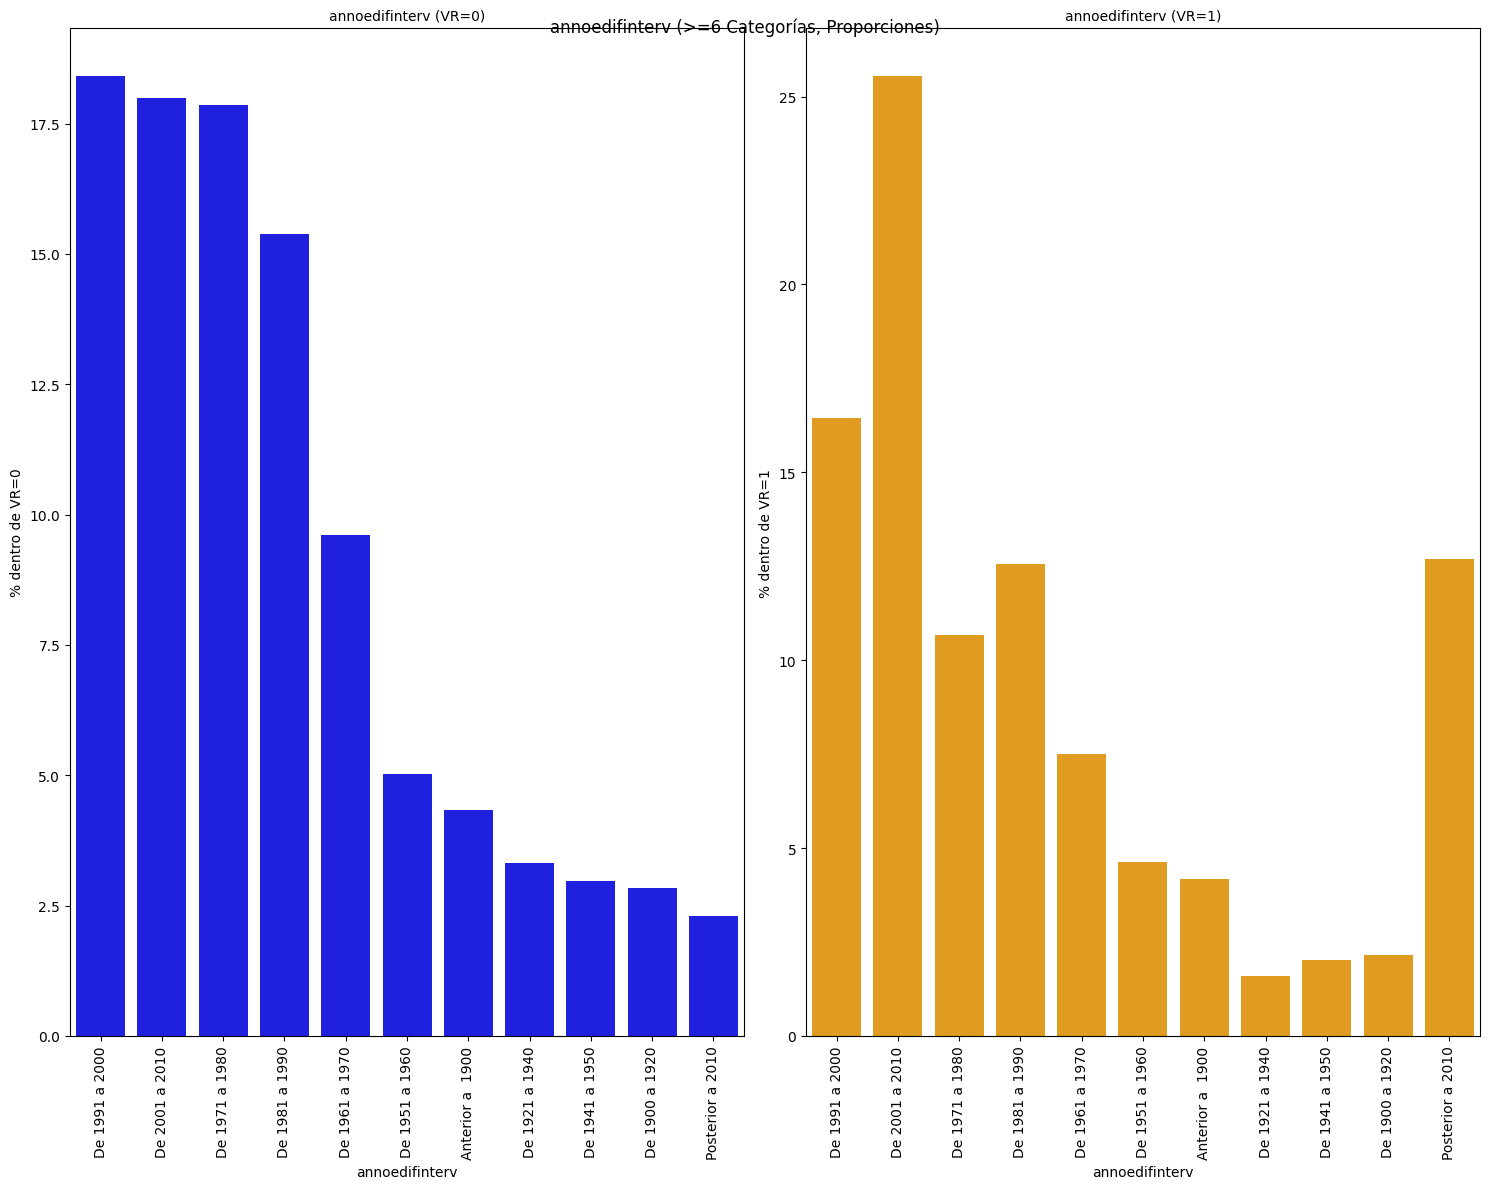

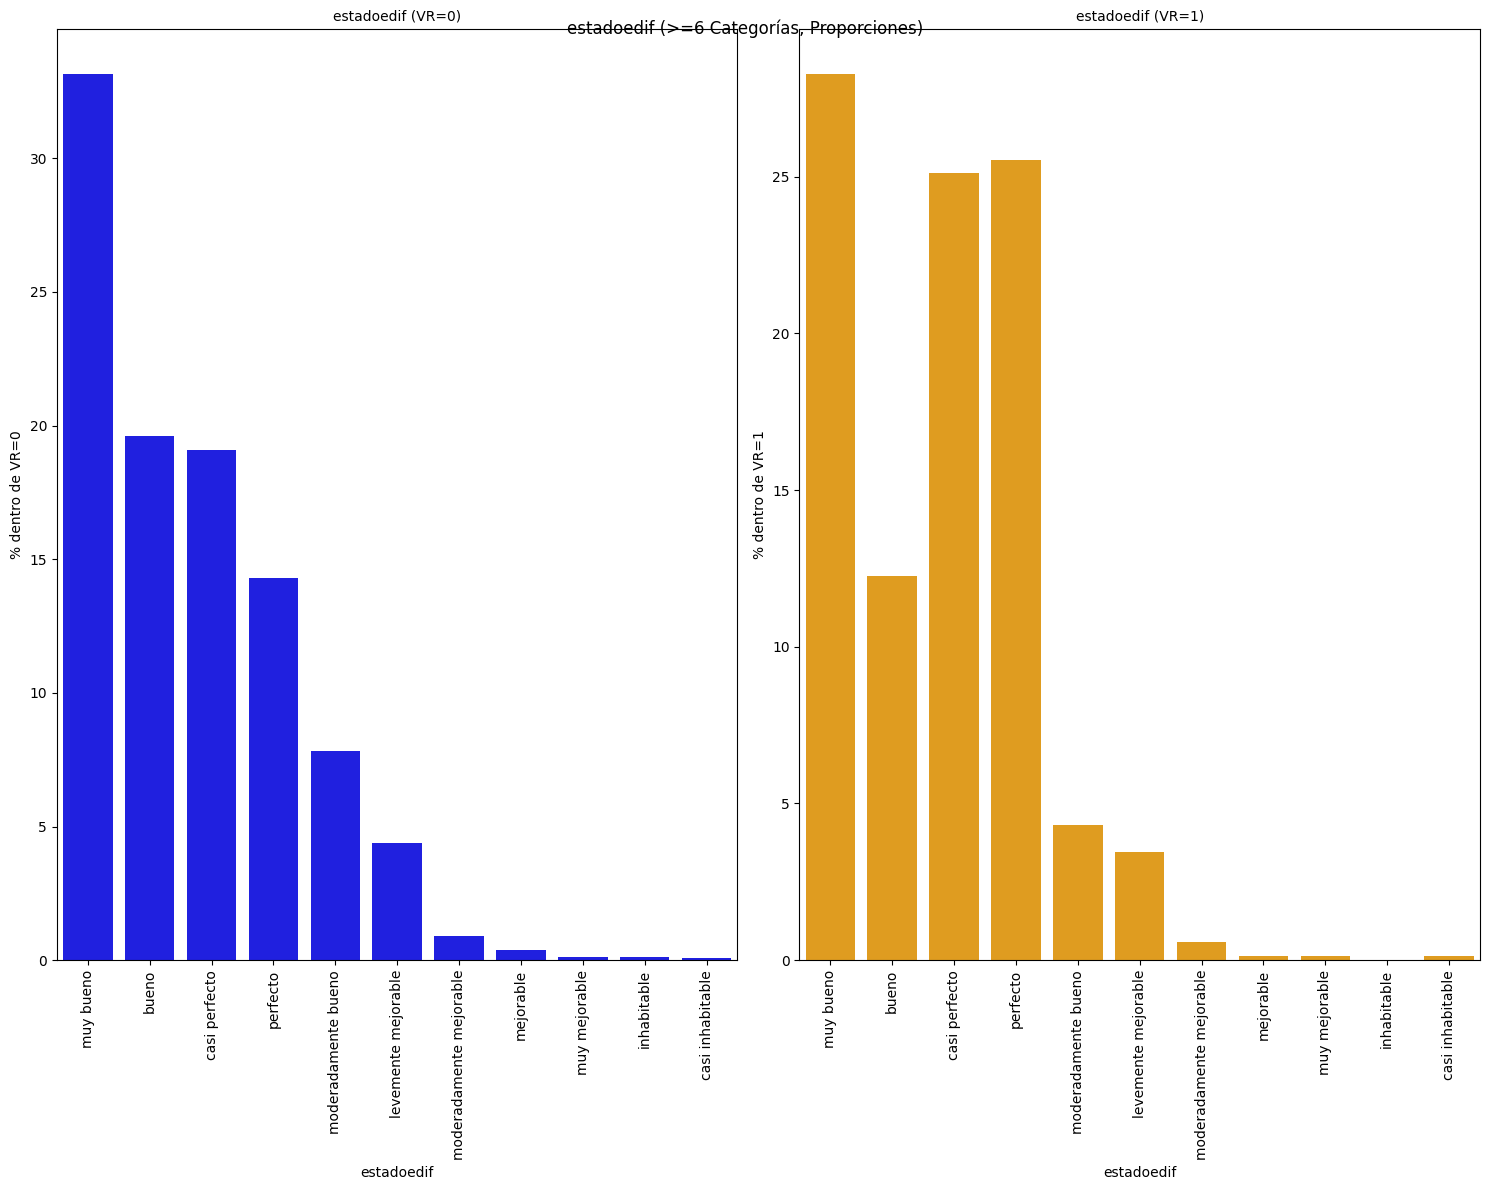

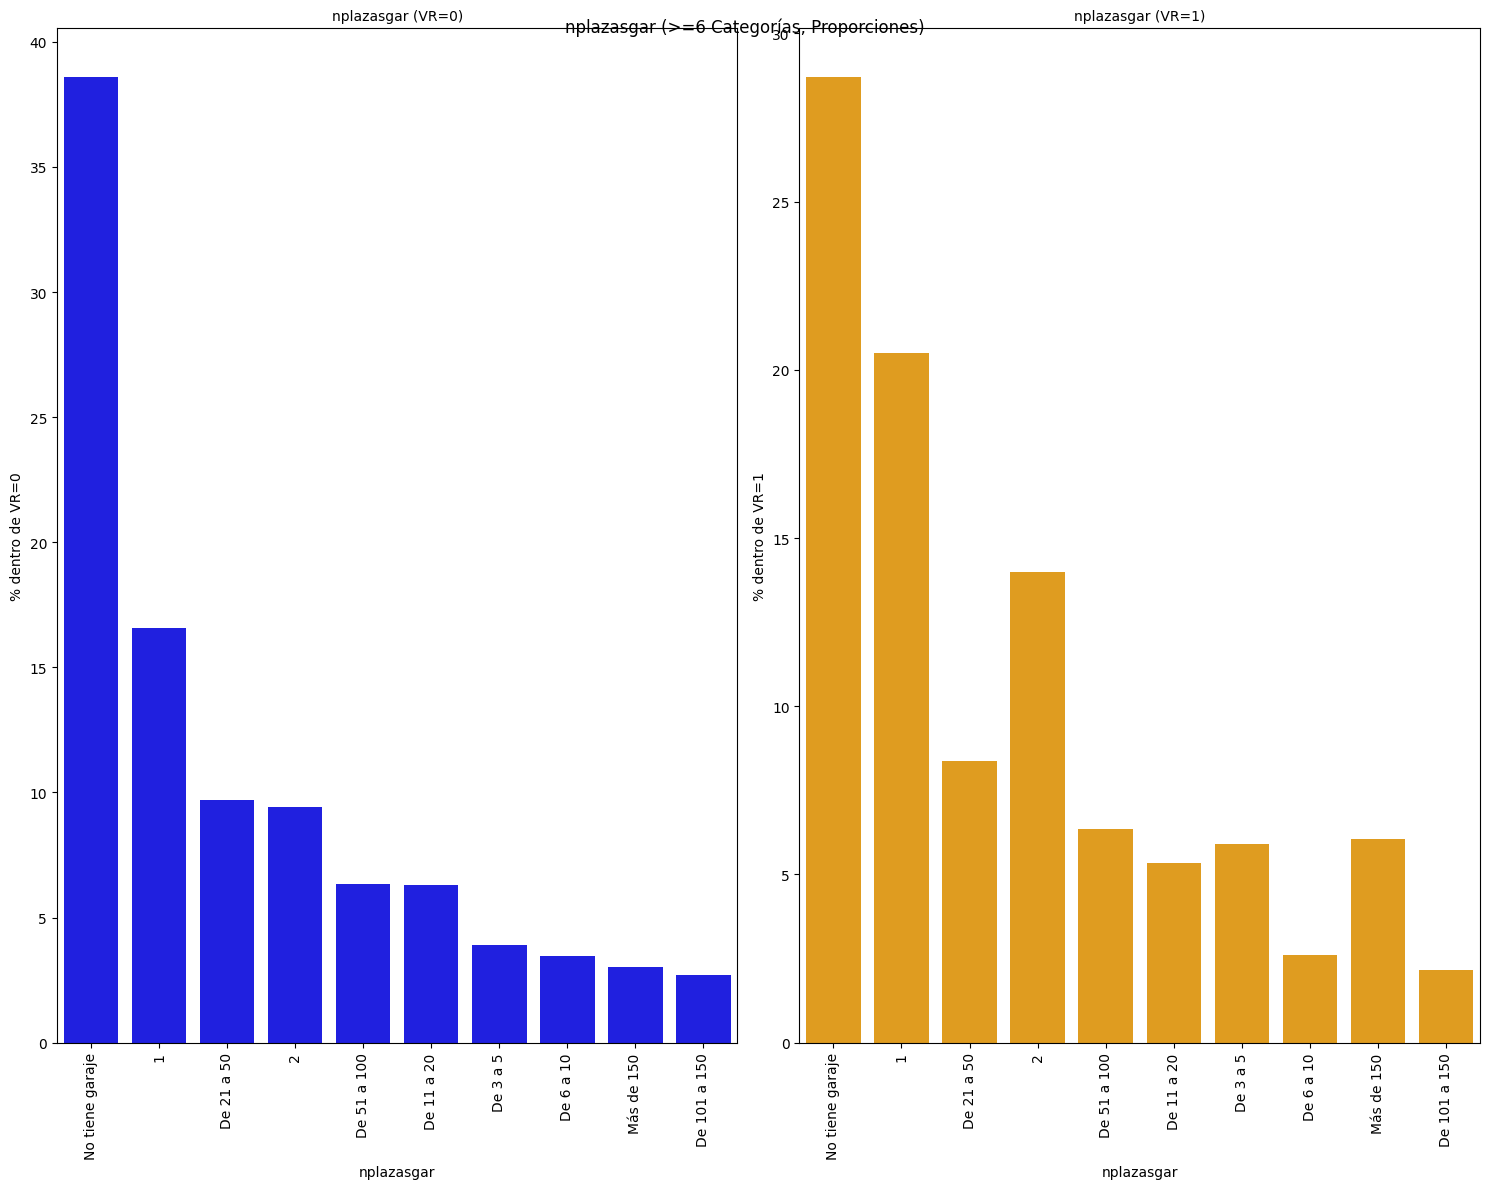

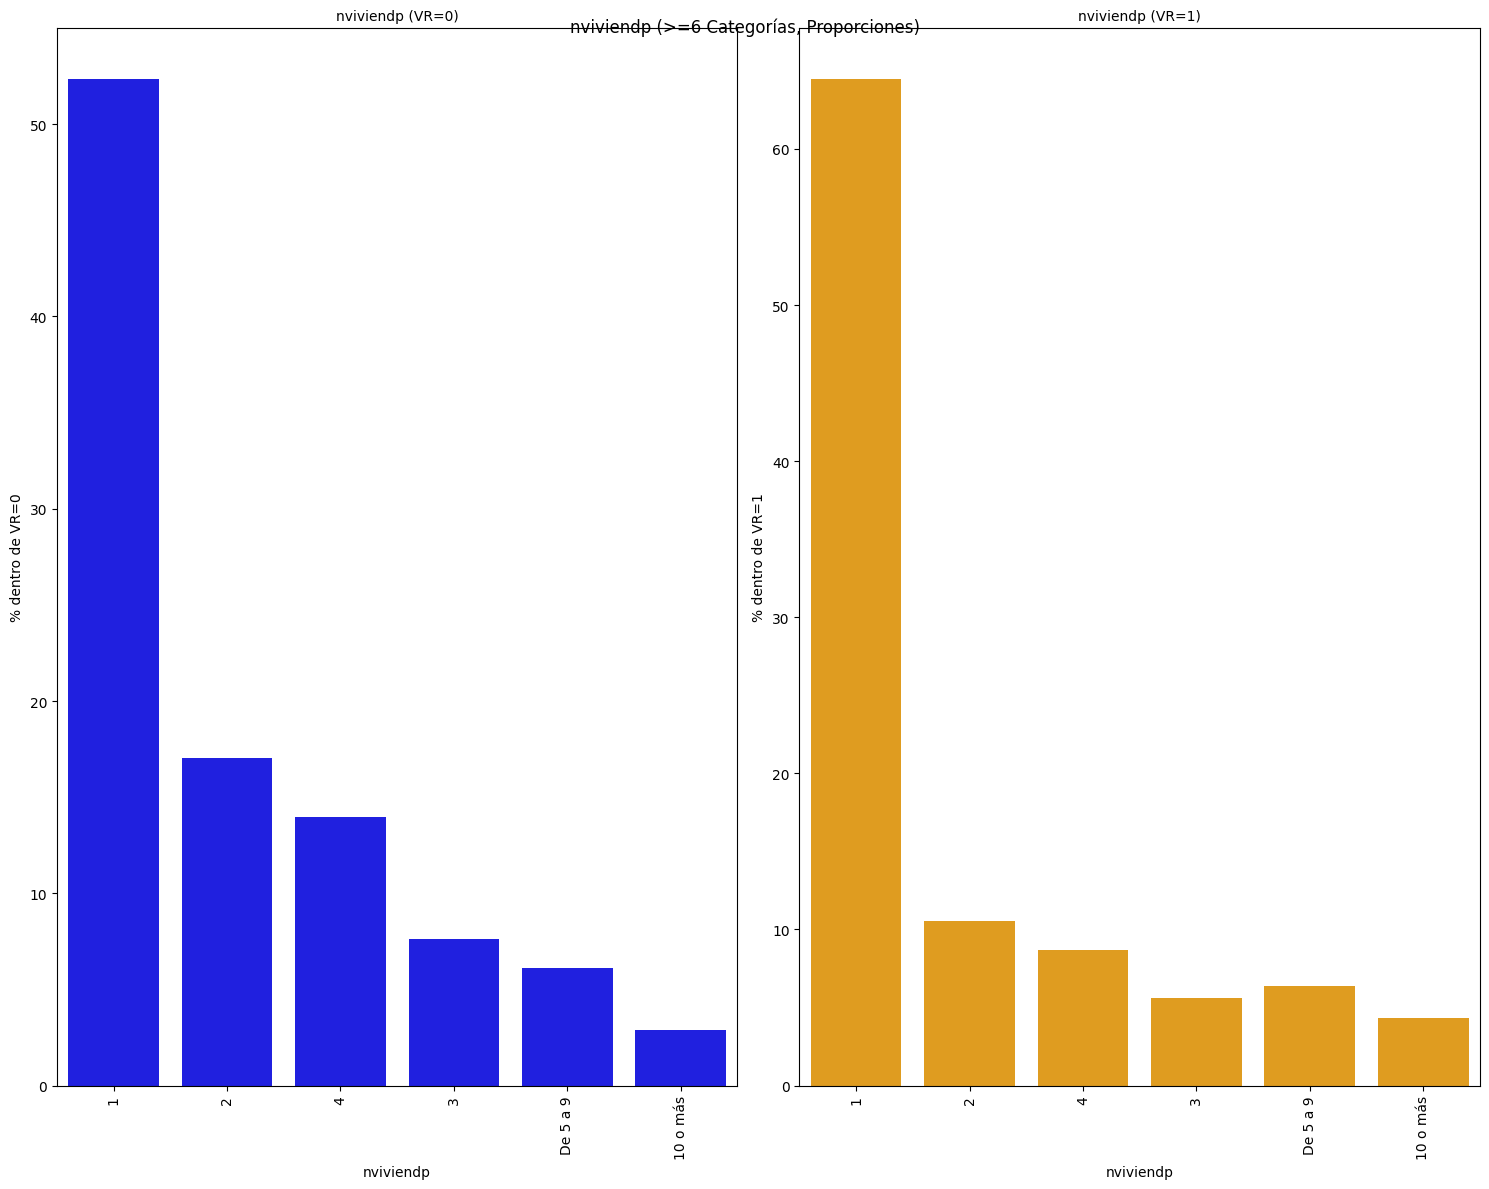

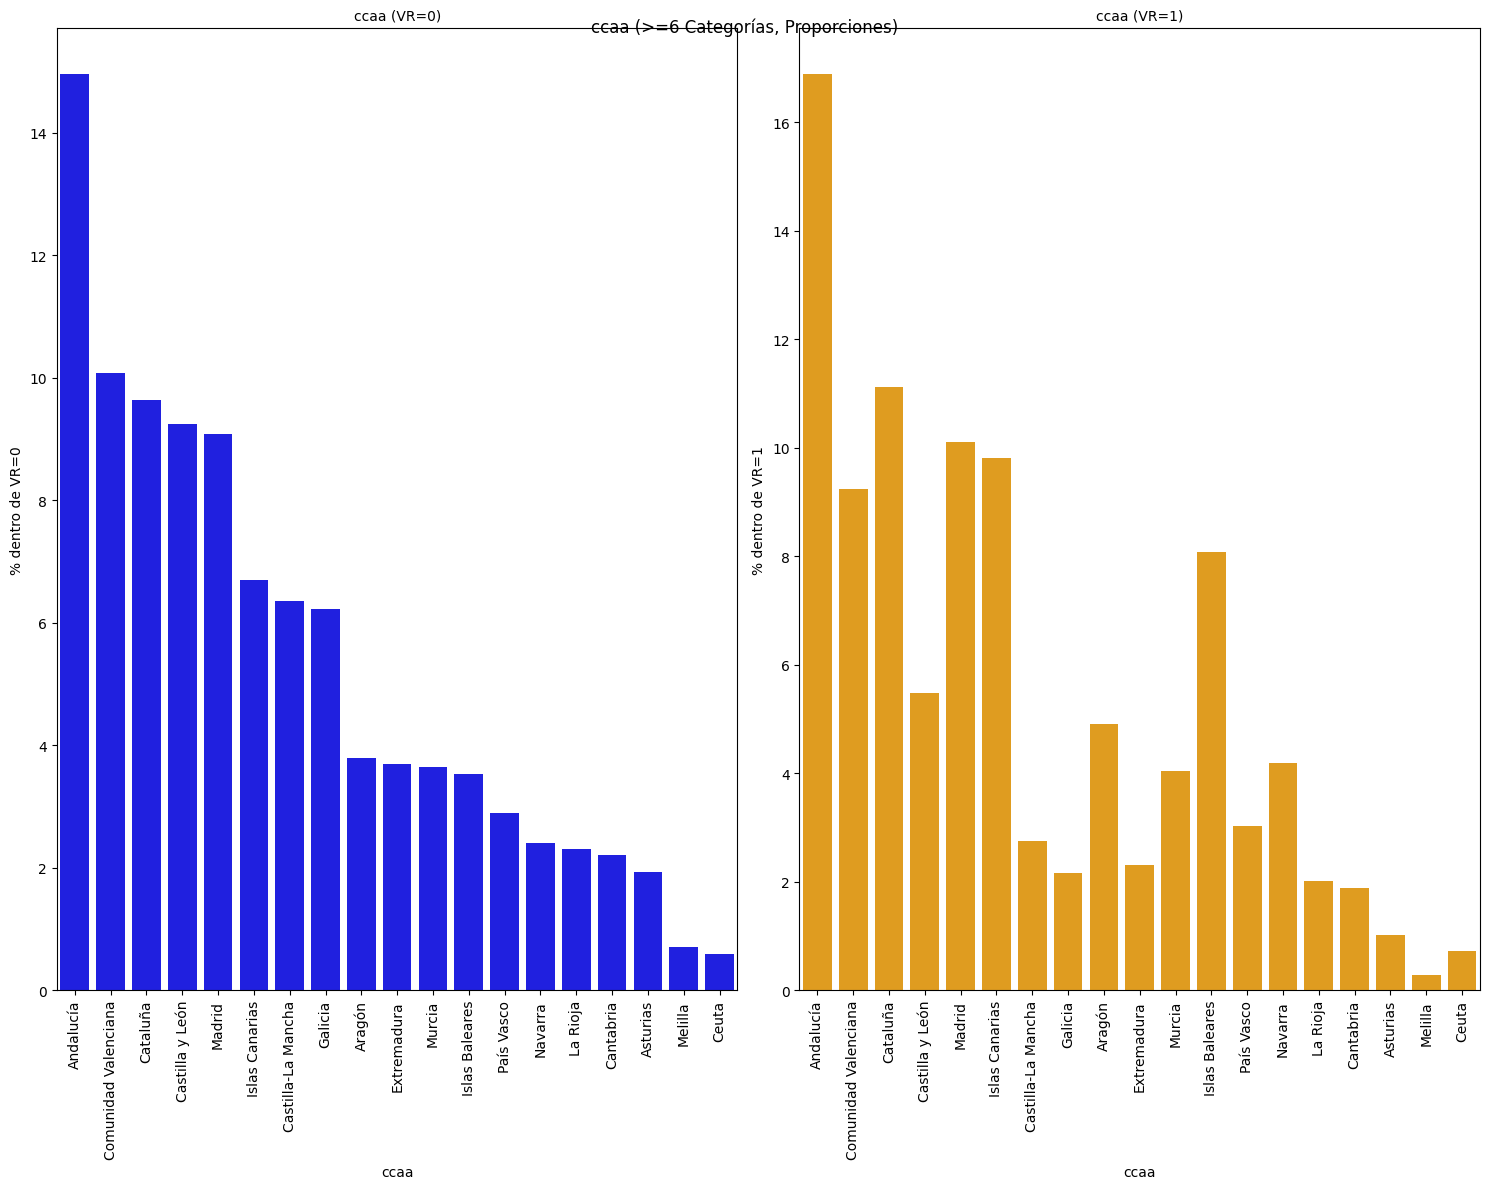

In [58]:
#relación individual con la variable dependiente (Proporcional)
visualizador.plot_relacion_individual_per("erfotov", tamano_grafica=(15, 25), tamanio_fuente=10)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

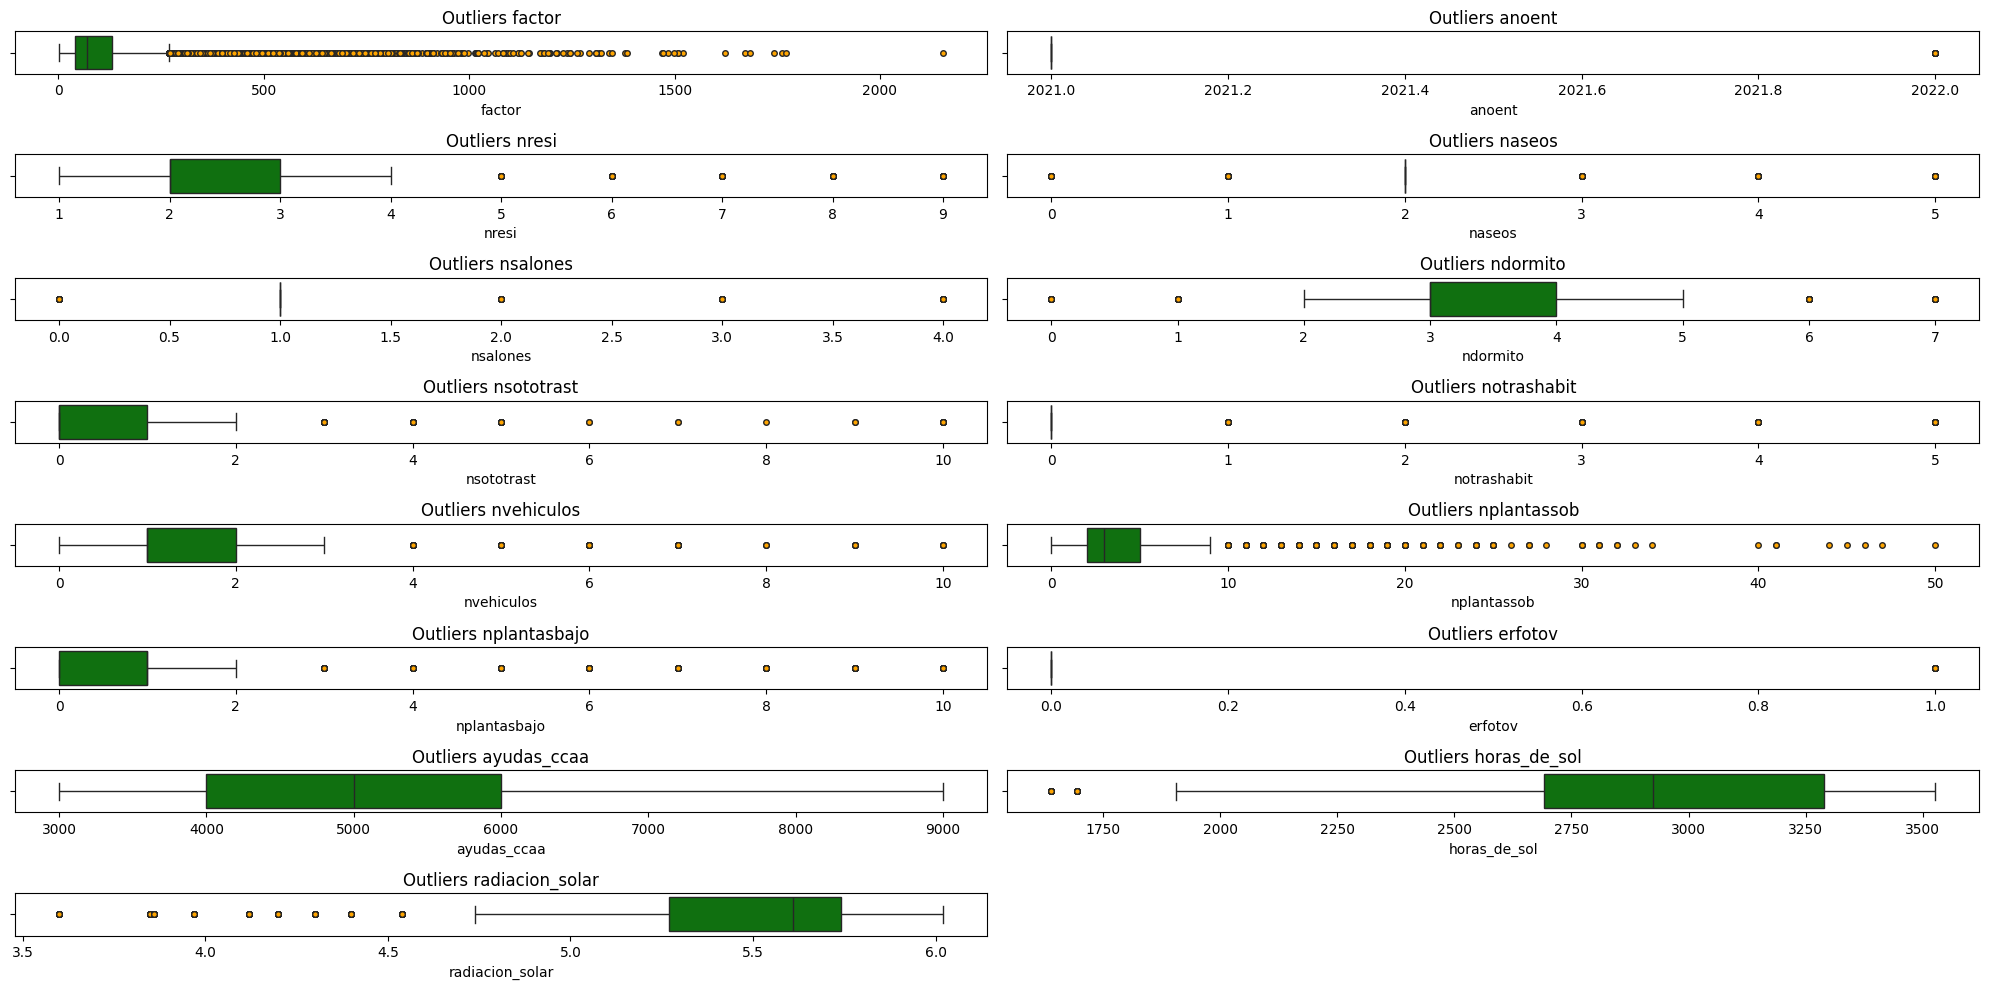

In [59]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

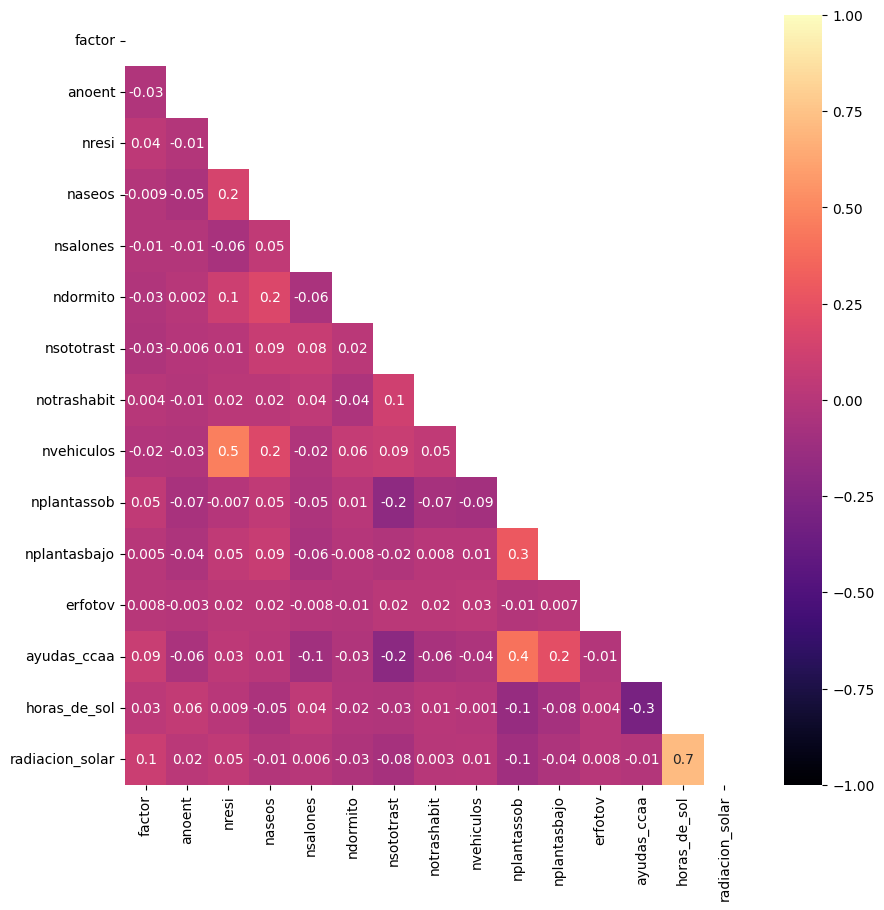

In [60]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [62]:
df_amplias_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           61555 non-null  object 
 1   idq_mun          61555 non-null  object 
 2   tam_muni         61555 non-null  object 
 3   factor           61555 non-null  float64
 4   mesent           61555 non-null  object 
 5   anoent           61555 non-null  int64  
 6   yoresi           61555 non-null  object 
 7   otroresi         61555 non-null  object 
 8   nresi            61555 non-null  int64  
 9   regvi            61555 non-null  object 
 10  pagovi           61555 non-null  object 
 11  calefac          61555 non-null  object 
 12  tipocombcale     61555 non-null  object 
 13  tipoagua         61555 non-null  object 
 14  wc               61555 non-null  object 
 15  boducha          61555 non-null  object 
 16  aireacond        61555 non-null  object 
 17  aislam      

In [64]:
columnas_a_formatear = [                                            #columnas a formatear a tipo objeto
    "nsototrast", "notrashabit", "nvehiculos", "naseos", "nsalones", 
    "ndormito", "nplantasbajo", "nresi"]

df_amplias_sin_outliers[columnas_a_formatear] = df_amplias_sin_outliers[columnas_a_formatear].astype("O")

In [65]:
df_amplias_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61555 entries, 0 to 61554
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           61555 non-null  object 
 1   idq_mun          61555 non-null  object 
 2   tam_muni         61555 non-null  object 
 3   factor           61555 non-null  float64
 4   mesent           61555 non-null  object 
 5   anoent           61555 non-null  int64  
 6   yoresi           61555 non-null  object 
 7   otroresi         61555 non-null  object 
 8   nresi            61555 non-null  object 
 9   regvi            61555 non-null  object 
 10  pagovi           61555 non-null  object 
 11  calefac          61555 non-null  object 
 12  tipocombcale     61555 non-null  object 
 13  tipoagua         61555 non-null  object 
 14  wc               61555 non-null  object 
 15  boducha          61555 non-null  object 
 16  aireacond        61555 non-null  object 
 17  aislam      

In [66]:
df_amplias_sin_outliers.head(1)

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.005532  Julio   

   anoent yoresi otroresi nresi                                 regvi  \
0    2021     No       Si     2  Propia por compra totalmente pagada    

        pagovi     calefac tipocombcale                 tipoagua  wc boducha  \
0  Desconocido  individual  Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     No       No     Si       Si           Si       No    Si   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      3        1        3          2           0   

             metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 121 y 150 m2          1    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    

                                            ayudaext ruidos contamin sucio  \
0  ayudas de familiares, parientes, amigos, vecinos      No       Si    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           Si          No      Si     Si    Si       Si   

  bares cambioresi segunresi                 lugsegunresi  \
0    Si         No        No  No tiene segunda residencia   

                      otraccaa                  otropais  \
0  No tiene segunda residencia  No tiene/ está en España   

                       diasusa                     ingrehog     tipoedif  \
0  No tiene segunda residencia  De 1.000€ a menos de 1.500€  Unifamiliar   

             tipoedifviv  nplantassob nplantasbajo  annoedifinterv  \
0  Vivienda unifamiliar             2            1  De 1991 a 2000   

      estadoedif       accesoedif ascensor garaje nplazasgar gastuberia  \
0  casi perfecto  No es accesible       No     Si          2         Si   

  aguacalcent evacuaguares     tipoevacuares  erfotov nviviendp     vehiculos  \
0          Si           Si  Alcantarillado          0         1  convencional   

           renovables      conectividad        ccaa  ayudas_ccaa  \
0  no tiene renovable  banda ancha fija  País Vasco         4800   

  bonificaciones  horas_de_sol  radiacion_solar          categoria  
0            IBI          2147              4.2  Viviendas amplias

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [67]:
df_erf_amp=pd.DataFrame(df_amplias_sin_outliers["erfotov"])

In [68]:
outliers_amp=d.GestionOutliersMultivariados(df_amplias_sin_outliers.drop(columns=["erfotov"]))
df_outampli=outliers_amp.detectar_outliers_if(0.01)

In [69]:
df_outampli.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.005532   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  61.559149   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  59.495080   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.703336   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  68.234366   

      mesent  anoent yoresi otroresi nresi  \
0      Julio    2021     No       Si     2   
1      Junio    2021     Si       Si     4   
2       Mayo    2021     Si       Si     4   
3      Julio    2021     Si       Si     3   
4  Diciembre    2021     Si       Si     2   

                                    regvi                   pagovi  \
0    Propia por compra totalmente pagada               Desconocido   
1  Propia por compra con pagos pendientes  De 700€ a menos de 800€   
2    Propia por compra totalmente pagada               Desconocido   
3    Propia por compra totalmente pagada               Desconocido   
4          Propia por herencia o donación              Desconocido   

      calefac  tipocombcale                 tipoagua  wc boducha aireacond  \
0  individual   Gas natural  abastecimiento público   Si      Si        No   
1  individual  Electricidad  abastecimiento público   Si      Si        No   
2  individual   Gas natural  abastecimiento público   Si      Si        No   
3  individual   Gas natural  abastecimiento público   Si      Si        No   
4  individual   Gas natural  abastecimiento público   Si      Si        No   

  aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
0     No       No     Si       Si           Si       No    Si         Si   
1     No       No     Si       Si           Si       Si    Si         Si   
2     No       No     Si       Si           No       No    Si         Si   
3     No       No     Si       Si           No       No    Si         Si   
4     No       No     Si       Si           Si       No    Si         Si   

  vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si      3        1        3          2           0   
1         Si      4        1        4          2           0   
2         Si      3        1        3          1           0   
3         Si      1        1        3          0           0   
4         Si      2        2        3          1           0   

             metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 121 y 150 m2          1    Si     Si      Si       Si       Si   
1  Entre 106 y 120 m2          3    Si     Si      Si       No       Si   
2   Entre 91 y 105 m2          2    Si     Si      Si       Si       Si   
3   Entre 91 y 105 m2          1    Si     Si      Si       Si       Si   
4   Entre 91 y 105 m2          1    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    
1          Si  Si  No dispone de servicio doméstico    
2          Si  Si  No dispone de servicio doméstico    
3          Si  No  No dispone de servicio doméstico    
4          Si  No  No dispone de servicio doméstico    

                                            ayudaext ruidos contamin sucio  \
0  ayudas de familiares, parientes, amigos, vecinos      No       Si    No   
1       No dispone de ayudas externas no remuneradas     No       No    No   
2       No dispone de ayudas externas no remuneradas     No       No    No   
3       No dispone de ayudas externas no remuneradas     No       No    No   
4       No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           Si          No      Si     Si    Si       Si   
1         No        No           No          No      Si     Si    Si       Si   
2         No        No           No          No      Si     

Añadimos de nuevo la columna de fotovoltaica

In [70]:
df_outampli=pd.concat([df_outampli,df_erf_amp], axis=1)

In [71]:
df_outampli[df_outampli["outlier"]==-1].shape[0]

616

Filtramos por los que no son outliers

In [72]:
df_sin_outamplias=df_outampli[df_outampli["outlier"]!=-1]

In [73]:
df_sin_outamplias.shape[0]

60939

In [74]:
df_sin_outamplias.drop(columns=["outlier", "categoria"], inplace=True)

In [75]:
df_sin_outamplias.reset_index(drop=True, inplace=True)

In [76]:
df_sin_outamplias.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  53.005532   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  61.559149   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  59.495080   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  60.703336   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  68.234366   

      mesent  anoent yoresi otroresi nresi  \
0      Julio    2021     No       Si     2   
1      Junio    2021     Si       Si     4   
2       Mayo    2021     Si       Si     4   
3      Julio    2021     Si       Si     3   
4  Diciembre    2021     Si       Si     2   

                                    regvi                   pagovi  \
0    Propia por compra totalmente pagada               Desconocido   
1  Propia por compra con pagos pendientes  De 700€ a menos de 800€   
2    Propia por compra totalmente pagada               Desconocido   
3    Propia por compra totalmente pagada               Desconocido   
4          Propia por herencia o donación              Desconocido   

      calefac  tipocombcale                 tipoagua  wc boducha aireacond  \
0  individual   Gas natural  abastecimiento público   Si      Si        No   
1  individual  Electricidad  abastecimiento público   Si      Si        No   
2  individual   Gas natural  abastecimiento público   Si      Si        No   
3  individual   Gas natural  abastecimiento público   Si      Si        No   
4  individual   Gas natural  abastecimiento público   Si      Si        No   

  aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
0     No       No     Si       Si           Si       No    Si         Si   
1     No       No     Si       Si           Si       Si    Si         Si   
2     No       No     Si       Si           No       No    Si         Si   
3     No       No     Si       Si           No       No    Si         Si   
4     No       No     Si       Si           Si       No    Si         Si   

  vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si      3        1        3          2           0   
1         Si      4        1        4          2           0   
2         Si      3        1        3          1           0   
3         Si      1        1        3          0           0   
4         Si      2        2        3          1           0   

             metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Entre 121 y 150 m2          1    Si     Si      Si       Si       Si   
1  Entre 106 y 120 m2          3    Si     Si      Si       No       Si   
2   Entre 91 y 105 m2          2    Si     Si      Si       Si       Si   
3   Entre 91 y 105 m2          1    Si     Si      Si       Si       Si   
4   Entre 91 y 105 m2          1    Si     Si      Si       Si       Si   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    
1          Si  Si  No dispone de servicio doméstico    
2          Si  Si  No dispone de servicio doméstico    
3          Si  No  No dispone de servicio doméstico    
4          Si  No  No dispone de servicio doméstico    

                                            ayudaext ruidos contamin sucio  \
0  ayudas de familiares, parientes, amigos, vecinos      No       Si    No   
1       No dispone de ayudas externas no remuneradas     No       No    No   
2       No dispone de ayudas externas no remuneradas     No       No    No   
3       No dispone de ayudas externas no remuneradas     No       No    No   
4       No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           Si          No      Si     Si    Si       Si   
1         No        No           No          No      Si     Si    Si       Si   
2         No        No           No          No      Si     

### **DESBALANCEO**  (lo trato en el siguiente jupyter)

In [77]:
round(df_sin_outamplias["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    98.87
1     1.13
Name: proportion, dtype: float64

In [78]:
df_sin_outamplias.to_pickle("../datos/EF/Datos_modelos/amplias_sin_outliers.pkl")

# **VIVIENDAS GRANDES**

In [79]:
df_grandes.head()

iden idq_pv            idq_mun                      tam_muni      factor  \
11    12  Álava  Municipio_pequeño  De 50.000 habitantes o menos   56.857838   
13    14  Álava  Municipio_pequeño  De 50.000 habitantes o menos   68.459369   
30    31  Álava  Municipio_pequeño  De 50.000 habitantes o menos  134.505905   
31    32  Álava  Municipio_pequeño  De 50.000 habitantes o menos   98.588608   
56    57  Álava  Municipio_pequeño  De 50.000 habitantes o menos   93.993815   

       mesent  anoent yoresi otroresi  nresi  \
11       Mayo    2021     Si       Si      3   
13  Diciembre    2021     Si       Si      4   
30      Julio    2021     Si       No      1   
31  Diciembre    2021     Si       No      1   
56  Diciembre    2021     Si       Si      3   

                                     regvi                   pagovi  \
11    Propia por compra totalmente pagada               Desconocido   
13    Propia por compra totalmente pagada               Desconocido   
30  Propia por compra con pagos pendientes  De 400€ a menos de 500€   
31    Propia por compra totalmente pagada               Desconocido   
56    Propia por compra totalmente pagada               Desconocido   

       calefac          tipocombcale                 tipoagua  wc boducha  \
11  individual           Gas natural  abastecimiento público   Si      Si   
13  individual           Gas natural  abastecimiento público   Si      Si   
30  individual                Madera  abastecimiento público   Si      Si   
31  individual           Gas natural  abastecimiento público   Si      Si   
56  individual  Gas butano o propano  abastecimiento público   Si      Si   

   aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
11        No     No       No     Si       Si           Si       No    Si   
13        No     No       No     Si       Si           Si       No    Si   
30        No     No       No     No       Si           Si       No    No   
31        No     No       No     Si       Si           Si       Si    Si   
56        No     No       Si     Si       Si           Si       No    Si   

   microondas vitroinduc  naseos  nsalones  ndormito  nsototrast  notrashabit  \
11         Si         Si       2         2         3           1            0   
13         Si         Si       2         2         4           1            1   
30         Si         Si       1         1         1           1            0   
31         Si         Si       2         1         4           1            0   
56         Si         Si       4         4         6           2            0   

              metrosvi  nvehiculos papel vidrio envases organico halogena  \
11       Más de 180 m2           3    Si     Si      Si       Si       No   
13  Entre 151 y 180 m2           2    Si     Si      Si       Si       Si   
30       Más de 180 m2           1    No     Si      Si       Si       No   
31  Entre 151 y 180 m2           2    Si     Si      Si       Si       No   
56       Más de 180 m2           4    Si     Si      Si       Si       Si   

   bajoconsumo led                          servdomes  \
11          No  Si  No dispone de servicio doméstico    
13          Si  No  No dispone de servicio doméstico    
30          No  Si        servicio doméstico externo    
31          Si  Si        servicio doméstico externo    
56          Si  Si  No dispone de servicio doméstico    

                                             ayudaext ruidos contamin sucio  \
11       No dispone de ayudas externas no remuneradas     No       No    No   
13       No dispone de ayudas externas no remuneradas     No       No    No   
30  ayudas de familiares, parientes, amigos, vecinos      No       No    No   
31       No dispone de ayudas externas no remuneradas     No       No    Si   
56       No dispone de ayudas externas no remuneradas     No       No    Si   

   malcomunic pocoverde delincuencia molesturist colegio csalud super  \
11         No        No           No          

PASO ERFOTOV A NUMÉRICA

In [80]:
dicc={"Si":1,
      "No":0}
df_grandes["erfotov"]=df_grandes["erfotov"].map(dicc)

#### Meto IDEN en el index

In [81]:
df_grandes.set_index("iden", inplace=True)


# **EDA**

In [82]:
f.exploracion_dataframe(df_grandes,"erfotov")

El número de datos es 18686 y el de columnas es 86

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


Empty DataFrame
Columns: [%_nulos]
Index: []


 ..................... 

Los tipos de las columnas son:


tipo_dato
idq_pv             object
idq_mun            object
tam_muni           object
factor            float64
mesent             object
...                   ...
ayudas_ccaa         int64
bonificaciones     object
horas_de_sol        int64
radiacion_solar   float64
categoria          object

[86 rows x 1 columns]


 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 52 categorías (5/52)


count
idq_pv          
Madrid      2413
Barcelona    978
Baleares     787
Valencia     716
Navarra      649

La columna IDQ_MUN tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 152 categorías (5/152)


count
idq_mun                    
Municipio_pequeño     11168
Boadilla del Monte      259
Pozuelo de Alarcón      235
Rozas de Madrid, Las    220
Rivas-Vaciamadrid       148

La columna TAM_MUNI tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tam_muni                              
De 50.000 habitantes o menos     11262
De 50.001 a 100.000 habitantes    4816
De 100.001 a 500.000 habitantes   2221
Más de 500.000 habitantes          387

La columna MESENT tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


count
mesent       
Mayo     4870
Junio    4782
Abril    4124
Julio    2599
Agosto    815

La columna YORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
yoresi       
Si      17807
No        879

La columna OTRORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
otroresi       
Si        16055
No         2631

La columna REGVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
regvi                                        
Propia por compra totalmente pagada      7846
Propia por compra con pagos pendientes   5579
Propia por herencia o donación           3112
Otra forma                               1274
Alquilada                                 570

La columna PAGOVI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


count
pagovi                        
Desconocido              12537
De 400€ a menos de 500€    872
De 500€ a menos de 600€    859
De 300€ a menos de 400€    794
De 600€ a menos de 700€    700

La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
calefac                                                  
individual                                          12484
No pero sí aparato que permite calentar alguna ...   2722
No tiene calefacción                                 2405
colectiva                                            1075

La columna TIPOCOMBCALE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
tipocombcale               
Petróleo o derivados   4987
Gas natural            4859
Electricidad           3507
Desconocido            2405
Madera                 1675

La columna TIPOAGUA tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoagua                      
abastecimiento público   17477
abastecimiento privado    1177
No tiene agua corriente     32

La columna WC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
wc       
Si  18669
No     17

La columna BODUCHA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
boducha       
Si       18624
No          62

La columna AIREACOND tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aireacond       
No          9499
Si          9187

La columna AISLAM tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aislam       
No      15819
Si       2867

La columna ADAPTADA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
adaptada       
No        13575
Si         5111

La columna COCINA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cocina       
Si      18242
No        444

La columna LAVADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavadora       
Si        18593
No           93

La columna LAVAVAJILLAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
lavavajillas       
Si            14608
No             4078

La columna SECADORA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
secadora       
No        10792
Si         7894

La columna HORNO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
horno       
Si     18111
No       575

La columna MICROONDAS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
microondas       
Si          17705
No            981

La columna VITROINDUC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vitroinduc       
Si          14611
No           4075

La columna METROSVI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
metrosvi                 
Más de 180 m2       10877
Entre 151 y 180 m2   7809

La columna PAPEL tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
papel       
Si     16398
No      2288

La columna VIDRIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
vidrio       
Si      16614
No       2072

La columna ENVASES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
envases       
Si       15982
No        2704

La columna ORGANICO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
organico       
Si        14904
No         3782

La columna HALOGENA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
halogena       
No         9935
Si         8751

La columna BAJOCONSUMO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bajoconsumo       
Si           15110
No            3576

La columna LED tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
led       
Si   15337
No    3349

La columna SERVDOMES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
servdomes                               
No dispone de servicio doméstico   16049
servicio doméstico externo          2275
servicio doméstico interno           362

La columna AYUDAEXT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
ayudaext                                                 
No dispone de ayudas externas no remuneradas        17114
ayudas de familiares, parientes, amigos, vecinos     1380
ayudas de otros, como servicios sociales o una ONG    192

La columna RUIDOS tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ruidos       
No      15477
Si       3209

La columna CONTAMIN tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
contamin       
No        17045
Si         1641

La columna SUCIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
sucio       
No     15455
Si      3231

La columna MALCOMUNIC tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
malcomunic       
No          14921
Si           3765

La columna POCOVERDE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
pocoverde       
No         15508
Si          3178

La columna DELINCUENCIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
delincuencia       
No            16925
Si             1761

La columna MOLESTURIST tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
molesturist       
No           17821
Si             865

La columna COLEGIO tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
colegio       
Si       15067
No        3619

La columna CSALUD tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
csalud       
Si      14364
No       4322

La columna SUPER tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
super       
Si     14424
No      4262

La columna FARMACIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
farmacia       
Si        15400
No         3286

La columna BARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
bares       
Si     16449
No      2237

La columna CAMBIORESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
cambioresi       
No          17897
Si            789

La columna SEGUNRESI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
segunresi       
No         14375
Si          4311

La columna LUGSEGUNRESI tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
lugsegunresi                                          
No tiene segunda residencia                      14375
En otro municipio de la misma provincia           1574
En otra CCAA                                      1512
En otra provincia pero en la misma CCAA            630
En el mismo municipio que la primera residencia    520

La columna OTRACCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
otraccaa                          
No tiene segunda residencia  17174
Comunidad Valenciana           357
Andalucía                      283
Castilla y León                164
Cantabria                       86

La columna OTROPAIS tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 23 categorías (5/23)


count
otropais                       
No tiene/ está en España  18611
Francia                       9
Reino Unido                   9
Alemania                      9
Portugal                      7

La columna DIASUSA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


count
diasusa                           
No tiene segunda residencia  14375
60 o más días                 1710
Entre 30 y 59 días            1246
Entre 15 y 29 días             769
Menos de 15 días               586

La columna INGREHOG tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


count
ingrehog                          
De 3.000€ a menos de 5.000€   3760
De 1.000€ a menos de 1.500€   2984
De 1.500€ a menos de 2.000€   2749
De 2.000€ a menos de 2.500€   2539
De 2.500€ a menos de 3.000€   2198

La columna TIPOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
tipoedif            
Unifamiliar    15880
Multifamiliar   2806

La columna TIPOEDIFVIV tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
tipoedifviv                           
Vivienda unifamiliar             15880
Edificio con 10 o más viviendas   1542
Edificio de 3 a 9 viviendas        786
Edificio con 2 viviendas           478

La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
annoedifinterv         
De 2001 a 2010     4106
De 1991 a 2000     3800
De 1981 a 1990     2325
De 1971 a 1980     1872
Anterior a  1900   1730

La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 11 categorías (5/11)


count
estadoedif                
muy bueno             5570
casi perfecto         4504
perfecto              4263
bueno                 2609
moderadamente bueno    944

La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
accesoedif            
Es accesible     12138
No es accesible   6548

La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
ascensor       
No        16395
Si         2291

La columna GARAJE tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
garaje       
Si      13416
No       5270

La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


count
nplazasgar            
No tiene garaje   5270
1                 5183
2                 5110
De 3 a 5          1557
De 21 a 50         465

La columna GASTUBERIA tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
gastuberia       
No          12400
Si           6286

La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
aguacalcent       
No            9660
Si            9026

La columna EVACUAGUARES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


count
evacuaguares       
Si            17290
No             1396

La columna TIPOEVACUARES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
tipoevacuares          
Alcantarillado    16107
Desconocido        1396
Otro tipo          1183

La columna NVIVIENDP tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


count
nviviendp       
1          16884
2            894
4            371
3            259
De 5 a 9     186

La columna VEHICULOS tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
vehiculos               
convencional       15860
No tiene vehiculo   1645
híbrido              943
eléctrico            238

La columna RENOVABLES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
renovables               
no tiene renovable  17093
energía solar        1375
otra renovable        218

La columna CONECTIVIDAD tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


count
conectividad            
banda ancha fija   13089
Sin internet        2484
banda ancha movil   1984
banda estrecha      1129

La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 19 categorías (5/19)


count
ccaa                       
Madrid                 2413
Andalucía              2408
Cataluña               1734
Castilla y León        1585
Comunidad Valenciana   1475

La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


count
bonificaciones       
IBI y ICIO      11042
IBI              7525
Ninguna           119

La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


count
categoria               
Viviendas grandes  18686


----------

Las principales estadísticas de las variables númericas son:


count         mean          std          min          25%  \
factor           18686.0   105.188782   105.730104     1.932496    40.716775   
anoent           18686.0  2021.022691     0.148920  2021.000000  2021.000000   
nresi            18686.0     2.792733     1.321206     1.000000     2.000000   
naseos           18686.0     2.646580     1.010197     0.000000     2.000000   
nsalones         18686.0     1.529701     0.713681     0.000000     1.000000   
ndormito         18686.0     3.879643     1.135797     0.000000     3.000000   
nsototrast       18686.0     0.911538     0.841866     0.000000     0.000000   
notrashabit      18686.0     0.549770     0.964758     0.000000     0.000000   
nvehiculos       18686.0     1.741678     1.035161     0.000000     1.000000   
nplantassob      18686.0     2.327732     1.795975     0.000000     2.000000   
nplantasbajo     18686.0     0.575993     0.757359     0.000000     0.000000   
erfotov          18686.0     0.026223     0.159802     0.000000     0.000000   
ayudas_ccaa      18686.0  4431.403190  1175.691545  3000.000000  3500.000000   
horas_de_sol     18686.0  2856.040726   419.287774  1639.000000  2691.000000   
radiacion_solar  18686.0     5.355536     0.607316     3.600000     5.110000   

                         50%          75%          max  
factor             70.484282   136.431997  2044.104859  
anoent           2021.000000  2021.000000  2022.000000  
nresi               3.000000     4.000000    20.000000  
naseos              3.000000     3.000000    10.000000  
nsalones            1.000000     2.000000    10.000000  
ndormito            4.000000     4.000000    15.000000  
nsototrast          1.000000     1.000000    10.000000  
notrashabit         0.000000     1.000000    10.000000  
nvehiculos          2.000000     2.000000    10.000000  
nplantassob         2.000000     3.000000    48.000000  
nplantasbajo        0.000000     1.000000    10.000000  
erfotov             0.000000     0.000000     1.000000  
ayudas_ccaa      4000.000000  5000.000000  9000.000000  
horas_de_sol     2858.000000  3248.000000  3527.000000  
radiacion_solar     5.610000     5.740000     6.020000


----------

Las principales estadísticas de las variables categóricas son:


count unique                           top   freq
idq_pv          18686     52                        Madrid   2413
idq_mun         18686    152             Municipio_pequeño  11168
tam_muni        18686      4  De 50.000 habitantes o menos  11262
mesent          18686     12                          Mayo   4870
yoresi          18686      2                            Si  17807
...               ...    ...                           ...    ...
renovables      18686      3            no tiene renovable  17093
conectividad    18686      4              banda ancha fija  13089
ccaa            18686     19                        Madrid   2413
bonificaciones  18686      3                    IBI y ICIO  11042
categoria       18686      1             Viviendas grandes  18686

[71 rows x 4 columns]


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 18686 entries, 12 to 172434
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           18686 non-null  object 
 1   idq_mun          18686 non-null  object 
 2   tam_muni         18686 non-null  object 
 3   factor           18686 non-null  float64
 4   mesent           18686 non-null  object 
 5   anoent           18686 non-null  int64  
 6   yoresi           18686 non-null  object 
 7   otroresi         18686 non-null  object 
 8   nresi            18686 non-null  int64  
 9   regvi            18686 non-null  object 
 10  pagovi           18686 non-null  object 
 11  calefac          18686 non-null  object 
 12  tipocombcale     18686 non-null  object 
 13  tipoagua         18686 non-null  object 
 14  wc               18686 non-null  object 
 15  boducha          18686 non-null  object 
 1

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media

In [85]:
df_grandes["metrosvi"].unique()

array(['Más de 180 m2', 'Entre 151 y 180 m2'], dtype=object)

In [83]:
df_grandes["ndormito"].unique()  #observamos que en las viendas grandes todo numero de habitaciones menor a 2 es poco probable por lo que vamos a investigarlos

array([ 3,  4,  1,  6, 11,  5,  2,  7, 15,  8,  9, 12,  0, 10, 13, 14],
      dtype=int64)

In [84]:
df_grandes["ndormito"].value_counts()

ndormito
4     7462
3     6312
5     2695
6      882
2      760
7      235
1      121
8       88
9       60
0       35
10      16
12       7
11       4
15       4
13       4
14       1
Name: count, dtype: int64

In [86]:
df_gra_filtrados_outliers=df_grandes[df_grandes["ndormito"] <2]

In [87]:
len(df_gra_filtrados_outliers)  #vemos que hay 156 de un total de 18686 lo que corresponde a un 0,83% de los datos (practicamente insignificante)

156

In [88]:
df_gra_filtrados_outliers.head(7)   #ver que hacer con los outliers porque lo que no cuadra muchas veces es únicamente el tamaño con respecto numero de aseos, dormitorios, salones y residentes 

idq_pv            idq_mun                         tam_muni  \
iden                                                                  
31        Álava  Municipio_pequeño     De 50.000 habitantes o menos   
1664      Álava  Municipio_pequeño     De 50.000 habitantes o menos   
2576   Albacete  Municipio_pequeño     De 50.000 habitantes o menos   
6235   Alicante               Elda   De 50.001 a 100.000 habitantes   
9382    Almería            Almería  De 100.001 a 500.000 habitantes   
10027   Almería  Municipio_pequeño     De 50.000 habitantes o menos   
11018   Almería          Ejido, El   De 50.001 a 100.000 habitantes   

           factor mesent  anoent yoresi otroresi  nresi  \
iden                                                      
31     134.505905  Julio    2021     Si       No      1   
1664    87.261161  Junio    2021     Si       Si      2   
2576   228.556203  Abril    2021     Si       Si      2   
6235    64.179520  Junio    2021     Si       No      1   
9382   814.024979   Mayo    2021     Si       Si     10   
10027  101.571813  Enero    2022     Si       No      1   
11018   32.852989  Abril    2021     Si       Si      3   

                                                   regvi  \
iden                                                       
31                Propia por compra con pagos pendientes   
1664                                          Alquilada    
2576                      Propia por herencia o donación   
6235                      Propia por herencia o donación   
9382                                          Otra forma   
10027  Cedida gratis o a bajo precio (por otro hogar,...   
11018               Propia por compra totalmente pagada    

                        pagovi  \
iden                             
31     De 400€ a menos de 500€   
1664   De 500€ a menos de 600€   
2576               Desconocido   
6235               Desconocido   
9382               Desconocido   
10027              Desconocido   
11018              Desconocido   

                                                 calefac  \
iden                                                       
31                                            individual   
1664                                   colectiva           
2576                                   colectiva           
6235   No pero sí aparato que permite calentar alguna...   
9382   No pero sí aparato que permite calentar alguna...   
10027  No pero sí aparato que permite calentar alguna...   
11018                                  colectiva           

               tipocombcale                 tipoagua  wc boducha aireacond  \
iden                                                                         
31                   Madera  abastecimiento público   Si      Si        No   
1664   Petróleo o derivados  abastecimiento público   Si      Si        No   
2576                  Otros  abastecimiento público   Si      Si        No   
6235           Electricidad  abastecimiento público   Si      Si        Si   
9382   Gas butano o propano   abastecimiento privado  No      Si        Si   
10027          Electricidad  abastecimiento público   Si      Si        No   
11018          Electricidad  abastecimiento público   Si      Si        Si   

      aislam adaptada cocina lavadora lavavajillas secadora horno microondas  \
iden                                                                           
31        No       No     No       Si           Si       No    No         Si   
1664      Si       No     Si       Si           Si       No    Si         Si   
2576      No       Si     Si       Si           Si       No    Si         Si   
6235      No       No     No       Si           Si       No    No         Si   
9382      Si       No     No       Si           No       No    No         No   
10027     No       No     Si       Si           No       No    Si         Si   
11018     No       No     Si       Si           Si       Si    Si         Si   

      vitroinduc  naseos

**Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) pero además, nos percatamos de que el número de residentes también muestra discrepancias con el tamaño de la vivienda**

In [89]:
df_grandes.columns

Index(['idq_pv', 'idq_mun', 'tam_muni', 'factor', 'mesent', 'anoent', 'yoresi',
       'otroresi', 'nresi', 'regvi', 'pagovi', 'calefac', 'tipocombcale',
       'tipoagua', 'wc', 'boducha', 'aireacond', 'aislam', 'adaptada',
       'cocina', 'lavadora', 'lavavajillas', 'secadora', 'horno', 'microondas',
       'vitroinduc', 'naseos', 'nsalones', 'ndormito', 'nsototrast',
       'notrashabit', 'metrosvi', 'nvehiculos', 'papel', 'vidrio', 'envases',
       'organico', 'halogena', 'bajoconsumo', 'led', 'servdomes', 'ayudaext',
       'ruidos', 'contamin', 'sucio', 'malcomunic', 'pocoverde',
       'delincuencia', 'molesturist', 'colegio', 'csalud', 'super', 'farmacia',
       'bares', 'cambioresi', 'segunresi', 'lugsegunresi', 'otraccaa',
       'otropais', 'diasusa', 'ingrehog', 'tipoedif', 'tipoedifviv',
       'nplantassob', 'nplantasbajo', 'annoedifinterv', 'estadoedif',
       'accesoedif', 'ascensor', 'garaje', 'nplazasgar', 'gastuberia',
       'aguacalcent', 'evacuaguares', 'tipoe

***Seleccionamos las columnas que se consideran más relevantes a la hora de investigar estos datos atípicos***

In [90]:
df_gra_investigar=df_grandes[['idq_pv', 'idq_mun','yoresi', 'otroresi', 'nresi', 'naseos', 'nsalones', 'ndormito',
       'nsototrast', 'notrashabit', 'metrosvi','servdomes',"tipoedif",
       'tipoedifviv', 'nplantassob', 'nplantasbajo','estadoedif', 'ascensor', 'garaje', 'nplazasgar',
       'evacuaguares', 'tipoevacuares','nviviendp','ccaa','categoria']]

In [91]:
df_gra_investigar.head()

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                      
12    Álava  Municipio_pequeño     Si       Si      3       2         2   
14    Álava  Municipio_pequeño     Si       Si      4       2         2   
31    Álava  Municipio_pequeño     Si       No      1       1         1   
32    Álava  Municipio_pequeño     Si       No      1       2         1   
57    Álava  Municipio_pequeño     Si       Si      3       4         4   

      ndormito  nsototrast  notrashabit            metrosvi  \
iden                                                          
12           3           1            0       Más de 180 m2   
14           4           1            1  Entre 151 y 180 m2   
31           1           1            0       Más de 180 m2   
32           4           1            0  Entre 151 y 180 m2   
57           6           2            0       Más de 180 m2   

                              servdomes     tipoedif            tipoedifviv  \
iden                                                                          
12    No dispone de servicio doméstico   Unifamiliar  Vivienda unifamiliar    
14    No dispone de servicio doméstico   Unifamiliar  Vivienda unifamiliar    
31          servicio doméstico externo   Unifamiliar  Vivienda unifamiliar    
32          servicio doméstico externo   Unifamiliar  Vivienda unifamiliar    
57    No dispone de servicio doméstico   Unifamiliar  Vivienda unifamiliar    

      nplantassob  nplantasbajo           estadoedif ascensor garaje  \
iden                                                                   
12              2             0                bueno       No     Si   
14              2             0        casi perfecto       No     No   
31              2             0  levemente mejorable       No     No   
32              2             1            muy bueno       No     Si   
57              3             0             perfecto       No     No   

           nplazasgar evacuaguares     tipoevacuares nviviendp        ccaa  \
iden                                                                         
12                  1           Si  Alcantarillado           1  País Vasco   
14    No tiene garaje           Si  Alcantarillado           1  País Vasco   
31    No tiene garaje           Si  Alcantarillado           1  País Vasco   
32                  1           Si         Otro tipo         1  País Vasco   
57    No tiene garaje           Si  Alcantarillado           1  País Vasco   

              categoria  
iden                     
12    Viviendas grandes  
14    Viviendas grandes  
31    Viviendas grandes  
32    Viviendas grandes  
57    Viviendas grandes

***Observamos viviendas que se marcan como inhabitables***

In [92]:
df_gra_investigar[df_gra_investigar["estadoedif"]=="inhabitable"]["ccaa"].value_counts()

ccaa
Andalucía               5
Castilla-La Mancha      3
Islas Canarias          3
Cataluña                2
Aragón                  2
La Rioja                2
Madrid                  2
País Vasco              1
Comunidad Valenciana    1
Navarra                 1
Castilla y León         1
Ceuta                   1
Name: count, dtype: int64

In [93]:
df_gra_investigar[df_gra_investigar["estadoedif"]=="inhabitable"].shape[0]

24

In [94]:
viv_gra_inhabitables=df_gra_investigar[df_gra_investigar["estadoedif"]=="inhabitable"]

# **DETECCIÓN Y TRATAMIENTO DE OUTLIERS**  
  

#### ***DETECCIÓN Y TRATAMIENTO DE UNIVARIADOS***
**VIV_INHABITABLES**  
Es el tipo de vivienda que menos esstados inhabitables tiene lo que tiene sentido ya que el aumento del tamaño del hogar va muy de la mano con los ingresos.
Observamos algunso outliers en este conjunto, pero ninguno por el hecho de ser inhabitables.   
   
     
**VIV_DORMITO**  
Observamos como hay discrepancias entre el tamaño de la vivinda con el número de dormitorios y aseos (cosa que ya habíamos visto) habiendo así **156** outliers que no cuadran por varias razones y que no es posible justificar más allá de tratarse de un dato erróneo (podría ser que la persona intente falsear sus metros declarados por alguna razón ya que la fuente de datos es una encuesta pero aún así es un dato a no tener en cuenta).  
  

**VIV_ASEOS**    
Tener menos de 1 aseo en un hogar grande es muy raro por lo que tras investigar, se han encontrado **7** outliers.  
    
  
***Tras haber investigado los outliers univariados ahora se pasa a eliminarlos debido a su reducido número y las justificaciones que se han ido dando. En total se han eliminado un **0,87%** de los datos debido a que se trataban de outliers sin sentido.***   
   
#### ***DETECCIÓN Y TRATAMIENTO DE MULTIVARIADOS***   
***Mediante la metodología ISOLATION FOREST (IF) se eliminan el 1,00% de los datos***  
  
### El tratamiento de outliers ha resultado en la eliminación del 1,87% de los datos (se ha optado por ello por la existencia de datos sin sentido real)  

In [95]:
viv_gra_dormitorios=df_gra_investigar[df_gra_investigar["ndormito"] < 2]

In [96]:
len(viv_gra_dormitorios)

156

In [98]:
df_gra_investigar["nresi"].value_counts()  #todo número de residentes mayor a 15 es muy raro y los menores de 2 también por lo que vamos a investigar

nresi
2     6099
3     4076
4     3931
1     2907
5     1180
6      344
7      100
8       24
9       11
10       6
12       2
13       2
17       1
15       1
20       1
11       1
Name: count, dtype: int64

In [124]:
viv_gra_residentes=df_gra_investigar[df_gra_investigar["nresi"] <2] #a pesar de que es raro,tras investigarlos son perfectamente posibles los casos de muchos residentes con lo que no sería outliers.
                                                                    #Por otro lado, los casos de 1 residente son difíciles pero perfectamente posibles.

In [126]:
len(viv_gra_residentes)

2907

In [105]:
df_gra_investigar["nsalones"].value_counts() #en este caso, el número de salones no parece haber outliers

nsalones
1     10597
2      6566
3      1217
4       215
5        45
0        29
6         9
8         3
7         3
10        2
Name: count, dtype: int64

In [106]:
viv_gra_salones=df_gra_investigar[df_gra_investigar["nsalones"] > 5]

In [107]:
len(viv_gra_salones)

17

In [108]:
df_gra_investigar["naseos"].value_counts() #tener 0 aseos en un hogar grande es muy raro por lo que vamos a investigar

naseos
2     7105
3     6972
4     2201
1     1712
5      488
6      118
7       35
8       26
10      13
9        9
0        7
Name: count, dtype: int64

In [109]:
viv_gra_aseos=df_gra_investigar[df_gra_investigar["naseos"] < 1]

In [110]:
viv_gra_aseos.shape[0]

7

In [111]:
df_gra_investigar["notrashabit"].value_counts() #tener muchas estancias distintas a aseos, dormitorios y salones  en un hogar grande no es tan descabellado y tras investiagr se observa que no hay outliers.

notrashabit
0     11900
1      4797
2      1189
3       440
4       192
5        92
6        37
7        14
10       13
8         8
9         4
Name: count, dtype: int64

In [112]:
viv_gra_otras_habit=df_gra_investigar[df_gra_investigar["notrashabit"] > 6]

In [113]:
len(viv_gra_otras_habit)

39

In [128]:
df_gra_investigar[(df_gra_investigar["naseos"] < 1) &(df_gra_investigar["ndormito"] < 2) ]   #Este cuadro nos muestra las viviendas que tienen valores incomprensibles en todas las variables que hemos considerado con outliers

idq_pv            idq_mun yoresi otroresi  nresi  naseos  nsalones  \
iden                                                                          
85597    Madrid        Fuenlabrada     Si       No      1       0         0   
107441  Navarra  Municipio_pequeño     Si       Si      2       0         0   
110989  Ourense  Municipio_pequeño     Si       Si      3       0         0   

        ndormito  nsototrast  notrashabit       metrosvi  \
iden                                                       
85597          0           0            0  Más de 180 m2   
107441         0           0            0  Más de 180 m2   
110989         0           1            1  Más de 180 m2   

                                servdomes       tipoedif  \
iden                                                       
85597   No dispone de servicio doméstico   Multifamiliar   
107441  No dispone de servicio doméstico     Unifamiliar   
110989        servicio doméstico interno     Unifamiliar   

                            tipoedifviv  nplantassob  nplantasbajo  \
iden                                                                 
85597   Edificio con 10 o más viviendas           48             9   
107441            Vivienda unifamiliar             2             1   
110989            Vivienda unifamiliar             3             2   

              estadoedif ascensor garaje       nplazasgar evacuaguares  \
iden                                                                     
85597        inhabitable       No     No  No tiene garaje           No   
107441       inhabitable       No     No  No tiene garaje           No   
110989  casi inhabitable       No     Si         De 3 a 5           Si   

           tipoevacuares nviviendp     ccaa          categoria  
iden                                                            
85597        Desconocido  10 o más   Madrid  Viviendas grandes  
107441       Desconocido         1  Navarra  Viviendas grandes  
110989  Alcantarillado           1  Galicia  Viviendas grandes

In [131]:
df_gra_investigar1=df_gra_investigar[df_gra_investigar["naseos"] >= 1 ]
df_gra_investigar2=df_gra_investigar1[df_gra_investigar1["ndormito"] >= 2]

In [132]:
df_gra_investigar.shape

(18686, 25)

In [134]:
df_gra_investigar2.shape

(18526, 25)

AHORA QUE YA LO HEMOS ESTUDIADO Y PROBADO EN EL DF DE INVESTIGACIÓN, PASAMOS A APLICARLO AL QUE TIENE TODAS LAS VARIABLES

In [135]:
df_grandes.shape

(18686, 86)

In [136]:
df_grandes=df_grandes[df_grandes["naseos"] >= 1 ]
df_grandes_sin_outliers=df_grandes[df_grandes["ndormito"] >= 2]

In [137]:
df_grandes_sin_outliers.reset_index(drop=True, inplace=True)

In [138]:
df_grandes_sin_outliers.shape

(18526, 86)

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

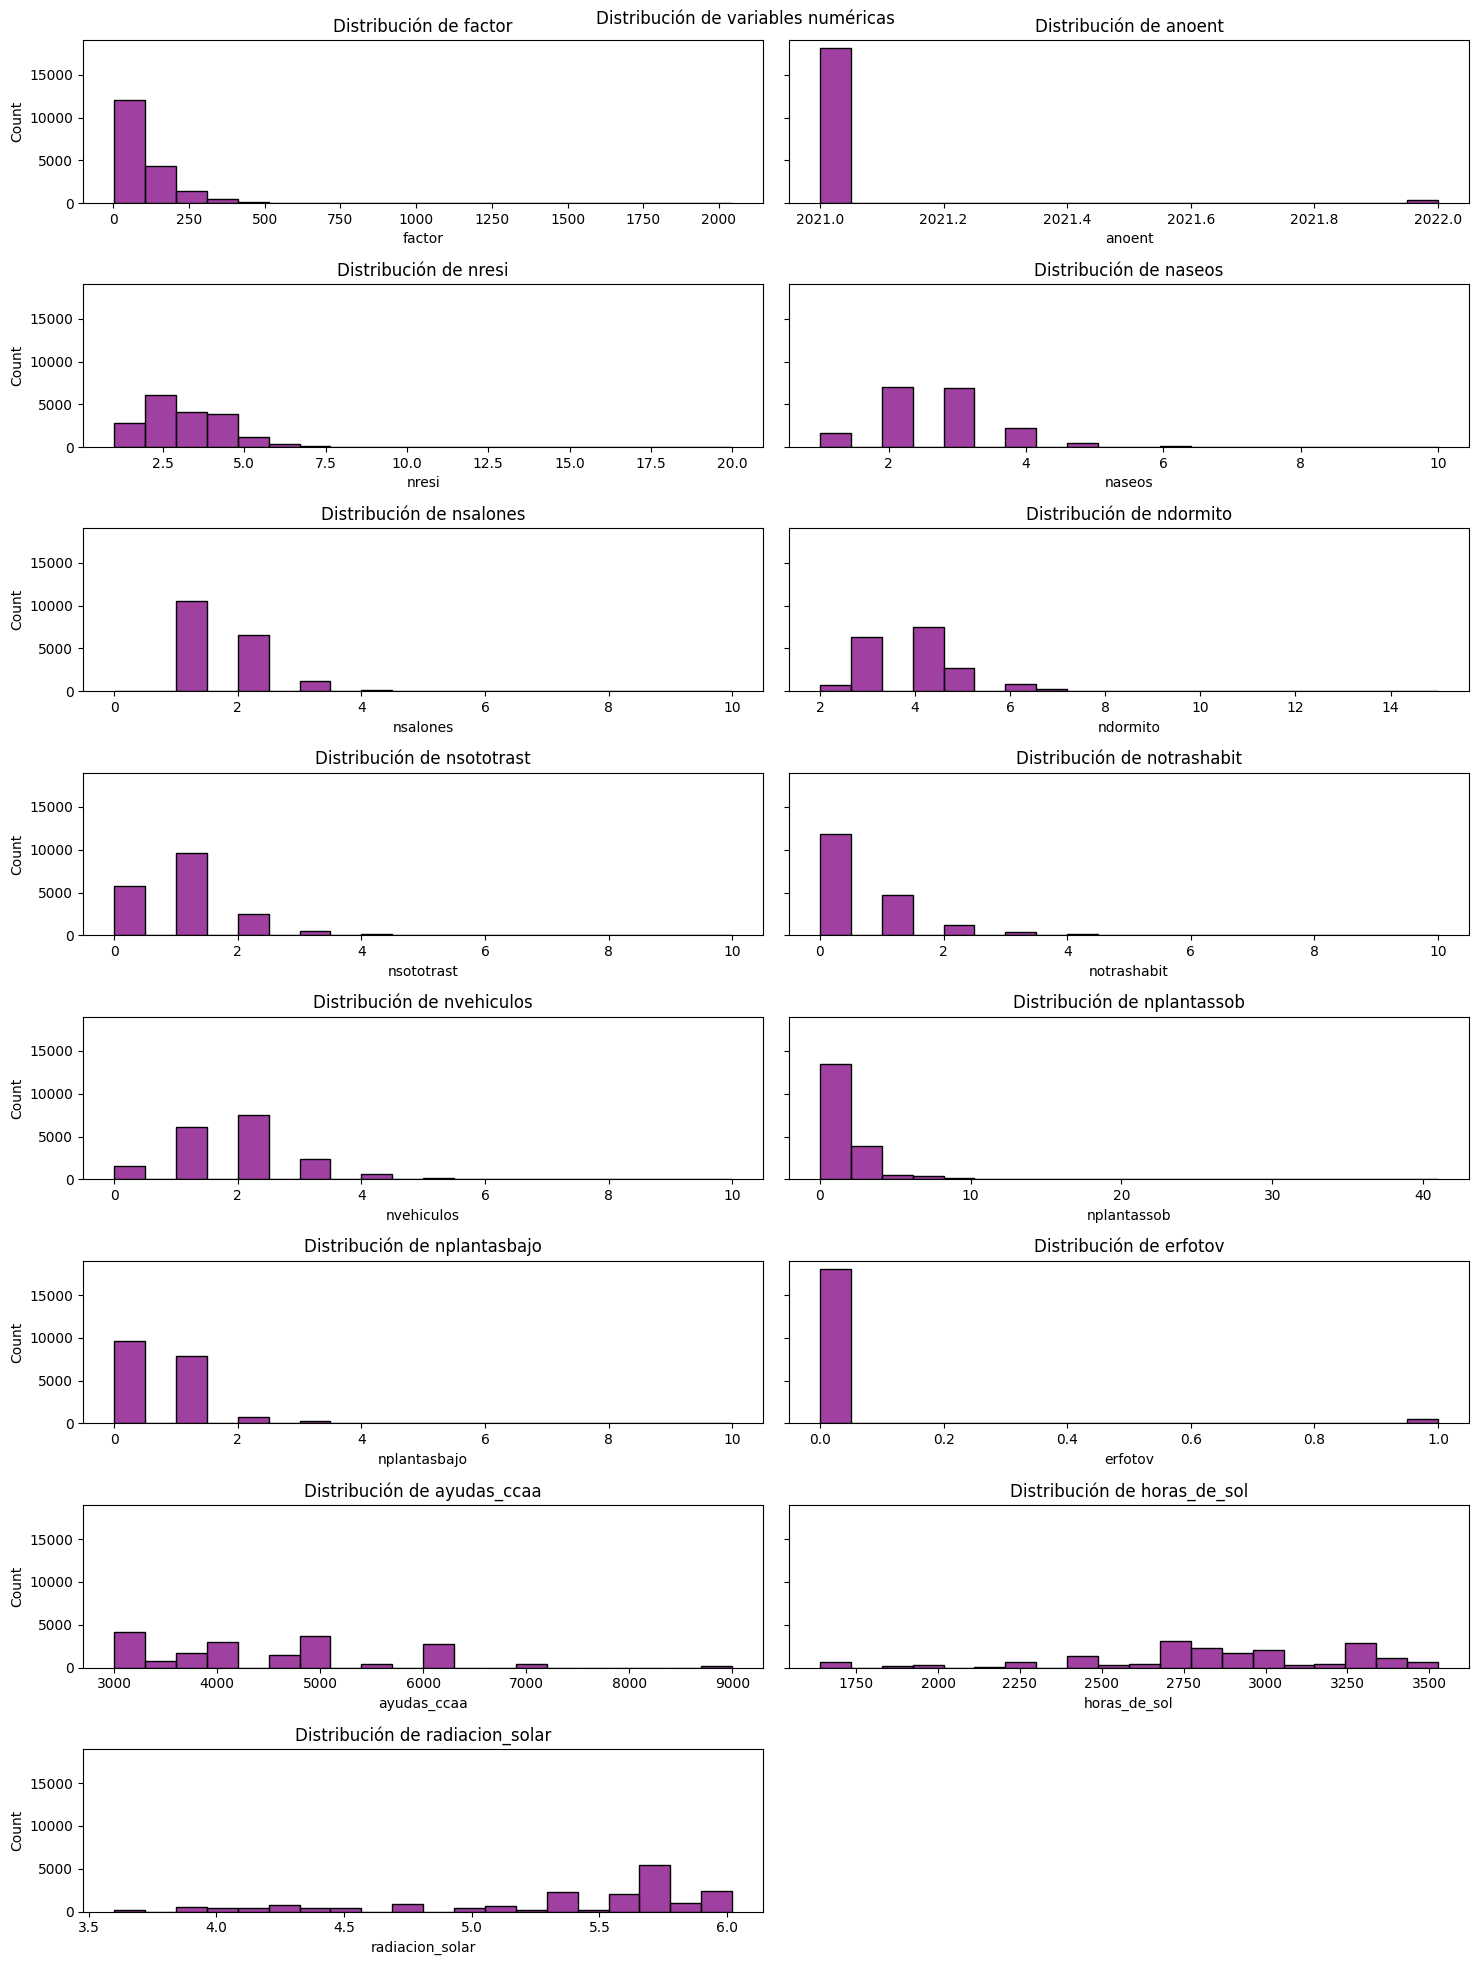

In [139]:
visualizador=f.Visualizador(df_grandes_sin_outliers)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

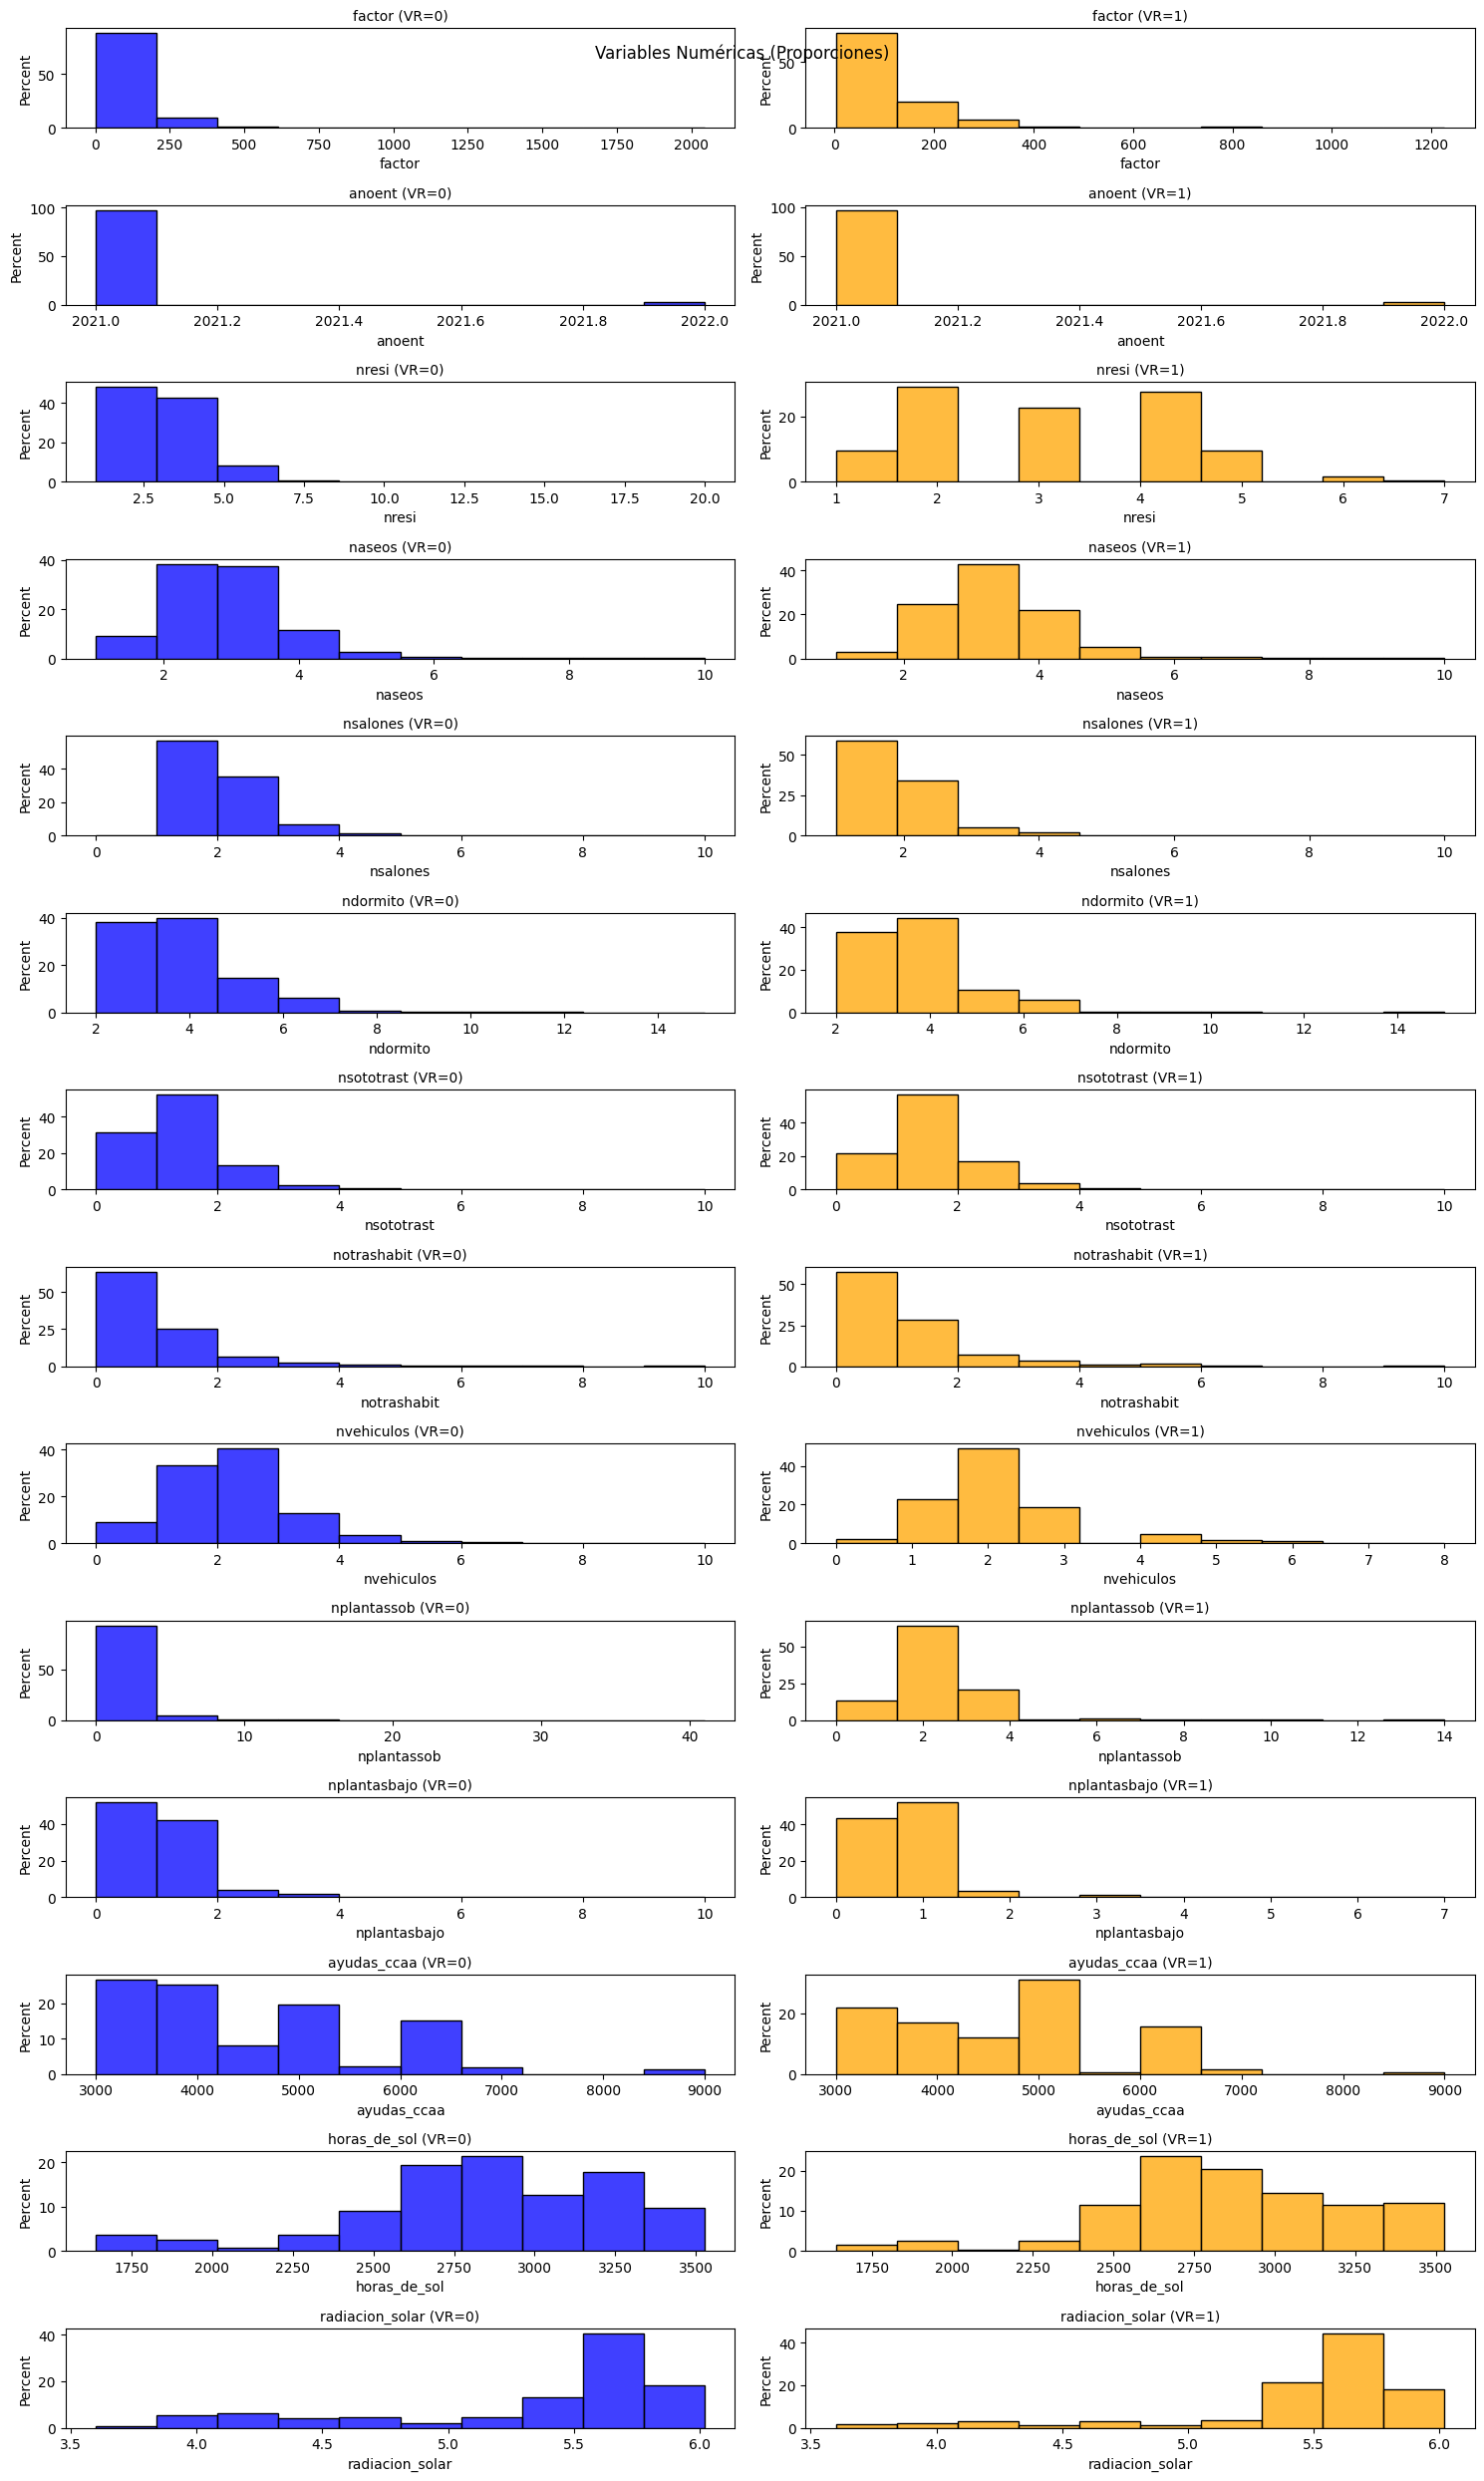

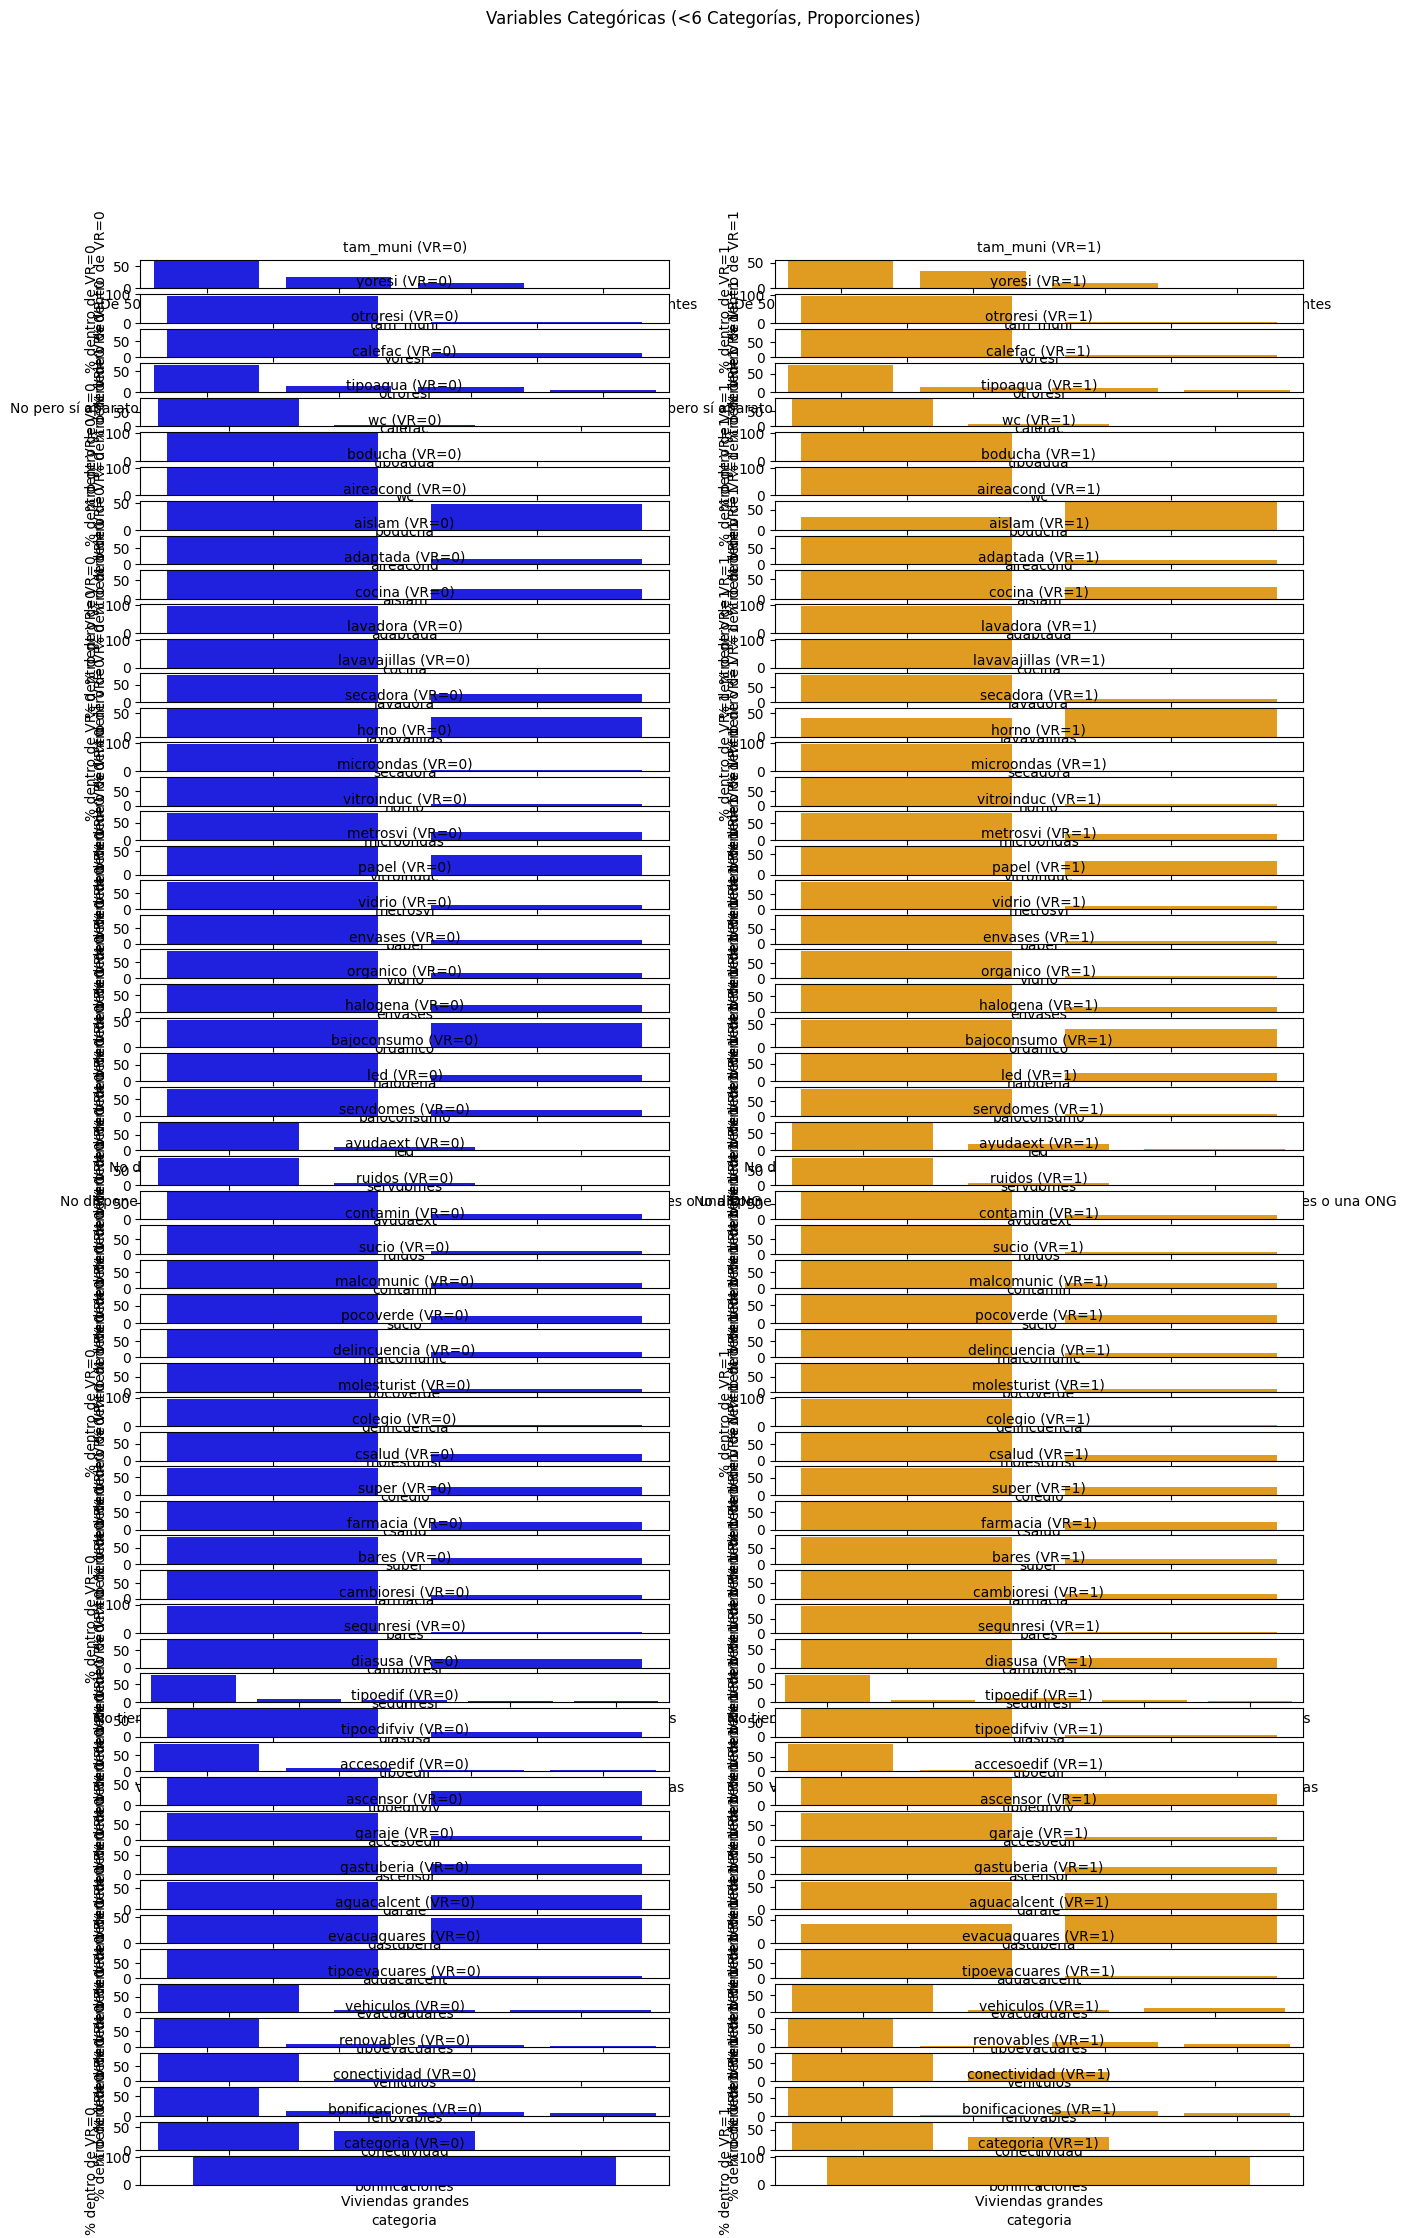

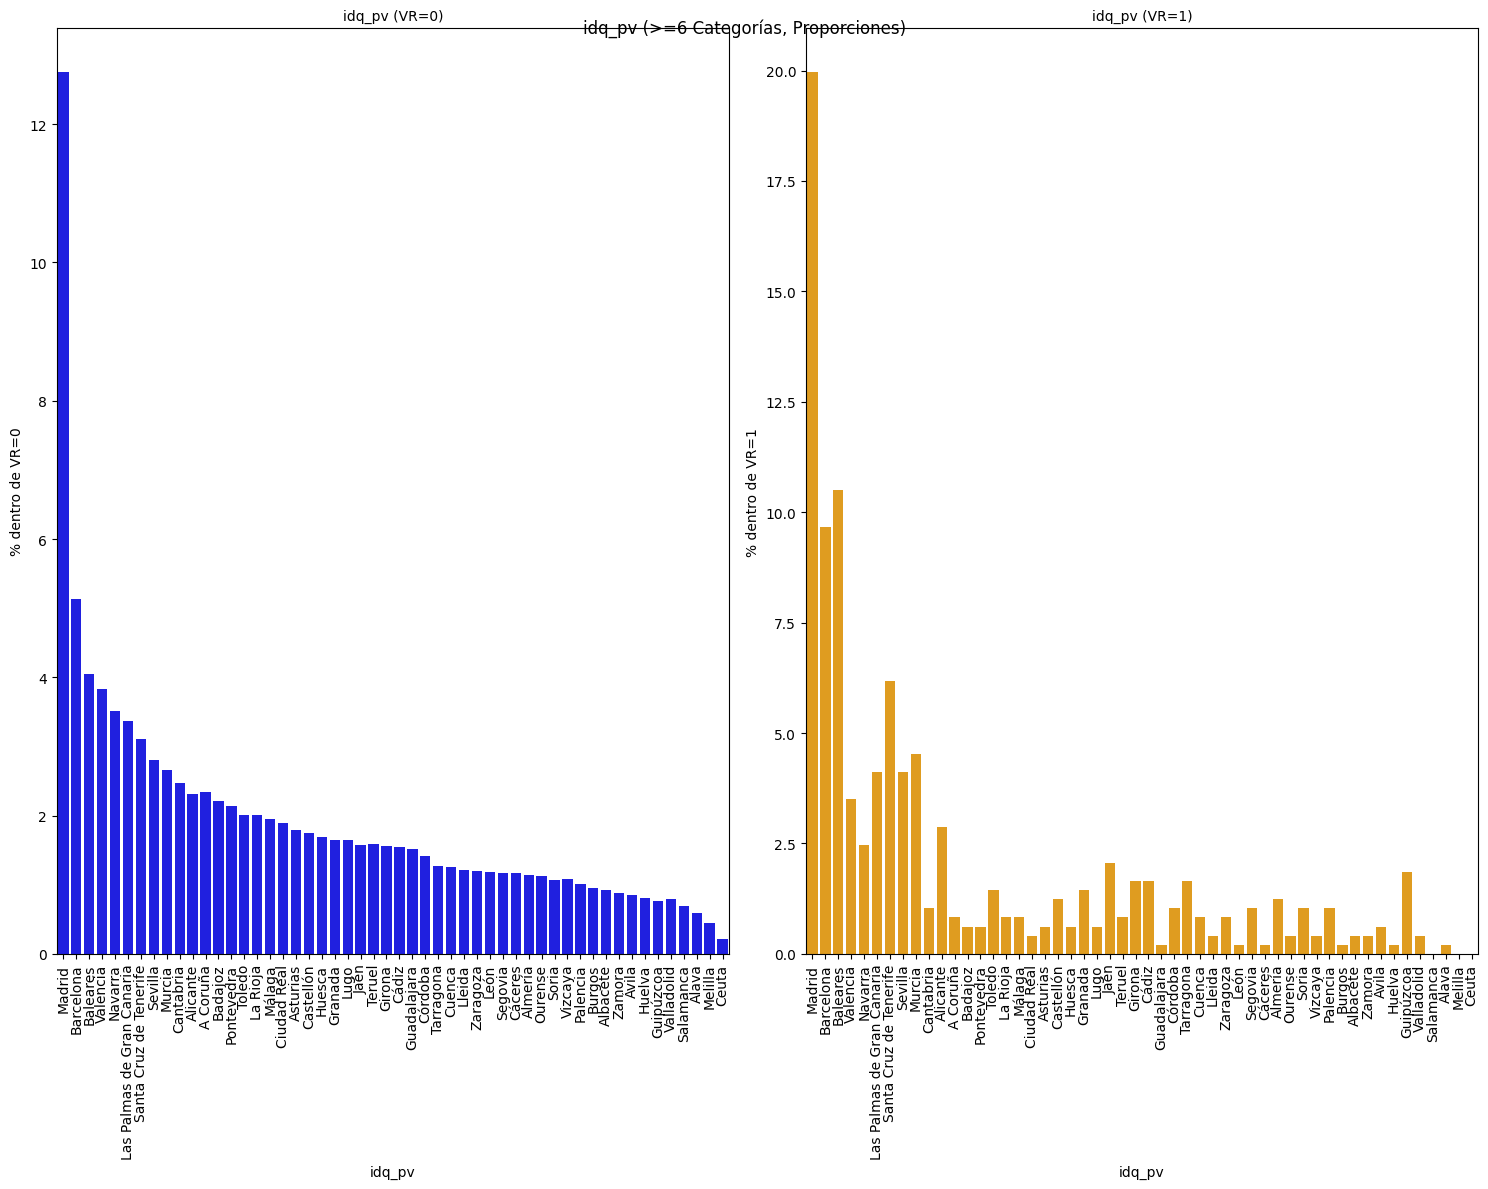

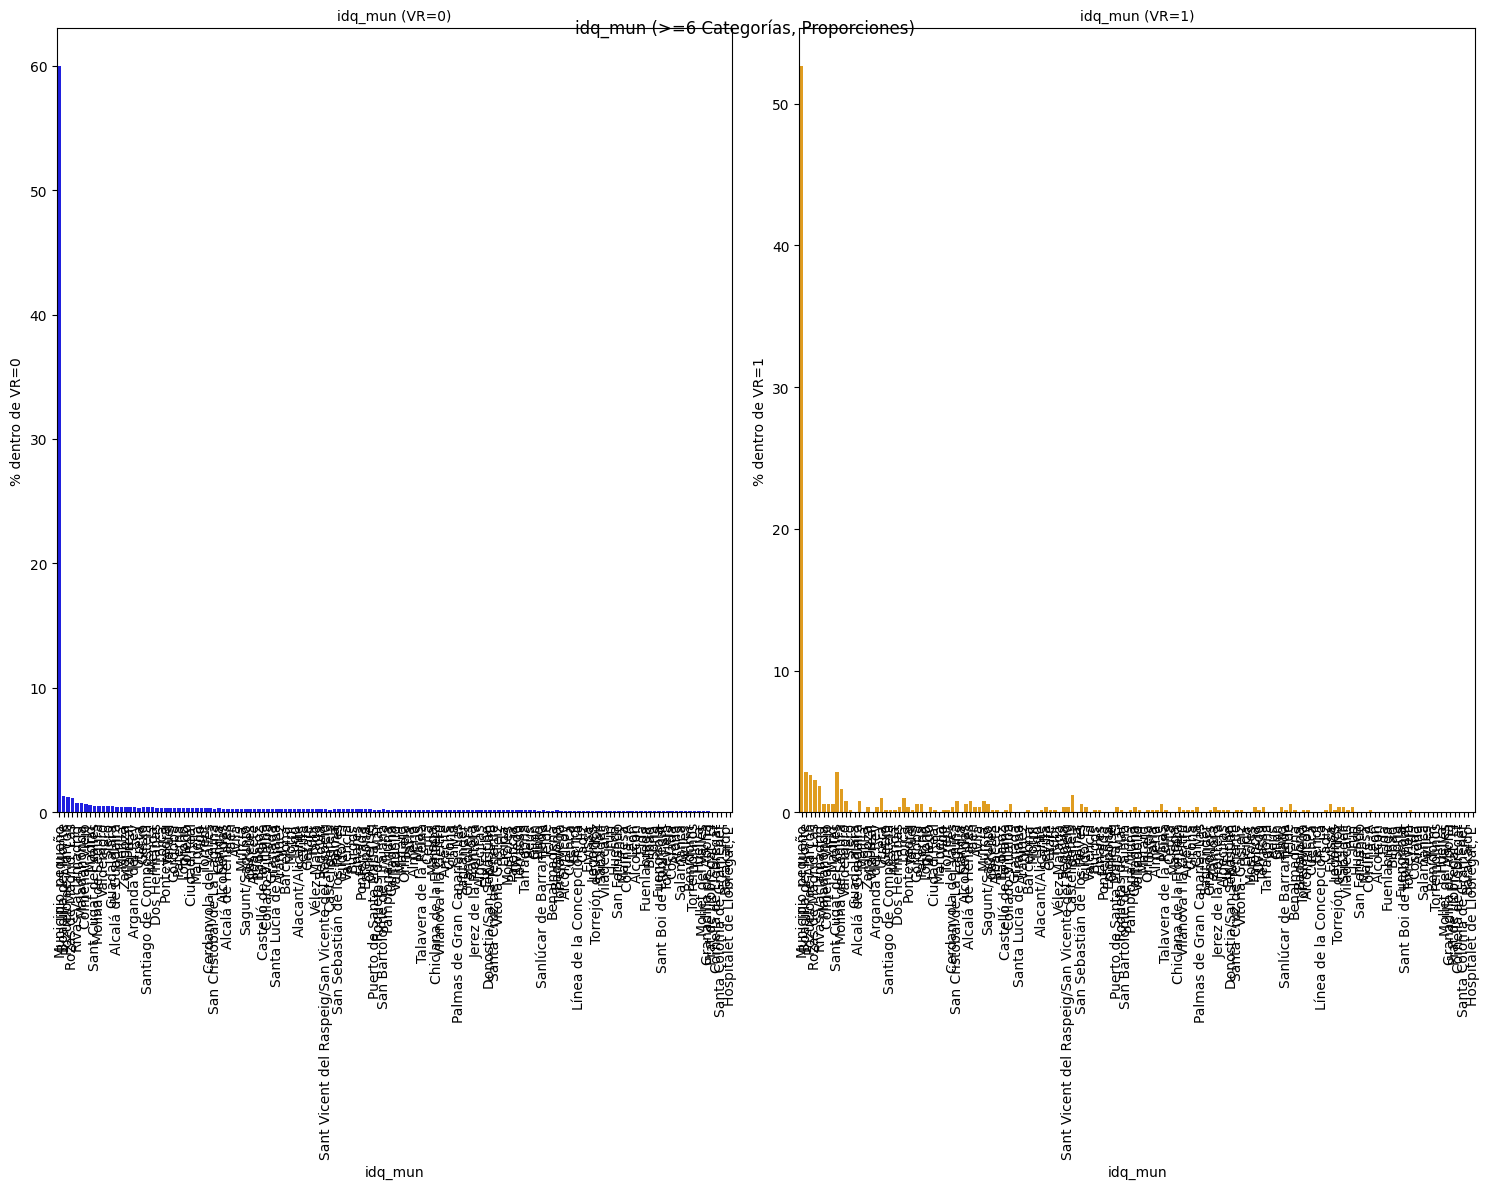

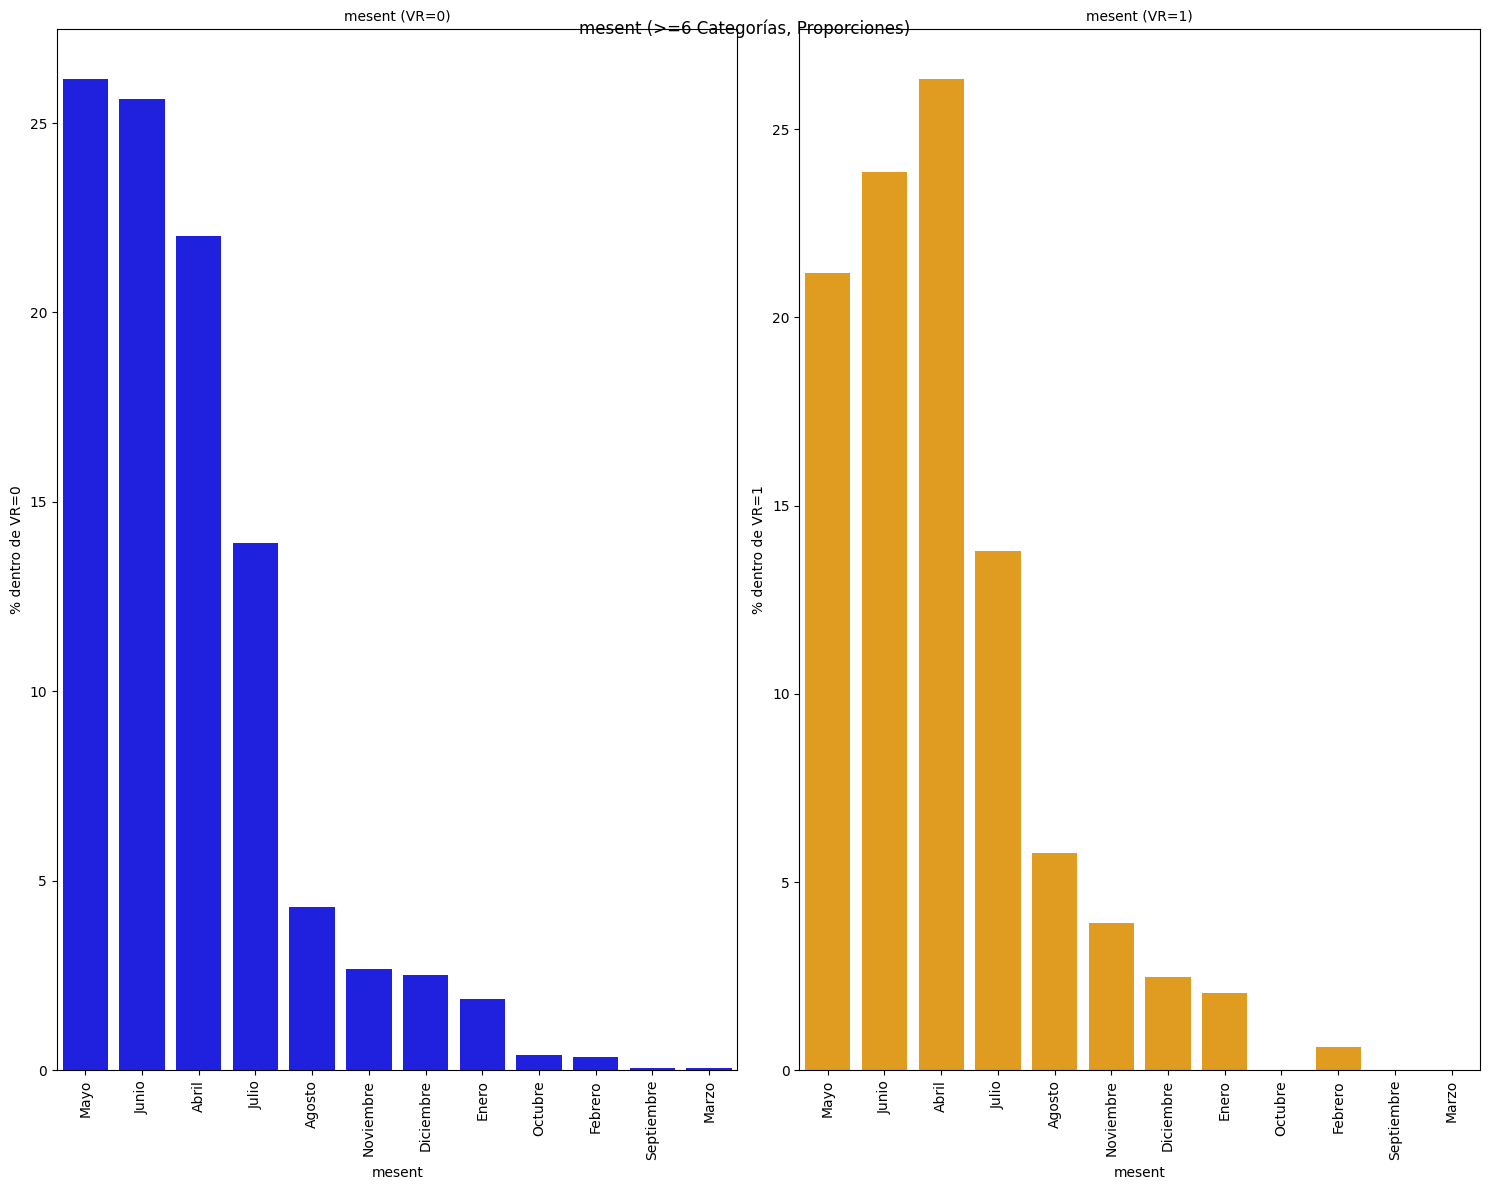

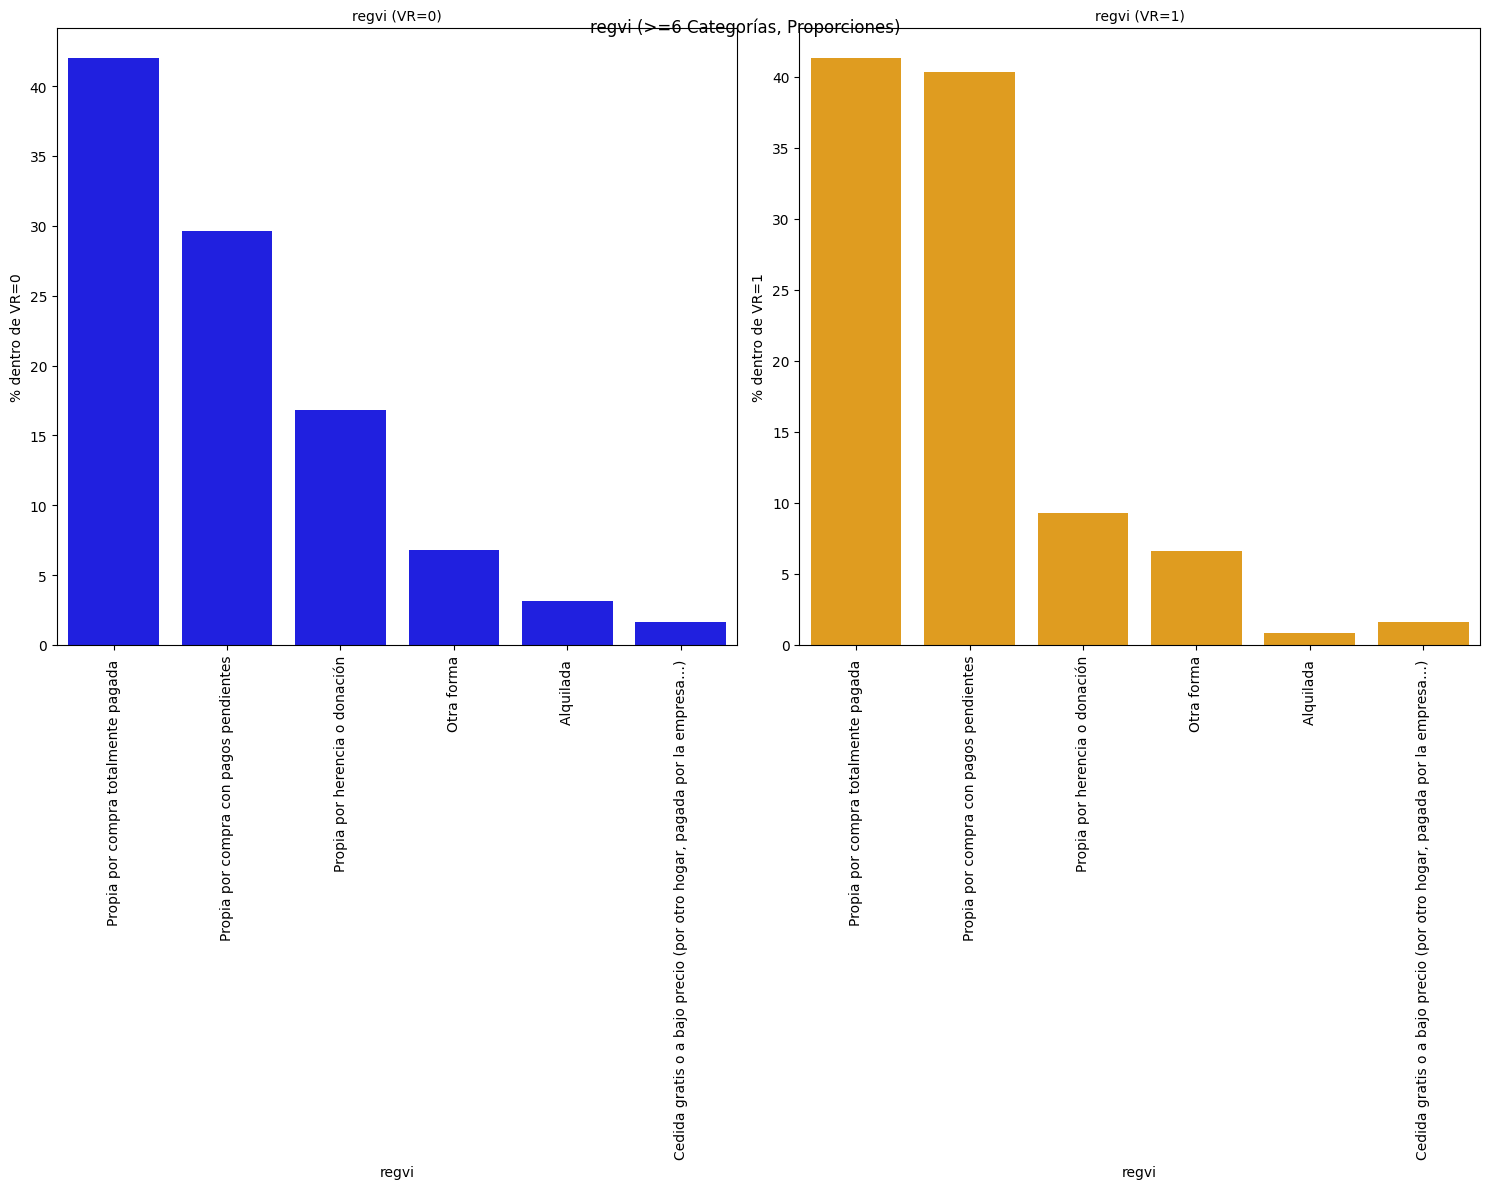

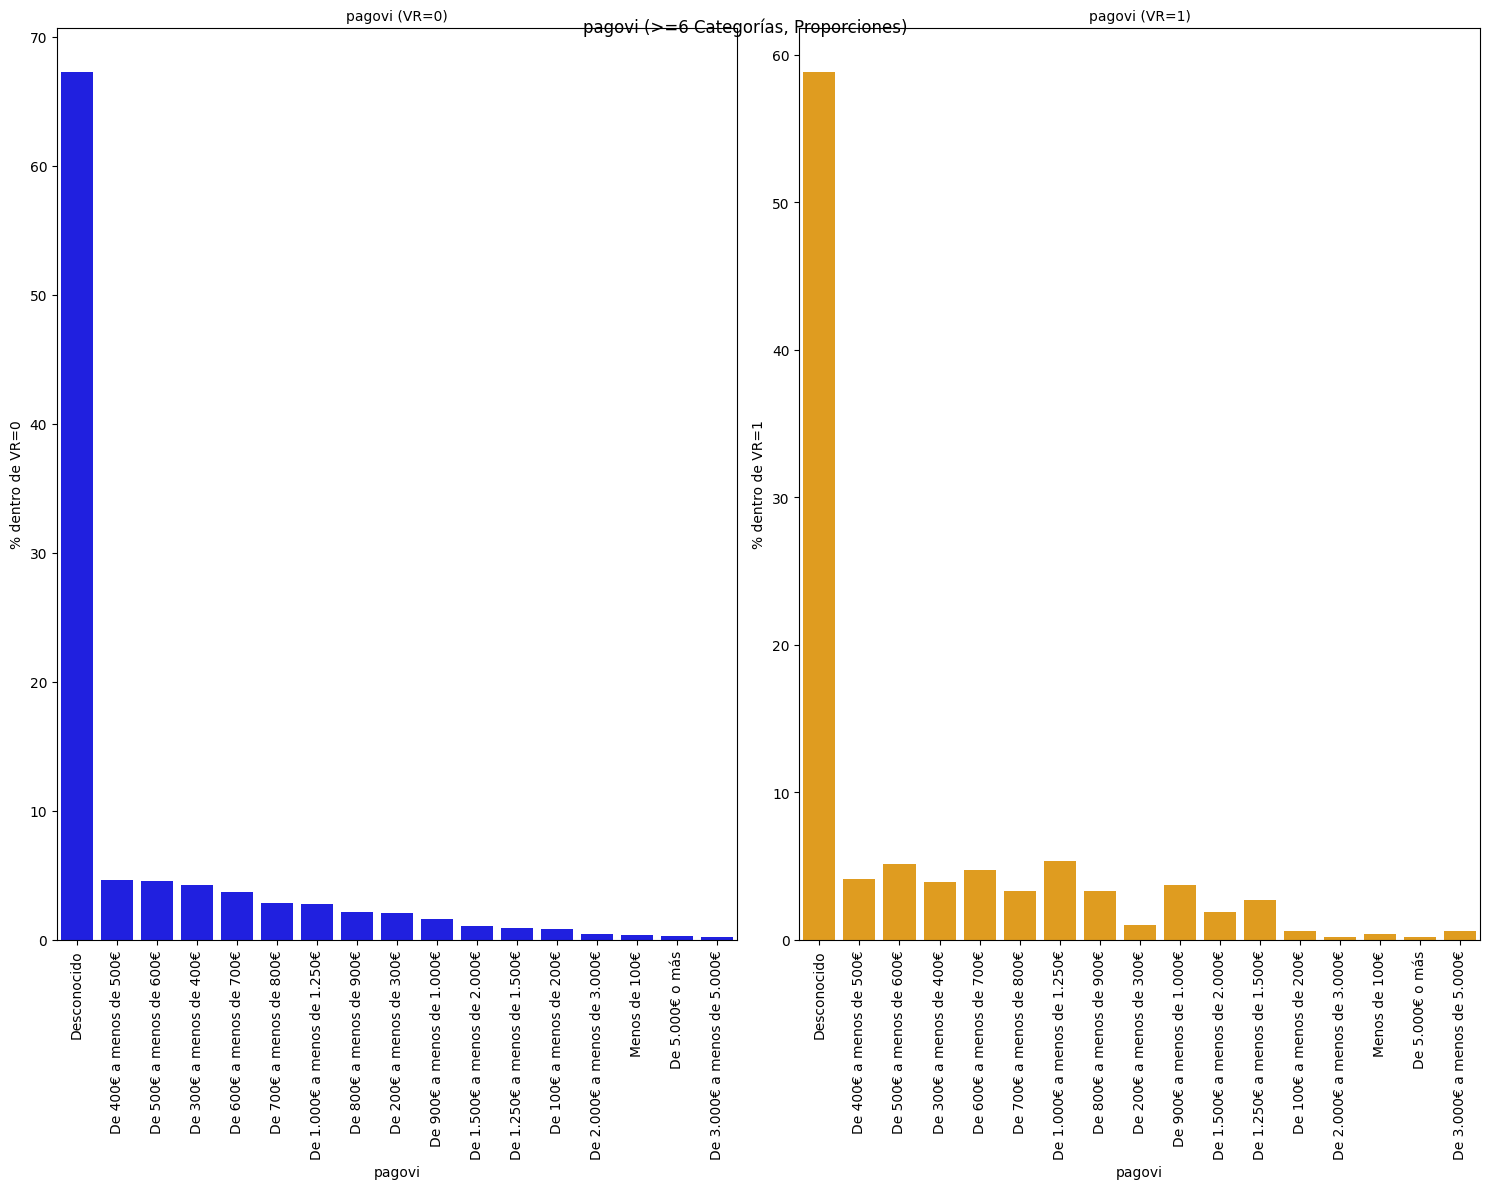

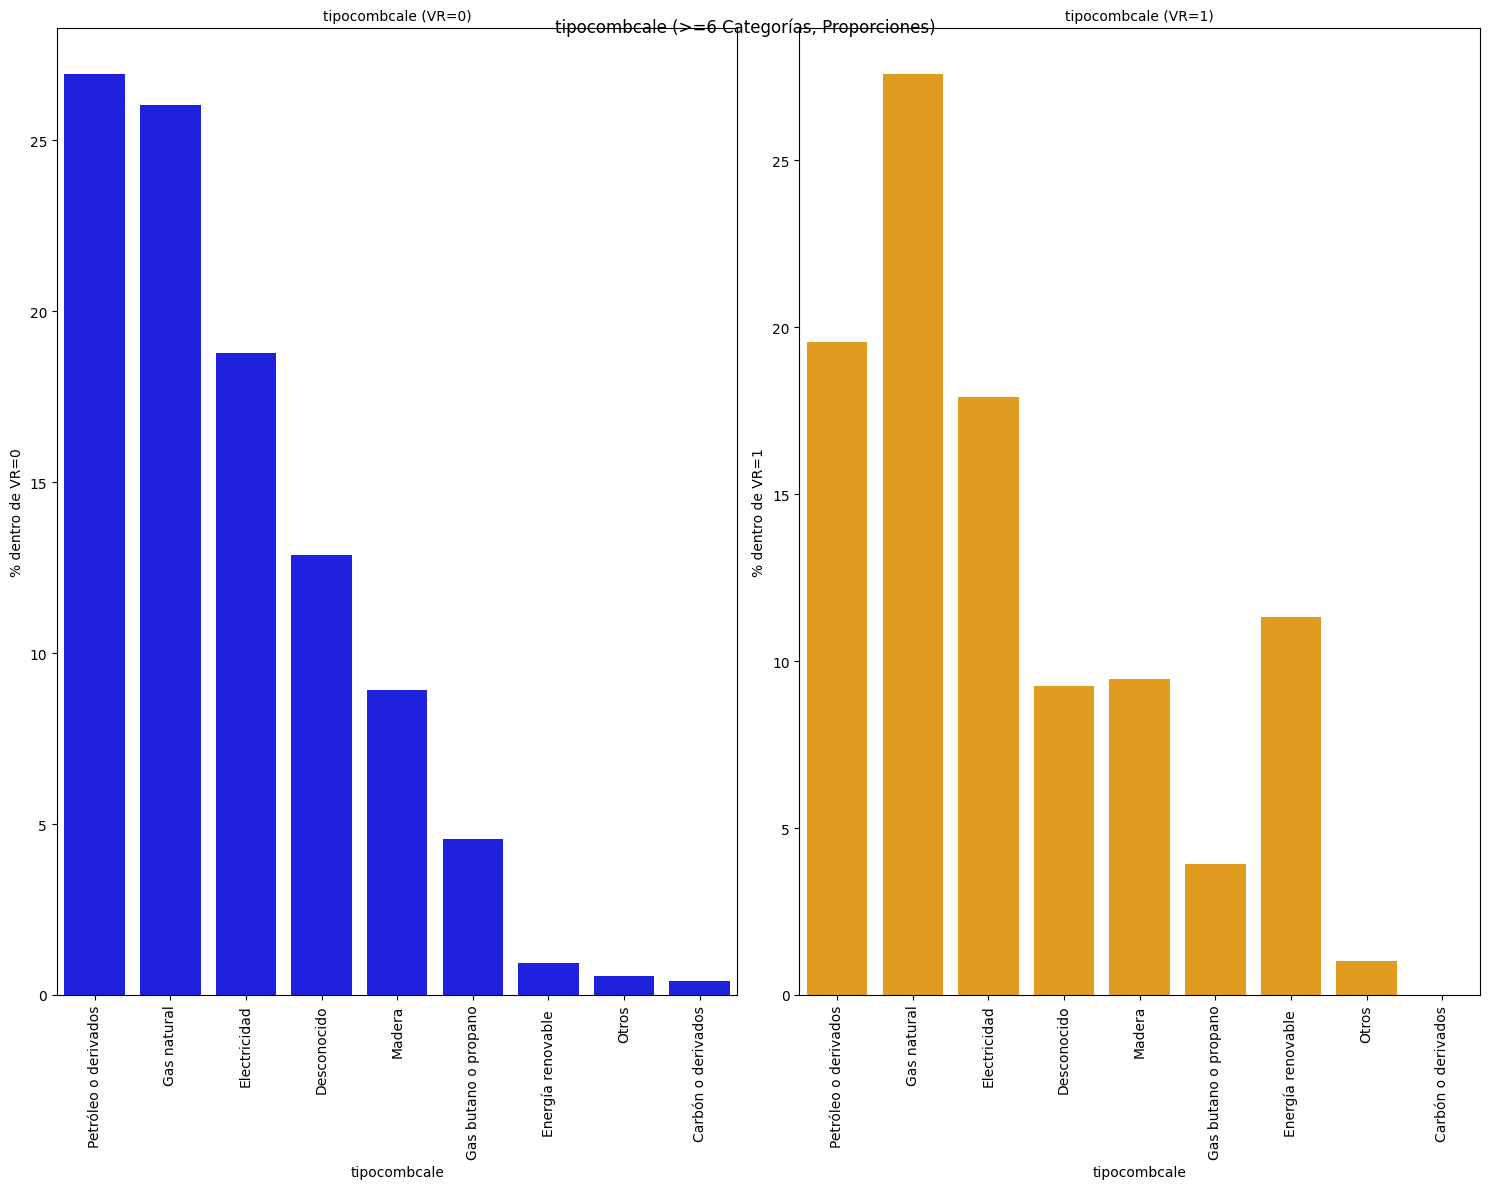

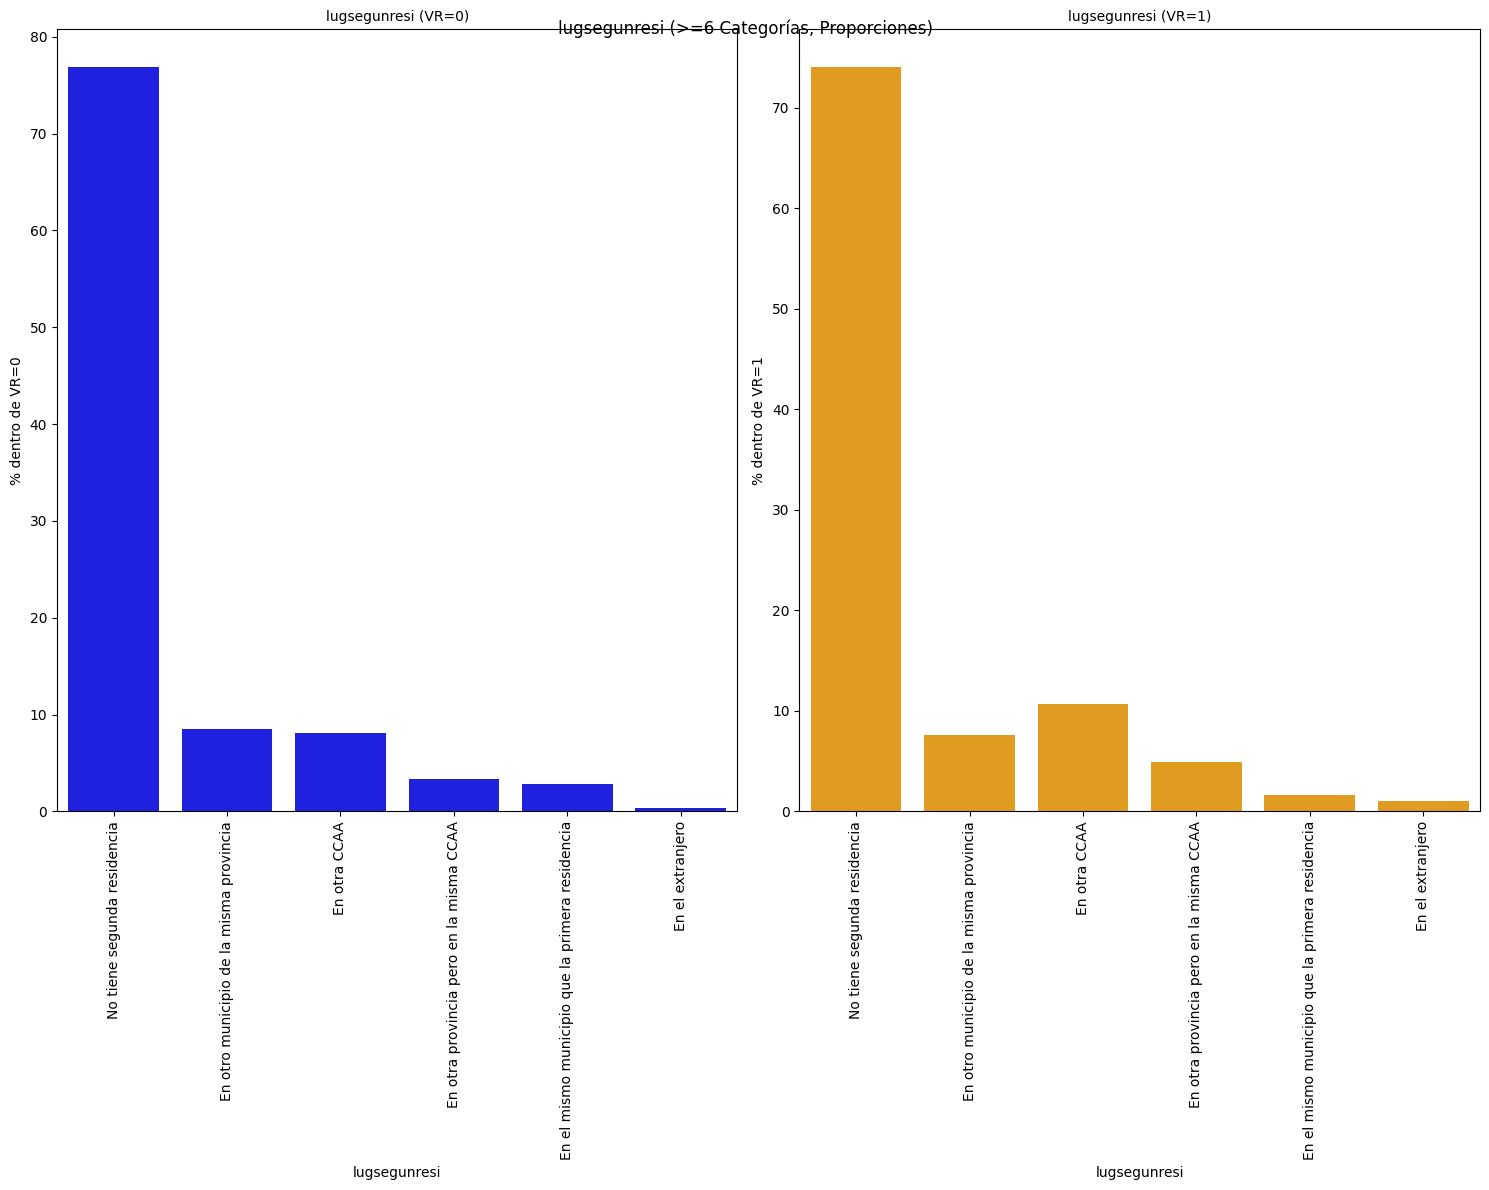

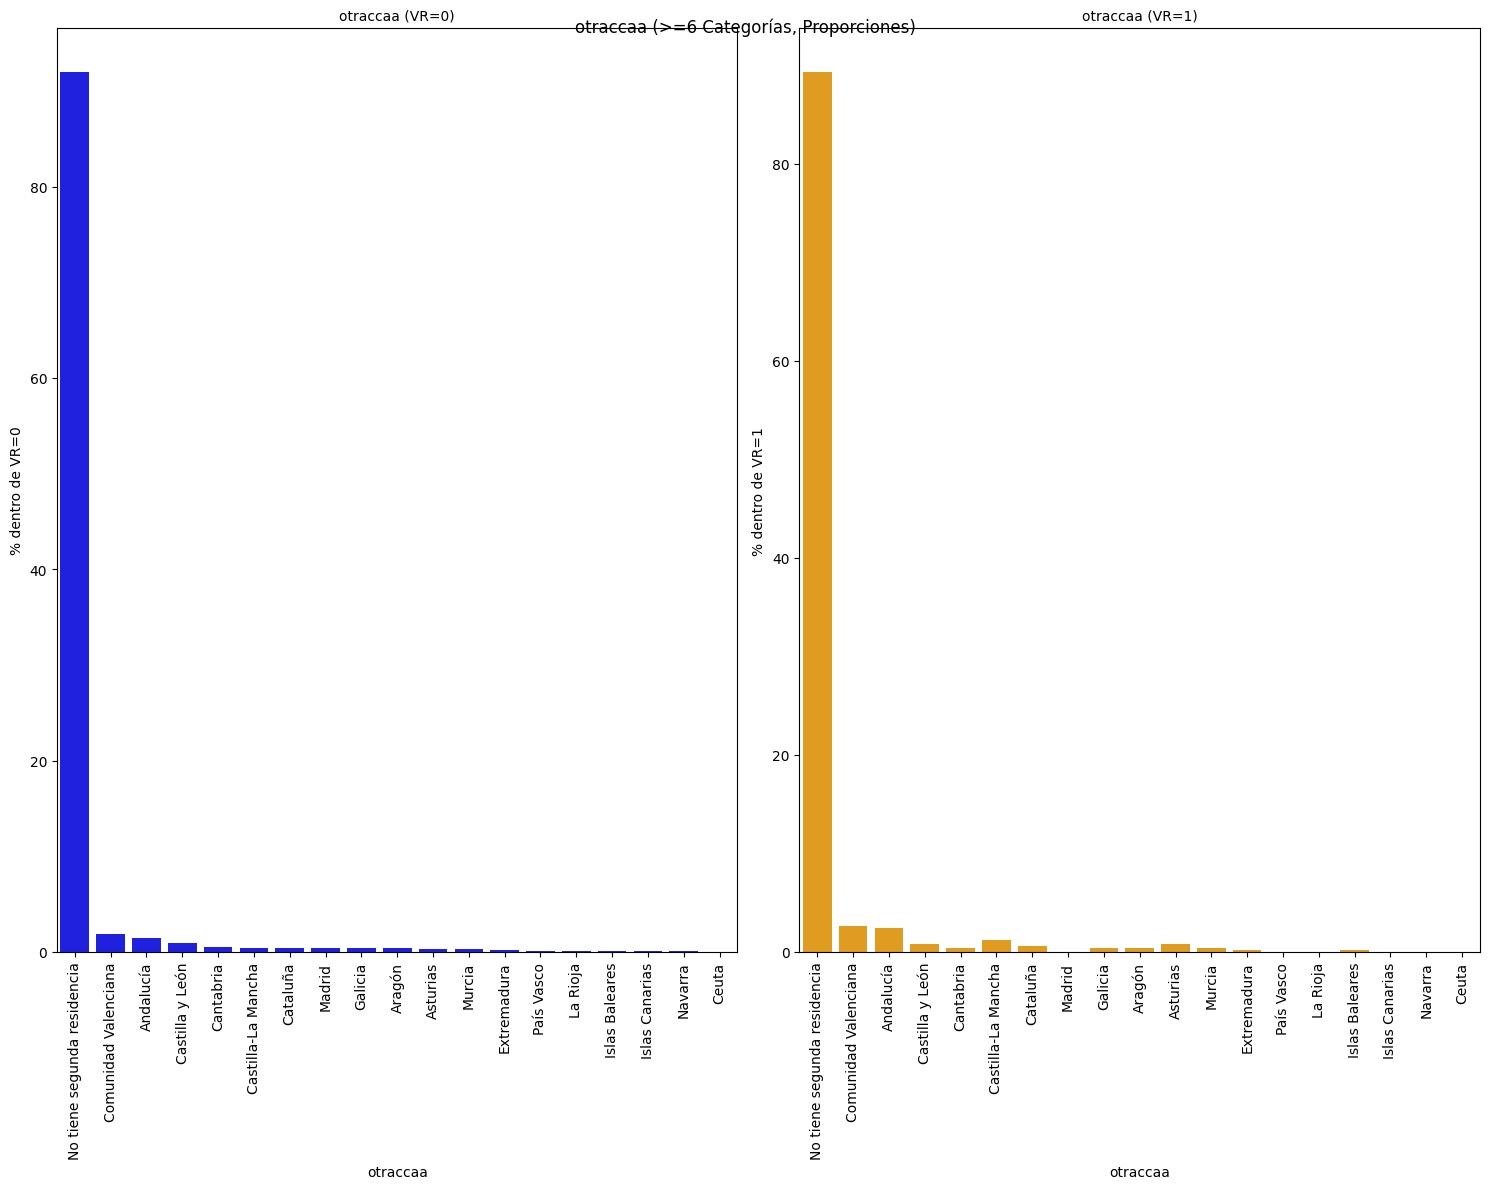

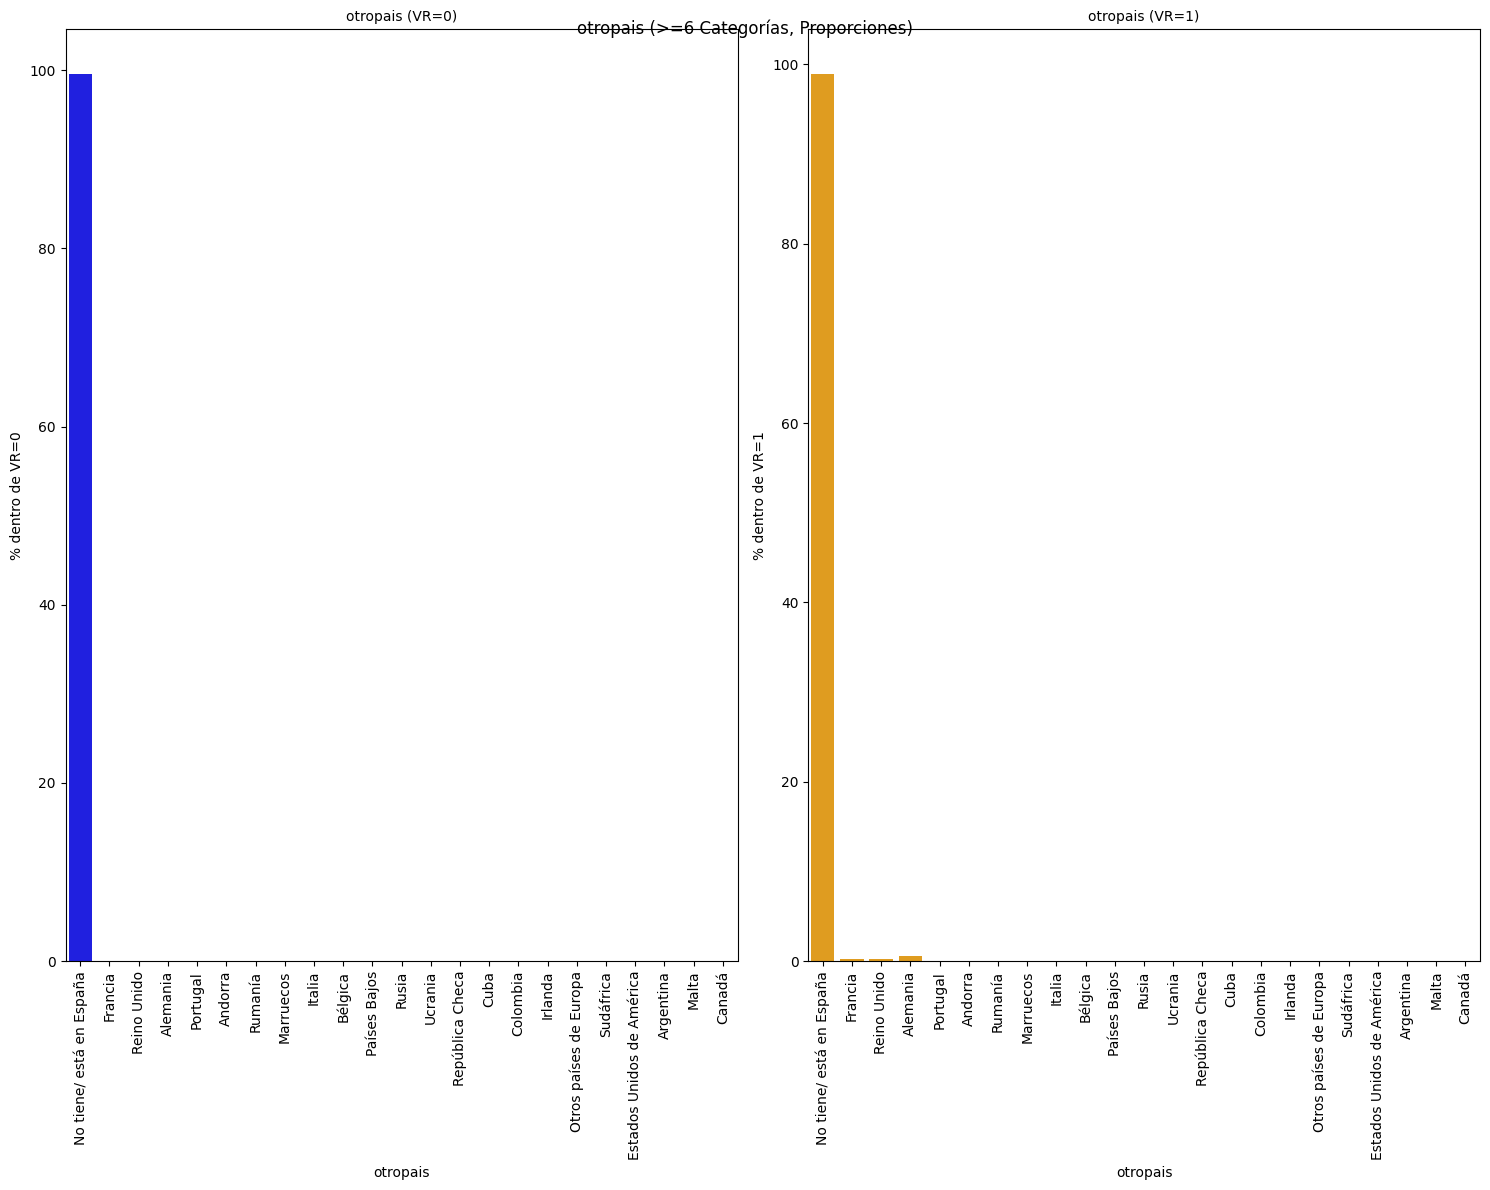

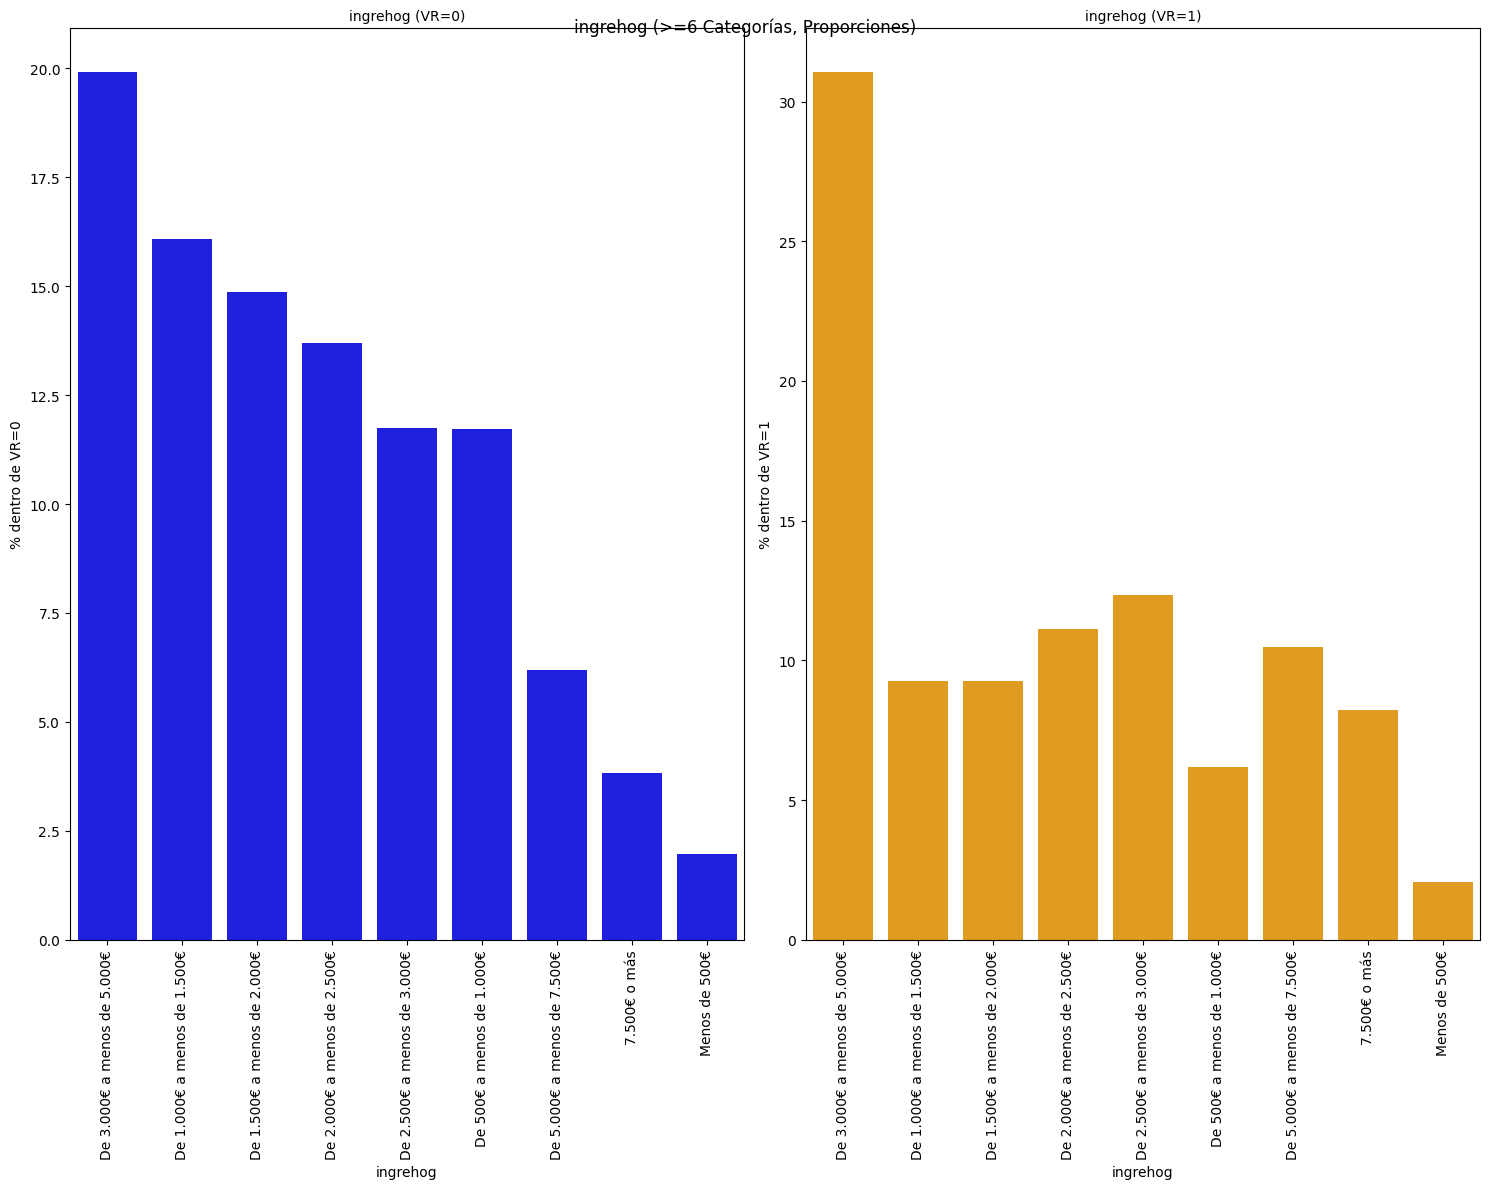

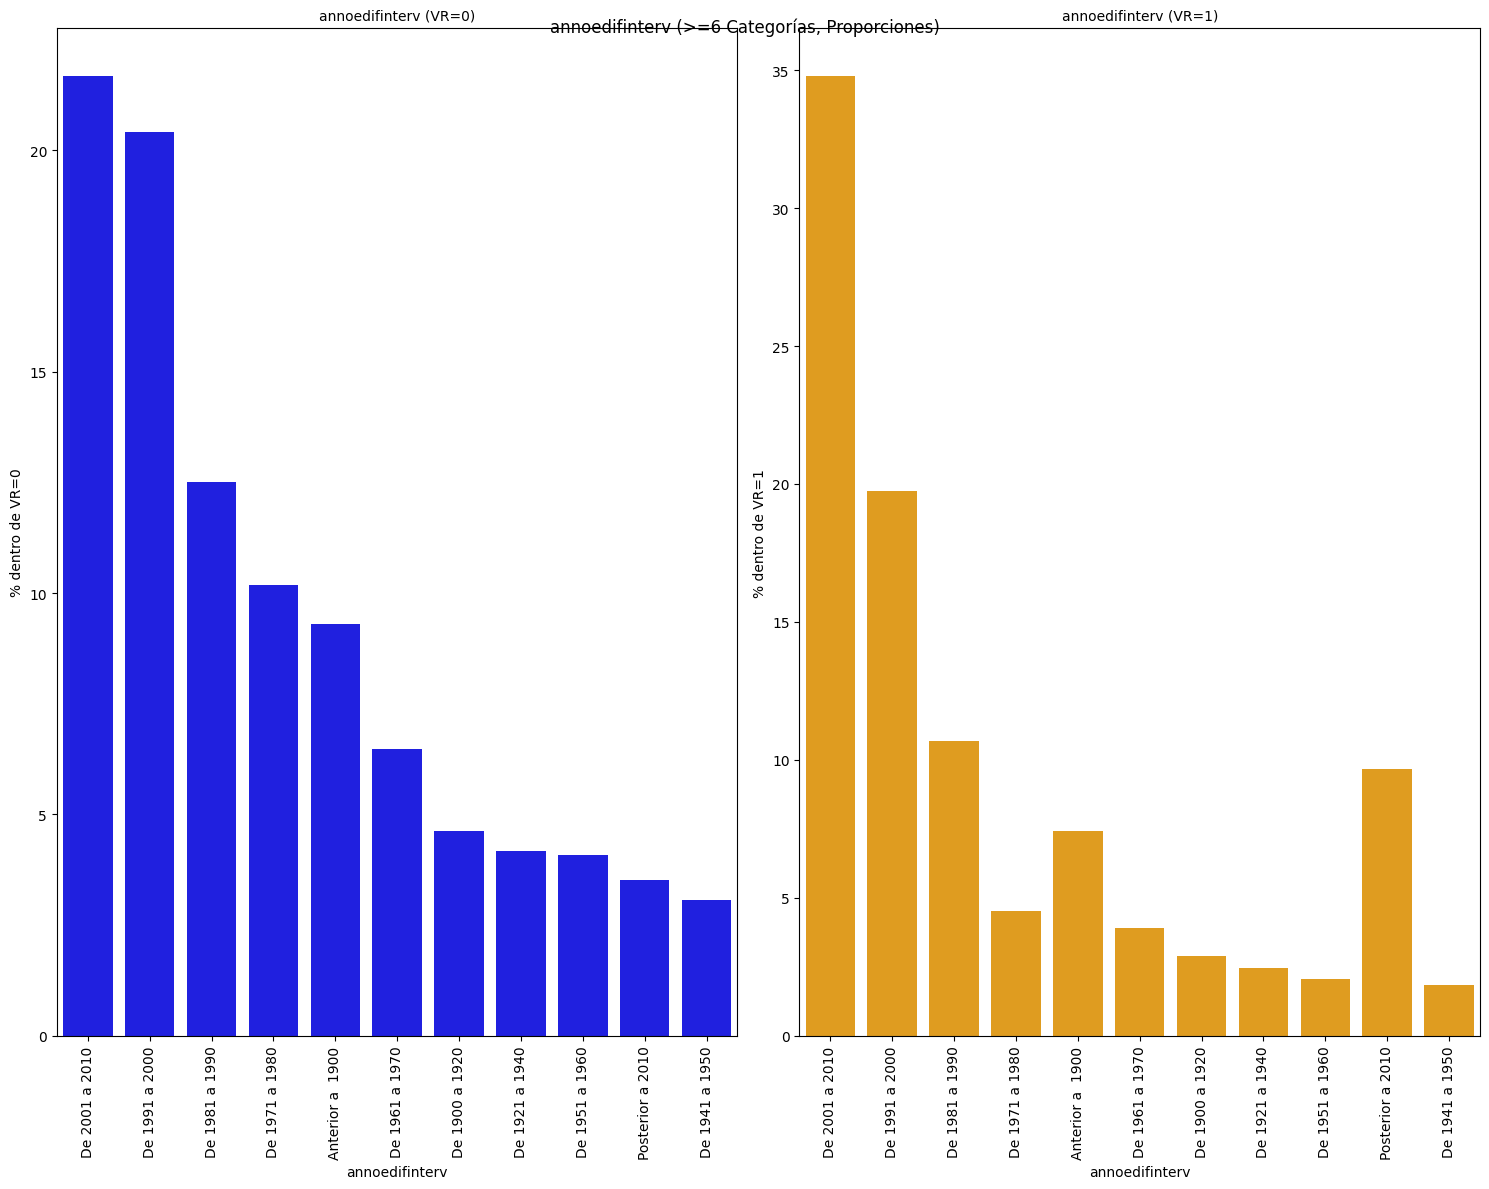

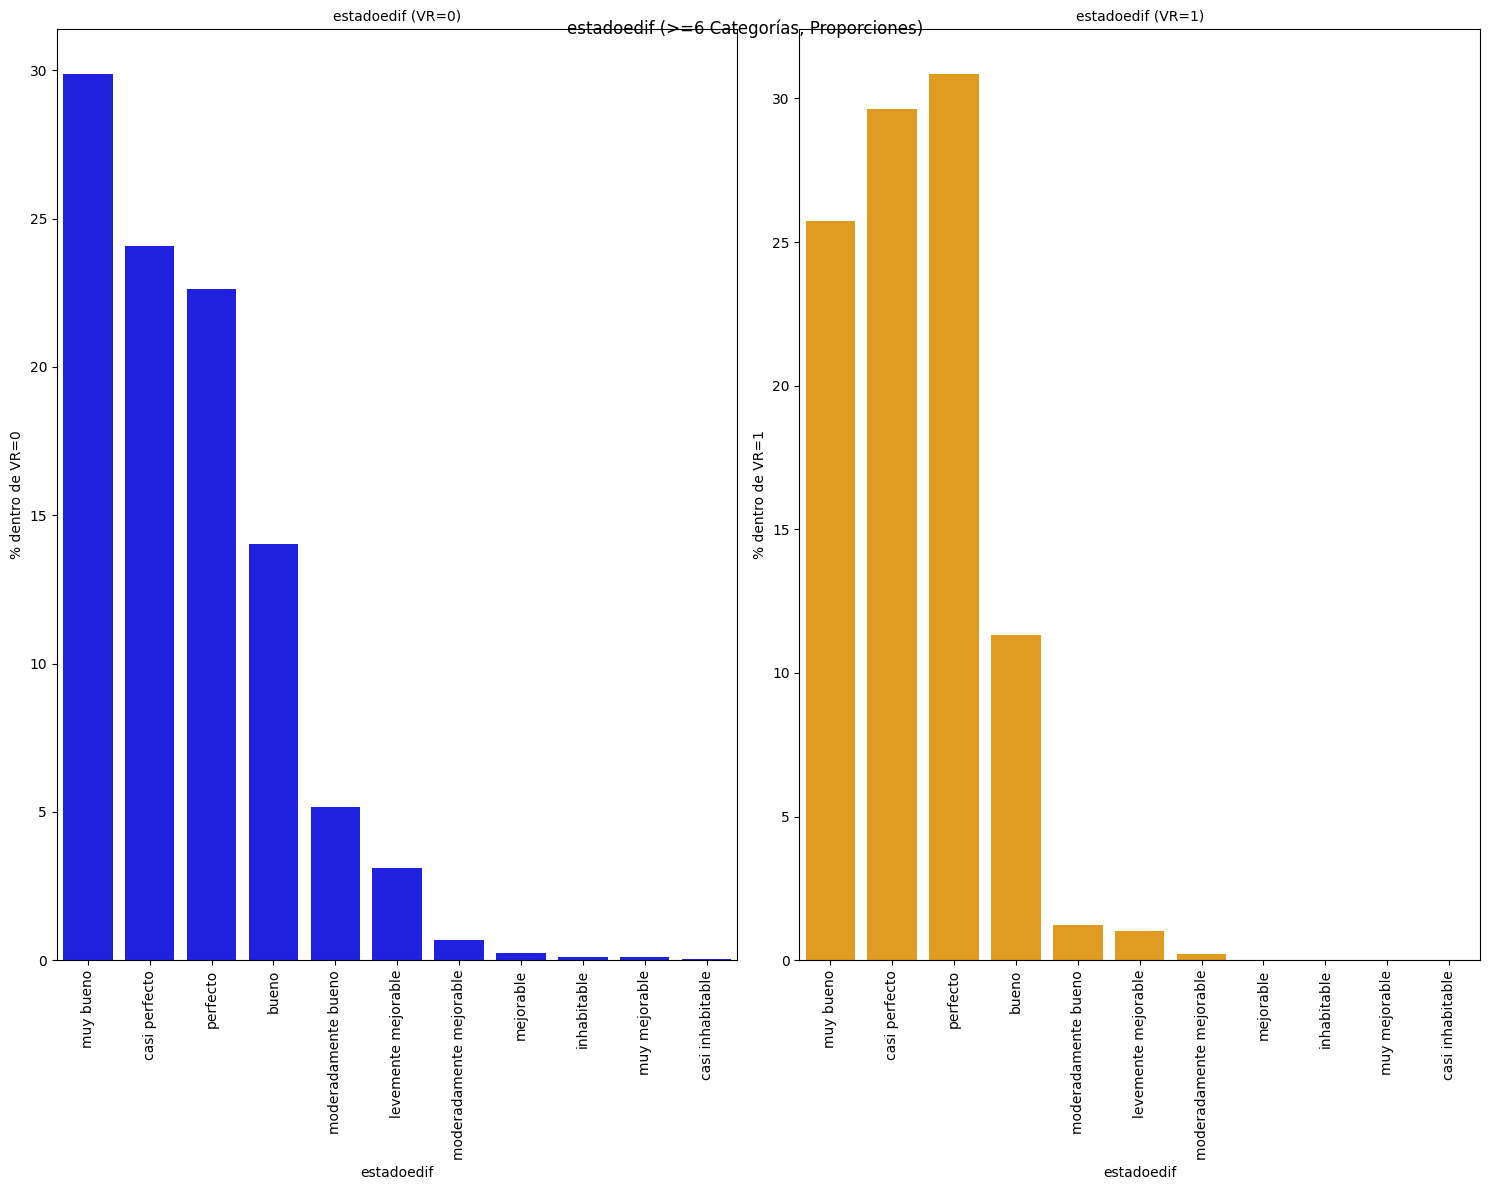

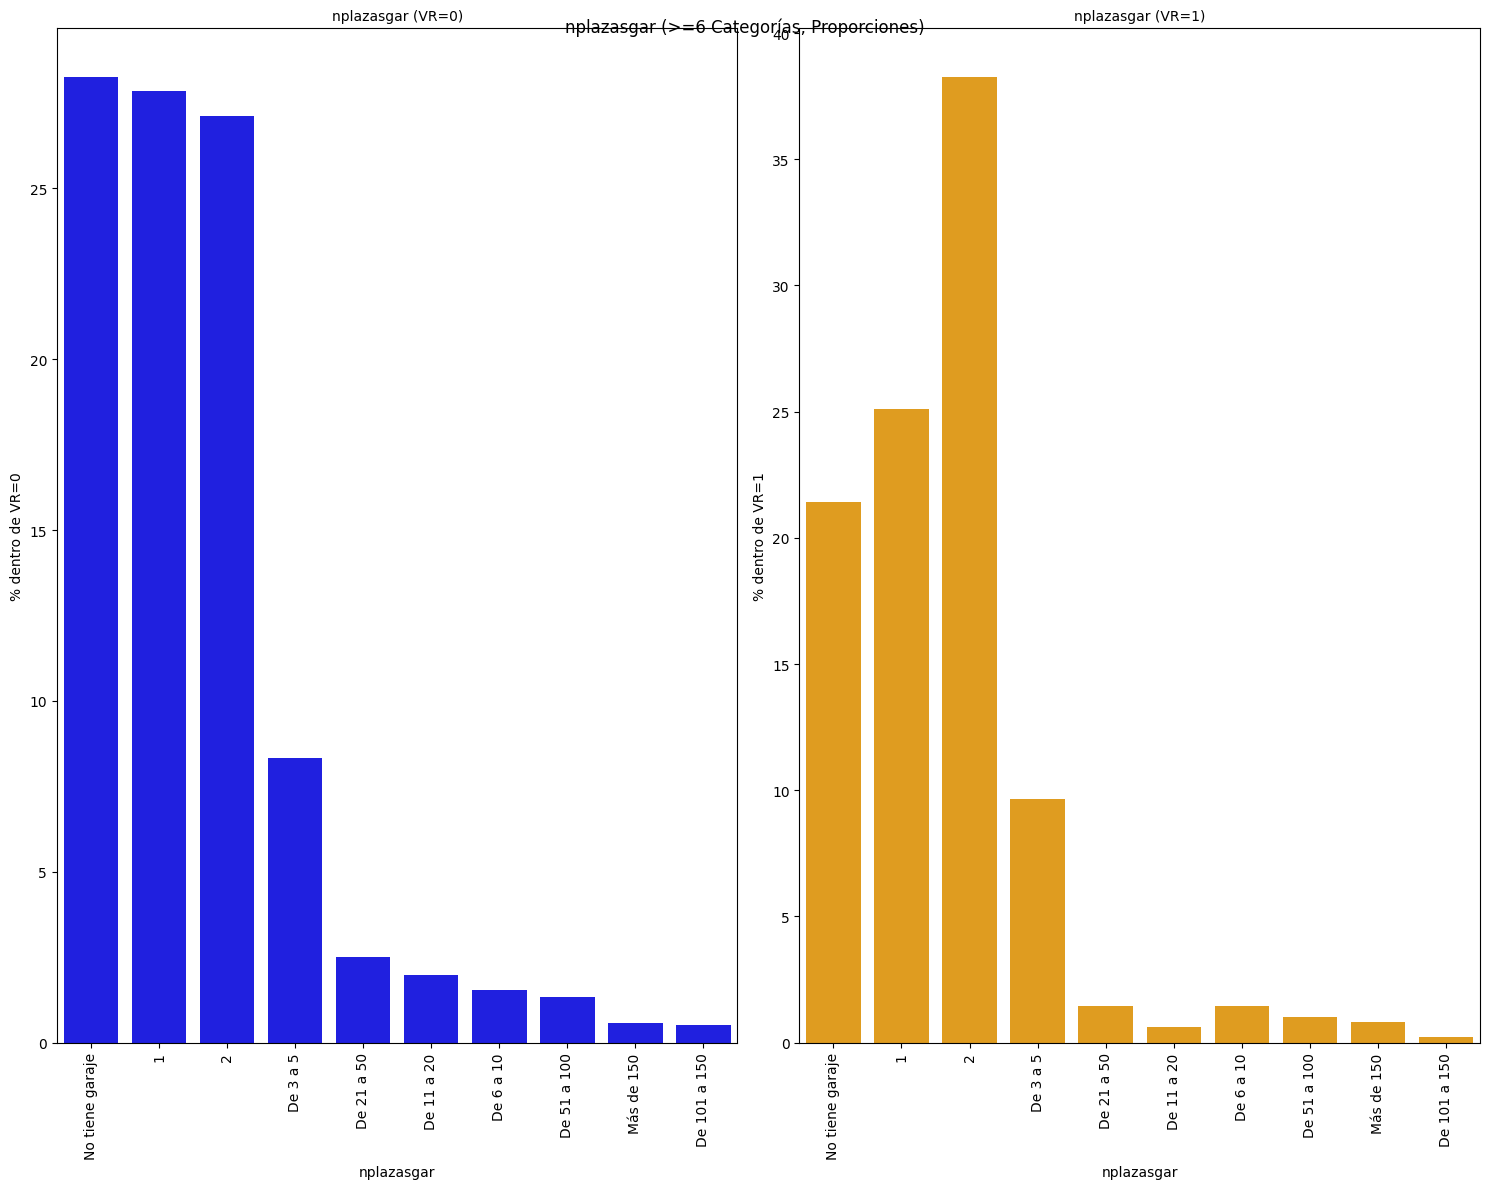

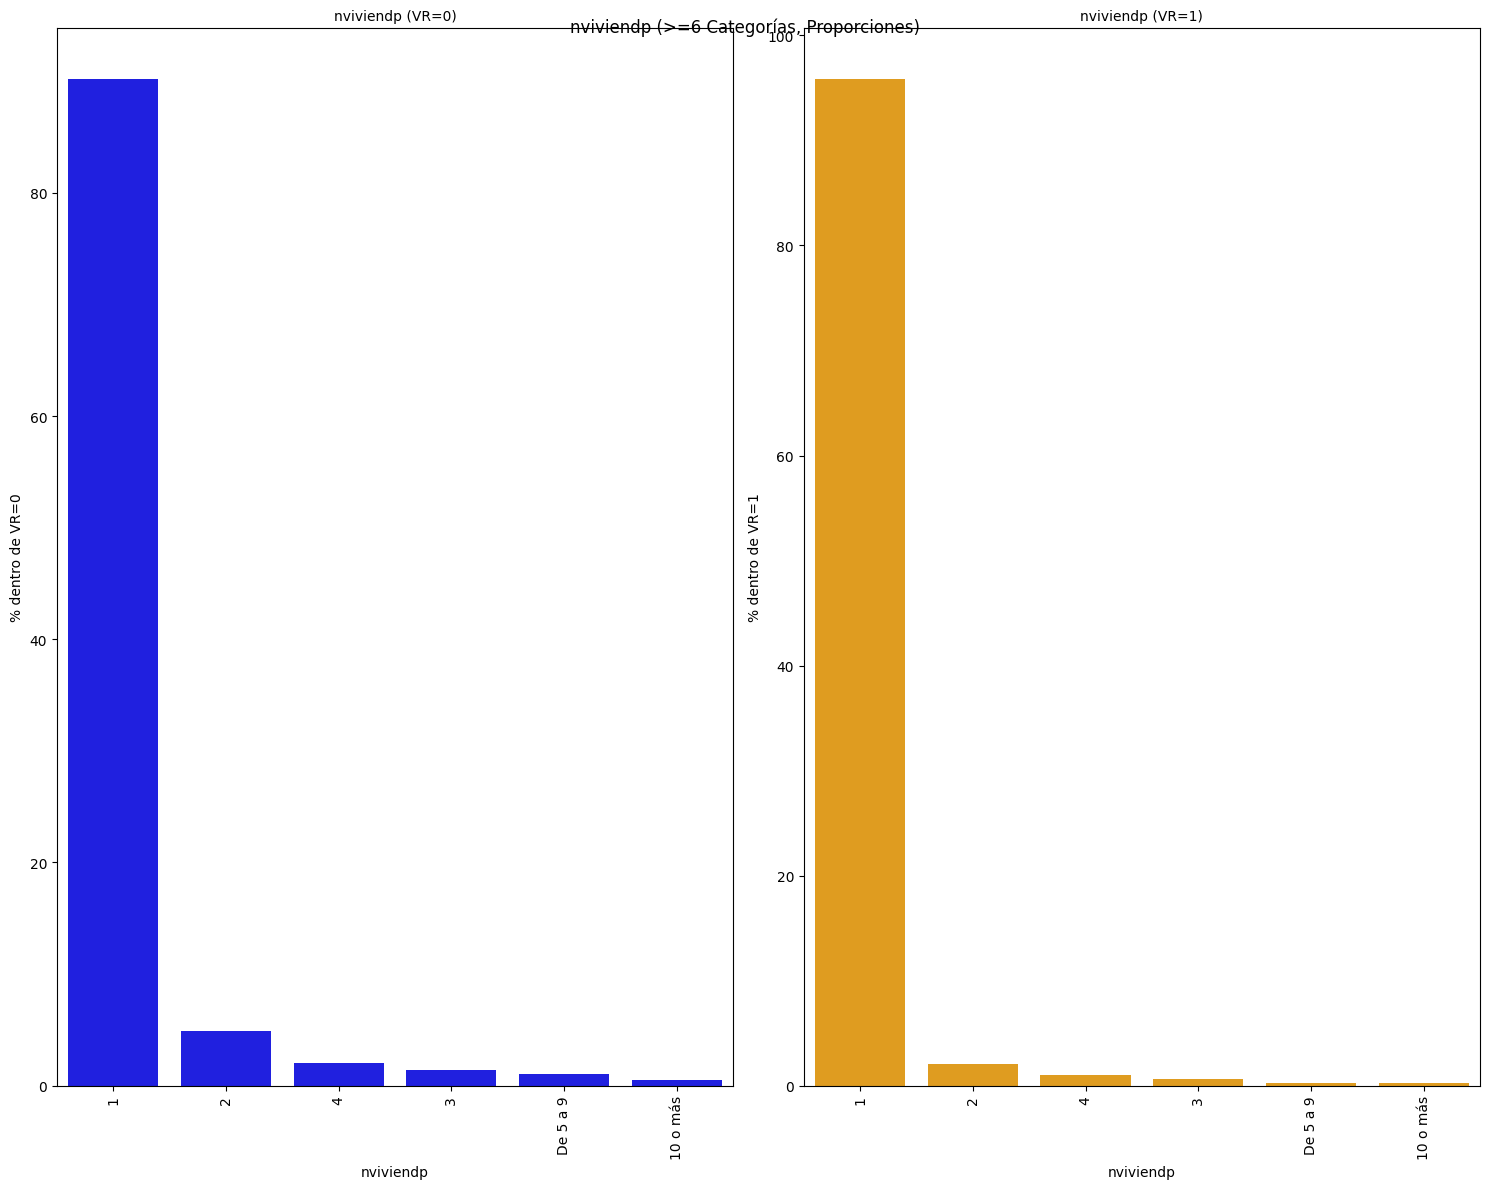

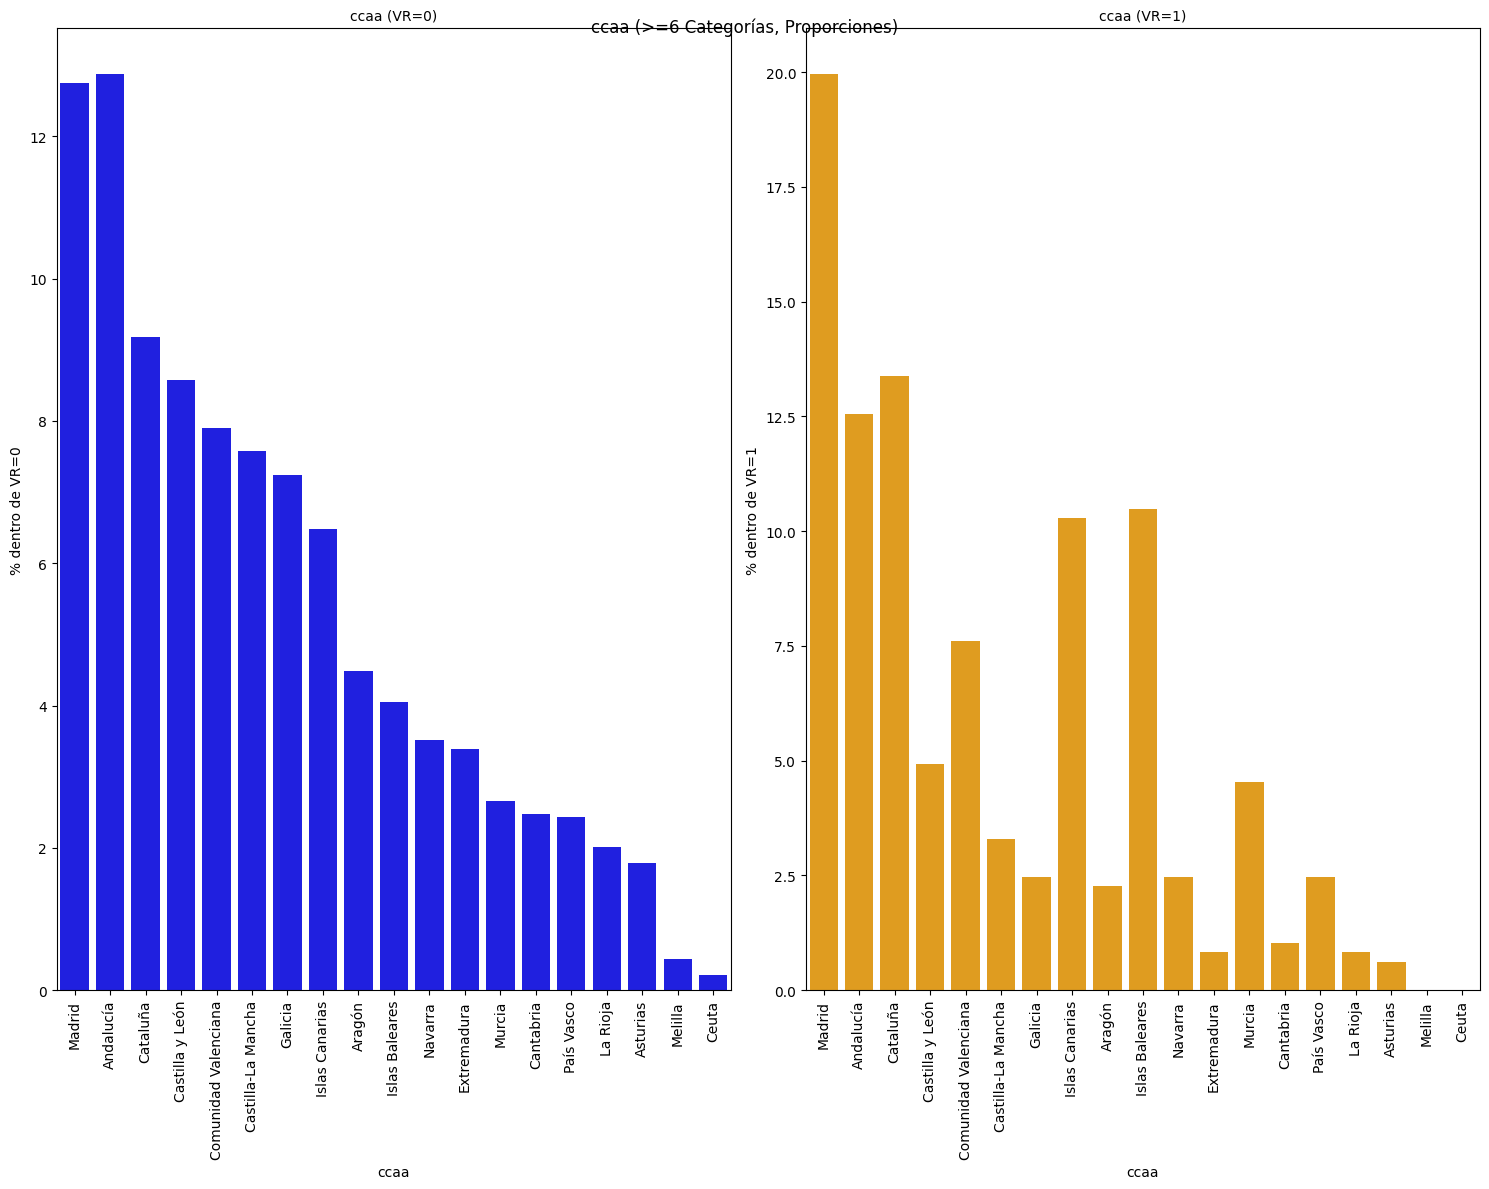

In [140]:
#relación individual con la variable dependiente (Proporcional)
visualizador.plot_relacion_individual_per("erfotov", tamano_grafica=(15, 25), tamanio_fuente=10)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

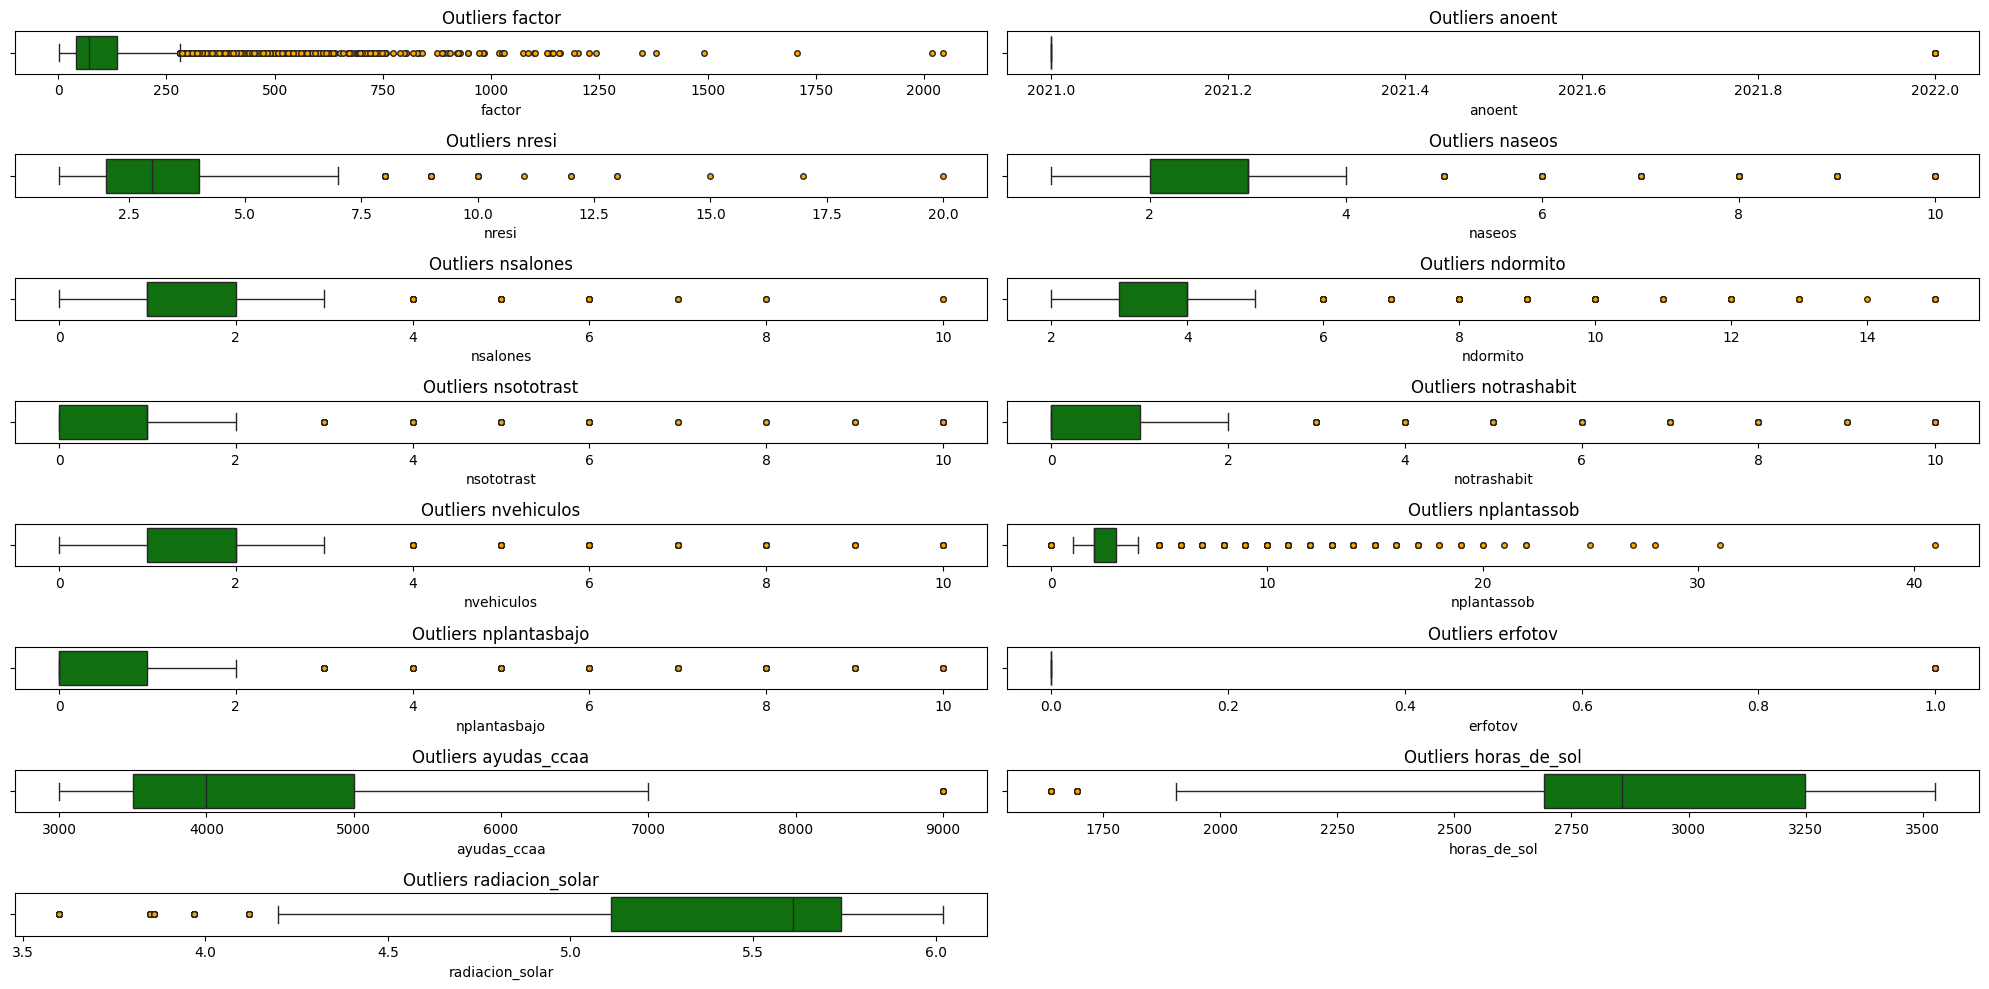

In [141]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

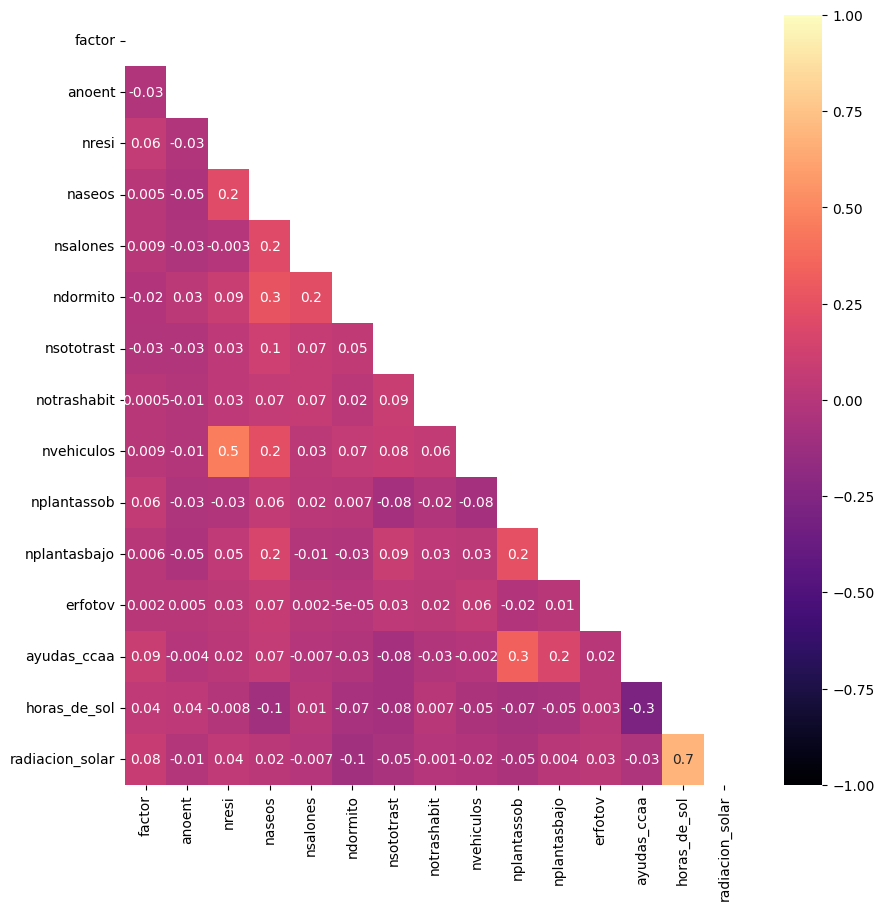

In [142]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [144]:
df_grandes_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18526 entries, 0 to 18525
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           18526 non-null  object 
 1   idq_mun          18526 non-null  object 
 2   tam_muni         18526 non-null  object 
 3   factor           18526 non-null  float64
 4   mesent           18526 non-null  object 
 5   anoent           18526 non-null  int64  
 6   yoresi           18526 non-null  object 
 7   otroresi         18526 non-null  object 
 8   nresi            18526 non-null  int64  
 9   regvi            18526 non-null  object 
 10  pagovi           18526 non-null  object 
 11  calefac          18526 non-null  object 
 12  tipocombcale     18526 non-null  object 
 13  tipoagua         18526 non-null  object 
 14  wc               18526 non-null  object 
 15  boducha          18526 non-null  object 
 16  aireacond        18526 non-null  object 
 17  aislam      

In [145]:
columnas_a_formatear = [                                            #columnas a formatear a tipo "O"
    "nsototrast", "notrashabit", "nvehiculos", "naseos", "nsalones", 
    "ndormito", "nplantasbajo", "nresi"]

df_grandes_sin_outliers[columnas_a_formatear] = df_grandes_sin_outliers[columnas_a_formatear].astype("O")

In [146]:
df_grandes_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18526 entries, 0 to 18525
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idq_pv           18526 non-null  object 
 1   idq_mun          18526 non-null  object 
 2   tam_muni         18526 non-null  object 
 3   factor           18526 non-null  float64
 4   mesent           18526 non-null  object 
 5   anoent           18526 non-null  int64  
 6   yoresi           18526 non-null  object 
 7   otroresi         18526 non-null  object 
 8   nresi            18526 non-null  object 
 9   regvi            18526 non-null  object 
 10  pagovi           18526 non-null  object 
 11  calefac          18526 non-null  object 
 12  tipocombcale     18526 non-null  object 
 13  tipoagua         18526 non-null  object 
 14  wc               18526 non-null  object 
 15  boducha          18526 non-null  object 
 16  aireacond        18526 non-null  object 
 17  aislam      

In [147]:
df_grandes_sin_outliers.head(1)

idq_pv            idq_mun                      tam_muni     factor mesent  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.857838   Mayo   

   anoent yoresi otroresi nresi                                 regvi  \
0    2021     Si       Si     3  Propia por compra totalmente pagada    

        pagovi     calefac tipocombcale                 tipoagua  wc boducha  \
0  Desconocido  individual  Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     No       No     Si       Si           Si       No    Si   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      2        2        3          1           0   

        metrosvi nvehiculos papel vidrio envases organico halogena  \
0  Más de 180 m2          3    Si     Si      Si       Si       No   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   

  bares cambioresi segunresi                 lugsegunresi  \
0    Si         No        No  No tiene segunda residencia   

                      otraccaa                  otropais  \
0  No tiene segunda residencia  No tiene/ está en España   

                       diasusa                     ingrehog     tipoedif  \
0  No tiene segunda residencia  De 3.000€ a menos de 5.000€  Unifamiliar   

             tipoedifviv  nplantassob nplantasbajo  annoedifinterv estadoedif  \
0  Vivienda unifamiliar             2            0  De 1991 a 2000      bueno   

     accesoedif ascensor garaje nplazasgar gastuberia aguacalcent  \
0  Es accesible       No     Si          1         Si          Si   

  evacuaguares     tipoevacuares  erfotov nviviendp     vehiculos  \
0           Si  Alcantarillado          0         1  convencional   

           renovables      conectividad        ccaa  ayudas_ccaa  \
0  no tiene renovable  banda ancha fija  País Vasco         4800   

  bonificaciones  horas_de_sol  radiacion_solar          categoria  
0            IBI          2147              4.2  Viviendas grandes

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [148]:
df_erf_gra=pd.DataFrame(df_grandes_sin_outliers["erfotov"])

In [149]:
outliers_gra=d.GestionOutliersMultivariados(df_grandes_sin_outliers.drop(columns=["erfotov"]))
df_outgrand=outliers_gra.detectar_outliers_if(0.01)

In [150]:
df_outgrand.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.857838   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  68.459369   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  98.588608   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  93.993815   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  90.765985   

      mesent  anoent yoresi otroresi nresi  \
0       Mayo    2021     Si       Si     3   
1  Diciembre    2021     Si       Si     4   
2  Diciembre    2021     Si       No     1   
3  Diciembre    2021     Si       Si     3   
4  Diciembre    2021     Si       Si     2   

                                    regvi                   pagovi  \
0    Propia por compra totalmente pagada               Desconocido   
1    Propia por compra totalmente pagada               Desconocido   
2    Propia por compra totalmente pagada               Desconocido   
3    Propia por compra totalmente pagada               Desconocido   
4  Propia por compra con pagos pendientes  De 700€ a menos de 800€   

      calefac          tipocombcale                 tipoagua  wc boducha  \
0  individual           Gas natural  abastecimiento público   Si      Si   
1  individual           Gas natural  abastecimiento público   Si      Si   
2  individual           Gas natural  abastecimiento público   Si      Si   
3  individual  Gas butano o propano  abastecimiento público   Si      Si   
4  individual           Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     No       No     Si       Si           Si       No    Si   
1        No     No       No     Si       Si           Si       No    Si   
2        No     No       No     Si       Si           Si       Si    Si   
3        No     No       Si     Si       Si           Si       No    Si   
4        No     No       No     Si       Si           Si       No    Si   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      2        2        3          1           0   
1         Si         Si      2        2        4          1           1   
2         Si         Si      2        1        4          1           0   
3         Si         Si      4        4        6          2           0   
4         Si         Si      3        2        3          1           0   

             metrosvi nvehiculos papel vidrio envases organico halogena  \
0       Más de 180 m2          3    Si     Si      Si       Si       No   
1  Entre 151 y 180 m2          2    Si     Si      Si       Si       Si   
2  Entre 151 y 180 m2          2    Si     Si      Si       Si       No   
3       Más de 180 m2          4    Si     Si      Si       Si       Si   
4  Entre 151 y 180 m2          4    Si     Si      No       No       Si   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    
1          Si  No  No dispone de servicio doméstico    
2          Si  Si        servicio doméstico externo    
3          Si  Si  No dispone de servicio doméstico    
4          Si  Si  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   
1  No dispone de ayudas externas no remuneradas     No       No    No   
2  No dispone de ayudas externas no remuneradas     No       No    Si   
3  No dispone de ayudas externas no remuneradas     No       No    Si   
4  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   
1         Si        No           No          No      Si     Si    Si       Si   
2         Si        No           Si       

Añadimos de nuevo la columna de fotovoltaica

In [151]:
df_outgrand=pd.concat([df_outgrand,df_erf_gra], axis=1)

In [152]:
df_outgrand[df_outgrand["outlier"]==-1].shape[0]

186

Filtramos por los que no son outliers

In [153]:
df_sin_outgrandes=df_outgrand[df_outgrand["outlier"]!=-1]

In [154]:
df_sin_outgrandes.shape[0]

18340

In [155]:
df_sin_outgrandes.drop(columns=["outlier", "categoria"], inplace=True)

In [156]:
df_sin_outgrandes.reset_index(drop=True, inplace=True)

In [157]:
df_sin_outgrandes.head()

idq_pv            idq_mun                      tam_muni     factor  \
0  Álava  Municipio_pequeño  De 50.000 habitantes o menos  56.857838   
1  Álava  Municipio_pequeño  De 50.000 habitantes o menos  68.459369   
2  Álava  Municipio_pequeño  De 50.000 habitantes o menos  98.588608   
3  Álava  Municipio_pequeño  De 50.000 habitantes o menos  93.993815   
4  Álava  Municipio_pequeño  De 50.000 habitantes o menos  90.765985   

      mesent  anoent yoresi otroresi nresi  \
0       Mayo    2021     Si       Si     3   
1  Diciembre    2021     Si       Si     4   
2  Diciembre    2021     Si       No     1   
3  Diciembre    2021     Si       Si     3   
4  Diciembre    2021     Si       Si     2   

                                    regvi                   pagovi  \
0    Propia por compra totalmente pagada               Desconocido   
1    Propia por compra totalmente pagada               Desconocido   
2    Propia por compra totalmente pagada               Desconocido   
3    Propia por compra totalmente pagada               Desconocido   
4  Propia por compra con pagos pendientes  De 700€ a menos de 800€   

      calefac          tipocombcale                 tipoagua  wc boducha  \
0  individual           Gas natural  abastecimiento público   Si      Si   
1  individual           Gas natural  abastecimiento público   Si      Si   
2  individual           Gas natural  abastecimiento público   Si      Si   
3  individual  Gas butano o propano  abastecimiento público   Si      Si   
4  individual           Gas natural  abastecimiento público   Si      Si   

  aireacond aislam adaptada cocina lavadora lavavajillas secadora horno  \
0        No     No       No     Si       Si           Si       No    Si   
1        No     No       No     Si       Si           Si       No    Si   
2        No     No       No     Si       Si           Si       Si    Si   
3        No     No       Si     Si       Si           Si       No    Si   
4        No     No       No     Si       Si           Si       No    Si   

  microondas vitroinduc naseos nsalones ndormito nsototrast notrashabit  \
0         Si         Si      2        2        3          1           0   
1         Si         Si      2        2        4          1           1   
2         Si         Si      2        1        4          1           0   
3         Si         Si      4        4        6          2           0   
4         Si         Si      3        2        3          1           0   

             metrosvi nvehiculos papel vidrio envases organico halogena  \
0       Más de 180 m2          3    Si     Si      Si       Si       No   
1  Entre 151 y 180 m2          2    Si     Si      Si       Si       Si   
2  Entre 151 y 180 m2          2    Si     Si      Si       Si       No   
3       Más de 180 m2          4    Si     Si      Si       Si       Si   
4  Entre 151 y 180 m2          4    Si     Si      No       No       Si   

  bajoconsumo led                          servdomes  \
0          No  Si  No dispone de servicio doméstico    
1          Si  No  No dispone de servicio doméstico    
2          Si  Si        servicio doméstico externo    
3          Si  Si  No dispone de servicio doméstico    
4          Si  Si  No dispone de servicio doméstico    

                                       ayudaext ruidos contamin sucio  \
0  No dispone de ayudas externas no remuneradas     No       No    No   
1  No dispone de ayudas externas no remuneradas     No       No    No   
2  No dispone de ayudas externas no remuneradas     No       No    Si   
3  No dispone de ayudas externas no remuneradas     No       No    Si   
4  No dispone de ayudas externas no remuneradas     No       No    No   

  malcomunic pocoverde delincuencia molesturist colegio csalud super farmacia  \
0         No        No           No          No      Si     Si    Si       Si   
1         Si        No           No          No      Si     Si    Si       Si   
2         Si        No           Si       

### **DESBALANCEO**  (lo trato en el siguiente jupyter)

In [158]:
round(df_sin_outgrandes["erfotov"].value_counts(normalize=True)*100,2)

erfotov
0    97.36
1     2.64
Name: proportion, dtype: float64

Observamos que es el tipo de vivienda que más fotovoltaica tiene (Ya se podía ver en las gráficas anteriores)

In [159]:
df_sin_outgrandes.to_pickle("../datos/EF/Datos_modelos/grandes_sin_outliers.pkl")